In [2]:
import os
import time
import progressbar
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
tf.compat.v1.keras.backend.set_session
import keras
import sys, time, os, warnings 
import numpy as np
import pandas as pd 
from collections import Counter 
from tensorflow.keras.utils import load_img
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")



In [3]:
## loading as dataframe
def load_csv(directory):
    desc=dict()
    text = pd.read_csv(directory, delimiter='|',header=None,names=["filename","index","caption"])
    text = text.iloc[1:,:]
    df_new = text[text.iloc[:,2].notnull()]
    print(df_new.iloc[:5,:])
    return df_new  

In [4]:
!pip install opendatasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import opendatasets as od 
od.download("kaggle.com/datasets/srbhshinde/flickr8k-sau", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aushijj
Your Kaggle Key: ··········


100%|██████████| 2.08G/2.08G [01:00<00:00, 36.8MB/s]


In [6]:
## The location of the caption file
#dir_Flickr_text = "../input/flickr-image-dataset/flickr30k_images/flickr30k_images/results.csv"
#dir_Flickr_jpg = "../input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images"
dir_Flickr_text = "/content/flickr8k-sau/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt"
dir_Flickr_jpg = "/content/flickr8k-sau/Flickr_Data/Images"

jpgs = os.listdir(dir_Flickr_jpg)
print("The number of jpg flies in Flicker30k: {}".format(len(jpgs)))

The number of jpg flies in Flicker30k: 8091


In [7]:


file = open(dir_Flickr_text,'r')
text = file.read()
file.close()


datatxt = []
for line in text.split('\n'):
    col = line.split('\t')
    if len(col) == 1:
        continue
    w = col[0].split("#")
    datatxt.append(w + [col[1].lower()])

df_txt = pd.DataFrame(datatxt,columns=["filename","index","caption"])


uni_filenames = np.unique(df_txt.filename.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df_txt.filename.values).values())



The number of unique file names : 8092
The distribution of the number of captions for each image:


Counter({5: 8092})


df_txt= load_csv(dir_Flickr_text)
uni_filenames = np.unique(df_txt.filename.values)
print("The number of unique file names : {}".format(len(uni_filenames)))
print("The distribution of the number of captions for each image:")
Counter(Counter(df_txt.filename.values).values())

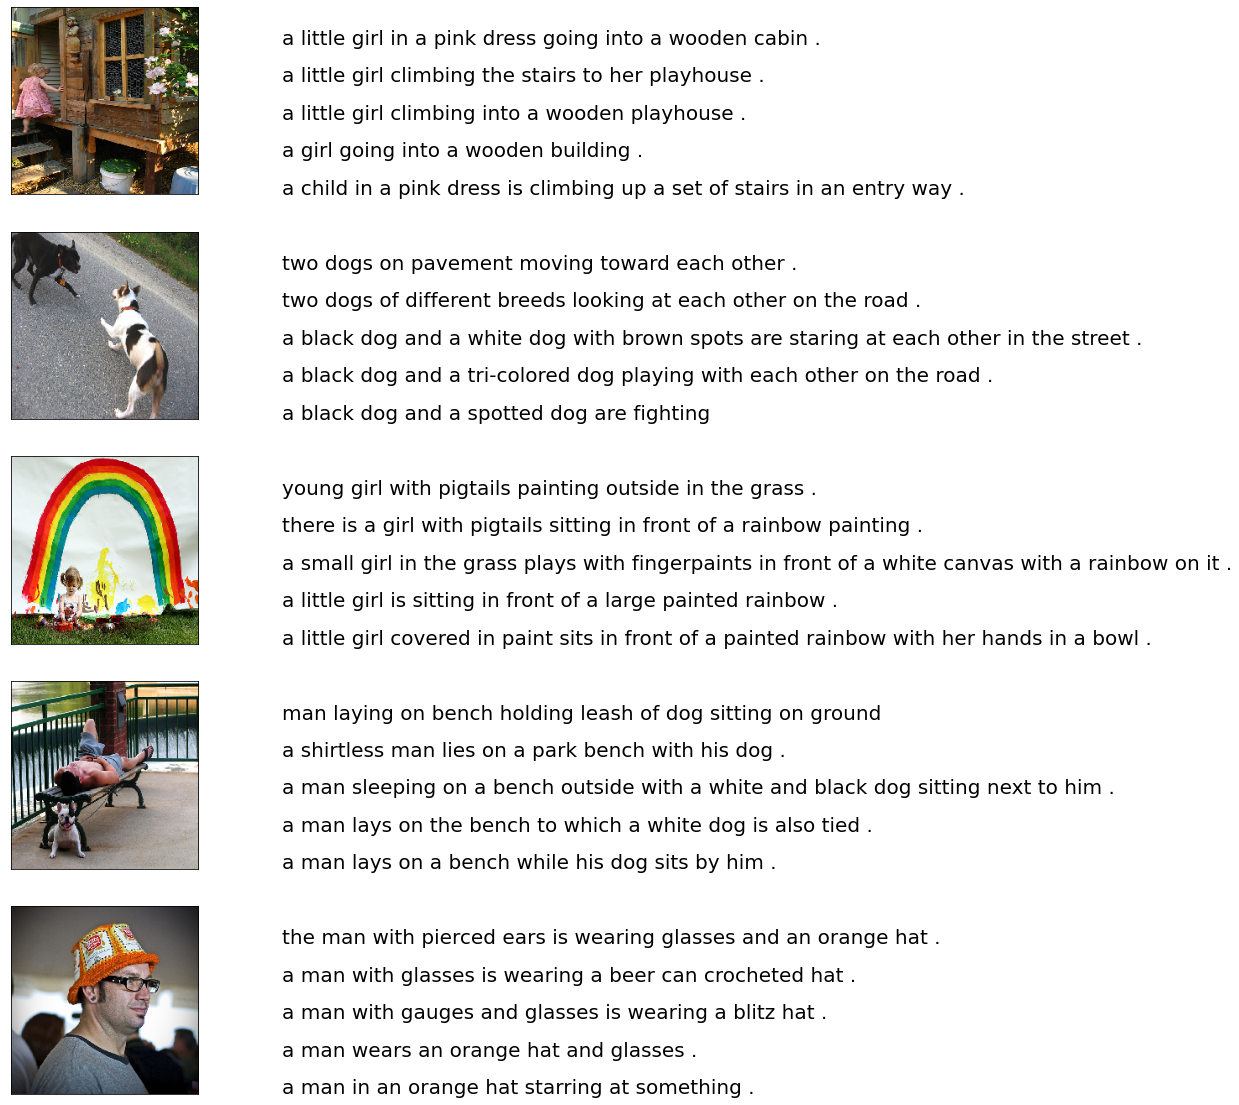

In [8]:
from tensorflow.keras.utils import load_img, img_to_array

npic = 5
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm in uni_filenames[:npic]:
    filename = dir_Flickr_jpg + '/' + jpgfnm
    captions = list(df_txt["caption"].loc[df_txt["filename"]==jpgfnm].values)
    image_load = load_img(filename, target_size=target_size)
    
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1
    
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count += 1
plt.show()

In [9]:
def df_word(df_txt):
    vocabulary = []
    for i in range(len(df_txt)):
        temp=df_txt.iloc[i,2]
        vocabulary.extend(temp.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt)
dfword.head(3)

Vocabulary Size: 8918


word  count
0    a  62989
1    .  36581
2   in  18975

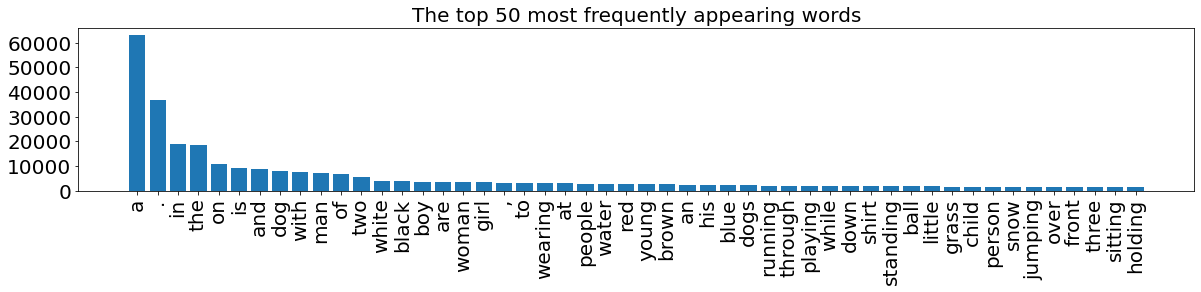

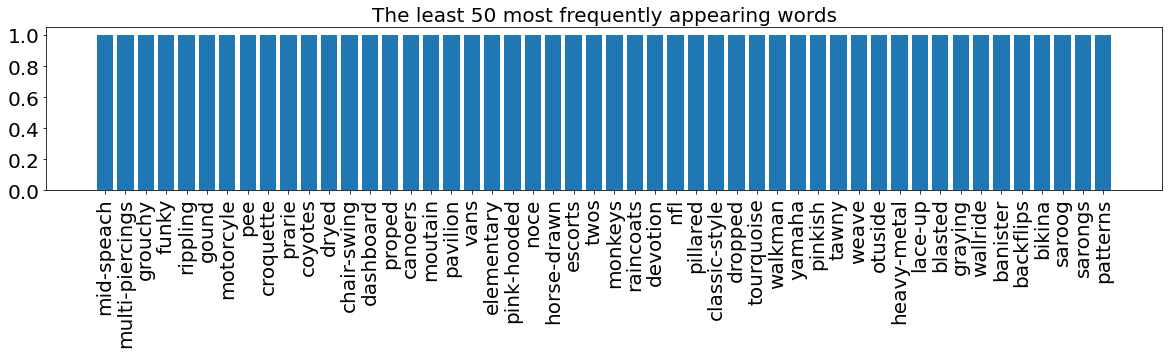

In [10]:
topn = 50

def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

In [11]:
import string
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('','',string.punctuation))
    return(text_no_punctuation)

def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)

def remove_numeric(text,printTF=False):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if printTF:
            print("    {:10} : {:}".format(word,isalpha))
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)


In [12]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)

with progressbar.ProgressBar(max_value=len(df_txt.caption.values)) as bar:
    for i, caption in enumerate(df_txt.caption.values):
        newcaption = text_clean(caption)
        df_txt["caption"].iloc[i] = newcaption
        bar.update(i)
    

100% (40460 of 40460) |##################| Elapsed Time: 0:00:24 Time:  0:00:24


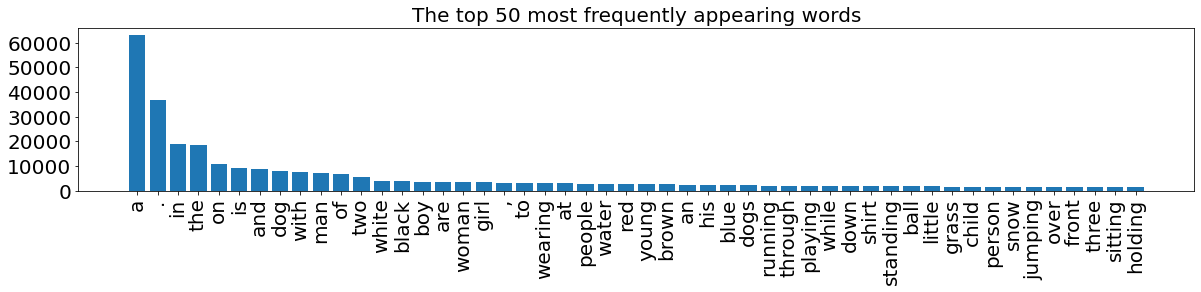

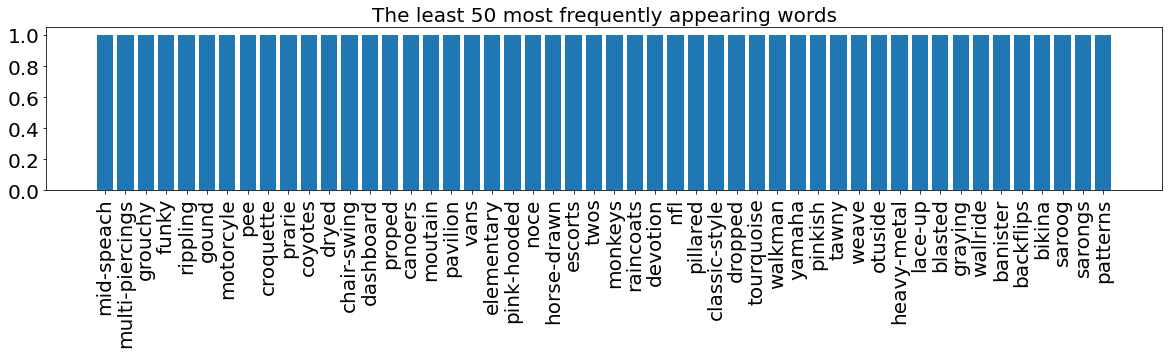

In [13]:

plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

In [14]:
from copy import copy
def add_start_end_seq_token(captions):
    caps = []
    for txt in captions:
        txt = 'startseq ' + txt + ' endseq'
        caps.append(txt)
    return(caps)
df_txt0 = copy(df_txt)
df_txt0["caption"] = add_start_end_seq_token(df_txt["caption"])
df_txt0.head(5)
del df_txt


In [18]:
df_txt0.head(5)


filename index  \
0  1000268201_693b08cb0e.jpg     0   
1  1000268201_693b08cb0e.jpg     1   
2  1000268201_693b08cb0e.jpg     2   
3  1000268201_693b08cb0e.jpg     3   
4  1000268201_693b08cb0e.jpg     4   

                                             caption  
0  startseq  child in pink dress is climbing up s...  
1   startseq  girl going into wooden building endseq  
2  startseq  little girl climbing into wooden pla...  
3  startseq  little girl climbing the stairs to h...  
4  startseq  little girl in pink dress going into...

In [25]:
from keras import models
modelvgg.layers.pop()
modelvgg = models.Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-1].output)
## show the deep learning model
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict

images = OrderedDict()
npix = 224
target_size = (npix,npix,3)
with progressbar.ProgressBar(max_value=len(jpgs)) as bar:
    for i,name in enumerate(jpgs):
        # load an image from file
        filename = dir_Flickr_jpg + '/' + name
        image = load_img(filename, target_size=target_size)
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        nimage = preprocess_input(image)
        y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
        images[name] = y_pred.flatten()
        bar.update(i)
    #print(i,filename)

1/1 [==============================] - 8s 8s/step


N/A% (0 of 8091) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

1/1 [==============================] - 0s 20ms/step


  0% (2 of 8091) |                       | Elapsed Time: 0:00:00 ETA:   0:08:29

1/1 [==============================] - 0s 18ms/step


  0% (4 of 8091) |                       | Elapsed Time: 0:00:00 ETA:   0:08:17

1/1 [==============================] - 0s 16ms/step


  0% (6 of 8091) |                       | Elapsed Time: 0:00:00 ETA:   0:08:14

1/1 [==============================] - 0s 15ms/step


  0% (8 of 8091) |                       | Elapsed Time: 0:00:00 ETA:   0:07:59

1/1 [==============================] - 0s 15ms/step


  0% (10 of 8091) |                      | Elapsed Time: 0:00:00 ETA:   0:07:58

1/1 [==============================] - 0s 15ms/step


  0% (12 of 8091) |                      | Elapsed Time: 0:00:00 ETA:   0:08:00

1/1 [==============================] - 0s 18ms/step


  0% (14 of 8091) |                      | Elapsed Time: 0:00:00 ETA:   0:07:55

1/1 [==============================] - 0s 15ms/step


  0% (16 of 8091) |                      | Elapsed Time: 0:00:00 ETA:   0:07:55

1/1 [==============================] - 0s 15ms/step


  0% (18 of 8091) |                      | Elapsed Time: 0:00:01 ETA:   0:07:50

1/1 [==============================] - 0s 17ms/step


  0% (20 of 8091) |                      | Elapsed Time: 0:00:01 ETA:   0:07:48

1/1 [==============================] - 0s 17ms/step


  0% (22 of 8091) |                      | Elapsed Time: 0:00:01 ETA:   0:07:46

1/1 [==============================] - 0s 15ms/step


  0% (24 of 8091) |                      | Elapsed Time: 0:00:01 ETA:   0:07:43

1/1 [==============================] - 0s 15ms/step


  0% (26 of 8091) |                      | Elapsed Time: 0:00:01 ETA:   0:07:44

1/1 [==============================] - 0s 45ms/step


  0% (28 of 8091) |                      | Elapsed Time: 0:00:01 ETA:   0:08:03

1/1 [==============================] - 0s 69ms/step


  0% (29 of 8091) |                      | Elapsed Time: 0:00:01 ETA:   0:08:41

1/1 [==============================] - 0s 31ms/step


  0% (30 of 8091) |                      | Elapsed Time: 0:00:01 ETA:   0:08:51

1/1 [==============================] - 0s 26ms/step


  0% (31 of 8091) |                      | Elapsed Time: 0:00:02 ETA:   0:09:05

1/1 [==============================] - 0s 29ms/step


  0% (32 of 8091) |                      | Elapsed Time: 0:00:02 ETA:   0:09:22

1/1 [==============================] - 0s 43ms/step


  0% (33 of 8091) |                      | Elapsed Time: 0:00:02 ETA:   0:09:41

1/1 [==============================] - 0s 35ms/step


  0% (34 of 8091) |                      | Elapsed Time: 0:00:02 ETA:   0:10:39

1/1 [==============================] - 0s 29ms/step


  0% (35 of 8091) |                      | Elapsed Time: 0:00:02 ETA:   0:11:05

1/1 [==============================] - 0s 34ms/step


  0% (36 of 8091) |                      | Elapsed Time: 0:00:02 ETA:   0:11:33

1/1 [==============================] - 0s 19ms/step


  0% (38 of 8091) |                      | Elapsed Time: 0:00:02 ETA:   0:12:12

1/1 [==============================] - 0s 16ms/step


  0% (40 of 8091) |                      | Elapsed Time: 0:00:03 ETA:   0:12:16

1/1 [==============================] - 0s 17ms/step


  0% (42 of 8091) |                      | Elapsed Time: 0:00:03 ETA:   0:12:20

1/1 [==============================] - 0s 19ms/step


  0% (44 of 8091) |                      | Elapsed Time: 0:00:03 ETA:   0:12:22

1/1 [==============================] - 0s 18ms/step


  0% (46 of 8091) |                      | Elapsed Time: 0:00:03 ETA:   0:12:30

1/1 [==============================] - 0s 16ms/step


  0% (48 of 8091) |                      | Elapsed Time: 0:00:03 ETA:   0:12:31

1/1 [==============================] - 0s 16ms/step


  0% (50 of 8091) |                      | Elapsed Time: 0:00:03 ETA:   0:12:12

1/1 [==============================] - 0s 16ms/step


  0% (52 of 8091) |                      | Elapsed Time: 0:00:03 ETA:   0:11:51

1/1 [==============================] - 0s 21ms/step


  0% (54 of 8091) |                      | Elapsed Time: 0:00:03 ETA:   0:11:00

1/1 [==============================] - 0s 17ms/step


  0% (56 of 8091) |                      | Elapsed Time: 0:00:04 ETA:   0:10:42

1/1 [==============================] - 0s 16ms/step


  0% (58 of 8091) |                      | Elapsed Time: 0:00:04 ETA:   0:10:20

1/1 [==============================] - 0s 16ms/step


  0% (60 of 8091) |                      | Elapsed Time: 0:00:04 ETA:   0:09:58

1/1 [==============================] - 0s 17ms/step


  0% (62 of 8091) |                      | Elapsed Time: 0:00:04 ETA:   0:09:38

1/1 [==============================] - 0s 17ms/step


  0% (64 of 8091) |                      | Elapsed Time: 0:00:04 ETA:   0:08:59

1/1 [==============================] - 0s 19ms/step


  0% (66 of 8091) |                      | Elapsed Time: 0:00:04 ETA:   0:08:47

1/1 [==============================] - 0s 15ms/step


  0% (68 of 8091) |                      | Elapsed Time: 0:00:04 ETA:   0:08:31

1/1 [==============================] - 0s 16ms/step


  0% (70 of 8091) |                      | Elapsed Time: 0:00:04 ETA:   0:08:22

1/1 [==============================] - 0s 18ms/step


  0% (72 of 8091) |                      | Elapsed Time: 0:00:05 ETA:   0:08:21

1/1 [==============================] - 0s 17ms/step


  0% (74 of 8091) |                      | Elapsed Time: 0:00:05 ETA:   0:08:23

1/1 [==============================] - 0s 16ms/step


  0% (76 of 8091) |                      | Elapsed Time: 0:00:05 ETA:   0:08:26

1/1 [==============================] - 0s 16ms/step


  0% (78 of 8091) |                      | Elapsed Time: 0:00:05 ETA:   0:08:28

1/1 [==============================] - 0s 17ms/step


  0% (80 of 8091) |                      | Elapsed Time: 0:00:05 ETA:   0:08:29

1/1 [==============================] - 0s 19ms/step


  1% (82 of 8091) |                      | Elapsed Time: 0:00:05 ETA:   0:08:30

1/1 [==============================] - 0s 17ms/step


  1% (84 of 8091) |                      | Elapsed Time: 0:00:05 ETA:   0:08:32

1/1 [==============================] - 0s 16ms/step


  1% (86 of 8091) |                      | Elapsed Time: 0:00:05 ETA:   0:08:32

1/1 [==============================] - 0s 21ms/step


  1% (88 of 8091) |                      | Elapsed Time: 0:00:06 ETA:   0:08:30

1/1 [==============================] - 0s 16ms/step


  1% (90 of 8091) |                      | Elapsed Time: 0:00:06 ETA:   0:08:30

1/1 [==============================] - 0s 23ms/step


  1% (92 of 8091) |                      | Elapsed Time: 0:00:06 ETA:   0:08:31

1/1 [==============================] - 0s 20ms/step


  1% (94 of 8091) |                      | Elapsed Time: 0:00:06 ETA:   0:08:33

1/1 [==============================] - 0s 17ms/step


  1% (96 of 8091) |                      | Elapsed Time: 0:00:06 ETA:   0:08:36

1/1 [==============================] - 0s 16ms/step


  1% (98 of 8091) |                      | Elapsed Time: 0:00:06 ETA:   0:08:32

1/1 [==============================] - 0s 16ms/step


  1% (100 of 8091) |                     | Elapsed Time: 0:00:06 ETA:   0:08:30

1/1 [==============================] - 0s 15ms/step


  1% (102 of 8091) |                     | Elapsed Time: 0:00:06 ETA:   0:08:30

1/1 [==============================] - 0s 15ms/step


  1% (103 of 8091) |                     | Elapsed Time: 0:00:07 ETA:   0:08:30

1/1 [==============================] - 0s 14ms/step


  1% (105 of 8091) |                     | Elapsed Time: 0:00:07 ETA:   0:08:28

1/1 [==============================] - 0s 17ms/step


  1% (107 of 8091) |                     | Elapsed Time: 0:00:07 ETA:   0:08:25

1/1 [==============================] - 0s 17ms/step


  1% (109 of 8091) |                     | Elapsed Time: 0:00:07 ETA:   0:08:21

1/1 [==============================] - 0s 16ms/step


  1% (111 of 8091) |                     | Elapsed Time: 0:00:07 ETA:   0:08:19

1/1 [==============================] - 0s 18ms/step


  1% (113 of 8091) |                     | Elapsed Time: 0:00:07 ETA:   0:08:17

1/1 [==============================] - 0s 15ms/step


  1% (115 of 8091) |                     | Elapsed Time: 0:00:07 ETA:   0:08:16

1/1 [==============================] - 0s 19ms/step


  1% (117 of 8091) |                     | Elapsed Time: 0:00:07 ETA:   0:08:14

1/1 [==============================] - 0s 16ms/step


  1% (119 of 8091) |                     | Elapsed Time: 0:00:08 ETA:   0:08:14

1/1 [==============================] - 0s 19ms/step


  1% (121 of 8091) |                     | Elapsed Time: 0:00:08 ETA:   0:08:14

1/1 [==============================] - 0s 16ms/step


  1% (123 of 8091) |                     | Elapsed Time: 0:00:08 ETA:   0:08:14

1/1 [==============================] - 0s 19ms/step


  1% (125 of 8091) |                     | Elapsed Time: 0:00:08 ETA:   0:08:14

1/1 [==============================] - 0s 16ms/step


  1% (127 of 8091) |                     | Elapsed Time: 0:00:08 ETA:   0:08:13

1/1 [==============================] - 0s 16ms/step


  1% (129 of 8091) |                     | Elapsed Time: 0:00:08 ETA:   0:08:13

1/1 [==============================] - 0s 19ms/step


  1% (131 of 8091) |                     | Elapsed Time: 0:00:08 ETA:   0:08:12

1/1 [==============================] - 0s 17ms/step


  1% (133 of 8091) |                     | Elapsed Time: 0:00:08 ETA:   0:08:14

1/1 [==============================] - 0s 17ms/step


  1% (135 of 8091) |                     | Elapsed Time: 0:00:09 ETA:   0:08:12

1/1 [==============================] - 0s 17ms/step


  1% (137 of 8091) |                     | Elapsed Time: 0:00:09 ETA:   0:08:13

1/1 [==============================] - 0s 15ms/step


  1% (139 of 8091) |                     | Elapsed Time: 0:00:09 ETA:   0:08:18

1/1 [==============================] - 0s 17ms/step


  1% (141 of 8091) |                     | Elapsed Time: 0:00:09 ETA:   0:08:18

1/1 [==============================] - 0s 17ms/step


  1% (143 of 8091) |                     | Elapsed Time: 0:00:09 ETA:   0:08:17

1/1 [==============================] - 0s 19ms/step


  1% (145 of 8091) |                     | Elapsed Time: 0:00:09 ETA:   0:08:18

1/1 [==============================] - 0s 19ms/step


  1% (147 of 8091) |                     | Elapsed Time: 0:00:09 ETA:   0:08:18

1/1 [==============================] - 0s 16ms/step


  1% (149 of 8091) |                     | Elapsed Time: 0:00:09 ETA:   0:08:20

1/1 [==============================] - 0s 17ms/step


  1% (151 of 8091) |                     | Elapsed Time: 0:00:10 ETA:   0:08:19

1/1 [==============================] - 0s 17ms/step


  1% (153 of 8091) |                     | Elapsed Time: 0:00:10 ETA:   0:08:20

1/1 [==============================] - 0s 16ms/step


  1% (155 of 8091) |                     | Elapsed Time: 0:00:10 ETA:   0:08:19

1/1 [==============================] - 0s 18ms/step


  1% (157 of 8091) |                     | Elapsed Time: 0:00:10 ETA:   0:08:18

1/1 [==============================] - 0s 17ms/step


  1% (159 of 8091) |                     | Elapsed Time: 0:00:10 ETA:   0:08:19

1/1 [==============================] - 0s 16ms/step


  1% (161 of 8091) |                     | Elapsed Time: 0:00:10 ETA:   0:08:18

1/1 [==============================] - 0s 15ms/step


  2% (163 of 8091) |                     | Elapsed Time: 0:00:10 ETA:   0:08:18

1/1 [==============================] - 0s 16ms/step


  2% (165 of 8091) |                     | Elapsed Time: 0:00:10 ETA:   0:08:18

1/1 [==============================] - 0s 16ms/step


  2% (167 of 8091) |                     | Elapsed Time: 0:00:11 ETA:   0:08:19

1/1 [==============================] - 0s 15ms/step


  2% (169 of 8091) |                     | Elapsed Time: 0:00:11 ETA:   0:08:20

1/1 [==============================] - 0s 16ms/step


  2% (171 of 8091) |                     | Elapsed Time: 0:00:11 ETA:   0:08:20

1/1 [==============================] - 0s 15ms/step


  2% (173 of 8091) |                     | Elapsed Time: 0:00:11 ETA:   0:08:21

1/1 [==============================] - 0s 15ms/step


  2% (175 of 8091) |                     | Elapsed Time: 0:00:11 ETA:   0:08:21

1/1 [==============================] - 0s 17ms/step


  2% (177 of 8091) |                     | Elapsed Time: 0:00:11 ETA:   0:08:21

1/1 [==============================] - 0s 15ms/step


  2% (179 of 8091) |                     | Elapsed Time: 0:00:11 ETA:   0:08:24

1/1 [==============================] - 0s 19ms/step


  2% (181 of 8091) |                     | Elapsed Time: 0:00:11 ETA:   0:08:21

1/1 [==============================] - 0s 15ms/step


  2% (183 of 8091) |                     | Elapsed Time: 0:00:12 ETA:   0:08:21

1/1 [==============================] - 0s 15ms/step


  2% (185 of 8091) |                     | Elapsed Time: 0:00:12 ETA:   0:08:20

1/1 [==============================] - 0s 16ms/step


  2% (187 of 8091) |                     | Elapsed Time: 0:00:12 ETA:   0:08:21

1/1 [==============================] - 0s 15ms/step


  2% (189 of 8091) |                     | Elapsed Time: 0:00:12 ETA:   0:08:20

1/1 [==============================] - 0s 17ms/step


  2% (191 of 8091) |                     | Elapsed Time: 0:00:12 ETA:   0:08:17

1/1 [==============================] - 0s 25ms/step


  2% (193 of 8091) |                     | Elapsed Time: 0:00:12 ETA:   0:08:17

1/1 [==============================] - 0s 17ms/step


  2% (195 of 8091) |                     | Elapsed Time: 0:00:12 ETA:   0:08:20

1/1 [==============================] - 0s 25ms/step


  2% (197 of 8091) |                     | Elapsed Time: 0:00:12 ETA:   0:08:21

1/1 [==============================] - 0s 14ms/step


  2% (199 of 8091) |                     | Elapsed Time: 0:00:13 ETA:   0:08:21

1/1 [==============================] - 0s 16ms/step


  2% (201 of 8091) |                     | Elapsed Time: 0:00:13 ETA:   0:08:20

1/1 [==============================] - 0s 18ms/step


  2% (203 of 8091) |                     | Elapsed Time: 0:00:13 ETA:   0:08:18

1/1 [==============================] - 0s 18ms/step


  2% (205 of 8091) |                     | Elapsed Time: 0:00:13 ETA:   0:08:16

1/1 [==============================] - 0s 16ms/step


  2% (207 of 8091) |                     | Elapsed Time: 0:00:13 ETA:   0:08:19

1/1 [==============================] - 0s 19ms/step


  2% (209 of 8091) |                     | Elapsed Time: 0:00:13 ETA:   0:08:17

1/1 [==============================] - 0s 21ms/step


  2% (210 of 8091) |                     | Elapsed Time: 0:00:13 ETA:   0:08:29

1/1 [==============================] - 0s 18ms/step


  2% (212 of 8091) |                     | Elapsed Time: 0:00:13 ETA:   0:08:30

1/1 [==============================] - 0s 17ms/step


  2% (214 of 8091) |                     | Elapsed Time: 0:00:14 ETA:   0:08:33

1/1 [==============================] - 0s 16ms/step


  2% (216 of 8091) |                     | Elapsed Time: 0:00:14 ETA:   0:08:35

1/1 [==============================] - 0s 19ms/step


  2% (218 of 8091) |                     | Elapsed Time: 0:00:14 ETA:   0:08:33

1/1 [==============================] - 0s 16ms/step


  2% (220 of 8091) |                     | Elapsed Time: 0:00:14 ETA:   0:08:32

1/1 [==============================] - 0s 19ms/step


  2% (222 of 8091) |                     | Elapsed Time: 0:00:14 ETA:   0:08:36

1/1 [==============================] - 0s 18ms/step


  2% (224 of 8091) |                     | Elapsed Time: 0:00:14 ETA:   0:08:34

1/1 [==============================] - 0s 18ms/step


  2% (226 of 8091) |                     | Elapsed Time: 0:00:14 ETA:   0:08:33

1/1 [==============================] - 0s 15ms/step


  2% (228 of 8091) |                     | Elapsed Time: 0:00:14 ETA:   0:08:32

1/1 [==============================] - 0s 16ms/step


  2% (230 of 8091) |                     | Elapsed Time: 0:00:15 ETA:   0:08:29

1/1 [==============================] - 0s 15ms/step


  2% (232 of 8091) |                     | Elapsed Time: 0:00:15 ETA:   0:08:28

1/1 [==============================] - 0s 16ms/step


  2% (234 of 8091) |                     | Elapsed Time: 0:00:15 ETA:   0:08:29

1/1 [==============================] - 0s 19ms/step


  2% (236 of 8091) |                     | Elapsed Time: 0:00:15 ETA:   0:08:30

1/1 [==============================] - 0s 15ms/step


  2% (238 of 8091) |                     | Elapsed Time: 0:00:15 ETA:   0:08:30

1/1 [==============================] - 0s 16ms/step


  2% (240 of 8091) |                     | Elapsed Time: 0:00:15 ETA:   0:08:40

1/1 [==============================] - 0s 21ms/step


  2% (242 of 8091) |                     | Elapsed Time: 0:00:15 ETA:   0:08:33

1/1 [==============================] - 0s 16ms/step


  3% (244 of 8091) |                     | Elapsed Time: 0:00:16 ETA:   0:08:29

1/1 [==============================] - 0s 17ms/step


  3% (246 of 8091) |                     | Elapsed Time: 0:00:16 ETA:   0:08:27

1/1 [==============================] - 0s 17ms/step


  3% (248 of 8091) |                     | Elapsed Time: 0:00:16 ETA:   0:08:25

1/1 [==============================] - 0s 16ms/step


  3% (249 of 8091) |                     | Elapsed Time: 0:00:16 ETA:   0:08:37

1/1 [==============================] - 0s 18ms/step


  3% (251 of 8091) |                     | Elapsed Time: 0:00:16 ETA:   0:08:38

1/1 [==============================] - 0s 17ms/step


  3% (253 of 8091) |                     | Elapsed Time: 0:00:16 ETA:   0:08:35

1/1 [==============================] - 0s 17ms/step


  3% (255 of 8091) |                     | Elapsed Time: 0:00:16 ETA:   0:08:36

1/1 [==============================] - 0s 18ms/step


  3% (257 of 8091) |                     | Elapsed Time: 0:00:16 ETA:   0:08:33

1/1 [==============================] - 0s 16ms/step


  3% (259 of 8091) |                     | Elapsed Time: 0:00:17 ETA:   0:08:34

1/1 [==============================] - 0s 19ms/step


  3% (261 of 8091) |                     | Elapsed Time: 0:00:17 ETA:   0:08:38

1/1 [==============================] - 0s 20ms/step


  3% (263 of 8091) |                     | Elapsed Time: 0:00:17 ETA:   0:08:42

1/1 [==============================] - 0s 17ms/step


  3% (265 of 8091) |                     | Elapsed Time: 0:00:17 ETA:   0:08:48

1/1 [==============================] - 0s 19ms/step


  3% (267 of 8091) |                     | Elapsed Time: 0:00:17 ETA:   0:08:49

1/1 [==============================] - 0s 16ms/step


  3% (269 of 8091) |                     | Elapsed Time: 0:00:17 ETA:   0:08:59

1/1 [==============================] - 0s 23ms/step


  3% (271 of 8091) |                     | Elapsed Time: 0:00:17 ETA:   0:08:49

1/1 [==============================] - 0s 16ms/step


  3% (273 of 8091) |                     | Elapsed Time: 0:00:17 ETA:   0:08:44

1/1 [==============================] - 0s 16ms/step


  3% (275 of 8091) |                     | Elapsed Time: 0:00:18 ETA:   0:08:44

1/1 [==============================] - 0s 17ms/step


  3% (277 of 8091) |                     | Elapsed Time: 0:00:18 ETA:   0:08:43

1/1 [==============================] - 0s 19ms/step


  3% (279 of 8091) |                     | Elapsed Time: 0:00:18 ETA:   0:08:43

1/1 [==============================] - 0s 15ms/step


  3% (281 of 8091) |                     | Elapsed Time: 0:00:18 ETA:   0:08:29

1/1 [==============================] - 0s 17ms/step


  3% (283 of 8091) |                     | Elapsed Time: 0:00:18 ETA:   0:08:32

1/1 [==============================] - 0s 15ms/step


  3% (285 of 8091) |                     | Elapsed Time: 0:00:18 ETA:   0:08:29

1/1 [==============================] - 0s 16ms/step


  3% (287 of 8091) |                     | Elapsed Time: 0:00:18 ETA:   0:08:27

1/1 [==============================] - 0s 16ms/step


  3% (289 of 8091) |                     | Elapsed Time: 0:00:18 ETA:   0:08:29

1/1 [==============================] - 0s 15ms/step


  3% (291 of 8091) |                     | Elapsed Time: 0:00:19 ETA:   0:08:27

1/1 [==============================] - 0s 17ms/step


  3% (293 of 8091) |                     | Elapsed Time: 0:00:19 ETA:   0:08:27

1/1 [==============================] - 0s 18ms/step


  3% (295 of 8091) |                     | Elapsed Time: 0:00:19 ETA:   0:08:21

1/1 [==============================] - 0s 17ms/step


  3% (297 of 8091) |                     | Elapsed Time: 0:00:19 ETA:   0:08:18

1/1 [==============================] - 0s 16ms/step


  3% (299 of 8091) |                     | Elapsed Time: 0:00:19 ETA:   0:08:17

1/1 [==============================] - 0s 16ms/step


  3% (301 of 8091) |                     | Elapsed Time: 0:00:19 ETA:   0:08:16

1/1 [==============================] - 0s 16ms/step


  3% (303 of 8091) |                     | Elapsed Time: 0:00:19 ETA:   0:08:05

1/1 [==============================] - 0s 17ms/step


  3% (305 of 8091) |                     | Elapsed Time: 0:00:19 ETA:   0:08:06

1/1 [==============================] - 0s 17ms/step


  3% (307 of 8091) |                     | Elapsed Time: 0:00:20 ETA:   0:08:04

1/1 [==============================] - 0s 16ms/step


  3% (308 of 8091) |                     | Elapsed Time: 0:00:20 ETA:   0:08:04

1/1 [==============================] - 0s 15ms/step


  3% (310 of 8091) |                     | Elapsed Time: 0:00:20 ETA:   0:08:05

1/1 [==============================] - 0s 18ms/step


  3% (312 of 8091) |                     | Elapsed Time: 0:00:20 ETA:   0:08:06

1/1 [==============================] - 0s 15ms/step


  3% (314 of 8091) |                     | Elapsed Time: 0:00:20 ETA:   0:08:08

1/1 [==============================] - 0s 17ms/step


  3% (316 of 8091) |                     | Elapsed Time: 0:00:20 ETA:   0:08:07

1/1 [==============================] - 0s 18ms/step


  3% (318 of 8091) |                     | Elapsed Time: 0:00:20 ETA:   0:08:07

1/1 [==============================] - 0s 21ms/step


  3% (320 of 8091) |                     | Elapsed Time: 0:00:20 ETA:   0:08:10

1/1 [==============================] - 0s 15ms/step


  3% (322 of 8091) |                     | Elapsed Time: 0:00:21 ETA:   0:08:06

1/1 [==============================] - 0s 17ms/step


  4% (324 of 8091) |                     | Elapsed Time: 0:00:21 ETA:   0:08:09

1/1 [==============================] - 0s 16ms/step


  4% (326 of 8091) |                     | Elapsed Time: 0:00:21 ETA:   0:08:07

1/1 [==============================] - 0s 19ms/step


  4% (328 of 8091) |                     | Elapsed Time: 0:00:21 ETA:   0:08:08

1/1 [==============================] - 0s 20ms/step


  4% (330 of 8091) |                     | Elapsed Time: 0:00:21 ETA:   0:08:15

1/1 [==============================] - 0s 18ms/step


  4% (332 of 8091) |                     | Elapsed Time: 0:00:21 ETA:   0:08:17

1/1 [==============================] - 0s 15ms/step


  4% (334 of 8091) |                     | Elapsed Time: 0:00:21 ETA:   0:08:18

1/1 [==============================] - 0s 15ms/step


  4% (336 of 8091) |                     | Elapsed Time: 0:00:21 ETA:   0:08:19

1/1 [==============================] - 0s 15ms/step


  4% (338 of 8091) |                     | Elapsed Time: 0:00:22 ETA:   0:08:18

1/1 [==============================] - 0s 15ms/step


  4% (340 of 8091) |                     | Elapsed Time: 0:00:22 ETA:   0:08:19

1/1 [==============================] - 0s 15ms/step


  4% (342 of 8091) |                     | Elapsed Time: 0:00:22 ETA:   0:08:18

1/1 [==============================] - 0s 23ms/step


  4% (343 of 8091) |                     | Elapsed Time: 0:00:22 ETA:   0:08:37

1/1 [==============================] - 0s 24ms/step


  4% (344 of 8091) |                     | Elapsed Time: 0:00:22 ETA:   0:08:47

1/1 [==============================] - 0s 24ms/step


  4% (346 of 8091) |                     | Elapsed Time: 0:00:22 ETA:   0:09:13

1/1 [==============================] - 0s 32ms/step


  4% (348 of 8091) |                     | Elapsed Time: 0:00:22 ETA:   0:09:26

1/1 [==============================] - 0s 22ms/step


  4% (350 of 8091) |                     | Elapsed Time: 0:00:23 ETA:   0:09:40

1/1 [==============================] - 0s 20ms/step


  4% (352 of 8091) |                     | Elapsed Time: 0:00:23 ETA:   0:09:55

1/1 [==============================] - 0s 22ms/step


  4% (354 of 8091) |                     | Elapsed Time: 0:00:23 ETA:   0:10:07

1/1 [==============================] - 0s 22ms/step


  4% (356 of 8091) |                     | Elapsed Time: 0:00:23 ETA:   0:10:08

1/1 [==============================] - 0s 23ms/step


  4% (358 of 8091) |                     | Elapsed Time: 0:00:23 ETA:   0:10:21

1/1 [==============================] - 0s 22ms/step


  4% (360 of 8091) |                     | Elapsed Time: 0:00:23 ETA:   0:10:33

1/1 [==============================] - 0s 22ms/step


  4% (362 of 8091) |                     | Elapsed Time: 0:00:24 ETA:   0:11:00

1/1 [==============================] - 0s 28ms/step


  4% (363 of 8091) |                     | Elapsed Time: 0:00:24 ETA:   0:11:30

1/1 [==============================] - 0s 25ms/step


  4% (365 of 8091) |                     | Elapsed Time: 0:00:24 ETA:   0:11:56

1/1 [==============================] - 0s 19ms/step


  4% (367 of 8091) |                     | Elapsed Time: 0:00:24 ETA:   0:11:41

1/1 [==============================] - 0s 17ms/step


  4% (369 of 8091) |                     | Elapsed Time: 0:00:24 ETA:   0:11:13

1/1 [==============================] - 0s 16ms/step


  4% (371 of 8091) |                     | Elapsed Time: 0:00:24 ETA:   0:10:59

1/1 [==============================] - 0s 18ms/step


  4% (373 of 8091) |                     | Elapsed Time: 0:00:25 ETA:   0:10:44

1/1 [==============================] - 0s 16ms/step


  4% (375 of 8091) |                     | Elapsed Time: 0:00:25 ETA:   0:10:31

1/1 [==============================] - 0s 17ms/step


  4% (377 of 8091) |                     | Elapsed Time: 0:00:25 ETA:   0:10:17

1/1 [==============================] - 0s 17ms/step


  4% (379 of 8091) |                     | Elapsed Time: 0:00:25 ETA:   0:10:06

1/1 [==============================] - 0s 17ms/step


  4% (381 of 8091) |                     | Elapsed Time: 0:00:25 ETA:   0:09:54

1/1 [==============================] - 0s 21ms/step


  4% (383 of 8091) |                     | Elapsed Time: 0:00:25 ETA:   0:09:43

1/1 [==============================] - 0s 15ms/step


  4% (385 of 8091) |                     | Elapsed Time: 0:00:25 ETA:   0:09:33

1/1 [==============================] - 0s 17ms/step


  4% (387 of 8091) |#                    | Elapsed Time: 0:00:25 ETA:   0:09:22

1/1 [==============================] - 0s 16ms/step


  4% (389 of 8091) |#                    | Elapsed Time: 0:00:26 ETA:   0:09:09

1/1 [==============================] - 0s 15ms/step


  4% (391 of 8091) |#                    | Elapsed Time: 0:00:26 ETA:   0:08:57

1/1 [==============================] - 0s 19ms/step


  4% (393 of 8091) |#                    | Elapsed Time: 0:00:26 ETA:   0:08:35

1/1 [==============================] - 0s 18ms/step


  4% (395 of 8091) |#                    | Elapsed Time: 0:00:26 ETA:   0:08:31

1/1 [==============================] - 0s 17ms/step


  4% (397 of 8091) |#                    | Elapsed Time: 0:00:26 ETA:   0:08:07

1/1 [==============================] - 0s 20ms/step


  4% (399 of 8091) |#                    | Elapsed Time: 0:00:26 ETA:   0:08:01

1/1 [==============================] - 0s 15ms/step


  4% (401 of 8091) |#                    | Elapsed Time: 0:00:26 ETA:   0:08:00

1/1 [==============================] - 0s 20ms/step


  4% (403 of 8091) |#                    | Elapsed Time: 0:00:26 ETA:   0:08:01

1/1 [==============================] - 0s 16ms/step


  5% (405 of 8091) |#                    | Elapsed Time: 0:00:27 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


  5% (407 of 8091) |#                    | Elapsed Time: 0:00:27 ETA:   0:07:58

1/1 [==============================] - 0s 17ms/step


  5% (409 of 8091) |#                    | Elapsed Time: 0:00:27 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


  5% (410 of 8091) |#                    | Elapsed Time: 0:00:27 ETA:   0:08:00

1/1 [==============================] - 0s 18ms/step


  5% (412 of 8091) |#                    | Elapsed Time: 0:00:27 ETA:   0:07:59

1/1 [==============================] - 0s 17ms/step


  5% (414 of 8091) |#                    | Elapsed Time: 0:00:27 ETA:   0:08:02

1/1 [==============================] - 0s 14ms/step


  5% (416 of 8091) |#                    | Elapsed Time: 0:00:27 ETA:   0:08:00

1/1 [==============================] - 0s 17ms/step


  5% (418 of 8091) |#                    | Elapsed Time: 0:00:27 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


  5% (420 of 8091) |#                    | Elapsed Time: 0:00:28 ETA:   0:08:01

1/1 [==============================] - 0s 21ms/step


  5% (422 of 8091) |#                    | Elapsed Time: 0:00:28 ETA:   0:08:03

1/1 [==============================] - 0s 17ms/step


  5% (424 of 8091) |#                    | Elapsed Time: 0:00:28 ETA:   0:08:01

1/1 [==============================] - 0s 15ms/step


  5% (426 of 8091) |#                    | Elapsed Time: 0:00:28 ETA:   0:08:02

1/1 [==============================] - 0s 21ms/step


  5% (428 of 8091) |#                    | Elapsed Time: 0:00:28 ETA:   0:08:05

1/1 [==============================] - 0s 15ms/step


  5% (430 of 8091) |#                    | Elapsed Time: 0:00:28 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


  5% (432 of 8091) |#                    | Elapsed Time: 0:00:28 ETA:   0:08:04

1/1 [==============================] - 0s 16ms/step


  5% (434 of 8091) |#                    | Elapsed Time: 0:00:28 ETA:   0:08:05

1/1 [==============================] - 0s 17ms/step


  5% (436 of 8091) |#                    | Elapsed Time: 0:00:29 ETA:   0:08:15

1/1 [==============================] - 0s 15ms/step


  5% (438 of 8091) |#                    | Elapsed Time: 0:00:29 ETA:   0:08:17

1/1 [==============================] - 0s 19ms/step


  5% (440 of 8091) |#                    | Elapsed Time: 0:00:29 ETA:   0:08:17

1/1 [==============================] - 0s 15ms/step


  5% (442 of 8091) |#                    | Elapsed Time: 0:00:29 ETA:   0:08:16

1/1 [==============================] - 0s 15ms/step


  5% (444 of 8091) |#                    | Elapsed Time: 0:00:29 ETA:   0:08:16

1/1 [==============================] - 0s 18ms/step


  5% (446 of 8091) |#                    | Elapsed Time: 0:00:29 ETA:   0:08:13

1/1 [==============================] - 0s 20ms/step


  5% (448 of 8091) |#                    | Elapsed Time: 0:00:29 ETA:   0:08:18

1/1 [==============================] - 0s 52ms/step


  5% (449 of 8091) |#                    | Elapsed Time: 0:00:29 ETA:   0:08:38

1/1 [==============================] - 0s 70ms/step


  5% (450 of 8091) |#                    | Elapsed Time: 0:00:30 ETA:   0:09:23

1/1 [==============================] - 0s 62ms/step


  5% (451 of 8091) |#                    | Elapsed Time: 0:00:30 ETA:   0:10:19

1/1 [==============================] - 0s 50ms/step


  5% (452 of 8091) |#                    | Elapsed Time: 0:00:30 ETA:   0:10:54

1/1 [==============================] - 0s 18ms/step


  5% (454 of 8091) |#                    | Elapsed Time: 0:00:30 ETA:   0:11:00

1/1 [==============================] - 0s 20ms/step


  5% (456 of 8091) |#                    | Elapsed Time: 0:00:30 ETA:   0:10:58

1/1 [==============================] - 0s 18ms/step


  5% (458 of 8091) |#                    | Elapsed Time: 0:00:30 ETA:   0:10:59

1/1 [==============================] - 0s 53ms/step


  5% (460 of 8091) |#                    | Elapsed Time: 0:00:31 ETA:   0:11:06

1/1 [==============================] - 0s 95ms/step


  5% (461 of 8091) |#                    | Elapsed Time: 0:00:31 ETA:   0:12:41

1/1 [==============================] - 0s 65ms/step


  5% (462 of 8091) |#                    | Elapsed Time: 0:00:31 ETA:   0:14:48

1/1 [==============================] - 0s 18ms/step


  5% (464 of 8091) |#                    | Elapsed Time: 0:00:31 ETA:   0:14:58

1/1 [==============================] - 0s 18ms/step


  5% (466 of 8091) |#                    | Elapsed Time: 0:00:31 ETA:   0:14:51

1/1 [==============================] - 0s 16ms/step


  5% (468 of 8091) |#                    | Elapsed Time: 0:00:32 ETA:   0:13:59

1/1 [==============================] - 0s 20ms/step


  5% (470 of 8091) |#                    | Elapsed Time: 0:00:32 ETA:   0:13:23

1/1 [==============================] - 0s 42ms/step


  5% (471 of 8091) |#                    | Elapsed Time: 0:00:32 ETA:   0:12:57

1/1 [==============================] - 0s 63ms/step


  5% (472 of 8091) |#                    | Elapsed Time: 0:00:32 ETA:   0:13:00

1/1 [==============================] - 0s 80ms/step


  5% (473 of 8091) |#                    | Elapsed Time: 0:00:32 ETA:   0:13:48

1/1 [==============================] - 0s 19ms/step


  5% (474 of 8091) |#                    | Elapsed Time: 0:00:32 ETA:   0:14:31

1/1 [==============================] - 0s 18ms/step


  5% (476 of 8091) |#                    | Elapsed Time: 0:00:33 ETA:   0:14:29

1/1 [==============================] - 0s 20ms/step


  5% (478 of 8091) |#                    | Elapsed Time: 0:00:33 ETA:   0:14:06

1/1 [==============================] - 0s 15ms/step


  5% (480 of 8091) |#                    | Elapsed Time: 0:00:33 ETA:   0:13:29

1/1 [==============================] - 0s 18ms/step


  5% (482 of 8091) |#                    | Elapsed Time: 0:00:33 ETA:   0:13:02

1/1 [==============================] - 0s 21ms/step


  5% (484 of 8091) |#                    | Elapsed Time: 0:00:33 ETA:   0:11:43

1/1 [==============================] - 0s 15ms/step


  6% (486 of 8091) |#                    | Elapsed Time: 0:00:33 ETA:   0:10:36

1/1 [==============================] - 0s 17ms/step


  6% (488 of 8091) |#                    | Elapsed Time: 0:00:33 ETA:   0:10:22

1/1 [==============================] - 0s 16ms/step


  6% (490 of 8091) |#                    | Elapsed Time: 0:00:33 ETA:   0:10:18

1/1 [==============================] - 0s 15ms/step


  6% (492 of 8091) |#                    | Elapsed Time: 0:00:34 ETA:   0:10:16

1/1 [==============================] - 0s 21ms/step


  6% (494 of 8091) |#                    | Elapsed Time: 0:00:34 ETA:   0:10:14

1/1 [==============================] - 0s 16ms/step


  6% (496 of 8091) |#                    | Elapsed Time: 0:00:34 ETA:   0:10:17

1/1 [==============================] - 0s 16ms/step


  6% (498 of 8091) |#                    | Elapsed Time: 0:00:34 ETA:   0:09:50

1/1 [==============================] - 0s 20ms/step


  6% (500 of 8091) |#                    | Elapsed Time: 0:00:34 ETA:   0:09:09

1/1 [==============================] - 0s 15ms/step


  6% (502 of 8091) |#                    | Elapsed Time: 0:00:34 ETA:   0:09:04

1/1 [==============================] - 0s 15ms/step


  6% (504 of 8091) |#                    | Elapsed Time: 0:00:34 ETA:   0:08:23

1/1 [==============================] - 0s 18ms/step


  6% (506 of 8091) |#                    | Elapsed Time: 0:00:34 ETA:   0:08:09

1/1 [==============================] - 0s 15ms/step


  6% (508 of 8091) |#                    | Elapsed Time: 0:00:35 ETA:   0:08:08

1/1 [==============================] - 0s 15ms/step


  6% (510 of 8091) |#                    | Elapsed Time: 0:00:35 ETA:   0:08:07

1/1 [==============================] - 0s 19ms/step


  6% (512 of 8091) |#                    | Elapsed Time: 0:00:35 ETA:   0:08:06

1/1 [==============================] - 0s 15ms/step


  6% (513 of 8091) |#                    | Elapsed Time: 0:00:35 ETA:   0:08:06

1/1 [==============================] - 0s 15ms/step


  6% (515 of 8091) |#                    | Elapsed Time: 0:00:35 ETA:   0:08:04

1/1 [==============================] - 0s 19ms/step


  6% (517 of 8091) |#                    | Elapsed Time: 0:00:35 ETA:   0:08:02

1/1 [==============================] - 0s 15ms/step


  6% (519 of 8091) |#                    | Elapsed Time: 0:00:35 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


  6% (521 of 8091) |#                    | Elapsed Time: 0:00:35 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


  6% (523 of 8091) |#                    | Elapsed Time: 0:00:36 ETA:   0:08:01

1/1 [==============================] - 0s 17ms/step


  6% (525 of 8091) |#                    | Elapsed Time: 0:00:36 ETA:   0:08:01

1/1 [==============================] - 0s 18ms/step


  6% (527 of 8091) |#                    | Elapsed Time: 0:00:36 ETA:   0:08:01

1/1 [==============================] - 0s 15ms/step


  6% (529 of 8091) |#                    | Elapsed Time: 0:00:36 ETA:   0:07:58

1/1 [==============================] - 0s 19ms/step


  6% (531 of 8091) |#                    | Elapsed Time: 0:00:36 ETA:   0:08:06

1/1 [==============================] - 0s 16ms/step


  6% (533 of 8091) |#                    | Elapsed Time: 0:00:36 ETA:   0:08:05

1/1 [==============================] - 0s 21ms/step


  6% (535 of 8091) |#                    | Elapsed Time: 0:00:36 ETA:   0:08:04

1/1 [==============================] - 0s 20ms/step


  6% (537 of 8091) |#                    | Elapsed Time: 0:00:36 ETA:   0:08:05

1/1 [==============================] - 0s 15ms/step


  6% (539 of 8091) |#                    | Elapsed Time: 0:00:37 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


  6% (541 of 8091) |#                    | Elapsed Time: 0:00:37 ETA:   0:08:04

1/1 [==============================] - 0s 19ms/step


  6% (543 of 8091) |#                    | Elapsed Time: 0:00:37 ETA:   0:08:13

1/1 [==============================] - 0s 20ms/step


  6% (545 of 8091) |#                    | Elapsed Time: 0:00:37 ETA:   0:08:12

1/1 [==============================] - 0s 16ms/step


  6% (547 of 8091) |#                    | Elapsed Time: 0:00:37 ETA:   0:08:14

1/1 [==============================] - 0s 15ms/step


  6% (549 of 8091) |#                    | Elapsed Time: 0:00:37 ETA:   0:08:14

1/1 [==============================] - 0s 16ms/step


  6% (551 of 8091) |#                    | Elapsed Time: 0:00:37 ETA:   0:08:15

1/1 [==============================] - 0s 20ms/step


  6% (553 of 8091) |#                    | Elapsed Time: 0:00:38 ETA:   0:08:16

1/1 [==============================] - 0s 20ms/step


  6% (555 of 8091) |#                    | Elapsed Time: 0:00:38 ETA:   0:08:16

1/1 [==============================] - 0s 16ms/step


  6% (557 of 8091) |#                    | Elapsed Time: 0:00:38 ETA:   0:08:15

1/1 [==============================] - 0s 16ms/step


  6% (559 of 8091) |#                    | Elapsed Time: 0:00:38 ETA:   0:08:14

1/1 [==============================] - 0s 17ms/step


  6% (561 of 8091) |#                    | Elapsed Time: 0:00:38 ETA:   0:08:19

1/1 [==============================] - 0s 17ms/step


  6% (563 of 8091) |#                    | Elapsed Time: 0:00:38 ETA:   0:08:08

1/1 [==============================] - 0s 22ms/step


  6% (565 of 8091) |#                    | Elapsed Time: 0:00:38 ETA:   0:08:07

1/1 [==============================] - 0s 16ms/step


  7% (567 of 8091) |#                    | Elapsed Time: 0:00:38 ETA:   0:08:08

1/1 [==============================] - 0s 17ms/step


  7% (569 of 8091) |#                    | Elapsed Time: 0:00:39 ETA:   0:08:09

1/1 [==============================] - 0s 15ms/step


  7% (571 of 8091) |#                    | Elapsed Time: 0:00:39 ETA:   0:08:11

1/1 [==============================] - 0s 15ms/step


  7% (573 of 8091) |#                    | Elapsed Time: 0:00:39 ETA:   0:08:08

1/1 [==============================] - 0s 16ms/step


  7% (575 of 8091) |#                    | Elapsed Time: 0:00:39 ETA:   0:08:01

1/1 [==============================] - 0s 16ms/step


  7% (577 of 8091) |#                    | Elapsed Time: 0:00:39 ETA:   0:08:00

1/1 [==============================] - 0s 17ms/step


  7% (579 of 8091) |#                    | Elapsed Time: 0:00:39 ETA:   0:07:58

1/1 [==============================] - 0s 16ms/step


  7% (581 of 8091) |#                    | Elapsed Time: 0:00:39 ETA:   0:07:59

1/1 [==============================] - 0s 16ms/step


  7% (583 of 8091) |#                    | Elapsed Time: 0:00:39 ETA:   0:07:57

1/1 [==============================] - 0s 18ms/step


  7% (585 of 8091) |#                    | Elapsed Time: 0:00:40 ETA:   0:07:56

1/1 [==============================] - 0s 17ms/step


  7% (587 of 8091) |#                    | Elapsed Time: 0:00:40 ETA:   0:07:58

1/1 [==============================] - 0s 14ms/step


  7% (589 of 8091) |#                    | Elapsed Time: 0:00:40 ETA:   0:07:57

1/1 [==============================] - 0s 17ms/step


  7% (591 of 8091) |#                    | Elapsed Time: 0:00:40 ETA:   0:07:58

1/1 [==============================] - 0s 21ms/step


  7% (593 of 8091) |#                    | Elapsed Time: 0:00:40 ETA:   0:07:56

1/1 [==============================] - 0s 17ms/step


  7% (595 of 8091) |#                    | Elapsed Time: 0:00:40 ETA:   0:07:57

1/1 [==============================] - 0s 15ms/step


  7% (597 of 8091) |#                    | Elapsed Time: 0:00:40 ETA:   0:07:55

1/1 [==============================] - 0s 19ms/step


  7% (599 of 8091) |#                    | Elapsed Time: 0:00:40 ETA:   0:07:58

1/1 [==============================] - 0s 15ms/step


  7% (601 of 8091) |#                    | Elapsed Time: 0:00:41 ETA:   0:07:55

1/1 [==============================] - 0s 18ms/step


  7% (603 of 8091) |#                    | Elapsed Time: 0:00:41 ETA:   0:07:57

1/1 [==============================] - 0s 17ms/step


  7% (605 of 8091) |#                    | Elapsed Time: 0:00:41 ETA:   0:07:56

1/1 [==============================] - 0s 19ms/step


  7% (607 of 8091) |#                    | Elapsed Time: 0:00:41 ETA:   0:07:58

1/1 [==============================] - 0s 15ms/step


  7% (609 of 8091) |#                    | Elapsed Time: 0:00:41 ETA:   0:07:58

1/1 [==============================] - 0s 17ms/step


  7% (611 of 8091) |#                    | Elapsed Time: 0:00:41 ETA:   0:07:59

1/1 [==============================] - 0s 18ms/step


  7% (613 of 8091) |#                    | Elapsed Time: 0:00:41 ETA:   0:07:59

1/1 [==============================] - 0s 19ms/step


  7% (615 of 8091) |#                    | Elapsed Time: 0:00:41 ETA:   0:08:01

1/1 [==============================] - 0s 19ms/step


  7% (617 of 8091) |#                    | Elapsed Time: 0:00:42 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


  7% (619 of 8091) |#                    | Elapsed Time: 0:00:42 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


  7% (621 of 8091) |#                    | Elapsed Time: 0:00:42 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


  7% (623 of 8091) |#                    | Elapsed Time: 0:00:42 ETA:   0:08:03

1/1 [==============================] - 0s 17ms/step


  7% (625 of 8091) |#                    | Elapsed Time: 0:00:42 ETA:   0:08:00

1/1 [==============================] - 0s 21ms/step


  7% (627 of 8091) |#                    | Elapsed Time: 0:00:42 ETA:   0:08:01

1/1 [==============================] - 0s 21ms/step


  7% (629 of 8091) |#                    | Elapsed Time: 0:00:42 ETA:   0:08:00

1/1 [==============================] - 0s 15ms/step


  7% (631 of 8091) |#                    | Elapsed Time: 0:00:42 ETA:   0:07:57

1/1 [==============================] - 0s 16ms/step


  7% (633 of 8091) |#                    | Elapsed Time: 0:00:43 ETA:   0:07:59

1/1 [==============================] - 0s 15ms/step


  7% (635 of 8091) |#                    | Elapsed Time: 0:00:43 ETA:   0:07:55

1/1 [==============================] - 0s 18ms/step


  7% (637 of 8091) |#                    | Elapsed Time: 0:00:43 ETA:   0:07:59

1/1 [==============================] - 0s 18ms/step


  7% (639 of 8091) |#                    | Elapsed Time: 0:00:43 ETA:   0:07:59

1/1 [==============================] - 0s 18ms/step


  7% (641 of 8091) |#                    | Elapsed Time: 0:00:43 ETA:   0:07:59

1/1 [==============================] - 0s 15ms/step


  7% (643 of 8091) |#                    | Elapsed Time: 0:00:43 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


  7% (645 of 8091) |#                    | Elapsed Time: 0:00:43 ETA:   0:08:03

1/1 [==============================] - 0s 15ms/step


  7% (647 of 8091) |#                    | Elapsed Time: 0:00:44 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


  8% (649 of 8091) |#                    | Elapsed Time: 0:00:44 ETA:   0:08:04

1/1 [==============================] - 0s 17ms/step


  8% (651 of 8091) |#                    | Elapsed Time: 0:00:44 ETA:   0:08:05

1/1 [==============================] - 0s 14ms/step


  8% (653 of 8091) |#                    | Elapsed Time: 0:00:44 ETA:   0:08:03

1/1 [==============================] - 0s 15ms/step


  8% (655 of 8091) |#                    | Elapsed Time: 0:00:44 ETA:   0:08:04

1/1 [==============================] - 0s 15ms/step


  8% (657 of 8091) |#                    | Elapsed Time: 0:00:44 ETA:   0:08:03

1/1 [==============================] - 0s 15ms/step


  8% (659 of 8091) |#                    | Elapsed Time: 0:00:44 ETA:   0:08:03

1/1 [==============================] - 0s 18ms/step


  8% (661 of 8091) |#                    | Elapsed Time: 0:00:44 ETA:   0:08:05

1/1 [==============================] - 0s 21ms/step


  8% (663 of 8091) |#                    | Elapsed Time: 0:00:45 ETA:   0:08:15

1/1 [==============================] - 0s 15ms/step


  8% (665 of 8091) |#                    | Elapsed Time: 0:00:45 ETA:   0:08:19

1/1 [==============================] - 0s 17ms/step


  8% (667 of 8091) |#                    | Elapsed Time: 0:00:45 ETA:   0:08:18

1/1 [==============================] - 0s 17ms/step


  8% (669 of 8091) |#                    | Elapsed Time: 0:00:45 ETA:   0:08:17

1/1 [==============================] - 0s 15ms/step


  8% (671 of 8091) |#                    | Elapsed Time: 0:00:45 ETA:   0:08:15

1/1 [==============================] - 0s 14ms/step


  8% (673 of 8091) |#                    | Elapsed Time: 0:00:45 ETA:   0:08:13

1/1 [==============================] - 0s 15ms/step


  8% (675 of 8091) |#                    | Elapsed Time: 0:00:45 ETA:   0:08:09

1/1 [==============================] - 0s 20ms/step


  8% (677 of 8091) |#                    | Elapsed Time: 0:00:46 ETA:   0:08:09

1/1 [==============================] - 0s 15ms/step


  8% (679 of 8091) |#                    | Elapsed Time: 0:00:46 ETA:   0:08:07

1/1 [==============================] - 0s 15ms/step


  8% (680 of 8091) |#                    | Elapsed Time: 0:00:46 ETA:   0:08:17

1/1 [==============================] - 0s 18ms/step


  8% (682 of 8091) |#                    | Elapsed Time: 0:00:46 ETA:   0:08:15

1/1 [==============================] - 0s 18ms/step


  8% (684 of 8091) |#                    | Elapsed Time: 0:00:46 ETA:   0:08:18

1/1 [==============================] - 0s 20ms/step


  8% (686 of 8091) |#                    | Elapsed Time: 0:00:46 ETA:   0:08:16

1/1 [==============================] - 0s 18ms/step


  8% (688 of 8091) |#                    | Elapsed Time: 0:00:46 ETA:   0:08:20

1/1 [==============================] - 0s 18ms/step


  8% (690 of 8091) |#                    | Elapsed Time: 0:00:46 ETA:   0:08:19

1/1 [==============================] - 0s 20ms/step


  8% (692 of 8091) |#                    | Elapsed Time: 0:00:47 ETA:   0:08:18

1/1 [==============================] - 0s 15ms/step


  8% (694 of 8091) |#                    | Elapsed Time: 0:00:47 ETA:   0:08:09

1/1 [==============================] - 0s 16ms/step


  8% (696 of 8091) |#                    | Elapsed Time: 0:00:47 ETA:   0:08:08

1/1 [==============================] - 0s 15ms/step


  8% (698 of 8091) |#                    | Elapsed Time: 0:00:47 ETA:   0:08:07

1/1 [==============================] - 0s 22ms/step


  8% (700 of 8091) |#                    | Elapsed Time: 0:00:47 ETA:   0:08:09

1/1 [==============================] - 0s 18ms/step


  8% (702 of 8091) |#                    | Elapsed Time: 0:00:47 ETA:   0:08:11

1/1 [==============================] - 0s 17ms/step


  8% (704 of 8091) |#                    | Elapsed Time: 0:00:47 ETA:   0:08:11

1/1 [==============================] - 0s 56ms/step


  8% (706 of 8091) |#                    | Elapsed Time: 0:00:48 ETA:   0:08:34

1/1 [==============================] - 0s 70ms/step


  8% (707 of 8091) |#                    | Elapsed Time: 0:00:48 ETA:   0:09:13

1/1 [==============================] - 0s 64ms/step


  8% (708 of 8091) |#                    | Elapsed Time: 0:00:48 ETA:   0:10:00

1/1 [==============================] - 0s 18ms/step


  8% (709 of 8091) |#                    | Elapsed Time: 0:00:48 ETA:   0:10:18

1/1 [==============================] - 0s 17ms/step


  8% (710 of 8091) |#                    | Elapsed Time: 0:00:48 ETA:   0:10:35

1/1 [==============================] - 0s 18ms/step


  8% (712 of 8091) |#                    | Elapsed Time: 0:00:48 ETA:   0:10:32

1/1 [==============================] - 0s 16ms/step


  8% (714 of 8091) |#                    | Elapsed Time: 0:00:48 ETA:   0:10:34

1/1 [==============================] - 0s 18ms/step


  8% (716 of 8091) |#                    | Elapsed Time: 0:00:49 ETA:   0:10:34

1/1 [==============================] - 0s 19ms/step


  8% (717 of 8091) |#                    | Elapsed Time: 0:00:49 ETA:   0:10:34

1/1 [==============================] - 0s 16ms/step


  8% (719 of 8091) |#                    | Elapsed Time: 0:00:49 ETA:   0:10:27

1/1 [==============================] - 0s 17ms/step


  8% (721 of 8091) |#                    | Elapsed Time: 0:00:49 ETA:   0:10:27

1/1 [==============================] - 0s 18ms/step


  8% (723 of 8091) |#                    | Elapsed Time: 0:00:49 ETA:   0:10:27

1/1 [==============================] - 0s 15ms/step


  8% (725 of 8091) |#                    | Elapsed Time: 0:00:49 ETA:   0:10:24

1/1 [==============================] - 0s 19ms/step


  8% (727 of 8091) |#                    | Elapsed Time: 0:00:49 ETA:   0:10:24

1/1 [==============================] - 0s 15ms/step


  9% (729 of 8091) |#                    | Elapsed Time: 0:00:49 ETA:   0:10:24

1/1 [==============================] - 0s 16ms/step


  9% (731 of 8091) |#                    | Elapsed Time: 0:00:50 ETA:   0:09:57

1/1 [==============================] - 0s 15ms/step


  9% (733 of 8091) |#                    | Elapsed Time: 0:00:50 ETA:   0:09:48

1/1 [==============================] - 0s 16ms/step


  9% (735 of 8091) |#                    | Elapsed Time: 0:00:50 ETA:   0:09:07

1/1 [==============================] - 0s 17ms/step


  9% (737 of 8091) |#                    | Elapsed Time: 0:00:50 ETA:   0:09:03

1/1 [==============================] - 0s 20ms/step


  9% (739 of 8091) |#                    | Elapsed Time: 0:00:50 ETA:   0:08:10

1/1 [==============================] - 0s 17ms/step


  9% (741 of 8091) |#                    | Elapsed Time: 0:00:50 ETA:   0:07:59

1/1 [==============================] - 0s 17ms/step


  9% (743 of 8091) |#                    | Elapsed Time: 0:00:50 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


  9% (745 of 8091) |#                    | Elapsed Time: 0:00:51 ETA:   0:07:58

1/1 [==============================] - 0s 18ms/step


  9% (747 of 8091) |#                    | Elapsed Time: 0:00:51 ETA:   0:07:59

1/1 [==============================] - 0s 15ms/step


  9% (749 of 8091) |#                    | Elapsed Time: 0:00:51 ETA:   0:07:58

1/1 [==============================] - 0s 17ms/step


  9% (751 of 8091) |#                    | Elapsed Time: 0:00:51 ETA:   0:07:58

1/1 [==============================] - 0s 16ms/step


  9% (753 of 8091) |#                    | Elapsed Time: 0:00:51 ETA:   0:08:07

1/1 [==============================] - 0s 20ms/step


  9% (755 of 8091) |#                    | Elapsed Time: 0:00:51 ETA:   0:08:10

1/1 [==============================] - 0s 18ms/step


  9% (757 of 8091) |#                    | Elapsed Time: 0:00:51 ETA:   0:08:13

1/1 [==============================] - 0s 18ms/step


  9% (759 of 8091) |#                    | Elapsed Time: 0:00:51 ETA:   0:08:12

1/1 [==============================] - 0s 16ms/step


  9% (761 of 8091) |#                    | Elapsed Time: 0:00:52 ETA:   0:08:14

1/1 [==============================] - 0s 15ms/step


  9% (763 of 8091) |#                    | Elapsed Time: 0:00:52 ETA:   0:08:22

1/1 [==============================] - 0s 16ms/step


  9% (765 of 8091) |#                    | Elapsed Time: 0:00:52 ETA:   0:08:27

1/1 [==============================] - 0s 18ms/step


  9% (767 of 8091) |#                    | Elapsed Time: 0:00:52 ETA:   0:08:26

1/1 [==============================] - 0s 16ms/step


  9% (769 of 8091) |#                    | Elapsed Time: 0:00:52 ETA:   0:08:25

1/1 [==============================] - 0s 17ms/step


  9% (771 of 8091) |##                   | Elapsed Time: 0:00:52 ETA:   0:08:25

1/1 [==============================] - 0s 19ms/step


  9% (773 of 8091) |##                   | Elapsed Time: 0:00:52 ETA:   0:08:26

1/1 [==============================] - 0s 18ms/step


  9% (774 of 8091) |##                   | Elapsed Time: 0:00:53 ETA:   0:08:40

1/1 [==============================] - 0s 21ms/step


  9% (776 of 8091) |##                   | Elapsed Time: 0:00:53 ETA:   0:08:37

1/1 [==============================] - 0s 16ms/step


  9% (778 of 8091) |##                   | Elapsed Time: 0:00:53 ETA:   0:08:39

1/1 [==============================] - 0s 16ms/step


  9% (780 of 8091) |##                   | Elapsed Time: 0:00:53 ETA:   0:08:38

1/1 [==============================] - 0s 19ms/step


  9% (782 of 8091) |##                   | Elapsed Time: 0:00:53 ETA:   0:08:28

1/1 [==============================] - 0s 16ms/step


  9% (784 of 8091) |##                   | Elapsed Time: 0:00:53 ETA:   0:08:25

1/1 [==============================] - 0s 16ms/step


  9% (786 of 8091) |##                   | Elapsed Time: 0:00:53 ETA:   0:08:22

1/1 [==============================] - 0s 16ms/step


  9% (788 of 8091) |##                   | Elapsed Time: 0:00:53 ETA:   0:08:24

1/1 [==============================] - 0s 17ms/step


  9% (790 of 8091) |##                   | Elapsed Time: 0:00:54 ETA:   0:08:24

1/1 [==============================] - 0s 15ms/step


  9% (792 of 8091) |##                   | Elapsed Time: 0:00:54 ETA:   0:08:23

1/1 [==============================] - 0s 16ms/step


  9% (794 of 8091) |##                   | Elapsed Time: 0:00:54 ETA:   0:08:13

1/1 [==============================] - 0s 16ms/step


  9% (796 of 8091) |##                   | Elapsed Time: 0:00:54 ETA:   0:08:09

1/1 [==============================] - 0s 16ms/step


  9% (798 of 8091) |##                   | Elapsed Time: 0:00:54 ETA:   0:08:09

1/1 [==============================] - 0s 25ms/step


  9% (800 of 8091) |##                   | Elapsed Time: 0:00:54 ETA:   0:08:10

1/1 [==============================] - 0s 16ms/step


  9% (802 of 8091) |##                   | Elapsed Time: 0:00:54 ETA:   0:08:10

1/1 [==============================] - 0s 20ms/step


  9% (804 of 8091) |##                   | Elapsed Time: 0:00:55 ETA:   0:08:10

1/1 [==============================] - 0s 16ms/step


  9% (806 of 8091) |##                   | Elapsed Time: 0:00:55 ETA:   0:07:59

1/1 [==============================] - 0s 16ms/step


  9% (808 of 8091) |##                   | Elapsed Time: 0:00:55 ETA:   0:08:01

1/1 [==============================] - 0s 19ms/step


 10% (810 of 8091) |##                   | Elapsed Time: 0:00:55 ETA:   0:07:59

1/1 [==============================] - 0s 16ms/step


 10% (812 of 8091) |##                   | Elapsed Time: 0:00:55 ETA:   0:08:00

1/1 [==============================] - 0s 18ms/step


 10% (814 of 8091) |##                   | Elapsed Time: 0:00:55 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


 10% (816 of 8091) |##                   | Elapsed Time: 0:00:55 ETA:   0:08:01

1/1 [==============================] - 0s 15ms/step


 10% (818 of 8091) |##                   | Elapsed Time: 0:00:55 ETA:   0:08:02

1/1 [==============================] - 0s 17ms/step


 10% (820 of 8091) |##                   | Elapsed Time: 0:00:56 ETA:   0:08:02

1/1 [==============================] - 0s 17ms/step


 10% (822 of 8091) |##                   | Elapsed Time: 0:00:56 ETA:   0:08:01

1/1 [==============================] - 0s 18ms/step


 10% (824 of 8091) |##                   | Elapsed Time: 0:00:56 ETA:   0:08:04

1/1 [==============================] - 0s 17ms/step


 10% (826 of 8091) |##                   | Elapsed Time: 0:00:56 ETA:   0:08:02

1/1 [==============================] - 0s 15ms/step


 10% (828 of 8091) |##                   | Elapsed Time: 0:00:56 ETA:   0:08:03

1/1 [==============================] - 0s 17ms/step


 10% (830 of 8091) |##                   | Elapsed Time: 0:00:56 ETA:   0:08:06

1/1 [==============================] - 0s 17ms/step


 10% (832 of 8091) |##                   | Elapsed Time: 0:00:56 ETA:   0:08:02

1/1 [==============================] - 0s 15ms/step


 10% (834 of 8091) |##                   | Elapsed Time: 0:00:57 ETA:   0:08:00

1/1 [==============================] - 0s 17ms/step


 10% (836 of 8091) |##                   | Elapsed Time: 0:00:57 ETA:   0:07:59

1/1 [==============================] - 0s 18ms/step


 10% (838 of 8091) |##                   | Elapsed Time: 0:00:57 ETA:   0:07:58

1/1 [==============================] - 0s 16ms/step


 10% (840 of 8091) |##                   | Elapsed Time: 0:00:57 ETA:   0:07:59

1/1 [==============================] - 0s 16ms/step


 10% (842 of 8091) |##                   | Elapsed Time: 0:00:57 ETA:   0:07:58

1/1 [==============================] - 0s 20ms/step


 10% (844 of 8091) |##                   | Elapsed Time: 0:00:57 ETA:   0:07:59

1/1 [==============================] - 0s 16ms/step


 10% (846 of 8091) |##                   | Elapsed Time: 0:00:57 ETA:   0:08:00

1/1 [==============================] - 0s 17ms/step


 10% (848 of 8091) |##                   | Elapsed Time: 0:00:57 ETA:   0:07:58

1/1 [==============================] - 0s 15ms/step


 10% (850 of 8091) |##                   | Elapsed Time: 0:00:58 ETA:   0:07:59

1/1 [==============================] - 0s 17ms/step


 10% (852 of 8091) |##                   | Elapsed Time: 0:00:58 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 10% (854 of 8091) |##                   | Elapsed Time: 0:00:58 ETA:   0:07:53

1/1 [==============================] - 0s 26ms/step


 10% (856 of 8091) |##                   | Elapsed Time: 0:00:58 ETA:   0:07:53

1/1 [==============================] - 0s 24ms/step


 10% (858 of 8091) |##                   | Elapsed Time: 0:00:58 ETA:   0:08:05

1/1 [==============================] - 0s 16ms/step


 10% (860 of 8091) |##                   | Elapsed Time: 0:00:58 ETA:   0:08:06

1/1 [==============================] - 0s 21ms/step


 10% (862 of 8091) |##                   | Elapsed Time: 0:00:58 ETA:   0:08:08

1/1 [==============================] - 0s 17ms/step


 10% (864 of 8091) |##                   | Elapsed Time: 0:00:59 ETA:   0:08:10

1/1 [==============================] - 0s 18ms/step


 10% (866 of 8091) |##                   | Elapsed Time: 0:00:59 ETA:   0:08:12

1/1 [==============================] - 0s 15ms/step


 10% (868 of 8091) |##                   | Elapsed Time: 0:00:59 ETA:   0:08:12

1/1 [==============================] - 0s 15ms/step


 10% (870 of 8091) |##                   | Elapsed Time: 0:00:59 ETA:   0:08:11

1/1 [==============================] - 0s 15ms/step


 10% (872 of 8091) |##                   | Elapsed Time: 0:00:59 ETA:   0:08:11

1/1 [==============================] - 0s 23ms/step


 10% (874 of 8091) |##                   | Elapsed Time: 0:00:59 ETA:   0:08:14

1/1 [==============================] - 0s 19ms/step


 10% (876 of 8091) |##                   | Elapsed Time: 0:00:59 ETA:   0:08:16

1/1 [==============================] - 0s 15ms/step


 10% (878 of 8091) |##                   | Elapsed Time: 0:01:00 ETA:   0:08:17

1/1 [==============================] - 0s 17ms/step


 10% (880 of 8091) |##                   | Elapsed Time: 0:01:00 ETA:   0:08:15

1/1 [==============================] - 0s 17ms/step


 10% (882 of 8091) |##                   | Elapsed Time: 0:01:00 ETA:   0:08:28

1/1 [==============================] - 0s 16ms/step


 10% (883 of 8091) |##                   | Elapsed Time: 0:01:00 ETA:   0:08:41

1/1 [==============================] - 0s 15ms/step


 10% (885 of 8091) |##                   | Elapsed Time: 0:01:00 ETA:   0:08:39

1/1 [==============================] - 0s 18ms/step


 10% (887 of 8091) |##                   | Elapsed Time: 0:01:00 ETA:   0:08:27

1/1 [==============================] - 0s 16ms/step


 10% (889 of 8091) |##                   | Elapsed Time: 0:01:00 ETA:   0:08:22

1/1 [==============================] - 0s 17ms/step


 11% (891 of 8091) |##                   | Elapsed Time: 0:01:00 ETA:   0:08:24

1/1 [==============================] - 0s 17ms/step


 11% (893 of 8091) |##                   | Elapsed Time: 0:01:01 ETA:   0:08:22

1/1 [==============================] - 0s 21ms/step


 11% (895 of 8091) |##                   | Elapsed Time: 0:01:01 ETA:   0:08:21

1/1 [==============================] - 0s 18ms/step


 11% (897 of 8091) |##                   | Elapsed Time: 0:01:01 ETA:   0:08:23

1/1 [==============================] - 0s 19ms/step


 11% (899 of 8091) |##                   | Elapsed Time: 0:01:01 ETA:   0:08:22

1/1 [==============================] - 0s 20ms/step


 11% (901 of 8091) |##                   | Elapsed Time: 0:01:01 ETA:   0:08:27

1/1 [==============================] - 0s 17ms/step


 11% (903 of 8091) |##                   | Elapsed Time: 0:01:01 ETA:   0:08:24

1/1 [==============================] - 0s 18ms/step


 11% (905 of 8091) |##                   | Elapsed Time: 0:01:01 ETA:   0:08:25

1/1 [==============================] - 0s 16ms/step


 11% (907 of 8091) |##                   | Elapsed Time: 0:01:02 ETA:   0:08:23

1/1 [==============================] - 0s 15ms/step


 11% (909 of 8091) |##                   | Elapsed Time: 0:01:02 ETA:   0:08:23

1/1 [==============================] - 0s 15ms/step


 11% (911 of 8091) |##                   | Elapsed Time: 0:01:02 ETA:   0:08:21

1/1 [==============================] - 0s 15ms/step


 11% (913 of 8091) |##                   | Elapsed Time: 0:01:02 ETA:   0:08:01

1/1 [==============================] - 0s 17ms/step


 11% (915 of 8091) |##                   | Elapsed Time: 0:01:02 ETA:   0:08:02

1/1 [==============================] - 0s 20ms/step


 11% (917 of 8091) |##                   | Elapsed Time: 0:01:02 ETA:   0:08:04

1/1 [==============================] - 0s 16ms/step


 11% (919 of 8091) |##                   | Elapsed Time: 0:01:02 ETA:   0:08:07

1/1 [==============================] - 0s 17ms/step


 11% (921 of 8091) |##                   | Elapsed Time: 0:01:02 ETA:   0:08:04

1/1 [==============================] - 0s 15ms/step


 11% (922 of 8091) |##                   | Elapsed Time: 0:01:03 ETA:   0:08:04

1/1 [==============================] - 0s 16ms/step


 11% (924 of 8091) |##                   | Elapsed Time: 0:01:03 ETA:   0:08:06

1/1 [==============================] - 0s 16ms/step


 11% (926 of 8091) |##                   | Elapsed Time: 0:01:03 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


 11% (928 of 8091) |##                   | Elapsed Time: 0:01:03 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


 11% (930 of 8091) |##                   | Elapsed Time: 0:01:03 ETA:   0:08:02

1/1 [==============================] - 0s 17ms/step


 11% (932 of 8091) |##                   | Elapsed Time: 0:01:03 ETA:   0:07:58

1/1 [==============================] - 0s 22ms/step


 11% (934 of 8091) |##                   | Elapsed Time: 0:01:03 ETA:   0:08:00

1/1 [==============================] - 0s 17ms/step


 11% (936 of 8091) |##                   | Elapsed Time: 0:01:03 ETA:   0:07:55

1/1 [==============================] - 0s 23ms/step


 11% (938 of 8091) |##                   | Elapsed Time: 0:01:04 ETA:   0:07:57

1/1 [==============================] - 0s 15ms/step


 11% (939 of 8091) |##                   | Elapsed Time: 0:01:04 ETA:   0:08:08

1/1 [==============================] - 0s 20ms/step


 11% (941 of 8091) |##                   | Elapsed Time: 0:01:04 ETA:   0:08:08

1/1 [==============================] - 0s 19ms/step


 11% (943 of 8091) |##                   | Elapsed Time: 0:01:04 ETA:   0:08:12

1/1 [==============================] - 0s 18ms/step


 11% (945 of 8091) |##                   | Elapsed Time: 0:01:04 ETA:   0:08:13

1/1 [==============================] - 0s 16ms/step


 11% (947 of 8091) |##                   | Elapsed Time: 0:01:04 ETA:   0:08:09

1/1 [==============================] - 0s 23ms/step


 11% (949 of 8091) |##                   | Elapsed Time: 0:01:04 ETA:   0:08:09

1/1 [==============================] - 0s 18ms/step


 11% (951 of 8091) |##                   | Elapsed Time: 0:01:05 ETA:   0:08:10

1/1 [==============================] - 0s 15ms/step


 11% (953 of 8091) |##                   | Elapsed Time: 0:01:05 ETA:   0:08:09

1/1 [==============================] - 0s 16ms/step


 11% (954 of 8091) |##                   | Elapsed Time: 0:01:05 ETA:   0:09:22

1/1 [==============================] - 0s 17ms/step


 11% (956 of 8091) |##                   | Elapsed Time: 0:01:05 ETA:   0:09:21

1/1 [==============================] - 0s 16ms/step


 11% (958 of 8091) |##                   | Elapsed Time: 0:01:05 ETA:   0:09:21

1/1 [==============================] - 0s 27ms/step


 11% (960 of 8091) |##                   | Elapsed Time: 0:01:05 ETA:   0:09:20

1/1 [==============================] - 0s 18ms/step


 11% (962 of 8091) |##                   | Elapsed Time: 0:01:06 ETA:   0:09:23

1/1 [==============================] - 0s 17ms/step


 11% (964 of 8091) |##                   | Elapsed Time: 0:01:06 ETA:   0:09:22

1/1 [==============================] - 0s 16ms/step


 11% (966 of 8091) |##                   | Elapsed Time: 0:01:06 ETA:   0:09:09

1/1 [==============================] - 0s 17ms/step


 11% (968 of 8091) |##                   | Elapsed Time: 0:01:06 ETA:   0:09:09

1/1 [==============================] - 0s 15ms/step


 11% (970 of 8091) |##                   | Elapsed Time: 0:01:06 ETA:   0:09:03

1/1 [==============================] - 0s 18ms/step


 12% (972 of 8091) |##                   | Elapsed Time: 0:01:06 ETA:   0:09:06

1/1 [==============================] - 0s 17ms/step


 12% (974 of 8091) |##                   | Elapsed Time: 0:01:06 ETA:   0:09:08

1/1 [==============================] - 0s 21ms/step


 12% (976 of 8091) |##                   | Elapsed Time: 0:01:06 ETA:   0:09:11

1/1 [==============================] - 0s 17ms/step


 12% (978 of 8091) |##                   | Elapsed Time: 0:01:07 ETA:   0:09:10

1/1 [==============================] - 0s 16ms/step


 12% (980 of 8091) |##                   | Elapsed Time: 0:01:07 ETA:   0:09:09

1/1 [==============================] - 0s 18ms/step


 12% (982 of 8091) |##                   | Elapsed Time: 0:01:07 ETA:   0:09:02

1/1 [==============================] - 0s 26ms/step


 12% (984 of 8091) |##                   | Elapsed Time: 0:01:07 ETA:   0:08:10

1/1 [==============================] - 0s 15ms/step


 12% (986 of 8091) |##                   | Elapsed Time: 0:01:07 ETA:   0:08:20

1/1 [==============================] - 0s 16ms/step


 12% (988 of 8091) |##                   | Elapsed Time: 0:01:07 ETA:   0:08:31

1/1 [==============================] - 0s 18ms/step


 12% (990 of 8091) |##                   | Elapsed Time: 0:01:08 ETA:   0:08:29

1/1 [==============================] - 0s 17ms/step


 12% (992 of 8091) |##                   | Elapsed Time: 0:01:08 ETA:   0:08:28

1/1 [==============================] - 0s 17ms/step


 12% (994 of 8091) |##                   | Elapsed Time: 0:01:08 ETA:   0:08:28

1/1 [==============================] - 0s 20ms/step


 12% (996 of 8091) |##                   | Elapsed Time: 0:01:08 ETA:   0:08:28

1/1 [==============================] - 0s 15ms/step


 12% (998 of 8091) |##                   | Elapsed Time: 0:01:08 ETA:   0:08:27

1/1 [==============================] - 0s 18ms/step


 12% (1000 of 8091) |##                  | Elapsed Time: 0:01:08 ETA:   0:08:26

1/1 [==============================] - 0s 17ms/step


 12% (1002 of 8091) |##                  | Elapsed Time: 0:01:08 ETA:   0:08:23

1/1 [==============================] - 0s 16ms/step


 12% (1004 of 8091) |##                  | Elapsed Time: 0:01:08 ETA:   0:08:24

1/1 [==============================] - 0s 16ms/step


 12% (1006 of 8091) |##                  | Elapsed Time: 0:01:09 ETA:   0:08:20

1/1 [==============================] - 0s 18ms/step


 12% (1007 of 8091) |##                  | Elapsed Time: 0:01:09 ETA:   0:08:31

1/1 [==============================] - 0s 16ms/step


 12% (1009 of 8091) |##                  | Elapsed Time: 0:01:09 ETA:   0:08:32

1/1 [==============================] - 0s 19ms/step


 12% (1011 of 8091) |##                  | Elapsed Time: 0:01:09 ETA:   0:08:34

1/1 [==============================] - 0s 18ms/step


 12% (1013 of 8091) |##                  | Elapsed Time: 0:01:09 ETA:   0:08:20

1/1 [==============================] - 0s 17ms/step


 12% (1015 of 8091) |##                  | Elapsed Time: 0:01:09 ETA:   0:08:14

1/1 [==============================] - 0s 18ms/step


 12% (1017 of 8091) |##                  | Elapsed Time: 0:01:09 ETA:   0:08:11

1/1 [==============================] - 0s 18ms/step


 12% (1019 of 8091) |##                  | Elapsed Time: 0:01:10 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


 12% (1021 of 8091) |##                  | Elapsed Time: 0:01:10 ETA:   0:08:02

1/1 [==============================] - 0s 17ms/step


 12% (1023 of 8091) |##                  | Elapsed Time: 0:01:10 ETA:   0:08:01

1/1 [==============================] - 0s 15ms/step


 12% (1025 of 8091) |##                  | Elapsed Time: 0:01:10 ETA:   0:08:00

1/1 [==============================] - 0s 19ms/step


 12% (1027 of 8091) |##                  | Elapsed Time: 0:01:10 ETA:   0:08:01

1/1 [==============================] - 0s 15ms/step


 12% (1029 of 8091) |##                  | Elapsed Time: 0:01:10 ETA:   0:07:59

1/1 [==============================] - 0s 16ms/step


 12% (1031 of 8091) |##                  | Elapsed Time: 0:01:10 ETA:   0:07:56

1/1 [==============================] - 0s 21ms/step


 12% (1033 of 8091) |##                  | Elapsed Time: 0:01:10 ETA:   0:07:56

1/1 [==============================] - 0s 16ms/step


 12% (1035 of 8091) |##                  | Elapsed Time: 0:01:11 ETA:   0:07:58

1/1 [==============================] - 0s 16ms/step


 12% (1037 of 8091) |##                  | Elapsed Time: 0:01:11 ETA:   0:07:59

1/1 [==============================] - 0s 22ms/step


 12% (1039 of 8091) |##                  | Elapsed Time: 0:01:11 ETA:   0:07:49

1/1 [==============================] - 0s 16ms/step


 12% (1041 of 8091) |##                  | Elapsed Time: 0:01:11 ETA:   0:07:49

1/1 [==============================] - 0s 17ms/step


 12% (1043 of 8091) |##                  | Elapsed Time: 0:01:11 ETA:   0:07:51

1/1 [==============================] - 0s 18ms/step


 12% (1045 of 8091) |##                  | Elapsed Time: 0:01:11 ETA:   0:07:53

1/1 [==============================] - 0s 20ms/step


 12% (1047 of 8091) |##                  | Elapsed Time: 0:01:11 ETA:   0:07:53

1/1 [==============================] - 0s 18ms/step


 12% (1049 of 8091) |##                  | Elapsed Time: 0:01:12 ETA:   0:07:55

1/1 [==============================] - 0s 16ms/step


 12% (1051 of 8091) |##                  | Elapsed Time: 0:01:12 ETA:   0:07:53

1/1 [==============================] - 0s 17ms/step


 13% (1053 of 8091) |##                  | Elapsed Time: 0:01:12 ETA:   0:07:53

1/1 [==============================] - 0s 18ms/step


 13% (1054 of 8091) |##                  | Elapsed Time: 0:01:12 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


 13% (1056 of 8091) |##                  | Elapsed Time: 0:01:12 ETA:   0:08:06

1/1 [==============================] - 0s 18ms/step


 13% (1058 of 8091) |##                  | Elapsed Time: 0:01:12 ETA:   0:08:18

1/1 [==============================] - 0s 22ms/step


 13% (1060 of 8091) |##                  | Elapsed Time: 0:01:12 ETA:   0:08:32

1/1 [==============================] - 0s 16ms/step


 13% (1062 of 8091) |##                  | Elapsed Time: 0:01:13 ETA:   0:08:35

1/1 [==============================] - 0s 19ms/step


 13% (1064 of 8091) |##                  | Elapsed Time: 0:01:13 ETA:   0:08:33

1/1 [==============================] - 0s 19ms/step


 13% (1066 of 8091) |##                  | Elapsed Time: 0:01:13 ETA:   0:08:33

1/1 [==============================] - 0s 17ms/step


 13% (1068 of 8091) |##                  | Elapsed Time: 0:01:13 ETA:   0:08:31

1/1 [==============================] - 0s 18ms/step


 13% (1070 of 8091) |##                  | Elapsed Time: 0:01:13 ETA:   0:08:44

1/1 [==============================] - 0s 25ms/step


 13% (1072 of 8091) |##                  | Elapsed Time: 0:01:13 ETA:   0:08:43

1/1 [==============================] - 0s 22ms/step


 13% (1074 of 8091) |##                  | Elapsed Time: 0:01:13 ETA:   0:08:43

1/1 [==============================] - 0s 25ms/step


 13% (1076 of 8091) |##                  | Elapsed Time: 0:01:14 ETA:   0:08:44

1/1 [==============================] - 0s 17ms/step


 13% (1078 of 8091) |##                  | Elapsed Time: 0:01:14 ETA:   0:08:45

1/1 [==============================] - 0s 18ms/step


 13% (1080 of 8091) |##                  | Elapsed Time: 0:01:14 ETA:   0:08:45

1/1 [==============================] - 0s 19ms/step


 13% (1082 of 8091) |##                  | Elapsed Time: 0:01:14 ETA:   0:08:34

1/1 [==============================] - 0s 17ms/step


 13% (1084 of 8091) |##                  | Elapsed Time: 0:01:14 ETA:   0:08:33

1/1 [==============================] - 0s 19ms/step


 13% (1086 of 8091) |##                  | Elapsed Time: 0:01:14 ETA:   0:08:25

1/1 [==============================] - 0s 18ms/step


 13% (1088 of 8091) |##                  | Elapsed Time: 0:01:14 ETA:   0:08:22

1/1 [==============================] - 0s 27ms/step


 13% (1090 of 8091) |##                  | Elapsed Time: 0:01:15 ETA:   0:08:15

1/1 [==============================] - 0s 16ms/step


 13% (1092 of 8091) |##                  | Elapsed Time: 0:01:15 ETA:   0:08:15

1/1 [==============================] - 0s 17ms/step


 13% (1094 of 8091) |##                  | Elapsed Time: 0:01:15 ETA:   0:08:14

1/1 [==============================] - 0s 15ms/step


 13% (1096 of 8091) |##                  | Elapsed Time: 0:01:15 ETA:   0:08:12

1/1 [==============================] - 0s 16ms/step


 13% (1098 of 8091) |##                  | Elapsed Time: 0:01:15 ETA:   0:08:15

1/1 [==============================] - 0s 19ms/step


 13% (1100 of 8091) |##                  | Elapsed Time: 0:01:15 ETA:   0:08:06

1/1 [==============================] - 0s 19ms/step


 13% (1102 of 8091) |##                  | Elapsed Time: 0:01:15 ETA:   0:08:06

1/1 [==============================] - 0s 18ms/step


 13% (1104 of 8091) |##                  | Elapsed Time: 0:01:16 ETA:   0:08:06

1/1 [==============================] - 0s 18ms/step


 13% (1106 of 8091) |##                  | Elapsed Time: 0:01:16 ETA:   0:08:04

1/1 [==============================] - 0s 17ms/step


 13% (1108 of 8091) |##                  | Elapsed Time: 0:01:16 ETA:   0:08:07

1/1 [==============================] - 0s 16ms/step


 13% (1110 of 8091) |##                  | Elapsed Time: 0:01:16 ETA:   0:08:10

1/1 [==============================] - 0s 27ms/step


 13% (1112 of 8091) |##                  | Elapsed Time: 0:01:16 ETA:   0:08:10

1/1 [==============================] - 0s 18ms/step


 13% (1114 of 8091) |##                  | Elapsed Time: 0:01:16 ETA:   0:08:09

1/1 [==============================] - 0s 18ms/step


 13% (1116 of 8091) |##                  | Elapsed Time: 0:01:16 ETA:   0:08:07

1/1 [==============================] - 0s 18ms/step


 13% (1118 of 8091) |##                  | Elapsed Time: 0:01:16 ETA:   0:08:09

1/1 [==============================] - 0s 23ms/step


 13% (1120 of 8091) |##                  | Elapsed Time: 0:01:17 ETA:   0:08:15

1/1 [==============================] - 0s 18ms/step


 13% (1122 of 8091) |##                  | Elapsed Time: 0:01:17 ETA:   0:08:13

1/1 [==============================] - 0s 17ms/step


 13% (1124 of 8091) |##                  | Elapsed Time: 0:01:17 ETA:   0:08:18

1/1 [==============================] - 0s 18ms/step


 13% (1126 of 8091) |##                  | Elapsed Time: 0:01:17 ETA:   0:08:16

1/1 [==============================] - 0s 16ms/step


 13% (1127 of 8091) |##                  | Elapsed Time: 0:01:17 ETA:   0:08:16

1/1 [==============================] - 0s 19ms/step


 13% (1129 of 8091) |##                  | Elapsed Time: 0:01:17 ETA:   0:08:15

1/1 [==============================] - 0s 18ms/step


 13% (1131 of 8091) |##                  | Elapsed Time: 0:01:17 ETA:   0:08:23

1/1 [==============================] - 0s 19ms/step


 14% (1133 of 8091) |##                  | Elapsed Time: 0:01:18 ETA:   0:08:23

1/1 [==============================] - 0s 16ms/step


 14% (1135 of 8091) |##                  | Elapsed Time: 0:01:18 ETA:   0:08:24

1/1 [==============================] - 0s 17ms/step


 14% (1137 of 8091) |##                  | Elapsed Time: 0:01:18 ETA:   0:08:21

1/1 [==============================] - 0s 20ms/step


 14% (1139 of 8091) |##                  | Elapsed Time: 0:01:18 ETA:   0:08:21

1/1 [==============================] - 0s 19ms/step


 14% (1141 of 8091) |##                  | Elapsed Time: 0:01:18 ETA:   0:08:17

1/1 [==============================] - 0s 19ms/step


 14% (1143 of 8091) |##                  | Elapsed Time: 0:01:18 ETA:   0:08:18

1/1 [==============================] - 0s 21ms/step


 14% (1145 of 8091) |##                  | Elapsed Time: 0:01:18 ETA:   0:08:20

1/1 [==============================] - 0s 17ms/step


 14% (1147 of 8091) |##                  | Elapsed Time: 0:01:19 ETA:   0:08:17

1/1 [==============================] - 0s 19ms/step


 14% (1149 of 8091) |##                  | Elapsed Time: 0:01:19 ETA:   0:08:11

1/1 [==============================] - 0s 16ms/step


 14% (1151 of 8091) |##                  | Elapsed Time: 0:01:19 ETA:   0:08:07

1/1 [==============================] - 0s 17ms/step


 14% (1153 of 8091) |##                  | Elapsed Time: 0:01:19 ETA:   0:08:03

1/1 [==============================] - 0s 17ms/step


 14% (1155 of 8091) |##                  | Elapsed Time: 0:01:19 ETA:   0:08:04

1/1 [==============================] - 0s 16ms/step


 14% (1157 of 8091) |##                  | Elapsed Time: 0:01:19 ETA:   0:08:02

1/1 [==============================] - 0s 19ms/step


 14% (1159 of 8091) |##                  | Elapsed Time: 0:01:19 ETA:   0:08:05

1/1 [==============================] - 0s 16ms/step


 14% (1161 of 8091) |##                  | Elapsed Time: 0:01:20 ETA:   0:07:56

1/1 [==============================] - 0s 22ms/step


 14% (1163 of 8091) |##                  | Elapsed Time: 0:01:20 ETA:   0:07:56

1/1 [==============================] - 0s 17ms/step


 14% (1165 of 8091) |##                  | Elapsed Time: 0:01:20 ETA:   0:07:55

1/1 [==============================] - 0s 18ms/step


 14% (1167 of 8091) |##                  | Elapsed Time: 0:01:20 ETA:   0:07:56

1/1 [==============================] - 0s 19ms/step


 14% (1169 of 8091) |##                  | Elapsed Time: 0:01:20 ETA:   0:07:57

1/1 [==============================] - 0s 24ms/step


 14% (1171 of 8091) |##                  | Elapsed Time: 0:01:20 ETA:   0:07:58

1/1 [==============================] - 0s 18ms/step


 14% (1173 of 8091) |##                  | Elapsed Time: 0:01:20 ETA:   0:08:09

1/1 [==============================] - 0s 18ms/step


 14% (1174 of 8091) |##                  | Elapsed Time: 0:01:21 ETA:   0:08:19

1/1 [==============================] - 0s 19ms/step


 14% (1176 of 8091) |##                  | Elapsed Time: 0:01:21 ETA:   0:08:21

1/1 [==============================] - 0s 17ms/step


 14% (1178 of 8091) |##                  | Elapsed Time: 0:01:21 ETA:   0:08:17

1/1 [==============================] - 0s 19ms/step


 14% (1179 of 8091) |##                  | Elapsed Time: 0:01:21 ETA:   0:08:33

1/1 [==============================] - 0s 74ms/step


 14% (1180 of 8091) |##                  | Elapsed Time: 0:01:21 ETA:   0:09:05

1/1 [==============================] - 0s 67ms/step


 14% (1181 of 8091) |##                  | Elapsed Time: 0:01:21 ETA:   0:09:58

1/1 [==============================] - 0s 23ms/step


 14% (1182 of 8091) |##                  | Elapsed Time: 0:01:21 ETA:   0:10:25

1/1 [==============================] - 0s 18ms/step


 14% (1183 of 8091) |##                  | Elapsed Time: 0:01:22 ETA:   0:10:54

1/1 [==============================] - 0s 20ms/step


 14% (1185 of 8091) |##                  | Elapsed Time: 0:01:22 ETA:   0:10:53

1/1 [==============================] - 0s 19ms/step


 14% (1187 of 8091) |##                  | Elapsed Time: 0:01:22 ETA:   0:10:54

1/1 [==============================] - 0s 17ms/step


 14% (1189 of 8091) |##                  | Elapsed Time: 0:01:22 ETA:   0:10:56

1/1 [==============================] - 0s 63ms/step


 14% (1190 of 8091) |##                  | Elapsed Time: 0:01:22 ETA:   0:11:27

1/1 [==============================] - 0s 68ms/step


 14% (1191 of 8091) |##                  | Elapsed Time: 0:01:22 ETA:   0:12:21

1/1 [==============================] - 0s 34ms/step


 14% (1192 of 8091) |##                  | Elapsed Time: 0:01:23 ETA:   0:13:07

1/1 [==============================] - 0s 19ms/step


 14% (1193 of 8091) |##                  | Elapsed Time: 0:01:23 ETA:   0:13:49

1/1 [==============================] - 0s 15ms/step


 14% (1195 of 8091) |##                  | Elapsed Time: 0:01:23 ETA:   0:13:49

1/1 [==============================] - 0s 16ms/step


 14% (1197 of 8091) |##                  | Elapsed Time: 0:01:23 ETA:   0:13:08

1/1 [==============================] - 0s 17ms/step


 14% (1199 of 8091) |##                  | Elapsed Time: 0:01:23 ETA:   0:12:09

1/1 [==============================] - 0s 16ms/step


 14% (1201 of 8091) |##                  | Elapsed Time: 0:01:23 ETA:   0:11:44

1/1 [==============================] - 0s 17ms/step


 14% (1203 of 8091) |##                  | Elapsed Time: 0:01:23 ETA:   0:10:48

1/1 [==============================] - 0s 19ms/step


 14% (1205 of 8091) |##                  | Elapsed Time: 0:01:24 ETA:   0:10:17

1/1 [==============================] - 0s 19ms/step


 14% (1207 of 8091) |##                  | Elapsed Time: 0:01:24 ETA:   0:09:52

1/1 [==============================] - 0s 21ms/step


 14% (1209 of 8091) |##                  | Elapsed Time: 0:01:24 ETA:   0:09:54

1/1 [==============================] - 0s 17ms/step


 14% (1211 of 8091) |##                  | Elapsed Time: 0:01:24 ETA:   0:09:53

1/1 [==============================] - 0s 16ms/step


 14% (1213 of 8091) |##                  | Elapsed Time: 0:01:24 ETA:   0:09:48

1/1 [==============================] - 0s 16ms/step


 15% (1215 of 8091) |###                 | Elapsed Time: 0:01:24 ETA:   0:09:24

1/1 [==============================] - 0s 15ms/step


 15% (1217 of 8091) |###                 | Elapsed Time: 0:01:24 ETA:   0:09:16

1/1 [==============================] - 0s 17ms/step


 15% (1219 of 8091) |###                 | Elapsed Time: 0:01:25 ETA:   0:08:43

1/1 [==============================] - 0s 17ms/step


 15% (1221 of 8091) |###                 | Elapsed Time: 0:01:25 ETA:   0:08:11

1/1 [==============================] - 0s 19ms/step


 15% (1223 of 8091) |###                 | Elapsed Time: 0:01:25 ETA:   0:07:57

1/1 [==============================] - 0s 16ms/step


 15% (1225 of 8091) |###                 | Elapsed Time: 0:01:25 ETA:   0:07:58

1/1 [==============================] - 0s 15ms/step


 15% (1227 of 8091) |###                 | Elapsed Time: 0:01:25 ETA:   0:07:56

1/1 [==============================] - 0s 17ms/step


 15% (1229 of 8091) |###                 | Elapsed Time: 0:01:25 ETA:   0:07:58

1/1 [==============================] - 0s 16ms/step


 15% (1230 of 8091) |###                 | Elapsed Time: 0:01:25 ETA:   0:07:57

1/1 [==============================] - 0s 18ms/step


 15% (1232 of 8091) |###                 | Elapsed Time: 0:01:25 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


 15% (1234 of 8091) |###                 | Elapsed Time: 0:01:26 ETA:   0:08:00

1/1 [==============================] - 0s 17ms/step


 15% (1236 of 8091) |###                 | Elapsed Time: 0:01:26 ETA:   0:07:59

1/1 [==============================] - 0s 18ms/step


 15% (1238 of 8091) |###                 | Elapsed Time: 0:01:26 ETA:   0:07:56

1/1 [==============================] - 0s 15ms/step


 15% (1240 of 8091) |###                 | Elapsed Time: 0:01:26 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 15% (1242 of 8091) |###                 | Elapsed Time: 0:01:26 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


 15% (1244 of 8091) |###                 | Elapsed Time: 0:01:26 ETA:   0:07:57

1/1 [==============================] - 0s 19ms/step


 15% (1246 of 8091) |###                 | Elapsed Time: 0:01:26 ETA:   0:07:58

1/1 [==============================] - 0s 17ms/step


 15% (1248 of 8091) |###                 | Elapsed Time: 0:01:27 ETA:   0:07:57

1/1 [==============================] - 0s 24ms/step


 15% (1250 of 8091) |###                 | Elapsed Time: 0:01:27 ETA:   0:07:55

1/1 [==============================] - 0s 16ms/step


 15% (1252 of 8091) |###                 | Elapsed Time: 0:01:27 ETA:   0:07:55

1/1 [==============================] - 0s 19ms/step


 15% (1254 of 8091) |###                 | Elapsed Time: 0:01:27 ETA:   0:07:54

1/1 [==============================] - 0s 19ms/step


 15% (1256 of 8091) |###                 | Elapsed Time: 0:01:27 ETA:   0:07:57

1/1 [==============================] - 0s 17ms/step


 15% (1258 of 8091) |###                 | Elapsed Time: 0:01:27 ETA:   0:08:05

1/1 [==============================] - 0s 19ms/step


 15% (1260 of 8091) |###                 | Elapsed Time: 0:01:27 ETA:   0:08:04

1/1 [==============================] - 0s 16ms/step


 15% (1262 of 8091) |###                 | Elapsed Time: 0:01:28 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


 15% (1264 of 8091) |###                 | Elapsed Time: 0:01:28 ETA:   0:08:01

1/1 [==============================] - 0s 18ms/step


 15% (1266 of 8091) |###                 | Elapsed Time: 0:01:28 ETA:   0:08:02

1/1 [==============================] - 0s 21ms/step


 15% (1268 of 8091) |###                 | Elapsed Time: 0:01:28 ETA:   0:08:04

1/1 [==============================] - 0s 17ms/step


 15% (1270 of 8091) |###                 | Elapsed Time: 0:01:28 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


 15% (1272 of 8091) |###                 | Elapsed Time: 0:01:28 ETA:   0:08:02

1/1 [==============================] - 0s 18ms/step


 15% (1274 of 8091) |###                 | Elapsed Time: 0:01:28 ETA:   0:08:08

1/1 [==============================] - 0s 16ms/step


 15% (1276 of 8091) |###                 | Elapsed Time: 0:01:29 ETA:   0:08:07

1/1 [==============================] - 0s 18ms/step


 15% (1278 of 8091) |###                 | Elapsed Time: 0:01:29 ETA:   0:08:08

1/1 [==============================] - 0s 17ms/step


 15% (1280 of 8091) |###                 | Elapsed Time: 0:01:29 ETA:   0:08:05

1/1 [==============================] - 0s 16ms/step


 15% (1282 of 8091) |###                 | Elapsed Time: 0:01:29 ETA:   0:08:09

1/1 [==============================] - 0s 15ms/step


 15% (1284 of 8091) |###                 | Elapsed Time: 0:01:29 ETA:   0:08:09

1/1 [==============================] - 0s 21ms/step


 15% (1286 of 8091) |###                 | Elapsed Time: 0:01:29 ETA:   0:08:08

1/1 [==============================] - 0s 17ms/step


 15% (1288 of 8091) |###                 | Elapsed Time: 0:01:29 ETA:   0:08:00

1/1 [==============================] - 0s 19ms/step


 15% (1290 of 8091) |###                 | Elapsed Time: 0:01:30 ETA:   0:07:59

1/1 [==============================] - 0s 15ms/step


 15% (1292 of 8091) |###                 | Elapsed Time: 0:01:30 ETA:   0:08:01

1/1 [==============================] - 0s 16ms/step


 15% (1294 of 8091) |###                 | Elapsed Time: 0:01:30 ETA:   0:07:58

1/1 [==============================] - 0s 15ms/step


 16% (1296 of 8091) |###                 | Elapsed Time: 0:01:30 ETA:   0:07:57

1/1 [==============================] - 0s 18ms/step


 16% (1298 of 8091) |###                 | Elapsed Time: 0:01:30 ETA:   0:07:58

1/1 [==============================] - 0s 16ms/step


 16% (1300 of 8091) |###                 | Elapsed Time: 0:01:30 ETA:   0:07:58

1/1 [==============================] - 0s 16ms/step


 16% (1302 of 8091) |###                 | Elapsed Time: 0:01:30 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 16% (1304 of 8091) |###                 | Elapsed Time: 0:01:30 ETA:   0:07:51

1/1 [==============================] - 0s 16ms/step


 16% (1306 of 8091) |###                 | Elapsed Time: 0:01:31 ETA:   0:07:49

1/1 [==============================] - 0s 18ms/step


 16% (1308 of 8091) |###                 | Elapsed Time: 0:01:31 ETA:   0:07:48

1/1 [==============================] - 0s 17ms/step


 16% (1310 of 8091) |###                 | Elapsed Time: 0:01:31 ETA:   0:07:48

1/1 [==============================] - 0s 21ms/step


 16% (1312 of 8091) |###                 | Elapsed Time: 0:01:31 ETA:   0:07:43

1/1 [==============================] - 0s 16ms/step


 16% (1314 of 8091) |###                 | Elapsed Time: 0:01:31 ETA:   0:07:52

1/1 [==============================] - 0s 17ms/step


 16% (1316 of 8091) |###                 | Elapsed Time: 0:01:31 ETA:   0:07:52

1/1 [==============================] - 0s 17ms/step


 16% (1318 of 8091) |###                 | Elapsed Time: 0:01:31 ETA:   0:07:51

1/1 [==============================] - 0s 15ms/step


 16% (1320 of 8091) |###                 | Elapsed Time: 0:01:32 ETA:   0:07:58

1/1 [==============================] - 0s 15ms/step


 16% (1322 of 8091) |###                 | Elapsed Time: 0:01:32 ETA:   0:07:55

1/1 [==============================] - 0s 15ms/step


 16% (1324 of 8091) |###                 | Elapsed Time: 0:01:32 ETA:   0:07:58

1/1 [==============================] - 0s 15ms/step


 16% (1326 of 8091) |###                 | Elapsed Time: 0:01:32 ETA:   0:07:57

1/1 [==============================] - 0s 18ms/step


 16% (1328 of 8091) |###                 | Elapsed Time: 0:01:32 ETA:   0:07:54

1/1 [==============================] - 0s 17ms/step


 16% (1330 of 8091) |###                 | Elapsed Time: 0:01:32 ETA:   0:07:55

1/1 [==============================] - 0s 17ms/step


 16% (1332 of 8091) |###                 | Elapsed Time: 0:01:32 ETA:   0:07:57

1/1 [==============================] - 0s 16ms/step


 16% (1334 of 8091) |###                 | Elapsed Time: 0:01:33 ETA:   0:07:58

1/1 [==============================] - 0s 17ms/step


 16% (1336 of 8091) |###                 | Elapsed Time: 0:01:33 ETA:   0:08:00

1/1 [==============================] - 0s 18ms/step


 16% (1338 of 8091) |###                 | Elapsed Time: 0:01:33 ETA:   0:07:58

1/1 [==============================] - 0s 16ms/step


 16% (1340 of 8091) |###                 | Elapsed Time: 0:01:33 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


 16% (1342 of 8091) |###                 | Elapsed Time: 0:01:33 ETA:   0:08:00

1/1 [==============================] - 0s 17ms/step


 16% (1344 of 8091) |###                 | Elapsed Time: 0:01:33 ETA:   0:07:52

1/1 [==============================] - 0s 18ms/step


 16% (1346 of 8091) |###                 | Elapsed Time: 0:01:33 ETA:   0:07:51

1/1 [==============================] - 0s 17ms/step


 16% (1348 of 8091) |###                 | Elapsed Time: 0:01:34 ETA:   0:07:50

1/1 [==============================] - 0s 16ms/step


 16% (1350 of 8091) |###                 | Elapsed Time: 0:01:34 ETA:   0:07:43

1/1 [==============================] - 0s 19ms/step


 16% (1352 of 8091) |###                 | Elapsed Time: 0:01:34 ETA:   0:07:45

1/1 [==============================] - 0s 16ms/step


 16% (1354 of 8091) |###                 | Elapsed Time: 0:01:34 ETA:   0:07:44

1/1 [==============================] - 0s 23ms/step


 16% (1355 of 8091) |###                 | Elapsed Time: 0:01:34 ETA:   0:07:57

1/1 [==============================] - 0s 19ms/step


 16% (1357 of 8091) |###                 | Elapsed Time: 0:01:34 ETA:   0:07:57

1/1 [==============================] - 0s 17ms/step


 16% (1359 of 8091) |###                 | Elapsed Time: 0:01:34 ETA:   0:07:55

1/1 [==============================] - 0s 19ms/step


 16% (1361 of 8091) |###                 | Elapsed Time: 0:01:35 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 16% (1363 of 8091) |###                 | Elapsed Time: 0:01:35 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 16% (1365 of 8091) |###                 | Elapsed Time: 0:01:35 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 16% (1367 of 8091) |###                 | Elapsed Time: 0:01:35 ETA:   0:07:56

1/1 [==============================] - 0s 24ms/step


 16% (1369 of 8091) |###                 | Elapsed Time: 0:01:35 ETA:   0:07:54

1/1 [==============================] - 0s 17ms/step


 16% (1371 of 8091) |###                 | Elapsed Time: 0:01:35 ETA:   0:07:56

1/1 [==============================] - 0s 15ms/step


 16% (1373 of 8091) |###                 | Elapsed Time: 0:01:35 ETA:   0:07:54

1/1 [==============================] - 0s 18ms/step


 16% (1375 of 8091) |###                 | Elapsed Time: 0:01:35 ETA:   0:07:55

1/1 [==============================] - 0s 17ms/step


 17% (1377 of 8091) |###                 | Elapsed Time: 0:01:36 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


 17% (1379 of 8091) |###                 | Elapsed Time: 0:01:36 ETA:   0:08:01

1/1 [==============================] - 0s 16ms/step


 17% (1381 of 8091) |###                 | Elapsed Time: 0:01:36 ETA:   0:08:00

1/1 [==============================] - 0s 19ms/step


 17% (1383 of 8091) |###                 | Elapsed Time: 0:01:36 ETA:   0:07:58

1/1 [==============================] - 0s 18ms/step


 17% (1385 of 8091) |###                 | Elapsed Time: 0:01:36 ETA:   0:07:48

1/1 [==============================] - 0s 18ms/step


 17% (1387 of 8091) |###                 | Elapsed Time: 0:01:36 ETA:   0:07:47

1/1 [==============================] - 0s 15ms/step


 17% (1389 of 8091) |###                 | Elapsed Time: 0:01:36 ETA:   0:07:49

1/1 [==============================] - 0s 17ms/step


 17% (1391 of 8091) |###                 | Elapsed Time: 0:01:37 ETA:   0:07:50

1/1 [==============================] - 0s 19ms/step


 17% (1393 of 8091) |###                 | Elapsed Time: 0:01:37 ETA:   0:07:51

1/1 [==============================] - 0s 16ms/step


 17% (1395 of 8091) |###                 | Elapsed Time: 0:01:37 ETA:   0:07:51

1/1 [==============================] - 0s 19ms/step


 17% (1397 of 8091) |###                 | Elapsed Time: 0:01:37 ETA:   0:07:51

1/1 [==============================] - 0s 19ms/step


 17% (1399 of 8091) |###                 | Elapsed Time: 0:01:37 ETA:   0:07:54

1/1 [==============================] - 0s 21ms/step


 17% (1401 of 8091) |###                 | Elapsed Time: 0:01:37 ETA:   0:07:54

1/1 [==============================] - 0s 17ms/step


 17% (1402 of 8091) |###                 | Elapsed Time: 0:01:37 ETA:   0:08:05

1/1 [==============================] - 0s 15ms/step


 17% (1404 of 8091) |###                 | Elapsed Time: 0:01:38 ETA:   0:08:03

1/1 [==============================] - 0s 17ms/step


 17% (1406 of 8091) |###                 | Elapsed Time: 0:01:38 ETA:   0:08:01

1/1 [==============================] - 0s 16ms/step


 17% (1408 of 8091) |###                 | Elapsed Time: 0:01:38 ETA:   0:07:58

1/1 [==============================] - 0s 15ms/step


 17% (1410 of 8091) |###                 | Elapsed Time: 0:01:38 ETA:   0:07:58

1/1 [==============================] - 0s 26ms/step


 17% (1412 of 8091) |###                 | Elapsed Time: 0:01:38 ETA:   0:08:01

1/1 [==============================] - 0s 15ms/step


 17% (1414 of 8091) |###                 | Elapsed Time: 0:01:38 ETA:   0:08:00

1/1 [==============================] - 0s 18ms/step


 17% (1416 of 8091) |###                 | Elapsed Time: 0:01:38 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


 17% (1418 of 8091) |###                 | Elapsed Time: 0:01:39 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


 17% (1420 of 8091) |###                 | Elapsed Time: 0:01:39 ETA:   0:08:02

1/1 [==============================] - 0s 18ms/step


 17% (1422 of 8091) |###                 | Elapsed Time: 0:01:39 ETA:   0:08:01

1/1 [==============================] - 0s 16ms/step


 17% (1424 of 8091) |###                 | Elapsed Time: 0:01:39 ETA:   0:08:01

1/1 [==============================] - 0s 16ms/step


 17% (1426 of 8091) |###                 | Elapsed Time: 0:01:39 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


 17% (1428 of 8091) |###                 | Elapsed Time: 0:01:39 ETA:   0:07:59

1/1 [==============================] - 0s 17ms/step


 17% (1430 of 8091) |###                 | Elapsed Time: 0:01:39 ETA:   0:07:58

1/1 [==============================] - 0s 16ms/step


 17% (1432 of 8091) |###                 | Elapsed Time: 0:01:40 ETA:   0:07:47

1/1 [==============================] - 0s 15ms/step


 17% (1434 of 8091) |###                 | Elapsed Time: 0:01:40 ETA:   0:07:49

1/1 [==============================] - 0s 19ms/step


 17% (1436 of 8091) |###                 | Elapsed Time: 0:01:40 ETA:   0:07:47

1/1 [==============================] - 0s 18ms/step


 17% (1438 of 8091) |###                 | Elapsed Time: 0:01:40 ETA:   0:07:50

1/1 [==============================] - 0s 18ms/step


 17% (1440 of 8091) |###                 | Elapsed Time: 0:01:40 ETA:   0:07:49

1/1 [==============================] - 0s 16ms/step


 17% (1442 of 8091) |###                 | Elapsed Time: 0:01:40 ETA:   0:07:58

1/1 [==============================] - 0s 18ms/step


 17% (1444 of 8091) |###                 | Elapsed Time: 0:01:40 ETA:   0:07:56

1/1 [==============================] - 0s 16ms/step


 17% (1446 of 8091) |###                 | Elapsed Time: 0:01:41 ETA:   0:07:58

1/1 [==============================] - 0s 17ms/step


 17% (1448 of 8091) |###                 | Elapsed Time: 0:01:41 ETA:   0:07:58

1/1 [==============================] - 0s 18ms/step


 17% (1450 of 8091) |###                 | Elapsed Time: 0:01:41 ETA:   0:07:56

1/1 [==============================] - 0s 18ms/step


 17% (1452 of 8091) |###                 | Elapsed Time: 0:01:41 ETA:   0:07:54

1/1 [==============================] - 0s 17ms/step


 17% (1454 of 8091) |###                 | Elapsed Time: 0:01:41 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 17% (1456 of 8091) |###                 | Elapsed Time: 0:01:41 ETA:   0:07:54

1/1 [==============================] - 0s 19ms/step


 18% (1458 of 8091) |###                 | Elapsed Time: 0:01:41 ETA:   0:07:55

1/1 [==============================] - 0s 17ms/step


 18% (1460 of 8091) |###                 | Elapsed Time: 0:01:42 ETA:   0:08:05

1/1 [==============================] - 0s 18ms/step


 18% (1462 of 8091) |###                 | Elapsed Time: 0:01:42 ETA:   0:08:04

1/1 [==============================] - 0s 16ms/step


 18% (1463 of 8091) |###                 | Elapsed Time: 0:01:42 ETA:   0:08:16

1/1 [==============================] - 0s 15ms/step


 18% (1465 of 8091) |###                 | Elapsed Time: 0:01:42 ETA:   0:08:14

1/1 [==============================] - 0s 20ms/step


 18% (1466 of 8091) |###                 | Elapsed Time: 0:01:42 ETA:   0:08:29

1/1 [==============================] - 0s 17ms/step


 18% (1468 of 8091) |###                 | Elapsed Time: 0:01:42 ETA:   0:08:28

1/1 [==============================] - 0s 16ms/step


 18% (1470 of 8091) |###                 | Elapsed Time: 0:01:42 ETA:   0:08:19

1/1 [==============================] - 0s 15ms/step


 18% (1472 of 8091) |###                 | Elapsed Time: 0:01:43 ETA:   0:08:20

1/1 [==============================] - 0s 18ms/step


 18% (1474 of 8091) |###                 | Elapsed Time: 0:01:43 ETA:   0:08:15

1/1 [==============================] - 0s 16ms/step


 18% (1476 of 8091) |###                 | Elapsed Time: 0:01:43 ETA:   0:08:14

1/1 [==============================] - 0s 17ms/step


 18% (1478 of 8091) |###                 | Elapsed Time: 0:01:43 ETA:   0:08:17

1/1 [==============================] - 0s 16ms/step


 18% (1480 of 8091) |###                 | Elapsed Time: 0:01:43 ETA:   0:08:19

1/1 [==============================] - 0s 21ms/step


 18% (1482 of 8091) |###                 | Elapsed Time: 0:01:43 ETA:   0:08:19

1/1 [==============================] - 0s 20ms/step


 18% (1484 of 8091) |###                 | Elapsed Time: 0:01:43 ETA:   0:08:21

1/1 [==============================] - 0s 16ms/step


 18% (1486 of 8091) |###                 | Elapsed Time: 0:01:44 ETA:   0:08:19

1/1 [==============================] - 0s 16ms/step


 18% (1488 of 8091) |###                 | Elapsed Time: 0:01:44 ETA:   0:08:09

1/1 [==============================] - 0s 17ms/step


 18% (1490 of 8091) |###                 | Elapsed Time: 0:01:44 ETA:   0:08:08

1/1 [==============================] - 0s 18ms/step


 18% (1492 of 8091) |###                 | Elapsed Time: 0:01:44 ETA:   0:07:57

1/1 [==============================] - 0s 16ms/step


 18% (1494 of 8091) |###                 | Elapsed Time: 0:01:44 ETA:   0:07:55

1/1 [==============================] - 0s 16ms/step


 18% (1496 of 8091) |###                 | Elapsed Time: 0:01:44 ETA:   0:07:45

1/1 [==============================] - 0s 18ms/step


 18% (1498 of 8091) |###                 | Elapsed Time: 0:01:44 ETA:   0:07:42

1/1 [==============================] - 0s 16ms/step


 18% (1500 of 8091) |###                 | Elapsed Time: 0:01:45 ETA:   0:07:41

1/1 [==============================] - 0s 22ms/step


 18% (1502 of 8091) |###                 | Elapsed Time: 0:01:45 ETA:   0:07:41

1/1 [==============================] - 0s 16ms/step


 18% (1504 of 8091) |###                 | Elapsed Time: 0:01:45 ETA:   0:07:41

1/1 [==============================] - 0s 18ms/step


 18% (1506 of 8091) |###                 | Elapsed Time: 0:01:45 ETA:   0:07:40

1/1 [==============================] - 0s 16ms/step


 18% (1508 of 8091) |###                 | Elapsed Time: 0:01:45 ETA:   0:07:37

1/1 [==============================] - 0s 15ms/step


 18% (1510 of 8091) |###                 | Elapsed Time: 0:01:45 ETA:   0:07:46

1/1 [==============================] - 0s 18ms/step


 18% (1512 of 8091) |###                 | Elapsed Time: 0:01:45 ETA:   0:07:48

1/1 [==============================] - 0s 16ms/step


 18% (1514 of 8091) |###                 | Elapsed Time: 0:01:46 ETA:   0:07:44

1/1 [==============================] - 0s 18ms/step


 18% (1516 of 8091) |###                 | Elapsed Time: 0:01:46 ETA:   0:07:43

1/1 [==============================] - 0s 15ms/step


 18% (1518 of 8091) |###                 | Elapsed Time: 0:01:46 ETA:   0:07:42

1/1 [==============================] - 0s 22ms/step


 18% (1520 of 8091) |###                 | Elapsed Time: 0:01:46 ETA:   0:07:46

1/1 [==============================] - 0s 16ms/step


 18% (1522 of 8091) |###                 | Elapsed Time: 0:01:46 ETA:   0:07:49

1/1 [==============================] - 0s 19ms/step


 18% (1524 of 8091) |###                 | Elapsed Time: 0:01:46 ETA:   0:07:49

1/1 [==============================] - 0s 16ms/step


 18% (1526 of 8091) |###                 | Elapsed Time: 0:01:46 ETA:   0:07:49

1/1 [==============================] - 0s 16ms/step


 18% (1528 of 8091) |###                 | Elapsed Time: 0:01:47 ETA:   0:07:47

1/1 [==============================] - 0s 16ms/step


 18% (1530 of 8091) |###                 | Elapsed Time: 0:01:47 ETA:   0:07:48

1/1 [==============================] - 0s 17ms/step


 18% (1532 of 8091) |###                 | Elapsed Time: 0:01:47 ETA:   0:07:52

1/1 [==============================] - 0s 16ms/step


 18% (1534 of 8091) |###                 | Elapsed Time: 0:01:47 ETA:   0:07:51

1/1 [==============================] - 0s 15ms/step


 18% (1536 of 8091) |###                 | Elapsed Time: 0:01:47 ETA:   0:07:50

1/1 [==============================] - 0s 17ms/step


 18% (1537 of 8091) |###                 | Elapsed Time: 0:01:47 ETA:   0:07:50

1/1 [==============================] - 0s 20ms/step


 19% (1539 of 8091) |###                 | Elapsed Time: 0:01:47 ETA:   0:07:51

1/1 [==============================] - 0s 18ms/step


 19% (1541 of 8091) |###                 | Elapsed Time: 0:01:47 ETA:   0:07:50

1/1 [==============================] - 0s 24ms/step


 19% (1543 of 8091) |###                 | Elapsed Time: 0:01:48 ETA:   0:07:53

1/1 [==============================] - 0s 22ms/step


 19% (1545 of 8091) |###                 | Elapsed Time: 0:01:48 ETA:   0:07:53

1/1 [==============================] - 0s 16ms/step


 19% (1547 of 8091) |###                 | Elapsed Time: 0:01:48 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 19% (1549 of 8091) |###                 | Elapsed Time: 0:01:48 ETA:   0:07:50

1/1 [==============================] - 0s 16ms/step


 19% (1551 of 8091) |###                 | Elapsed Time: 0:01:48 ETA:   0:07:52

1/1 [==============================] - 0s 17ms/step


 19% (1553 of 8091) |###                 | Elapsed Time: 0:01:48 ETA:   0:07:50

1/1 [==============================] - 0s 16ms/step


 19% (1555 of 8091) |###                 | Elapsed Time: 0:01:48 ETA:   0:07:51

1/1 [==============================] - 0s 20ms/step


 19% (1557 of 8091) |###                 | Elapsed Time: 0:01:49 ETA:   0:07:52

1/1 [==============================] - 0s 20ms/step


 19% (1559 of 8091) |###                 | Elapsed Time: 0:01:49 ETA:   0:07:51

1/1 [==============================] - 0s 18ms/step


 19% (1561 of 8091) |###                 | Elapsed Time: 0:01:49 ETA:   0:07:48

1/1 [==============================] - 0s 20ms/step


 19% (1563 of 8091) |###                 | Elapsed Time: 0:01:49 ETA:   0:07:52

1/1 [==============================] - 0s 16ms/step


 19% (1565 of 8091) |###                 | Elapsed Time: 0:01:49 ETA:   0:07:51

1/1 [==============================] - 0s 17ms/step


 19% (1567 of 8091) |###                 | Elapsed Time: 0:01:49 ETA:   0:07:49

1/1 [==============================] - 0s 16ms/step


 19% (1569 of 8091) |###                 | Elapsed Time: 0:01:49 ETA:   0:07:41

1/1 [==============================] - 0s 16ms/step


 19% (1571 of 8091) |###                 | Elapsed Time: 0:01:50 ETA:   0:07:41

1/1 [==============================] - 0s 20ms/step


 19% (1573 of 8091) |###                 | Elapsed Time: 0:01:50 ETA:   0:07:42

1/1 [==============================] - 0s 18ms/step


 19% (1575 of 8091) |###                 | Elapsed Time: 0:01:50 ETA:   0:07:42

1/1 [==============================] - 0s 18ms/step


 19% (1577 of 8091) |###                 | Elapsed Time: 0:01:50 ETA:   0:07:41

1/1 [==============================] - 0s 22ms/step


 19% (1579 of 8091) |###                 | Elapsed Time: 0:01:50 ETA:   0:07:41

1/1 [==============================] - 0s 17ms/step


 19% (1581 of 8091) |###                 | Elapsed Time: 0:01:50 ETA:   0:07:40

1/1 [==============================] - 0s 18ms/step


 19% (1583 of 8091) |###                 | Elapsed Time: 0:01:50 ETA:   0:07:42

1/1 [==============================] - 0s 18ms/step


 19% (1585 of 8091) |###                 | Elapsed Time: 0:01:51 ETA:   0:07:40

1/1 [==============================] - 0s 19ms/step


 19% (1587 of 8091) |###                 | Elapsed Time: 0:01:51 ETA:   0:07:41

1/1 [==============================] - 0s 17ms/step


 19% (1589 of 8091) |###                 | Elapsed Time: 0:01:51 ETA:   0:07:41

1/1 [==============================] - 0s 18ms/step


 19% (1591 of 8091) |###                 | Elapsed Time: 0:01:51 ETA:   0:07:44

1/1 [==============================] - 0s 21ms/step


 19% (1592 of 8091) |###                 | Elapsed Time: 0:01:51 ETA:   0:07:55

1/1 [==============================] - 0s 17ms/step


 19% (1594 of 8091) |###                 | Elapsed Time: 0:01:51 ETA:   0:07:56

1/1 [==============================] - 0s 17ms/step


 19% (1596 of 8091) |###                 | Elapsed Time: 0:01:51 ETA:   0:07:59

1/1 [==============================] - 0s 15ms/step


 19% (1598 of 8091) |###                 | Elapsed Time: 0:01:52 ETA:   0:07:57

1/1 [==============================] - 0s 18ms/step


 19% (1600 of 8091) |###                 | Elapsed Time: 0:01:52 ETA:   0:07:55

1/1 [==============================] - 0s 25ms/step


 19% (1602 of 8091) |###                 | Elapsed Time: 0:01:52 ETA:   0:07:53

1/1 [==============================] - 0s 16ms/step


 19% (1604 of 8091) |###                 | Elapsed Time: 0:01:52 ETA:   0:08:05

1/1 [==============================] - 0s 16ms/step


 19% (1606 of 8091) |###                 | Elapsed Time: 0:01:52 ETA:   0:08:05

1/1 [==============================] - 0s 16ms/step


 19% (1608 of 8091) |###                 | Elapsed Time: 0:01:52 ETA:   0:08:01

1/1 [==============================] - 0s 22ms/step


 19% (1610 of 8091) |###                 | Elapsed Time: 0:01:53 ETA:   0:08:11

1/1 [==============================] - 0s 19ms/step


 19% (1612 of 8091) |###                 | Elapsed Time: 0:01:53 ETA:   0:08:13

1/1 [==============================] - 0s 17ms/step


 19% (1614 of 8091) |###                 | Elapsed Time: 0:01:53 ETA:   0:08:12

1/1 [==============================] - 0s 15ms/step


 19% (1616 of 8091) |###                 | Elapsed Time: 0:01:53 ETA:   0:08:11

1/1 [==============================] - 0s 16ms/step


 19% (1618 of 8091) |###                 | Elapsed Time: 0:01:53 ETA:   0:08:10

1/1 [==============================] - 0s 17ms/step


 20% (1620 of 8091) |####                | Elapsed Time: 0:01:53 ETA:   0:07:54

1/1 [==============================] - 0s 19ms/step


 20% (1622 of 8091) |####                | Elapsed Time: 0:01:53 ETA:   0:07:55

1/1 [==============================] - 0s 16ms/step


 20% (1624 of 8091) |####                | Elapsed Time: 0:01:54 ETA:   0:07:57

1/1 [==============================] - 0s 16ms/step


 20% (1626 of 8091) |####                | Elapsed Time: 0:01:54 ETA:   0:07:57

1/1 [==============================] - 0s 16ms/step


 20% (1628 of 8091) |####                | Elapsed Time: 0:01:54 ETA:   0:07:57

1/1 [==============================] - 0s 16ms/step


 20% (1630 of 8091) |####                | Elapsed Time: 0:01:54 ETA:   0:07:56

1/1 [==============================] - 0s 18ms/step


 20% (1632 of 8091) |####                | Elapsed Time: 0:01:54 ETA:   0:07:47

1/1 [==============================] - 0s 19ms/step


 20% (1634 of 8091) |####                | Elapsed Time: 0:01:54 ETA:   0:07:50

1/1 [==============================] - 0s 18ms/step


 20% (1636 of 8091) |####                | Elapsed Time: 0:01:54 ETA:   0:07:52

1/1 [==============================] - 0s 21ms/step


 20% (1638 of 8091) |####                | Elapsed Time: 0:01:55 ETA:   0:07:44

1/1 [==============================] - 0s 18ms/step


 20% (1639 of 8091) |####                | Elapsed Time: 0:01:55 ETA:   0:07:44

1/1 [==============================] - 0s 17ms/step


 20% (1641 of 8091) |####                | Elapsed Time: 0:01:55 ETA:   0:07:45

1/1 [==============================] - 0s 18ms/step


 20% (1643 of 8091) |####                | Elapsed Time: 0:01:55 ETA:   0:07:46

1/1 [==============================] - 0s 17ms/step


 20% (1645 of 8091) |####                | Elapsed Time: 0:01:55 ETA:   0:07:45

1/1 [==============================] - 0s 16ms/step


 20% (1647 of 8091) |####                | Elapsed Time: 0:01:55 ETA:   0:07:45

1/1 [==============================] - 0s 17ms/step


 20% (1649 of 8091) |####                | Elapsed Time: 0:01:55 ETA:   0:07:46

1/1 [==============================] - 0s 16ms/step


 20% (1651 of 8091) |####                | Elapsed Time: 0:01:55 ETA:   0:07:48

1/1 [==============================] - 0s 18ms/step


 20% (1653 of 8091) |####                | Elapsed Time: 0:01:56 ETA:   0:07:46

1/1 [==============================] - 0s 16ms/step


 20% (1655 of 8091) |####                | Elapsed Time: 0:01:56 ETA:   0:07:49

1/1 [==============================] - 0s 17ms/step


 20% (1657 of 8091) |####                | Elapsed Time: 0:01:56 ETA:   0:07:49

1/1 [==============================] - 0s 16ms/step


 20% (1659 of 8091) |####                | Elapsed Time: 0:01:56 ETA:   0:07:49

1/1 [==============================] - 0s 16ms/step


 20% (1661 of 8091) |####                | Elapsed Time: 0:01:56 ETA:   0:07:49

1/1 [==============================] - 0s 21ms/step


 20% (1662 of 8091) |####                | Elapsed Time: 0:01:56 ETA:   0:08:00

1/1 [==============================] - 0s 18ms/step


 20% (1664 of 8091) |####                | Elapsed Time: 0:01:56 ETA:   0:08:04

1/1 [==============================] - 0s 15ms/step


 20% (1666 of 8091) |####                | Elapsed Time: 0:01:57 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


 20% (1668 of 8091) |####                | Elapsed Time: 0:01:57 ETA:   0:07:58

1/1 [==============================] - 0s 24ms/step


 20% (1670 of 8091) |####                | Elapsed Time: 0:01:57 ETA:   0:07:57

1/1 [==============================] - 0s 17ms/step


 20% (1672 of 8091) |####                | Elapsed Time: 0:01:57 ETA:   0:07:58

1/1 [==============================] - 0s 17ms/step


 20% (1674 of 8091) |####                | Elapsed Time: 0:01:57 ETA:   0:07:59

1/1 [==============================] - 0s 16ms/step


 20% (1676 of 8091) |####                | Elapsed Time: 0:01:57 ETA:   0:07:58

1/1 [==============================] - 0s 19ms/step


 20% (1678 of 8091) |####                | Elapsed Time: 0:01:57 ETA:   0:08:00

1/1 [==============================] - 0s 16ms/step


 20% (1680 of 8091) |####                | Elapsed Time: 0:01:58 ETA:   0:08:01

1/1 [==============================] - 0s 15ms/step


 20% (1682 of 8091) |####                | Elapsed Time: 0:01:58 ETA:   0:07:57

1/1 [==============================] - 0s 17ms/step


 20% (1684 of 8091) |####                | Elapsed Time: 0:01:58 ETA:   0:07:58

1/1 [==============================] - 0s 25ms/step


 20% (1686 of 8091) |####                | Elapsed Time: 0:01:58 ETA:   0:07:59

1/1 [==============================] - 0s 17ms/step


 20% (1688 of 8091) |####                | Elapsed Time: 0:01:58 ETA:   0:08:00

1/1 [==============================] - 0s 19ms/step


 20% (1690 of 8091) |####                | Elapsed Time: 0:01:58 ETA:   0:07:46

1/1 [==============================] - 0s 17ms/step


 20% (1692 of 8091) |####                | Elapsed Time: 0:01:59 ETA:   0:07:44

1/1 [==============================] - 0s 17ms/step


 20% (1694 of 8091) |####                | Elapsed Time: 0:01:59 ETA:   0:07:46

1/1 [==============================] - 0s 16ms/step


 20% (1696 of 8091) |####                | Elapsed Time: 0:01:59 ETA:   0:07:46

1/1 [==============================] - 0s 16ms/step


 20% (1698 of 8091) |####                | Elapsed Time: 0:01:59 ETA:   0:07:46

1/1 [==============================] - 0s 18ms/step


 21% (1700 of 8091) |####                | Elapsed Time: 0:01:59 ETA:   0:07:47

1/1 [==============================] - 0s 23ms/step


 21% (1702 of 8091) |####                | Elapsed Time: 0:01:59 ETA:   0:07:47

1/1 [==============================] - 0s 18ms/step


 21% (1704 of 8091) |####                | Elapsed Time: 0:01:59 ETA:   0:07:48

1/1 [==============================] - 0s 18ms/step


 21% (1706 of 8091) |####                | Elapsed Time: 0:02:00 ETA:   0:07:48

1/1 [==============================] - 0s 16ms/step


 21% (1708 of 8091) |####                | Elapsed Time: 0:02:00 ETA:   0:07:45

1/1 [==============================] - 0s 19ms/step


 21% (1710 of 8091) |####                | Elapsed Time: 0:02:00 ETA:   0:07:48

1/1 [==============================] - 0s 15ms/step


 21% (1712 of 8091) |####                | Elapsed Time: 0:02:00 ETA:   0:07:47

1/1 [==============================] - 0s 16ms/step


 21% (1714 of 8091) |####                | Elapsed Time: 0:02:00 ETA:   0:07:46

1/1 [==============================] - 0s 15ms/step


 21% (1716 of 8091) |####                | Elapsed Time: 0:02:00 ETA:   0:07:47

1/1 [==============================] - 0s 19ms/step


 21% (1718 of 8091) |####                | Elapsed Time: 0:02:00 ETA:   0:07:49

1/1 [==============================] - 0s 16ms/step


 21% (1720 of 8091) |####                | Elapsed Time: 0:02:01 ETA:   0:07:48

1/1 [==============================] - 0s 18ms/step


 21% (1722 of 8091) |####                | Elapsed Time: 0:02:01 ETA:   0:07:47

1/1 [==============================] - 0s 17ms/step


 21% (1724 of 8091) |####                | Elapsed Time: 0:02:01 ETA:   0:07:45

1/1 [==============================] - 0s 22ms/step


 21% (1726 of 8091) |####                | Elapsed Time: 0:02:01 ETA:   0:07:45

1/1 [==============================] - 0s 17ms/step


 21% (1728 of 8091) |####                | Elapsed Time: 0:02:01 ETA:   0:07:54

1/1 [==============================] - 0s 17ms/step


 21% (1729 of 8091) |####                | Elapsed Time: 0:02:01 ETA:   0:08:03

1/1 [==============================] - 0s 19ms/step


 21% (1731 of 8091) |####                | Elapsed Time: 0:02:01 ETA:   0:08:05

1/1 [==============================] - 0s 16ms/step


 21% (1733 of 8091) |####                | Elapsed Time: 0:02:02 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


 21% (1735 of 8091) |####                | Elapsed Time: 0:02:02 ETA:   0:08:15

1/1 [==============================] - 0s 16ms/step


 21% (1737 of 8091) |####                | Elapsed Time: 0:02:02 ETA:   0:08:11

1/1 [==============================] - 0s 17ms/step


 21% (1738 of 8091) |####                | Elapsed Time: 0:02:02 ETA:   0:08:25

1/1 [==============================] - 0s 17ms/step


 21% (1740 of 8091) |####                | Elapsed Time: 0:02:02 ETA:   0:08:26

1/1 [==============================] - 0s 18ms/step


 21% (1742 of 8091) |####                | Elapsed Time: 0:02:02 ETA:   0:08:23

1/1 [==============================] - 0s 18ms/step


 21% (1744 of 8091) |####                | Elapsed Time: 0:02:02 ETA:   0:08:22

1/1 [==============================] - 0s 18ms/step


 21% (1746 of 8091) |####                | Elapsed Time: 0:02:03 ETA:   0:08:22

1/1 [==============================] - 0s 15ms/step


 21% (1748 of 8091) |####                | Elapsed Time: 0:02:03 ETA:   0:08:21

1/1 [==============================] - 0s 19ms/step


 21% (1750 of 8091) |####                | Elapsed Time: 0:02:03 ETA:   0:08:23

1/1 [==============================] - 0s 18ms/step


 21% (1752 of 8091) |####                | Elapsed Time: 0:02:03 ETA:   0:08:21

1/1 [==============================] - 0s 16ms/step


 21% (1753 of 8091) |####                | Elapsed Time: 0:02:03 ETA:   0:08:29

1/1 [==============================] - 0s 16ms/step


 21% (1754 of 8091) |####                | Elapsed Time: 0:02:03 ETA:   0:08:32

1/1 [==============================] - 0s 16ms/step


 21% (1756 of 8091) |####                | Elapsed Time: 0:02:03 ETA:   0:08:19

1/1 [==============================] - 0s 18ms/step


 21% (1758 of 8091) |####                | Elapsed Time: 0:02:04 ETA:   0:08:19

1/1 [==============================] - 0s 17ms/step


 21% (1760 of 8091) |####                | Elapsed Time: 0:02:04 ETA:   0:08:20

1/1 [==============================] - 0s 16ms/step


 21% (1762 of 8091) |####                | Elapsed Time: 0:02:04 ETA:   0:08:08

1/1 [==============================] - 0s 15ms/step


 21% (1764 of 8091) |####                | Elapsed Time: 0:02:04 ETA:   0:08:08

1/1 [==============================] - 0s 16ms/step


 21% (1766 of 8091) |####                | Elapsed Time: 0:02:04 ETA:   0:07:57

1/1 [==============================] - 0s 15ms/step


 21% (1768 of 8091) |####                | Elapsed Time: 0:02:04 ETA:   0:07:56

1/1 [==============================] - 0s 22ms/step


 21% (1770 of 8091) |####                | Elapsed Time: 0:02:04 ETA:   0:07:57

1/1 [==============================] - 0s 17ms/step


 21% (1771 of 8091) |####                | Elapsed Time: 0:02:05 ETA:   0:08:07

1/1 [==============================] - 0s 17ms/step


 21% (1773 of 8091) |####                | Elapsed Time: 0:02:05 ETA:   0:08:06

1/1 [==============================] - 0s 15ms/step


 21% (1775 of 8091) |####                | Elapsed Time: 0:02:05 ETA:   0:08:06

1/1 [==============================] - 0s 24ms/step


 21% (1777 of 8091) |####                | Elapsed Time: 0:02:05 ETA:   0:08:07

1/1 [==============================] - 0s 15ms/step


 21% (1779 of 8091) |####                | Elapsed Time: 0:02:05 ETA:   0:08:09

1/1 [==============================] - 0s 16ms/step


 22% (1781 of 8091) |####                | Elapsed Time: 0:02:05 ETA:   0:07:47

1/1 [==============================] - 0s 18ms/step


 22% (1783 of 8091) |####                | Elapsed Time: 0:02:05 ETA:   0:07:50

1/1 [==============================] - 0s 15ms/step


 22% (1785 of 8091) |####                | Elapsed Time: 0:02:06 ETA:   0:07:46

1/1 [==============================] - 0s 18ms/step


 22% (1787 of 8091) |####                | Elapsed Time: 0:02:06 ETA:   0:07:43

1/1 [==============================] - 0s 16ms/step


 22% (1789 of 8091) |####                | Elapsed Time: 0:02:06 ETA:   0:07:47

1/1 [==============================] - 0s 15ms/step


 22% (1790 of 8091) |####                | Elapsed Time: 0:02:06 ETA:   0:07:55

1/1 [==============================] - 0s 15ms/step


 22% (1792 of 8091) |####                | Elapsed Time: 0:02:06 ETA:   0:07:54

1/1 [==============================] - 0s 17ms/step


 22% (1794 of 8091) |####                | Elapsed Time: 0:02:06 ETA:   0:07:53

1/1 [==============================] - 0s 18ms/step


 22% (1796 of 8091) |####                | Elapsed Time: 0:02:06 ETA:   0:07:54

1/1 [==============================] - 0s 15ms/step


 22% (1798 of 8091) |####                | Elapsed Time: 0:02:07 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 22% (1800 of 8091) |####                | Elapsed Time: 0:02:07 ETA:   0:07:48

1/1 [==============================] - 0s 17ms/step


 22% (1802 of 8091) |####                | Elapsed Time: 0:02:07 ETA:   0:07:48

1/1 [==============================] - 0s 16ms/step


 22% (1804 of 8091) |####                | Elapsed Time: 0:02:07 ETA:   0:07:48

1/1 [==============================] - 0s 16ms/step


 22% (1806 of 8091) |####                | Elapsed Time: 0:02:07 ETA:   0:07:46

1/1 [==============================] - 0s 17ms/step


 22% (1808 of 8091) |####                | Elapsed Time: 0:02:07 ETA:   0:07:50

1/1 [==============================] - 0s 15ms/step


 22% (1810 of 8091) |####                | Elapsed Time: 0:02:07 ETA:   0:07:48

1/1 [==============================] - 0s 16ms/step


 22% (1812 of 8091) |####                | Elapsed Time: 0:02:08 ETA:   0:07:49

1/1 [==============================] - 0s 17ms/step


 22% (1814 of 8091) |####                | Elapsed Time: 0:02:08 ETA:   0:07:49

1/1 [==============================] - 0s 16ms/step


 22% (1816 of 8091) |####                | Elapsed Time: 0:02:08 ETA:   0:07:48

1/1 [==============================] - 0s 19ms/step


 22% (1818 of 8091) |####                | Elapsed Time: 0:02:08 ETA:   0:07:40

1/1 [==============================] - 0s 19ms/step


 22% (1820 of 8091) |####                | Elapsed Time: 0:02:08 ETA:   0:07:43

1/1 [==============================] - 0s 20ms/step


 22% (1822 of 8091) |####                | Elapsed Time: 0:02:08 ETA:   0:07:42

1/1 [==============================] - 0s 17ms/step


 22% (1824 of 8091) |####                | Elapsed Time: 0:02:08 ETA:   0:07:44

1/1 [==============================] - 0s 17ms/step


 22% (1826 of 8091) |####                | Elapsed Time: 0:02:09 ETA:   0:07:44

1/1 [==============================] - 0s 16ms/step


 22% (1828 of 8091) |####                | Elapsed Time: 0:02:09 ETA:   0:07:41

1/1 [==============================] - 0s 17ms/step


 22% (1830 of 8091) |####                | Elapsed Time: 0:02:09 ETA:   0:07:45

1/1 [==============================] - 0s 21ms/step


 22% (1832 of 8091) |####                | Elapsed Time: 0:02:09 ETA:   0:07:46

1/1 [==============================] - 0s 17ms/step


 22% (1834 of 8091) |####                | Elapsed Time: 0:02:09 ETA:   0:07:46

1/1 [==============================] - 0s 18ms/step


 22% (1836 of 8091) |####                | Elapsed Time: 0:02:09 ETA:   0:07:47

1/1 [==============================] - 0s 22ms/step


 22% (1838 of 8091) |####                | Elapsed Time: 0:02:10 ETA:   0:07:46

1/1 [==============================] - 0s 16ms/step


 22% (1840 of 8091) |####                | Elapsed Time: 0:02:10 ETA:   0:07:49

1/1 [==============================] - 0s 17ms/step


 22% (1842 of 8091) |####                | Elapsed Time: 0:02:10 ETA:   0:07:50

1/1 [==============================] - 0s 19ms/step


 22% (1844 of 8091) |####                | Elapsed Time: 0:02:10 ETA:   0:07:50

1/1 [==============================] - 0s 18ms/step


 22% (1846 of 8091) |####                | Elapsed Time: 0:02:10 ETA:   0:07:51

1/1 [==============================] - 0s 16ms/step


 22% (1848 of 8091) |####                | Elapsed Time: 0:02:10 ETA:   0:07:49

1/1 [==============================] - 0s 20ms/step


 22% (1850 of 8091) |####                | Elapsed Time: 0:02:10 ETA:   0:07:52

1/1 [==============================] - 0s 17ms/step


 22% (1852 of 8091) |####                | Elapsed Time: 0:02:11 ETA:   0:07:50

1/1 [==============================] - 0s 17ms/step


 22% (1854 of 8091) |####                | Elapsed Time: 0:02:11 ETA:   0:07:52

1/1 [==============================] - 0s 20ms/step


 22% (1856 of 8091) |####                | Elapsed Time: 0:02:11 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 22% (1858 of 8091) |####                | Elapsed Time: 0:02:11 ETA:   0:07:51

1/1 [==============================] - 0s 17ms/step


 22% (1860 of 8091) |####                | Elapsed Time: 0:02:11 ETA:   0:07:52

1/1 [==============================] - 0s 16ms/step


 23% (1862 of 8091) |####                | Elapsed Time: 0:02:11 ETA:   0:07:51

1/1 [==============================] - 0s 16ms/step


 23% (1864 of 8091) |####                | Elapsed Time: 0:02:12 ETA:   0:07:51

1/1 [==============================] - 0s 19ms/step


 23% (1866 of 8091) |####                | Elapsed Time: 0:02:12 ETA:   0:07:51

1/1 [==============================] - 0s 18ms/step


 23% (1868 of 8091) |####                | Elapsed Time: 0:02:12 ETA:   0:08:03

1/1 [==============================] - 0s 18ms/step


 23% (1870 of 8091) |####                | Elapsed Time: 0:02:12 ETA:   0:08:03

1/1 [==============================] - 0s 22ms/step


 23% (1872 of 8091) |####                | Elapsed Time: 0:02:12 ETA:   0:07:59

1/1 [==============================] - 0s 16ms/step


 23% (1874 of 8091) |####                | Elapsed Time: 0:02:12 ETA:   0:07:58

1/1 [==============================] - 0s 18ms/step


 23% (1876 of 8091) |####                | Elapsed Time: 0:02:12 ETA:   0:07:57

1/1 [==============================] - 0s 16ms/step


 23% (1878 of 8091) |####                | Elapsed Time: 0:02:13 ETA:   0:07:57

1/1 [==============================] - 0s 21ms/step


 23% (1880 of 8091) |####                | Elapsed Time: 0:02:13 ETA:   0:07:56

1/1 [==============================] - 0s 16ms/step


 23% (1882 of 8091) |####                | Elapsed Time: 0:02:13 ETA:   0:07:55

1/1 [==============================] - 0s 16ms/step


 23% (1884 of 8091) |####                | Elapsed Time: 0:02:13 ETA:   0:07:55

1/1 [==============================] - 0s 16ms/step


 23% (1885 of 8091) |####                | Elapsed Time: 0:02:13 ETA:   0:08:04

1/1 [==============================] - 0s 17ms/step


 23% (1887 of 8091) |####                | Elapsed Time: 0:02:13 ETA:   0:08:01

1/1 [==============================] - 0s 16ms/step


 23% (1889 of 8091) |####                | Elapsed Time: 0:02:13 ETA:   0:08:06

1/1 [==============================] - 0s 24ms/step


 23% (1891 of 8091) |####                | Elapsed Time: 0:02:14 ETA:   0:08:04

1/1 [==============================] - 0s 16ms/step


 23% (1893 of 8091) |####                | Elapsed Time: 0:02:14 ETA:   0:08:05

1/1 [==============================] - 0s 16ms/step


 23% (1895 of 8091) |####                | Elapsed Time: 0:02:14 ETA:   0:07:53

1/1 [==============================] - 0s 15ms/step


 23% (1897 of 8091) |####                | Elapsed Time: 0:02:14 ETA:   0:07:52

1/1 [==============================] - 0s 15ms/step


 23% (1899 of 8091) |####                | Elapsed Time: 0:02:14 ETA:   0:07:52

1/1 [==============================] - 0s 20ms/step


 23% (1901 of 8091) |####                | Elapsed Time: 0:02:14 ETA:   0:07:52

1/1 [==============================] - 0s 15ms/step


 23% (1903 of 8091) |####                | Elapsed Time: 0:02:15 ETA:   0:07:51

1/1 [==============================] - 0s 18ms/step


 23% (1905 of 8091) |####                | Elapsed Time: 0:02:15 ETA:   0:07:48

1/1 [==============================] - 0s 18ms/step


 23% (1907 of 8091) |####                | Elapsed Time: 0:02:15 ETA:   0:07:46

1/1 [==============================] - 0s 16ms/step


 23% (1909 of 8091) |####                | Elapsed Time: 0:02:15 ETA:   0:07:44

1/1 [==============================] - 0s 16ms/step


 23% (1911 of 8091) |####                | Elapsed Time: 0:02:15 ETA:   0:07:45

1/1 [==============================] - 0s 16ms/step


 23% (1913 of 8091) |####                | Elapsed Time: 0:02:15 ETA:   0:07:34

1/1 [==============================] - 0s 16ms/step


 23% (1915 of 8091) |####                | Elapsed Time: 0:02:15 ETA:   0:07:34

1/1 [==============================] - 0s 16ms/step


 23% (1917 of 8091) |####                | Elapsed Time: 0:02:16 ETA:   0:07:31

1/1 [==============================] - 0s 18ms/step


 23% (1919 of 8091) |####                | Elapsed Time: 0:02:16 ETA:   0:07:30

1/1 [==============================] - 0s 18ms/step


 23% (1921 of 8091) |####                | Elapsed Time: 0:02:16 ETA:   0:07:31

1/1 [==============================] - 0s 19ms/step


 23% (1923 of 8091) |####                | Elapsed Time: 0:02:16 ETA:   0:07:29

1/1 [==============================] - 0s 16ms/step


 23% (1925 of 8091) |####                | Elapsed Time: 0:02:16 ETA:   0:07:31

1/1 [==============================] - 0s 19ms/step


 23% (1927 of 8091) |####                | Elapsed Time: 0:02:16 ETA:   0:07:33

1/1 [==============================] - 0s 18ms/step


 23% (1929 of 8091) |####                | Elapsed Time: 0:02:16 ETA:   0:07:32

1/1 [==============================] - 0s 16ms/step


 23% (1931 of 8091) |####                | Elapsed Time: 0:02:17 ETA:   0:07:32

1/1 [==============================] - 0s 16ms/step


 23% (1933 of 8091) |####                | Elapsed Time: 0:02:17 ETA:   0:07:34

1/1 [==============================] - 0s 18ms/step


 23% (1935 of 8091) |####                | Elapsed Time: 0:02:17 ETA:   0:07:35

1/1 [==============================] - 0s 22ms/step


 23% (1936 of 8091) |####                | Elapsed Time: 0:02:17 ETA:   0:07:43

1/1 [==============================] - 0s 17ms/step


 23% (1938 of 8091) |####                | Elapsed Time: 0:02:17 ETA:   0:07:41

1/1 [==============================] - 0s 16ms/step


 23% (1940 of 8091) |####                | Elapsed Time: 0:02:17 ETA:   0:07:41

1/1 [==============================] - 0s 22ms/step


 24% (1942 of 8091) |####                | Elapsed Time: 0:02:17 ETA:   0:07:41

1/1 [==============================] - 0s 16ms/step


 24% (1944 of 8091) |####                | Elapsed Time: 0:02:18 ETA:   0:07:39

1/1 [==============================] - 0s 16ms/step


 24% (1946 of 8091) |####                | Elapsed Time: 0:02:18 ETA:   0:07:40

1/1 [==============================] - 0s 24ms/step


 24% (1948 of 8091) |####                | Elapsed Time: 0:02:18 ETA:   0:07:48

1/1 [==============================] - 0s 16ms/step


 24% (1950 of 8091) |####                | Elapsed Time: 0:02:18 ETA:   0:07:48

1/1 [==============================] - 0s 16ms/step


 24% (1952 of 8091) |####                | Elapsed Time: 0:02:18 ETA:   0:07:49

1/1 [==============================] - 0s 17ms/step


 24% (1954 of 8091) |####                | Elapsed Time: 0:02:18 ETA:   0:07:48

1/1 [==============================] - 0s 17ms/step


 24% (1956 of 8091) |####                | Elapsed Time: 0:02:18 ETA:   0:07:48

1/1 [==============================] - 0s 16ms/step


 24% (1958 of 8091) |####                | Elapsed Time: 0:02:19 ETA:   0:07:47

1/1 [==============================] - 0s 17ms/step


 24% (1960 of 8091) |####                | Elapsed Time: 0:02:19 ETA:   0:07:45

1/1 [==============================] - 0s 15ms/step


 24% (1962 of 8091) |####                | Elapsed Time: 0:02:19 ETA:   0:07:42

1/1 [==============================] - 0s 18ms/step


 24% (1964 of 8091) |####                | Elapsed Time: 0:02:19 ETA:   0:07:35

1/1 [==============================] - 0s 18ms/step


 24% (1966 of 8091) |####                | Elapsed Time: 0:02:19 ETA:   0:07:37

1/1 [==============================] - 0s 20ms/step


 24% (1968 of 8091) |####                | Elapsed Time: 0:02:19 ETA:   0:07:35

1/1 [==============================] - 0s 17ms/step


 24% (1970 of 8091) |####                | Elapsed Time: 0:02:19 ETA:   0:07:35

1/1 [==============================] - 0s 16ms/step


 24% (1972 of 8091) |####                | Elapsed Time: 0:02:20 ETA:   0:07:44

1/1 [==============================] - 0s 16ms/step


 24% (1973 of 8091) |####                | Elapsed Time: 0:02:20 ETA:   0:07:56

1/1 [==============================] - 0s 18ms/step


 24% (1975 of 8091) |####                | Elapsed Time: 0:02:20 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 24% (1976 of 8091) |####                | Elapsed Time: 0:02:20 ETA:   0:08:04

1/1 [==============================] - 0s 17ms/step


 24% (1978 of 8091) |####                | Elapsed Time: 0:02:20 ETA:   0:08:02

1/1 [==============================] - 0s 16ms/step


 24% (1980 of 8091) |####                | Elapsed Time: 0:02:20 ETA:   0:08:03

1/1 [==============================] - 0s 16ms/step


 24% (1982 of 8091) |####                | Elapsed Time: 0:02:21 ETA:   0:08:02

1/1 [==============================] - 0s 19ms/step


 24% (1984 of 8091) |####                | Elapsed Time: 0:02:21 ETA:   0:08:08

1/1 [==============================] - 0s 18ms/step


 24% (1986 of 8091) |####                | Elapsed Time: 0:02:21 ETA:   0:08:05

1/1 [==============================] - 0s 15ms/step


 24% (1988 of 8091) |####                | Elapsed Time: 0:02:21 ETA:   0:08:08

1/1 [==============================] - 0s 18ms/step


 24% (1990 of 8091) |####                | Elapsed Time: 0:02:21 ETA:   0:08:08

1/1 [==============================] - 0s 18ms/step


 24% (1992 of 8091) |####                | Elapsed Time: 0:02:21 ETA:   0:08:08

1/1 [==============================] - 0s 18ms/step


 24% (1994 of 8091) |####                | Elapsed Time: 0:02:21 ETA:   0:08:14

1/1 [==============================] - 0s 17ms/step


 24% (1996 of 8091) |####                | Elapsed Time: 0:02:22 ETA:   0:08:15

1/1 [==============================] - 0s 18ms/step


 24% (1998 of 8091) |####                | Elapsed Time: 0:02:22 ETA:   0:08:05

1/1 [==============================] - 0s 17ms/step


 24% (2000 of 8091) |####                | Elapsed Time: 0:02:22 ETA:   0:07:52

1/1 [==============================] - 0s 19ms/step


 24% (2002 of 8091) |####                | Elapsed Time: 0:02:22 ETA:   0:07:47

1/1 [==============================] - 0s 24ms/step


 24% (2004 of 8091) |####                | Elapsed Time: 0:02:22 ETA:   0:07:44

1/1 [==============================] - 0s 16ms/step


 24% (2006 of 8091) |####                | Elapsed Time: 0:02:22 ETA:   0:07:41

1/1 [==============================] - 0s 19ms/step


 24% (2008 of 8091) |####                | Elapsed Time: 0:02:23 ETA:   0:07:41

1/1 [==============================] - 0s 16ms/step


 24% (2010 of 8091) |####                | Elapsed Time: 0:02:23 ETA:   0:07:43

1/1 [==============================] - 0s 18ms/step


 24% (2011 of 8091) |####                | Elapsed Time: 0:02:23 ETA:   0:07:51

1/1 [==============================] - 0s 18ms/step


 24% (2013 of 8091) |####                | Elapsed Time: 0:02:23 ETA:   0:07:53

1/1 [==============================] - 0s 20ms/step


 24% (2015 of 8091) |####                | Elapsed Time: 0:02:23 ETA:   0:09:08

1/1 [==============================] - 0s 20ms/step


 24% (2017 of 8091) |####                | Elapsed Time: 0:02:24 ETA:   0:09:05

1/1 [==============================] - 0s 18ms/step


 24% (2019 of 8091) |####                | Elapsed Time: 0:02:24 ETA:   0:09:01

1/1 [==============================] - 0s 20ms/step


 24% (2021 of 8091) |####                | Elapsed Time: 0:02:24 ETA:   0:09:02

1/1 [==============================] - 0s 18ms/step


 25% (2023 of 8091) |#####               | Elapsed Time: 0:02:24 ETA:   0:09:03

1/1 [==============================] - 0s 19ms/step


 25% (2025 of 8091) |#####               | Elapsed Time: 0:02:24 ETA:   0:08:58

1/1 [==============================] - 0s 22ms/step


 25% (2027 of 8091) |#####               | Elapsed Time: 0:02:24 ETA:   0:08:52

1/1 [==============================] - 0s 17ms/step


 25% (2029 of 8091) |#####               | Elapsed Time: 0:02:24 ETA:   0:08:55

1/1 [==============================] - 0s 16ms/step


 25% (2031 of 8091) |#####               | Elapsed Time: 0:02:25 ETA:   0:08:52

1/1 [==============================] - 0s 17ms/step


 25% (2033 of 8091) |#####               | Elapsed Time: 0:02:25 ETA:   0:08:49

1/1 [==============================] - 0s 17ms/step


 25% (2035 of 8091) |#####               | Elapsed Time: 0:02:25 ETA:   0:08:33

1/1 [==============================] - 0s 18ms/step


 25% (2037 of 8091) |#####               | Elapsed Time: 0:02:25 ETA:   0:08:31

1/1 [==============================] - 0s 16ms/step


 25% (2039 of 8091) |#####               | Elapsed Time: 0:02:25 ETA:   0:08:23

1/1 [==============================] - 0s 17ms/step


 25% (2041 of 8091) |#####               | Elapsed Time: 0:02:25 ETA:   0:08:18

1/1 [==============================] - 0s 17ms/step


 25% (2043 of 8091) |#####               | Elapsed Time: 0:02:25 ETA:   0:07:18

1/1 [==============================] - 0s 15ms/step


 25% (2045 of 8091) |#####               | Elapsed Time: 0:02:26 ETA:   0:07:17

1/1 [==============================] - 0s 16ms/step


 25% (2047 of 8091) |#####               | Elapsed Time: 0:02:26 ETA:   0:07:28

1/1 [==============================] - 0s 18ms/step


 25% (2049 of 8091) |#####               | Elapsed Time: 0:02:26 ETA:   0:07:26

1/1 [==============================] - 0s 21ms/step


 25% (2050 of 8091) |#####               | Elapsed Time: 0:02:26 ETA:   0:07:37

1/1 [==============================] - 0s 16ms/step


 25% (2052 of 8091) |#####               | Elapsed Time: 0:02:26 ETA:   0:07:37

1/1 [==============================] - 0s 17ms/step


 25% (2054 of 8091) |#####               | Elapsed Time: 0:02:26 ETA:   0:07:36

1/1 [==============================] - 0s 18ms/step


 25% (2056 of 8091) |#####               | Elapsed Time: 0:02:26 ETA:   0:07:38

1/1 [==============================] - 0s 16ms/step


 25% (2058 of 8091) |#####               | Elapsed Time: 0:02:27 ETA:   0:07:39

1/1 [==============================] - 0s 17ms/step


 25% (2060 of 8091) |#####               | Elapsed Time: 0:02:27 ETA:   0:07:41

1/1 [==============================] - 0s 18ms/step


 25% (2062 of 8091) |#####               | Elapsed Time: 0:02:27 ETA:   0:07:40

1/1 [==============================] - 0s 19ms/step


 25% (2064 of 8091) |#####               | Elapsed Time: 0:02:27 ETA:   0:07:42

1/1 [==============================] - 0s 19ms/step


 25% (2066 of 8091) |#####               | Elapsed Time: 0:02:27 ETA:   0:07:45

1/1 [==============================] - 0s 19ms/step


 25% (2068 of 8091) |#####               | Elapsed Time: 0:02:27 ETA:   0:07:51

1/1 [==============================] - 0s 17ms/step


 25% (2070 of 8091) |#####               | Elapsed Time: 0:02:28 ETA:   0:07:51

1/1 [==============================] - 0s 16ms/step


 25% (2071 of 8091) |#####               | Elapsed Time: 0:02:28 ETA:   0:08:02

1/1 [==============================] - 0s 17ms/step


 25% (2073 of 8091) |#####               | Elapsed Time: 0:02:28 ETA:   0:07:49

1/1 [==============================] - 0s 19ms/step


 25% (2075 of 8091) |#####               | Elapsed Time: 0:02:28 ETA:   0:07:49

1/1 [==============================] - 0s 17ms/step


 25% (2077 of 8091) |#####               | Elapsed Time: 0:02:28 ETA:   0:07:36

1/1 [==============================] - 0s 17ms/step


 25% (2079 of 8091) |#####               | Elapsed Time: 0:02:28 ETA:   0:07:37

1/1 [==============================] - 0s 16ms/step


 25% (2081 of 8091) |#####               | Elapsed Time: 0:02:28 ETA:   0:07:37

1/1 [==============================] - 0s 18ms/step


 25% (2083 of 8091) |#####               | Elapsed Time: 0:02:28 ETA:   0:07:36

1/1 [==============================] - 0s 16ms/step


 25% (2085 of 8091) |#####               | Elapsed Time: 0:02:29 ETA:   0:07:35

1/1 [==============================] - 0s 16ms/step


 25% (2087 of 8091) |#####               | Elapsed Time: 0:02:29 ETA:   0:07:34

1/1 [==============================] - 0s 17ms/step


 25% (2089 of 8091) |#####               | Elapsed Time: 0:02:29 ETA:   0:07:33

1/1 [==============================] - 0s 17ms/step


 25% (2091 of 8091) |#####               | Elapsed Time: 0:02:29 ETA:   0:07:32

1/1 [==============================] - 0s 20ms/step


 25% (2093 of 8091) |#####               | Elapsed Time: 0:02:29 ETA:   0:07:31

1/1 [==============================] - 0s 19ms/step


 25% (2094 of 8091) |#####               | Elapsed Time: 0:02:29 ETA:   0:07:40

1/1 [==============================] - 0s 16ms/step


 25% (2096 of 8091) |#####               | Elapsed Time: 0:02:29 ETA:   0:07:36

1/1 [==============================] - 0s 18ms/step


 25% (2098 of 8091) |#####               | Elapsed Time: 0:02:30 ETA:   0:07:25

1/1 [==============================] - 0s 16ms/step


 25% (2100 of 8091) |#####               | Elapsed Time: 0:02:30 ETA:   0:07:26

1/1 [==============================] - 0s 16ms/step


 25% (2102 of 8091) |#####               | Elapsed Time: 0:02:30 ETA:   0:07:28

1/1 [==============================] - 0s 17ms/step


 26% (2104 of 8091) |#####               | Elapsed Time: 0:02:30 ETA:   0:07:27

1/1 [==============================] - 0s 18ms/step


 26% (2106 of 8091) |#####               | Elapsed Time: 0:02:30 ETA:   0:07:31

1/1 [==============================] - 0s 15ms/step


 26% (2108 of 8091) |#####               | Elapsed Time: 0:02:30 ETA:   0:07:28

1/1 [==============================] - 0s 18ms/step


 26% (2110 of 8091) |#####               | Elapsed Time: 0:02:31 ETA:   0:07:30

1/1 [==============================] - 0s 16ms/step


 26% (2112 of 8091) |#####               | Elapsed Time: 0:02:31 ETA:   0:07:29

1/1 [==============================] - 0s 17ms/step


 26% (2114 of 8091) |#####               | Elapsed Time: 0:02:31 ETA:   0:07:27

1/1 [==============================] - 0s 20ms/step


 26% (2116 of 8091) |#####               | Elapsed Time: 0:02:31 ETA:   0:07:29

1/1 [==============================] - 0s 19ms/step


 26% (2118 of 8091) |#####               | Elapsed Time: 0:02:31 ETA:   0:07:30

1/1 [==============================] - 0s 20ms/step


 26% (2120 of 8091) |#####               | Elapsed Time: 0:02:31 ETA:   0:07:31

1/1 [==============================] - 0s 17ms/step


 26% (2122 of 8091) |#####               | Elapsed Time: 0:02:31 ETA:   0:07:29

1/1 [==============================] - 0s 15ms/step


 26% (2124 of 8091) |#####               | Elapsed Time: 0:02:32 ETA:   0:07:26

1/1 [==============================] - 0s 20ms/step


 26% (2126 of 8091) |#####               | Elapsed Time: 0:02:32 ETA:   0:07:26

1/1 [==============================] - 0s 17ms/step


 26% (2128 of 8091) |#####               | Elapsed Time: 0:02:32 ETA:   0:07:27

1/1 [==============================] - 0s 25ms/step


 26% (2130 of 8091) |#####               | Elapsed Time: 0:02:32 ETA:   0:07:29

1/1 [==============================] - 0s 18ms/step


 26% (2132 of 8091) |#####               | Elapsed Time: 0:02:32 ETA:   0:07:30

1/1 [==============================] - 0s 16ms/step


 26% (2134 of 8091) |#####               | Elapsed Time: 0:02:32 ETA:   0:07:26

1/1 [==============================] - 0s 17ms/step


 26% (2136 of 8091) |#####               | Elapsed Time: 0:02:32 ETA:   0:07:30

1/1 [==============================] - 0s 16ms/step


 26% (2138 of 8091) |#####               | Elapsed Time: 0:02:33 ETA:   0:07:27

1/1 [==============================] - 0s 16ms/step


 26% (2140 of 8091) |#####               | Elapsed Time: 0:02:33 ETA:   0:07:28

1/1 [==============================] - 0s 18ms/step


 26% (2142 of 8091) |#####               | Elapsed Time: 0:02:33 ETA:   0:07:28

1/1 [==============================] - 0s 18ms/step


 26% (2144 of 8091) |#####               | Elapsed Time: 0:02:33 ETA:   0:07:28

1/1 [==============================] - 0s 17ms/step


 26% (2146 of 8091) |#####               | Elapsed Time: 0:02:33 ETA:   0:07:26

1/1 [==============================] - 0s 18ms/step


 26% (2148 of 8091) |#####               | Elapsed Time: 0:02:33 ETA:   0:07:36

1/1 [==============================] - 0s 18ms/step


 26% (2150 of 8091) |#####               | Elapsed Time: 0:02:34 ETA:   0:07:27

1/1 [==============================] - 0s 18ms/step


 26% (2151 of 8091) |#####               | Elapsed Time: 0:02:34 ETA:   0:07:27

1/1 [==============================] - 0s 22ms/step


 26% (2153 of 8091) |#####               | Elapsed Time: 0:02:34 ETA:   0:07:40

1/1 [==============================] - 0s 17ms/step


 26% (2155 of 8091) |#####               | Elapsed Time: 0:02:34 ETA:   0:07:40

1/1 [==============================] - 0s 20ms/step


 26% (2157 of 8091) |#####               | Elapsed Time: 0:02:34 ETA:   0:07:40

1/1 [==============================] - 0s 17ms/step


 26% (2159 of 8091) |#####               | Elapsed Time: 0:02:34 ETA:   0:07:42

1/1 [==============================] - 0s 19ms/step


 26% (2161 of 8091) |#####               | Elapsed Time: 0:02:34 ETA:   0:07:44

1/1 [==============================] - 0s 18ms/step


 26% (2163 of 8091) |#####               | Elapsed Time: 0:02:35 ETA:   0:07:44

1/1 [==============================] - 0s 18ms/step


 26% (2165 of 8091) |#####               | Elapsed Time: 0:02:35 ETA:   0:07:44

1/1 [==============================] - 0s 17ms/step


 26% (2167 of 8091) |#####               | Elapsed Time: 0:02:35 ETA:   0:07:43

1/1 [==============================] - 0s 17ms/step


 26% (2168 of 8091) |#####               | Elapsed Time: 0:02:35 ETA:   0:07:57

1/1 [==============================] - 0s 18ms/step


 26% (2170 of 8091) |#####               | Elapsed Time: 0:02:35 ETA:   0:07:56

1/1 [==============================] - 0s 18ms/step


 26% (2172 of 8091) |#####               | Elapsed Time: 0:02:35 ETA:   0:07:56

1/1 [==============================] - 0s 17ms/step


 26% (2174 of 8091) |#####               | Elapsed Time: 0:02:35 ETA:   0:07:46

1/1 [==============================] - 0s 17ms/step


 26% (2176 of 8091) |#####               | Elapsed Time: 0:02:36 ETA:   0:07:48

1/1 [==============================] - 0s 23ms/step


 26% (2178 of 8091) |#####               | Elapsed Time: 0:02:36 ETA:   0:07:47

1/1 [==============================] - 0s 19ms/step


 26% (2180 of 8091) |#####               | Elapsed Time: 0:02:36 ETA:   0:07:45

1/1 [==============================] - 0s 15ms/step


 26% (2182 of 8091) |#####               | Elapsed Time: 0:02:36 ETA:   0:07:42

1/1 [==============================] - 0s 19ms/step


 26% (2184 of 8091) |#####               | Elapsed Time: 0:02:36 ETA:   0:07:40

1/1 [==============================] - 0s 18ms/step


 27% (2186 of 8091) |#####               | Elapsed Time: 0:02:36 ETA:   0:07:38

1/1 [==============================] - 0s 21ms/step


 27% (2188 of 8091) |#####               | Elapsed Time: 0:02:37 ETA:   0:07:40

1/1 [==============================] - 0s 18ms/step


 27% (2190 of 8091) |#####               | Elapsed Time: 0:02:37 ETA:   0:07:37

1/1 [==============================] - 0s 17ms/step


 27% (2192 of 8091) |#####               | Elapsed Time: 0:02:37 ETA:   0:07:39

1/1 [==============================] - 0s 16ms/step


 27% (2194 of 8091) |#####               | Elapsed Time: 0:02:37 ETA:   0:07:39

1/1 [==============================] - 0s 27ms/step


 27% (2196 of 8091) |#####               | Elapsed Time: 0:02:37 ETA:   0:07:31

1/1 [==============================] - 0s 16ms/step


 27% (2198 of 8091) |#####               | Elapsed Time: 0:02:37 ETA:   0:07:36

1/1 [==============================] - 0s 18ms/step


 27% (2200 of 8091) |#####               | Elapsed Time: 0:02:37 ETA:   0:07:38

1/1 [==============================] - 0s 16ms/step


 27% (2201 of 8091) |#####               | Elapsed Time: 0:02:38 ETA:   0:07:47

1/1 [==============================] - 0s 17ms/step


 27% (2203 of 8091) |#####               | Elapsed Time: 0:02:38 ETA:   0:07:44

1/1 [==============================] - 0s 16ms/step


 27% (2205 of 8091) |#####               | Elapsed Time: 0:02:38 ETA:   0:07:43

1/1 [==============================] - 0s 16ms/step


 27% (2207 of 8091) |#####               | Elapsed Time: 0:02:38 ETA:   0:07:34

1/1 [==============================] - 0s 18ms/step


 27% (2209 of 8091) |#####               | Elapsed Time: 0:02:38 ETA:   0:07:36

1/1 [==============================] - 0s 19ms/step


 27% (2211 of 8091) |#####               | Elapsed Time: 0:02:38 ETA:   0:07:36

1/1 [==============================] - 0s 20ms/step


 27% (2213 of 8091) |#####               | Elapsed Time: 0:02:38 ETA:   0:07:38

1/1 [==============================] - 0s 17ms/step


 27% (2215 of 8091) |#####               | Elapsed Time: 0:02:39 ETA:   0:07:36

1/1 [==============================] - 0s 16ms/step


 27% (2217 of 8091) |#####               | Elapsed Time: 0:02:39 ETA:   0:07:36

1/1 [==============================] - 0s 18ms/step


 27% (2219 of 8091) |#####               | Elapsed Time: 0:02:39 ETA:   0:07:34

1/1 [==============================] - 0s 16ms/step


 27% (2221 of 8091) |#####               | Elapsed Time: 0:02:39 ETA:   0:07:35

1/1 [==============================] - 0s 19ms/step


 27% (2223 of 8091) |#####               | Elapsed Time: 0:02:39 ETA:   0:07:33

1/1 [==============================] - 0s 20ms/step


 27% (2225 of 8091) |#####               | Elapsed Time: 0:02:39 ETA:   0:07:30

1/1 [==============================] - 0s 17ms/step


 27% (2227 of 8091) |#####               | Elapsed Time: 0:02:40 ETA:   0:07:29

1/1 [==============================] - 0s 17ms/step


 27% (2229 of 8091) |#####               | Elapsed Time: 0:02:40 ETA:   0:07:22

1/1 [==============================] - 0s 18ms/step


 27% (2231 of 8091) |#####               | Elapsed Time: 0:02:40 ETA:   0:07:25

1/1 [==============================] - 0s 18ms/step


 27% (2233 of 8091) |#####               | Elapsed Time: 0:02:40 ETA:   0:07:25

1/1 [==============================] - 0s 16ms/step


 27% (2235 of 8091) |#####               | Elapsed Time: 0:02:40 ETA:   0:07:27

1/1 [==============================] - 0s 16ms/step


 27% (2237 of 8091) |#####               | Elapsed Time: 0:02:40 ETA:   0:07:26

1/1 [==============================] - 0s 17ms/step


 27% (2239 of 8091) |#####               | Elapsed Time: 0:02:40 ETA:   0:07:27

1/1 [==============================] - 0s 19ms/step


 27% (2241 of 8091) |#####               | Elapsed Time: 0:02:41 ETA:   0:07:28

1/1 [==============================] - 0s 17ms/step


 27% (2243 of 8091) |#####               | Elapsed Time: 0:02:41 ETA:   0:07:26

1/1 [==============================] - 0s 17ms/step


 27% (2245 of 8091) |#####               | Elapsed Time: 0:02:41 ETA:   0:07:37

1/1 [==============================] - 0s 17ms/step


 27% (2247 of 8091) |#####               | Elapsed Time: 0:02:41 ETA:   0:07:35

1/1 [==============================] - 0s 20ms/step


 27% (2249 of 8091) |#####               | Elapsed Time: 0:02:41 ETA:   0:07:33

1/1 [==============================] - 0s 19ms/step


 27% (2251 of 8091) |#####               | Elapsed Time: 0:02:41 ETA:   0:07:38

1/1 [==============================] - 0s 17ms/step


 27% (2253 of 8091) |#####               | Elapsed Time: 0:02:42 ETA:   0:07:37

1/1 [==============================] - 0s 22ms/step


 27% (2254 of 8091) |#####               | Elapsed Time: 0:02:42 ETA:   0:07:37

1/1 [==============================] - 0s 16ms/step


 27% (2256 of 8091) |#####               | Elapsed Time: 0:02:42 ETA:   0:07:37

1/1 [==============================] - 0s 17ms/step


 27% (2258 of 8091) |#####               | Elapsed Time: 0:02:42 ETA:   0:07:35

1/1 [==============================] - 0s 16ms/step


 27% (2260 of 8091) |#####               | Elapsed Time: 0:02:42 ETA:   0:07:37

1/1 [==============================] - 0s 17ms/step


 27% (2262 of 8091) |#####               | Elapsed Time: 0:02:42 ETA:   0:07:37

1/1 [==============================] - 0s 16ms/step


 27% (2264 of 8091) |#####               | Elapsed Time: 0:02:42 ETA:   0:07:39

1/1 [==============================] - 0s 16ms/step


 28% (2266 of 8091) |#####               | Elapsed Time: 0:02:43 ETA:   0:07:39

1/1 [==============================] - 0s 23ms/step


 28% (2267 of 8091) |#####               | Elapsed Time: 0:02:43 ETA:   0:07:49

1/1 [==============================] - 0s 17ms/step


 28% (2269 of 8091) |#####               | Elapsed Time: 0:02:43 ETA:   0:07:50

1/1 [==============================] - 0s 18ms/step


 28% (2271 of 8091) |#####               | Elapsed Time: 0:02:43 ETA:   0:07:54

1/1 [==============================] - 0s 16ms/step


 28% (2273 of 8091) |#####               | Elapsed Time: 0:02:43 ETA:   0:07:54

1/1 [==============================] - 0s 18ms/step


 28% (2275 of 8091) |#####               | Elapsed Time: 0:02:43 ETA:   0:07:55

1/1 [==============================] - 0s 17ms/step


 28% (2277 of 8091) |#####               | Elapsed Time: 0:02:44 ETA:   0:07:52

1/1 [==============================] - 0s 20ms/step


 28% (2279 of 8091) |#####               | Elapsed Time: 0:02:44 ETA:   0:07:51

1/1 [==============================] - 0s 17ms/step


 28% (2281 of 8091) |#####               | Elapsed Time: 0:02:44 ETA:   0:07:53

1/1 [==============================] - 0s 16ms/step


 28% (2283 of 8091) |#####               | Elapsed Time: 0:02:44 ETA:   0:07:53

1/1 [==============================] - 0s 17ms/step


 28% (2285 of 8091) |#####               | Elapsed Time: 0:02:44 ETA:   0:07:52

1/1 [==============================] - 0s 17ms/step


 28% (2287 of 8091) |#####               | Elapsed Time: 0:02:44 ETA:   0:07:51

1/1 [==============================] - 0s 22ms/step


 28% (2289 of 8091) |#####               | Elapsed Time: 0:02:44 ETA:   0:07:50

1/1 [==============================] - 0s 19ms/step


 28% (2291 of 8091) |#####               | Elapsed Time: 0:02:45 ETA:   0:07:50

1/1 [==============================] - 0s 16ms/step


 28% (2293 of 8091) |#####               | Elapsed Time: 0:02:45 ETA:   0:07:39

1/1 [==============================] - 0s 18ms/step


 28% (2295 of 8091) |#####               | Elapsed Time: 0:02:45 ETA:   0:07:40

1/1 [==============================] - 0s 21ms/step


 28% (2297 of 8091) |#####               | Elapsed Time: 0:02:45 ETA:   0:07:27

1/1 [==============================] - 0s 16ms/step


 28% (2299 of 8091) |#####               | Elapsed Time: 0:02:45 ETA:   0:07:29

1/1 [==============================] - 0s 17ms/step


 28% (2301 of 8091) |#####               | Elapsed Time: 0:02:45 ETA:   0:07:28

1/1 [==============================] - 0s 16ms/step


 28% (2303 of 8091) |#####               | Elapsed Time: 0:02:46 ETA:   0:07:30

1/1 [==============================] - 0s 16ms/step


 28% (2305 of 8091) |#####               | Elapsed Time: 0:02:46 ETA:   0:07:30

1/1 [==============================] - 0s 16ms/step


 28% (2307 of 8091) |#####               | Elapsed Time: 0:02:46 ETA:   0:07:29

1/1 [==============================] - 0s 19ms/step


 28% (2309 of 8091) |#####               | Elapsed Time: 0:02:46 ETA:   0:07:29

1/1 [==============================] - 0s 21ms/step


 28% (2311 of 8091) |#####               | Elapsed Time: 0:02:46 ETA:   0:07:27

1/1 [==============================] - 0s 16ms/step


 28% (2313 of 8091) |#####               | Elapsed Time: 0:02:46 ETA:   0:07:28

1/1 [==============================] - 0s 17ms/step


 28% (2314 of 8091) |#####               | Elapsed Time: 0:02:46 ETA:   0:07:36

1/1 [==============================] - 0s 17ms/step


 28% (2316 of 8091) |#####               | Elapsed Time: 0:02:47 ETA:   0:07:33

1/1 [==============================] - 0s 22ms/step


 28% (2318 of 8091) |#####               | Elapsed Time: 0:02:47 ETA:   0:07:33

1/1 [==============================] - 0s 19ms/step


 28% (2320 of 8091) |#####               | Elapsed Time: 0:02:47 ETA:   0:07:35

1/1 [==============================] - 0s 17ms/step


 28% (2322 of 8091) |#####               | Elapsed Time: 0:02:47 ETA:   0:07:37

1/1 [==============================] - 0s 17ms/step


 28% (2324 of 8091) |#####               | Elapsed Time: 0:02:47 ETA:   0:07:35

1/1 [==============================] - 0s 17ms/step


 28% (2326 of 8091) |#####               | Elapsed Time: 0:02:47 ETA:   0:07:34

1/1 [==============================] - 0s 17ms/step


 28% (2328 of 8091) |#####               | Elapsed Time: 0:02:48 ETA:   0:07:36

1/1 [==============================] - 0s 19ms/step


 28% (2330 of 8091) |#####               | Elapsed Time: 0:02:48 ETA:   0:07:32

1/1 [==============================] - 0s 17ms/step


 28% (2332 of 8091) |#####               | Elapsed Time: 0:02:48 ETA:   0:07:32

1/1 [==============================] - 0s 21ms/step


 28% (2333 of 8091) |#####               | Elapsed Time: 0:02:48 ETA:   0:07:36

1/1 [==============================] - 0s 17ms/step


 28% (2335 of 8091) |#####               | Elapsed Time: 0:02:48 ETA:   0:07:35

1/1 [==============================] - 0s 17ms/step


 28% (2337 of 8091) |#####               | Elapsed Time: 0:02:48 ETA:   0:07:36

1/1 [==============================] - 0s 18ms/step


 28% (2339 of 8091) |#####               | Elapsed Time: 0:02:48 ETA:   0:07:35

1/1 [==============================] - 0s 15ms/step


 28% (2341 of 8091) |#####               | Elapsed Time: 0:02:49 ETA:   0:07:26

1/1 [==============================] - 0s 16ms/step


 28% (2343 of 8091) |#####               | Elapsed Time: 0:02:49 ETA:   0:07:29

1/1 [==============================] - 0s 17ms/step


 28% (2345 of 8091) |#####               | Elapsed Time: 0:02:49 ETA:   0:07:32

1/1 [==============================] - 0s 16ms/step


 29% (2347 of 8091) |#####               | Elapsed Time: 0:02:49 ETA:   0:07:38

1/1 [==============================] - 0s 21ms/step


 29% (2349 of 8091) |#####               | Elapsed Time: 0:02:49 ETA:   0:07:34

1/1 [==============================] - 0s 20ms/step


 29% (2351 of 8091) |#####               | Elapsed Time: 0:02:49 ETA:   0:07:35

1/1 [==============================] - 0s 17ms/step


 29% (2353 of 8091) |#####               | Elapsed Time: 0:02:50 ETA:   0:07:37

1/1 [==============================] - 0s 19ms/step


 29% (2355 of 8091) |#####               | Elapsed Time: 0:02:50 ETA:   0:07:40

1/1 [==============================] - 0s 16ms/step


 29% (2356 of 8091) |#####               | Elapsed Time: 0:02:50 ETA:   0:07:40

1/1 [==============================] - 0s 16ms/step


 29% (2358 of 8091) |#####               | Elapsed Time: 0:02:50 ETA:   0:07:40

1/1 [==============================] - 0s 17ms/step


 29% (2360 of 8091) |#####               | Elapsed Time: 0:02:50 ETA:   0:07:33

1/1 [==============================] - 0s 16ms/step


 29% (2362 of 8091) |#####               | Elapsed Time: 0:02:50 ETA:   0:07:32

1/1 [==============================] - 0s 25ms/step


 29% (2364 of 8091) |#####               | Elapsed Time: 0:02:50 ETA:   0:07:32

1/1 [==============================] - 0s 16ms/step


 29% (2366 of 8091) |#####               | Elapsed Time: 0:02:51 ETA:   0:07:31

1/1 [==============================] - 0s 18ms/step


 29% (2368 of 8091) |#####               | Elapsed Time: 0:02:51 ETA:   0:07:30

1/1 [==============================] - 0s 16ms/step


 29% (2370 of 8091) |#####               | Elapsed Time: 0:02:51 ETA:   0:07:35

1/1 [==============================] - 0s 17ms/step


 29% (2372 of 8091) |#####               | Elapsed Time: 0:02:51 ETA:   0:07:30

1/1 [==============================] - 0s 17ms/step


 29% (2374 of 8091) |#####               | Elapsed Time: 0:02:51 ETA:   0:07:24

1/1 [==============================] - 0s 18ms/step


 29% (2376 of 8091) |#####               | Elapsed Time: 0:02:51 ETA:   0:07:26

1/1 [==============================] - 0s 17ms/step


 29% (2378 of 8091) |#####               | Elapsed Time: 0:02:52 ETA:   0:07:36

1/1 [==============================] - 0s 18ms/step


 29% (2380 of 8091) |#####               | Elapsed Time: 0:02:52 ETA:   0:07:34

1/1 [==============================] - 0s 16ms/step


 29% (2382 of 8091) |#####               | Elapsed Time: 0:02:52 ETA:   0:07:31

1/1 [==============================] - 0s 16ms/step


 29% (2384 of 8091) |#####               | Elapsed Time: 0:02:52 ETA:   0:07:33

1/1 [==============================] - 0s 17ms/step


 29% (2386 of 8091) |#####               | Elapsed Time: 0:02:52 ETA:   0:07:34

1/1 [==============================] - 0s 21ms/step


 29% (2388 of 8091) |#####               | Elapsed Time: 0:02:52 ETA:   0:07:44

1/1 [==============================] - 0s 17ms/step


 29% (2390 of 8091) |#####               | Elapsed Time: 0:02:52 ETA:   0:07:41

1/1 [==============================] - 0s 19ms/step


 29% (2392 of 8091) |#####               | Elapsed Time: 0:02:53 ETA:   0:07:42

1/1 [==============================] - 0s 15ms/step


 29% (2394 of 8091) |#####               | Elapsed Time: 0:02:53 ETA:   0:07:40

1/1 [==============================] - 0s 17ms/step


 29% (2396 of 8091) |#####               | Elapsed Time: 0:02:53 ETA:   0:07:37

1/1 [==============================] - 0s 16ms/step


 29% (2398 of 8091) |#####               | Elapsed Time: 0:02:53 ETA:   0:07:38

1/1 [==============================] - 0s 16ms/step


 29% (2400 of 8091) |#####               | Elapsed Time: 0:02:53 ETA:   0:07:36

1/1 [==============================] - 0s 19ms/step


 29% (2402 of 8091) |#####               | Elapsed Time: 0:02:53 ETA:   0:07:35

1/1 [==============================] - 0s 16ms/step


 29% (2404 of 8091) |#####               | Elapsed Time: 0:02:54 ETA:   0:07:25

1/1 [==============================] - 0s 17ms/step


 29% (2406 of 8091) |#####               | Elapsed Time: 0:02:54 ETA:   0:07:27

1/1 [==============================] - 0s 16ms/step


 29% (2408 of 8091) |#####               | Elapsed Time: 0:02:54 ETA:   0:07:27

1/1 [==============================] - 0s 19ms/step


 29% (2410 of 8091) |#####               | Elapsed Time: 0:02:54 ETA:   0:07:26

1/1 [==============================] - 0s 18ms/step


 29% (2412 of 8091) |#####               | Elapsed Time: 0:02:54 ETA:   0:07:33

1/1 [==============================] - 0s 16ms/step


 29% (2414 of 8091) |#####               | Elapsed Time: 0:02:54 ETA:   0:07:21

1/1 [==============================] - 0s 17ms/step


 29% (2416 of 8091) |#####               | Elapsed Time: 0:02:55 ETA:   0:07:24

1/1 [==============================] - 0s 16ms/step


 29% (2418 of 8091) |#####               | Elapsed Time: 0:02:55 ETA:   0:07:25

1/1 [==============================] - 0s 22ms/step


 29% (2420 of 8091) |#####               | Elapsed Time: 0:02:55 ETA:   0:07:27

1/1 [==============================] - 0s 22ms/step


 29% (2422 of 8091) |#####               | Elapsed Time: 0:02:55 ETA:   0:07:25

1/1 [==============================] - 0s 15ms/step


 29% (2424 of 8091) |#####               | Elapsed Time: 0:02:55 ETA:   0:07:23

1/1 [==============================] - 0s 20ms/step


 29% (2426 of 8091) |#####               | Elapsed Time: 0:02:55 ETA:   0:07:24

1/1 [==============================] - 0s 16ms/step


 30% (2428 of 8091) |######              | Elapsed Time: 0:02:55 ETA:   0:07:23

1/1 [==============================] - 0s 16ms/step


 30% (2430 of 8091) |######              | Elapsed Time: 0:02:56 ETA:   0:07:23

1/1 [==============================] - 0s 16ms/step


 30% (2432 of 8091) |######              | Elapsed Time: 0:02:56 ETA:   0:07:19

1/1 [==============================] - 0s 17ms/step


 30% (2434 of 8091) |######              | Elapsed Time: 0:02:56 ETA:   0:07:18

1/1 [==============================] - 0s 18ms/step


 30% (2436 of 8091) |######              | Elapsed Time: 0:02:56 ETA:   0:07:20

1/1 [==============================] - 0s 16ms/step


 30% (2438 of 8091) |######              | Elapsed Time: 0:02:56 ETA:   0:07:19

1/1 [==============================] - 0s 17ms/step


 30% (2440 of 8091) |######              | Elapsed Time: 0:02:56 ETA:   0:07:09

1/1 [==============================] - 0s 16ms/step


 30% (2442 of 8091) |######              | Elapsed Time: 0:02:57 ETA:   0:07:13

1/1 [==============================] - 0s 18ms/step


 30% (2444 of 8091) |######              | Elapsed Time: 0:02:57 ETA:   0:07:11

1/1 [==============================] - 0s 18ms/step


 30% (2446 of 8091) |######              | Elapsed Time: 0:02:57 ETA:   0:07:14

1/1 [==============================] - 0s 16ms/step


 30% (2448 of 8091) |######              | Elapsed Time: 0:02:57 ETA:   0:07:14

1/1 [==============================] - 0s 17ms/step


 30% (2450 of 8091) |######              | Elapsed Time: 0:02:57 ETA:   0:07:18

1/1 [==============================] - 0s 17ms/step


 30% (2452 of 8091) |######              | Elapsed Time: 0:02:57 ETA:   0:07:15

1/1 [==============================] - 0s 17ms/step


 30% (2454 of 8091) |######              | Elapsed Time: 0:02:57 ETA:   0:07:15

1/1 [==============================] - 0s 18ms/step


 30% (2456 of 8091) |######              | Elapsed Time: 0:02:58 ETA:   0:07:15

1/1 [==============================] - 0s 16ms/step


 30% (2458 of 8091) |######              | Elapsed Time: 0:02:58 ETA:   0:07:16

1/1 [==============================] - 0s 19ms/step


 30% (2459 of 8091) |######              | Elapsed Time: 0:02:58 ETA:   0:07:16

1/1 [==============================] - 0s 20ms/step


 30% (2461 of 8091) |######              | Elapsed Time: 0:02:58 ETA:   0:07:21

1/1 [==============================] - 0s 17ms/step


 30% (2463 of 8091) |######              | Elapsed Time: 0:02:58 ETA:   0:07:18

1/1 [==============================] - 0s 18ms/step


 30% (2464 of 8091) |######              | Elapsed Time: 0:02:58 ETA:   0:07:26

1/1 [==============================] - 0s 18ms/step


 30% (2466 of 8091) |######              | Elapsed Time: 0:02:58 ETA:   0:07:29

1/1 [==============================] - 0s 17ms/step


 30% (2468 of 8091) |######              | Elapsed Time: 0:02:59 ETA:   0:07:31

1/1 [==============================] - 0s 16ms/step


 30% (2470 of 8091) |######              | Elapsed Time: 0:02:59 ETA:   0:07:30

1/1 [==============================] - 0s 16ms/step


 30% (2472 of 8091) |######              | Elapsed Time: 0:02:59 ETA:   0:07:25

1/1 [==============================] - 0s 19ms/step


 30% (2474 of 8091) |######              | Elapsed Time: 0:02:59 ETA:   0:07:22

1/1 [==============================] - 0s 21ms/step


 30% (2476 of 8091) |######              | Elapsed Time: 0:02:59 ETA:   0:07:26

1/1 [==============================] - 0s 17ms/step


 30% (2478 of 8091) |######              | Elapsed Time: 0:02:59 ETA:   0:07:29

1/1 [==============================] - 0s 17ms/step


 30% (2480 of 8091) |######              | Elapsed Time: 0:03:00 ETA:   0:07:29

1/1 [==============================] - 0s 16ms/step


 30% (2482 of 8091) |######              | Elapsed Time: 0:03:00 ETA:   0:07:28

1/1 [==============================] - 0s 16ms/step


 30% (2484 of 8091) |######              | Elapsed Time: 0:03:00 ETA:   0:07:29

1/1 [==============================] - 0s 16ms/step


 30% (2486 of 8091) |######              | Elapsed Time: 0:03:00 ETA:   0:07:28

1/1 [==============================] - 0s 17ms/step


 30% (2488 of 8091) |######              | Elapsed Time: 0:03:00 ETA:   0:07:30

1/1 [==============================] - 0s 18ms/step


 30% (2490 of 8091) |######              | Elapsed Time: 0:03:00 ETA:   0:07:22

1/1 [==============================] - 0s 17ms/step


 30% (2492 of 8091) |######              | Elapsed Time: 0:03:00 ETA:   0:07:20

1/1 [==============================] - 0s 16ms/step


 30% (2494 of 8091) |######              | Elapsed Time: 0:03:01 ETA:   0:07:17

1/1 [==============================] - 0s 16ms/step


 30% (2496 of 8091) |######              | Elapsed Time: 0:03:01 ETA:   0:07:16

1/1 [==============================] - 0s 17ms/step


 30% (2498 of 8091) |######              | Elapsed Time: 0:03:01 ETA:   0:07:20

1/1 [==============================] - 0s 19ms/step


 30% (2500 of 8091) |######              | Elapsed Time: 0:03:01 ETA:   0:07:31

1/1 [==============================] - 0s 18ms/step


 30% (2502 of 8091) |######              | Elapsed Time: 0:03:01 ETA:   0:07:34

1/1 [==============================] - 0s 21ms/step


 30% (2504 of 8091) |######              | Elapsed Time: 0:03:02 ETA:   0:07:34

1/1 [==============================] - 0s 18ms/step


 30% (2506 of 8091) |######              | Elapsed Time: 0:03:02 ETA:   0:07:33

1/1 [==============================] - 0s 18ms/step


 30% (2508 of 8091) |######              | Elapsed Time: 0:03:02 ETA:   0:07:35

1/1 [==============================] - 0s 17ms/step


 31% (2510 of 8091) |######              | Elapsed Time: 0:03:02 ETA:   0:07:35

1/1 [==============================] - 0s 16ms/step


 31% (2512 of 8091) |######              | Elapsed Time: 0:03:02 ETA:   0:07:35

1/1 [==============================] - 0s 18ms/step


 31% (2514 of 8091) |######              | Elapsed Time: 0:03:02 ETA:   0:07:35

1/1 [==============================] - 0s 17ms/step


 31% (2516 of 8091) |######              | Elapsed Time: 0:03:02 ETA:   0:07:36

1/1 [==============================] - 0s 16ms/step


 31% (2518 of 8091) |######              | Elapsed Time: 0:03:03 ETA:   0:07:38

1/1 [==============================] - 0s 16ms/step


 31% (2520 of 8091) |######              | Elapsed Time: 0:03:03 ETA:   0:07:40

1/1 [==============================] - 0s 17ms/step


 31% (2522 of 8091) |######              | Elapsed Time: 0:03:03 ETA:   0:07:40

1/1 [==============================] - 0s 26ms/step


 31% (2523 of 8091) |######              | Elapsed Time: 0:03:03 ETA:   0:07:49

1/1 [==============================] - 0s 21ms/step


 31% (2525 of 8091) |######              | Elapsed Time: 0:03:03 ETA:   0:07:40

1/1 [==============================] - 0s 19ms/step


 31% (2527 of 8091) |######              | Elapsed Time: 0:03:03 ETA:   0:07:29

1/1 [==============================] - 0s 18ms/step


 31% (2529 of 8091) |######              | Elapsed Time: 0:03:04 ETA:   0:07:30

1/1 [==============================] - 0s 17ms/step


 31% (2531 of 8091) |######              | Elapsed Time: 0:03:04 ETA:   0:07:28

1/1 [==============================] - 0s 20ms/step


 31% (2533 of 8091) |######              | Elapsed Time: 0:03:04 ETA:   0:07:29

1/1 [==============================] - 0s 19ms/step


 31% (2535 of 8091) |######              | Elapsed Time: 0:03:04 ETA:   0:07:29

1/1 [==============================] - 0s 19ms/step


 31% (2537 of 8091) |######              | Elapsed Time: 0:03:04 ETA:   0:07:29

1/1 [==============================] - 0s 19ms/step


 31% (2539 of 8091) |######              | Elapsed Time: 0:03:04 ETA:   0:07:29

1/1 [==============================] - 0s 18ms/step


 31% (2541 of 8091) |######              | Elapsed Time: 0:03:04 ETA:   0:07:28

1/1 [==============================] - 0s 19ms/step


 31% (2543 of 8091) |######              | Elapsed Time: 0:03:05 ETA:   0:07:28

1/1 [==============================] - 0s 17ms/step


 31% (2545 of 8091) |######              | Elapsed Time: 0:03:05 ETA:   0:07:30

1/1 [==============================] - 0s 16ms/step


 31% (2547 of 8091) |######              | Elapsed Time: 0:03:05 ETA:   0:07:31

1/1 [==============================] - 0s 19ms/step


 31% (2549 of 8091) |######              | Elapsed Time: 0:03:05 ETA:   0:07:23

1/1 [==============================] - 0s 16ms/step


 31% (2551 of 8091) |######              | Elapsed Time: 0:03:05 ETA:   0:07:22

1/1 [==============================] - 0s 16ms/step


 31% (2553 of 8091) |######              | Elapsed Time: 0:03:05 ETA:   0:07:26

1/1 [==============================] - 0s 17ms/step


 31% (2555 of 8091) |######              | Elapsed Time: 0:03:06 ETA:   0:07:21

1/1 [==============================] - 0s 21ms/step


 31% (2557 of 8091) |######              | Elapsed Time: 0:03:06 ETA:   0:07:26

1/1 [==============================] - 0s 21ms/step


 31% (2559 of 8091) |######              | Elapsed Time: 0:03:06 ETA:   0:07:22

1/1 [==============================] - 0s 17ms/step


 31% (2561 of 8091) |######              | Elapsed Time: 0:03:06 ETA:   0:07:23

1/1 [==============================] - 0s 16ms/step


 31% (2563 of 8091) |######              | Elapsed Time: 0:03:06 ETA:   0:07:24

1/1 [==============================] - 0s 23ms/step


 31% (2565 of 8091) |######              | Elapsed Time: 0:03:06 ETA:   0:07:23

1/1 [==============================] - 0s 17ms/step


 31% (2567 of 8091) |######              | Elapsed Time: 0:03:07 ETA:   0:07:22

1/1 [==============================] - 0s 16ms/step


 31% (2569 of 8091) |######              | Elapsed Time: 0:03:07 ETA:   0:07:21

1/1 [==============================] - 0s 23ms/step


 31% (2570 of 8091) |######              | Elapsed Time: 0:03:07 ETA:   0:07:30

1/1 [==============================] - 0s 17ms/step


 31% (2572 of 8091) |######              | Elapsed Time: 0:03:07 ETA:   0:07:29

1/1 [==============================] - 0s 18ms/step


 31% (2574 of 8091) |######              | Elapsed Time: 0:03:07 ETA:   0:07:27

1/1 [==============================] - 0s 23ms/step


 31% (2576 of 8091) |######              | Elapsed Time: 0:03:07 ETA:   0:07:27

1/1 [==============================] - 0s 18ms/step


 31% (2578 of 8091) |######              | Elapsed Time: 0:03:07 ETA:   0:07:27

1/1 [==============================] - 0s 19ms/step


 31% (2580 of 8091) |######              | Elapsed Time: 0:03:08 ETA:   0:07:29

1/1 [==============================] - 0s 17ms/step


 31% (2582 of 8091) |######              | Elapsed Time: 0:03:08 ETA:   0:07:27

1/1 [==============================] - 0s 19ms/step


 31% (2584 of 8091) |######              | Elapsed Time: 0:03:08 ETA:   0:07:31

1/1 [==============================] - 0s 17ms/step


 31% (2586 of 8091) |######              | Elapsed Time: 0:03:08 ETA:   0:07:28

1/1 [==============================] - 0s 16ms/step


 31% (2588 of 8091) |######              | Elapsed Time: 0:03:08 ETA:   0:07:29

1/1 [==============================] - 0s 16ms/step


 32% (2590 of 8091) |######              | Elapsed Time: 0:03:08 ETA:   0:07:29

1/1 [==============================] - 0s 21ms/step


 32% (2592 of 8091) |######              | Elapsed Time: 0:03:09 ETA:   0:07:34

1/1 [==============================] - 0s 17ms/step


 32% (2594 of 8091) |######              | Elapsed Time: 0:03:09 ETA:   0:07:43

1/1 [==============================] - 0s 16ms/step


 32% (2596 of 8091) |######              | Elapsed Time: 0:03:09 ETA:   0:07:29

1/1 [==============================] - 0s 24ms/step


 32% (2598 of 8091) |######              | Elapsed Time: 0:03:09 ETA:   0:07:30

1/1 [==============================] - 0s 16ms/step


 32% (2600 of 8091) |######              | Elapsed Time: 0:03:09 ETA:   0:07:30

1/1 [==============================] - 0s 22ms/step


 32% (2601 of 8091) |######              | Elapsed Time: 0:03:09 ETA:   0:07:43

1/1 [==============================] - 0s 16ms/step


 32% (2603 of 8091) |######              | Elapsed Time: 0:03:10 ETA:   0:07:41

1/1 [==============================] - 0s 20ms/step


 32% (2605 of 8091) |######              | Elapsed Time: 0:03:10 ETA:   0:07:39

1/1 [==============================] - 0s 23ms/step


 32% (2606 of 8091) |######              | Elapsed Time: 0:03:10 ETA:   0:07:50

1/1 [==============================] - 0s 22ms/step


 32% (2608 of 8091) |######              | Elapsed Time: 0:03:10 ETA:   0:07:44

1/1 [==============================] - 0s 19ms/step


 32% (2610 of 8091) |######              | Elapsed Time: 0:03:10 ETA:   0:07:45

1/1 [==============================] - 0s 16ms/step


 32% (2612 of 8091) |######              | Elapsed Time: 0:03:10 ETA:   0:07:46

1/1 [==============================] - 0s 17ms/step


 32% (2614 of 8091) |######              | Elapsed Time: 0:03:10 ETA:   0:07:44

1/1 [==============================] - 0s 16ms/step


 32% (2616 of 8091) |######              | Elapsed Time: 0:03:11 ETA:   0:07:37

1/1 [==============================] - 0s 18ms/step


 32% (2618 of 8091) |######              | Elapsed Time: 0:03:11 ETA:   0:07:33

1/1 [==============================] - 0s 15ms/step


 32% (2620 of 8091) |######              | Elapsed Time: 0:03:11 ETA:   0:07:23

1/1 [==============================] - 0s 16ms/step


 32% (2622 of 8091) |######              | Elapsed Time: 0:03:11 ETA:   0:07:26

1/1 [==============================] - 0s 15ms/step


 32% (2624 of 8091) |######              | Elapsed Time: 0:03:11 ETA:   0:07:26

1/1 [==============================] - 0s 17ms/step


 32% (2626 of 8091) |######              | Elapsed Time: 0:03:11 ETA:   0:07:23

1/1 [==============================] - 0s 16ms/step


 32% (2628 of 8091) |######              | Elapsed Time: 0:03:12 ETA:   0:07:12

1/1 [==============================] - 0s 15ms/step


 32% (2630 of 8091) |######              | Elapsed Time: 0:03:12 ETA:   0:07:12

1/1 [==============================] - 0s 18ms/step


 32% (2632 of 8091) |######              | Elapsed Time: 0:03:12 ETA:   0:07:03

1/1 [==============================] - 0s 17ms/step


 32% (2634 of 8091) |######              | Elapsed Time: 0:03:12 ETA:   0:07:05

1/1 [==============================] - 0s 18ms/step


 32% (2636 of 8091) |######              | Elapsed Time: 0:03:12 ETA:   0:07:04

1/1 [==============================] - 0s 27ms/step


 32% (2638 of 8091) |######              | Elapsed Time: 0:03:12 ETA:   0:07:03

1/1 [==============================] - 0s 21ms/step


 32% (2640 of 8091) |######              | Elapsed Time: 0:03:13 ETA:   0:07:12

1/1 [==============================] - 0s 18ms/step


 32% (2642 of 8091) |######              | Elapsed Time: 0:03:13 ETA:   0:07:12

1/1 [==============================] - 0s 16ms/step


 32% (2644 of 8091) |######              | Elapsed Time: 0:03:13 ETA:   0:07:12

1/1 [==============================] - 0s 16ms/step


 32% (2646 of 8091) |######              | Elapsed Time: 0:03:13 ETA:   0:07:13

1/1 [==============================] - 0s 19ms/step


 32% (2648 of 8091) |######              | Elapsed Time: 0:03:13 ETA:   0:07:10

1/1 [==============================] - 0s 16ms/step


 32% (2650 of 8091) |######              | Elapsed Time: 0:03:13 ETA:   0:07:11

1/1 [==============================] - 0s 16ms/step


 32% (2652 of 8091) |######              | Elapsed Time: 0:03:14 ETA:   0:07:22

1/1 [==============================] - 0s 16ms/step


 32% (2654 of 8091) |######              | Elapsed Time: 0:03:14 ETA:   0:07:19

1/1 [==============================] - 0s 19ms/step


 32% (2655 of 8091) |######              | Elapsed Time: 0:03:14 ETA:   0:07:30

1/1 [==============================] - 0s 18ms/step


 32% (2657 of 8091) |######              | Elapsed Time: 0:03:14 ETA:   0:07:30

1/1 [==============================] - 0s 27ms/step


 32% (2659 of 8091) |######              | Elapsed Time: 0:03:14 ETA:   0:07:31

1/1 [==============================] - 0s 24ms/step


 32% (2661 of 8091) |######              | Elapsed Time: 0:03:14 ETA:   0:07:35

1/1 [==============================] - 0s 28ms/step


 32% (2663 of 8091) |######              | Elapsed Time: 0:03:14 ETA:   0:07:43

1/1 [==============================] - 0s 40ms/step


 32% (2664 of 8091) |######              | Elapsed Time: 0:03:15 ETA:   0:07:40

1/1 [==============================] - 0s 32ms/step


 32% (2666 of 8091) |######              | Elapsed Time: 0:03:15 ETA:   0:07:46

1/1 [==============================] - 0s 25ms/step


 32% (2667 of 8091) |######              | Elapsed Time: 0:03:15 ETA:   0:08:06

1/1 [==============================] - 0s 23ms/step


 32% (2669 of 8091) |######              | Elapsed Time: 0:03:15 ETA:   0:08:08

1/1 [==============================] - 0s 23ms/step


 33% (2671 of 8091) |######              | Elapsed Time: 0:03:15 ETA:   0:08:10

1/1 [==============================] - 0s 36ms/step


 33% (2673 of 8091) |######              | Elapsed Time: 0:03:15 ETA:   0:08:22

1/1 [==============================] - 0s 27ms/step


 33% (2674 of 8091) |######              | Elapsed Time: 0:03:16 ETA:   0:08:28

1/1 [==============================] - 0s 32ms/step


 33% (2676 of 8091) |######              | Elapsed Time: 0:03:16 ETA:   0:08:41

1/1 [==============================] - 0s 36ms/step


 33% (2677 of 8091) |######              | Elapsed Time: 0:03:16 ETA:   0:08:43

1/1 [==============================] - 0s 23ms/step


 33% (2679 of 8091) |######              | Elapsed Time: 0:03:16 ETA:   0:08:46

1/1 [==============================] - 0s 23ms/step


 33% (2681 of 8091) |######              | Elapsed Time: 0:03:16 ETA:   0:08:46

1/1 [==============================] - 0s 54ms/step


 33% (2683 of 8091) |######              | Elapsed Time: 0:03:16 ETA:   0:08:52

1/1 [==============================] - 0s 24ms/step


 33% (2685 of 8091) |######              | Elapsed Time: 0:03:17 ETA:   0:08:44

1/1 [==============================] - 0s 33ms/step


 33% (2687 of 8091) |######              | Elapsed Time: 0:03:17 ETA:   0:08:41

1/1 [==============================] - 0s 48ms/step


 33% (2688 of 8091) |######              | Elapsed Time: 0:03:17 ETA:   0:08:45

1/1 [==============================] - 0s 36ms/step


 33% (2689 of 8091) |######              | Elapsed Time: 0:03:17 ETA:   0:08:43

1/1 [==============================] - 0s 31ms/step


 33% (2690 of 8091) |######              | Elapsed Time: 0:03:17 ETA:   0:09:02

1/1 [==============================] - 0s 51ms/step


 33% (2691 of 8091) |######              | Elapsed Time: 0:03:17 ETA:   0:09:19

1/1 [==============================] - 0s 40ms/step


 33% (2692 of 8091) |######              | Elapsed Time: 0:03:17 ETA:   0:09:20

1/1 [==============================] - 0s 26ms/step


 33% (2693 of 8091) |######              | Elapsed Time: 0:03:18 ETA:   0:09:21

1/1 [==============================] - 0s 31ms/step


 33% (2695 of 8091) |######              | Elapsed Time: 0:03:18 ETA:   0:09:02

1/1 [==============================] - 0s 22ms/step


 33% (2697 of 8091) |######              | Elapsed Time: 0:03:18 ETA:   0:08:43

1/1 [==============================] - 0s 23ms/step


 33% (2699 of 8091) |######              | Elapsed Time: 0:03:18 ETA:   0:08:34

1/1 [==============================] - 0s 21ms/step


 33% (2701 of 8091) |######              | Elapsed Time: 0:03:18 ETA:   0:08:30

1/1 [==============================] - 0s 25ms/step


 33% (2703 of 8091) |######              | Elapsed Time: 0:03:18 ETA:   0:08:30

1/1 [==============================] - 0s 22ms/step


 33% (2705 of 8091) |######              | Elapsed Time: 0:03:19 ETA:   0:08:21

1/1 [==============================] - 0s 26ms/step


 33% (2707 of 8091) |######              | Elapsed Time: 0:03:19 ETA:   0:08:19

1/1 [==============================] - 0s 23ms/step


 33% (2709 of 8091) |######              | Elapsed Time: 0:03:19 ETA:   0:08:18

1/1 [==============================] - 0s 22ms/step


 33% (2711 of 8091) |######              | Elapsed Time: 0:03:19 ETA:   0:08:08

1/1 [==============================] - 0s 29ms/step


 33% (2713 of 8091) |######              | Elapsed Time: 0:03:19 ETA:   0:07:55

1/1 [==============================] - 0s 17ms/step


 33% (2715 of 8091) |######              | Elapsed Time: 0:03:19 ETA:   0:07:31

1/1 [==============================] - 0s 18ms/step


 33% (2717 of 8091) |######              | Elapsed Time: 0:03:19 ETA:   0:07:23

1/1 [==============================] - 0s 17ms/step


 33% (2719 of 8091) |######              | Elapsed Time: 0:03:20 ETA:   0:07:15

1/1 [==============================] - 0s 27ms/step


 33% (2721 of 8091) |######              | Elapsed Time: 0:03:20 ETA:   0:07:16

1/1 [==============================] - 0s 16ms/step


 33% (2723 of 8091) |######              | Elapsed Time: 0:03:20 ETA:   0:07:13

1/1 [==============================] - 0s 17ms/step


 33% (2725 of 8091) |######              | Elapsed Time: 0:03:20 ETA:   0:07:15

1/1 [==============================] - 0s 17ms/step


 33% (2727 of 8091) |######              | Elapsed Time: 0:03:20 ETA:   0:07:14

1/1 [==============================] - 0s 19ms/step


 33% (2729 of 8091) |######              | Elapsed Time: 0:03:20 ETA:   0:07:14

1/1 [==============================] - 0s 17ms/step


 33% (2731 of 8091) |######              | Elapsed Time: 0:03:21 ETA:   0:07:19

1/1 [==============================] - 0s 16ms/step


 33% (2733 of 8091) |######              | Elapsed Time: 0:03:21 ETA:   0:07:25

1/1 [==============================] - 0s 17ms/step


 33% (2735 of 8091) |######              | Elapsed Time: 0:03:21 ETA:   0:07:21

1/1 [==============================] - 0s 18ms/step


 33% (2737 of 8091) |######              | Elapsed Time: 0:03:21 ETA:   0:07:22

1/1 [==============================] - 0s 16ms/step


 33% (2739 of 8091) |######              | Elapsed Time: 0:03:21 ETA:   0:07:21

1/1 [==============================] - 0s 25ms/step


 33% (2741 of 8091) |######              | Elapsed Time: 0:03:21 ETA:   0:07:23

1/1 [==============================] - 0s 16ms/step


 33% (2743 of 8091) |######              | Elapsed Time: 0:03:22 ETA:   0:07:25

1/1 [==============================] - 0s 17ms/step


 33% (2745 of 8091) |######              | Elapsed Time: 0:03:22 ETA:   0:07:33

1/1 [==============================] - 0s 20ms/step


 33% (2747 of 8091) |######              | Elapsed Time: 0:03:22 ETA:   0:07:32

1/1 [==============================] - 0s 18ms/step


 33% (2749 of 8091) |######              | Elapsed Time: 0:03:22 ETA:   0:07:39

1/1 [==============================] - 0s 22ms/step


 34% (2751 of 8091) |######              | Elapsed Time: 0:03:22 ETA:   0:07:40

1/1 [==============================] - 0s 22ms/step


 34% (2753 of 8091) |######              | Elapsed Time: 0:03:23 ETA:   0:07:42

1/1 [==============================] - 0s 17ms/step


 34% (2755 of 8091) |######              | Elapsed Time: 0:03:23 ETA:   0:07:36

1/1 [==============================] - 0s 23ms/step


 34% (2757 of 8091) |######              | Elapsed Time: 0:03:23 ETA:   0:07:30

1/1 [==============================] - 0s 24ms/step


 34% (2759 of 8091) |######              | Elapsed Time: 0:03:23 ETA:   0:07:32

1/1 [==============================] - 0s 16ms/step


 34% (2761 of 8091) |######              | Elapsed Time: 0:03:23 ETA:   0:07:28

1/1 [==============================] - 0s 16ms/step


 34% (2763 of 8091) |######              | Elapsed Time: 0:03:23 ETA:   0:07:26

1/1 [==============================] - 0s 22ms/step


 34% (2765 of 8091) |######              | Elapsed Time: 0:03:23 ETA:   0:07:24

1/1 [==============================] - 0s 20ms/step


 34% (2766 of 8091) |######              | Elapsed Time: 0:03:24 ETA:   0:07:24

1/1 [==============================] - 0s 19ms/step


 34% (2768 of 8091) |######              | Elapsed Time: 0:03:24 ETA:   0:07:26

1/1 [==============================] - 0s 24ms/step


 34% (2770 of 8091) |######              | Elapsed Time: 0:03:24 ETA:   0:07:18

1/1 [==============================] - 0s 28ms/step


 34% (2771 of 8091) |######              | Elapsed Time: 0:03:24 ETA:   0:07:31

1/1 [==============================] - 0s 17ms/step


 34% (2773 of 8091) |######              | Elapsed Time: 0:03:24 ETA:   0:07:28

1/1 [==============================] - 0s 16ms/step


 34% (2775 of 8091) |######              | Elapsed Time: 0:03:24 ETA:   0:07:26

1/1 [==============================] - 0s 19ms/step


 34% (2777 of 8091) |######              | Elapsed Time: 0:03:25 ETA:   0:07:25

1/1 [==============================] - 0s 19ms/step


 34% (2779 of 8091) |######              | Elapsed Time: 0:03:25 ETA:   0:07:24

1/1 [==============================] - 0s 16ms/step


 34% (2781 of 8091) |######              | Elapsed Time: 0:03:25 ETA:   0:07:24

1/1 [==============================] - 0s 17ms/step


 34% (2783 of 8091) |######              | Elapsed Time: 0:03:25 ETA:   0:07:32

1/1 [==============================] - 0s 16ms/step


 34% (2785 of 8091) |######              | Elapsed Time: 0:03:25 ETA:   0:07:31

1/1 [==============================] - 0s 16ms/step


 34% (2787 of 8091) |######              | Elapsed Time: 0:03:25 ETA:   0:07:33

1/1 [==============================] - 0s 19ms/step


 34% (2789 of 8091) |######              | Elapsed Time: 0:03:26 ETA:   0:07:31

1/1 [==============================] - 0s 16ms/step


 34% (2791 of 8091) |######              | Elapsed Time: 0:03:26 ETA:   0:07:28

1/1 [==============================] - 0s 18ms/step


 34% (2793 of 8091) |######              | Elapsed Time: 0:03:26 ETA:   0:07:26

1/1 [==============================] - 0s 20ms/step


 34% (2795 of 8091) |######              | Elapsed Time: 0:03:26 ETA:   0:07:26

1/1 [==============================] - 0s 17ms/step


 34% (2797 of 8091) |######              | Elapsed Time: 0:03:26 ETA:   0:07:17

1/1 [==============================] - 0s 17ms/step


 34% (2799 of 8091) |######              | Elapsed Time: 0:03:26 ETA:   0:07:09

1/1 [==============================] - 0s 18ms/step


 34% (2801 of 8091) |######              | Elapsed Time: 0:03:26 ETA:   0:07:11

1/1 [==============================] - 0s 17ms/step


 34% (2803 of 8091) |######              | Elapsed Time: 0:03:27 ETA:   0:07:08

1/1 [==============================] - 0s 18ms/step


 34% (2805 of 8091) |######              | Elapsed Time: 0:03:27 ETA:   0:07:05

1/1 [==============================] - 0s 19ms/step


 34% (2807 of 8091) |######              | Elapsed Time: 0:03:27 ETA:   0:07:09

1/1 [==============================] - 0s 17ms/step


 34% (2809 of 8091) |######              | Elapsed Time: 0:03:27 ETA:   0:06:59

1/1 [==============================] - 0s 19ms/step


 34% (2811 of 8091) |######              | Elapsed Time: 0:03:27 ETA:   0:07:00

1/1 [==============================] - 0s 21ms/step


 34% (2813 of 8091) |######              | Elapsed Time: 0:03:27 ETA:   0:06:57

1/1 [==============================] - 0s 16ms/step


 34% (2815 of 8091) |######              | Elapsed Time: 0:03:28 ETA:   0:06:57

1/1 [==============================] - 0s 19ms/step


 34% (2817 of 8091) |######              | Elapsed Time: 0:03:28 ETA:   0:06:59

1/1 [==============================] - 0s 16ms/step


 34% (2819 of 8091) |######              | Elapsed Time: 0:03:28 ETA:   0:06:58

1/1 [==============================] - 0s 17ms/step


 34% (2821 of 8091) |######              | Elapsed Time: 0:03:28 ETA:   0:06:57

1/1 [==============================] - 0s 17ms/step


 34% (2823 of 8091) |######              | Elapsed Time: 0:03:28 ETA:   0:06:56

1/1 [==============================] - 0s 18ms/step


 34% (2825 of 8091) |######              | Elapsed Time: 0:03:28 ETA:   0:06:56

1/1 [==============================] - 0s 17ms/step


 34% (2827 of 8091) |######              | Elapsed Time: 0:03:29 ETA:   0:06:56

1/1 [==============================] - 0s 17ms/step


 34% (2829 of 8091) |######              | Elapsed Time: 0:03:29 ETA:   0:06:59

1/1 [==============================] - 0s 16ms/step


 34% (2831 of 8091) |######              | Elapsed Time: 0:03:29 ETA:   0:07:00

1/1 [==============================] - 0s 24ms/step


 35% (2833 of 8091) |#######             | Elapsed Time: 0:03:29 ETA:   0:06:56

1/1 [==============================] - 0s 21ms/step


 35% (2835 of 8091) |#######             | Elapsed Time: 0:03:29 ETA:   0:06:58

1/1 [==============================] - 0s 22ms/step


 35% (2837 of 8091) |#######             | Elapsed Time: 0:03:29 ETA:   0:07:02

1/1 [==============================] - 0s 16ms/step


 35% (2839 of 8091) |#######             | Elapsed Time: 0:03:30 ETA:   0:07:03

1/1 [==============================] - 0s 21ms/step


 35% (2841 of 8091) |#######             | Elapsed Time: 0:03:30 ETA:   0:07:05

1/1 [==============================] - 0s 15ms/step


 35% (2843 of 8091) |#######             | Elapsed Time: 0:03:30 ETA:   0:07:02

1/1 [==============================] - 0s 17ms/step


 35% (2845 of 8091) |#######             | Elapsed Time: 0:03:30 ETA:   0:07:02

1/1 [==============================] - 0s 18ms/step


 35% (2847 of 8091) |#######             | Elapsed Time: 0:03:30 ETA:   0:07:02

1/1 [==============================] - 0s 20ms/step


 35% (2849 of 8091) |#######             | Elapsed Time: 0:03:30 ETA:   0:07:00

1/1 [==============================] - 0s 16ms/step


 35% (2851 of 8091) |#######             | Elapsed Time: 0:03:30 ETA:   0:07:02

1/1 [==============================] - 0s 21ms/step


 35% (2853 of 8091) |#######             | Elapsed Time: 0:03:31 ETA:   0:07:01

1/1 [==============================] - 0s 23ms/step


 35% (2855 of 8091) |#######             | Elapsed Time: 0:03:31 ETA:   0:06:58

1/1 [==============================] - 0s 15ms/step


 35% (2857 of 8091) |#######             | Elapsed Time: 0:03:31 ETA:   0:06:56

1/1 [==============================] - 0s 20ms/step


 35% (2859 of 8091) |#######             | Elapsed Time: 0:03:31 ETA:   0:06:58

1/1 [==============================] - 0s 17ms/step


 35% (2861 of 8091) |#######             | Elapsed Time: 0:03:31 ETA:   0:06:59

1/1 [==============================] - 0s 18ms/step


 35% (2863 of 8091) |#######             | Elapsed Time: 0:03:31 ETA:   0:06:55

1/1 [==============================] - 0s 17ms/step


 35% (2865 of 8091) |#######             | Elapsed Time: 0:03:32 ETA:   0:06:52

1/1 [==============================] - 0s 15ms/step


 35% (2867 of 8091) |#######             | Elapsed Time: 0:03:32 ETA:   0:06:49

1/1 [==============================] - 0s 21ms/step


 35% (2868 of 8091) |#######             | Elapsed Time: 0:03:32 ETA:   0:06:49

1/1 [==============================] - 0s 16ms/step


 35% (2870 of 8091) |#######             | Elapsed Time: 0:03:32 ETA:   0:06:51

1/1 [==============================] - 0s 19ms/step


 35% (2872 of 8091) |#######             | Elapsed Time: 0:03:32 ETA:   0:06:52

1/1 [==============================] - 0s 16ms/step


 35% (2874 of 8091) |#######             | Elapsed Time: 0:03:32 ETA:   0:06:51

1/1 [==============================] - 0s 16ms/step


 35% (2876 of 8091) |#######             | Elapsed Time: 0:03:32 ETA:   0:06:51

1/1 [==============================] - 0s 15ms/step


 35% (2878 of 8091) |#######             | Elapsed Time: 0:03:33 ETA:   0:06:49

1/1 [==============================] - 0s 19ms/step


 35% (2880 of 8091) |#######             | Elapsed Time: 0:03:33 ETA:   0:06:51

1/1 [==============================] - 0s 17ms/step


 35% (2882 of 8091) |#######             | Elapsed Time: 0:03:33 ETA:   0:06:51

1/1 [==============================] - 0s 16ms/step


 35% (2884 of 8091) |#######             | Elapsed Time: 0:03:33 ETA:   0:06:53

1/1 [==============================] - 0s 17ms/step


 35% (2886 of 8091) |#######             | Elapsed Time: 0:03:33 ETA:   0:06:51

1/1 [==============================] - 0s 20ms/step


 35% (2888 of 8091) |#######             | Elapsed Time: 0:03:33 ETA:   0:06:51

1/1 [==============================] - 0s 16ms/step


 35% (2890 of 8091) |#######             | Elapsed Time: 0:03:34 ETA:   0:06:51

1/1 [==============================] - 0s 17ms/step


 35% (2892 of 8091) |#######             | Elapsed Time: 0:03:34 ETA:   0:06:53

1/1 [==============================] - 0s 23ms/step


 35% (2893 of 8091) |#######             | Elapsed Time: 0:03:34 ETA:   0:07:02

1/1 [==============================] - 0s 18ms/step


 35% (2895 of 8091) |#######             | Elapsed Time: 0:03:34 ETA:   0:07:00

1/1 [==============================] - 0s 17ms/step


 35% (2897 of 8091) |#######             | Elapsed Time: 0:03:34 ETA:   0:06:55

1/1 [==============================] - 0s 17ms/step


 35% (2899 of 8091) |#######             | Elapsed Time: 0:03:34 ETA:   0:06:57

1/1 [==============================] - 0s 15ms/step


 35% (2901 of 8091) |#######             | Elapsed Time: 0:03:34 ETA:   0:06:59

1/1 [==============================] - 0s 19ms/step


 35% (2903 of 8091) |#######             | Elapsed Time: 0:03:35 ETA:   0:07:02

1/1 [==============================] - 0s 16ms/step


 35% (2905 of 8091) |#######             | Elapsed Time: 0:03:35 ETA:   0:06:57

1/1 [==============================] - 0s 24ms/step


 35% (2907 of 8091) |#######             | Elapsed Time: 0:03:35 ETA:   0:06:56

1/1 [==============================] - 0s 29ms/step


 35% (2908 of 8091) |#######             | Elapsed Time: 0:03:35 ETA:   0:07:04

1/1 [==============================] - 0s 19ms/step


 35% (2910 of 8091) |#######             | Elapsed Time: 0:03:35 ETA:   0:07:01

1/1 [==============================] - 0s 19ms/step


 35% (2912 of 8091) |#######             | Elapsed Time: 0:03:35 ETA:   0:07:02

1/1 [==============================] - 0s 19ms/step


 36% (2914 of 8091) |#######             | Elapsed Time: 0:03:36 ETA:   0:07:00

1/1 [==============================] - 0s 16ms/step


 36% (2916 of 8091) |#######             | Elapsed Time: 0:03:36 ETA:   0:06:59

1/1 [==============================] - 0s 19ms/step


 36% (2918 of 8091) |#######             | Elapsed Time: 0:03:36 ETA:   0:06:59

1/1 [==============================] - 0s 18ms/step


 36% (2920 of 8091) |#######             | Elapsed Time: 0:03:36 ETA:   0:06:50

1/1 [==============================] - 0s 15ms/step


 36% (2922 of 8091) |#######             | Elapsed Time: 0:03:36 ETA:   0:06:55

1/1 [==============================] - 0s 16ms/step


 36% (2924 of 8091) |#######             | Elapsed Time: 0:03:36 ETA:   0:06:54

1/1 [==============================] - 0s 17ms/step


 36% (2926 of 8091) |#######             | Elapsed Time: 0:03:36 ETA:   0:06:53

1/1 [==============================] - 0s 19ms/step


 36% (2928 of 8091) |#######             | Elapsed Time: 0:03:37 ETA:   0:06:52

1/1 [==============================] - 0s 22ms/step


 36% (2929 of 8091) |#######             | Elapsed Time: 0:03:37 ETA:   0:07:00

1/1 [==============================] - 0s 16ms/step


 36% (2931 of 8091) |#######             | Elapsed Time: 0:03:37 ETA:   0:07:02

1/1 [==============================] - 0s 16ms/step


 36% (2933 of 8091) |#######             | Elapsed Time: 0:03:37 ETA:   0:06:52

1/1 [==============================] - 0s 20ms/step


 36% (2935 of 8091) |#######             | Elapsed Time: 0:03:37 ETA:   0:06:54

1/1 [==============================] - 0s 16ms/step


 36% (2937 of 8091) |#######             | Elapsed Time: 0:03:37 ETA:   0:06:53

1/1 [==============================] - 0s 16ms/step


 36% (2939 of 8091) |#######             | Elapsed Time: 0:03:38 ETA:   0:06:53

1/1 [==============================] - 0s 17ms/step


 36% (2941 of 8091) |#######             | Elapsed Time: 0:03:38 ETA:   0:06:57

1/1 [==============================] - 0s 19ms/step


 36% (2943 of 8091) |#######             | Elapsed Time: 0:03:38 ETA:   0:06:54

1/1 [==============================] - 0s 16ms/step


 36% (2945 of 8091) |#######             | Elapsed Time: 0:03:38 ETA:   0:06:54

1/1 [==============================] - 0s 19ms/step


 36% (2947 of 8091) |#######             | Elapsed Time: 0:03:38 ETA:   0:06:53

1/1 [==============================] - 0s 26ms/step


 36% (2949 of 8091) |#######             | Elapsed Time: 0:03:38 ETA:   0:06:52

1/1 [==============================] - 0s 16ms/step


 36% (2951 of 8091) |#######             | Elapsed Time: 0:03:38 ETA:   0:06:53

1/1 [==============================] - 0s 20ms/step


 36% (2953 of 8091) |#######             | Elapsed Time: 0:03:39 ETA:   0:06:56

1/1 [==============================] - 0s 22ms/step


 36% (2955 of 8091) |#######             | Elapsed Time: 0:03:39 ETA:   0:06:44

1/1 [==============================] - 0s 20ms/step


 36% (2957 of 8091) |#######             | Elapsed Time: 0:03:39 ETA:   0:06:43

1/1 [==============================] - 0s 16ms/step


 36% (2959 of 8091) |#######             | Elapsed Time: 0:03:39 ETA:   0:06:44

1/1 [==============================] - 0s 18ms/step


 36% (2961 of 8091) |#######             | Elapsed Time: 0:03:39 ETA:   0:06:42

1/1 [==============================] - 0s 26ms/step


 36% (2962 of 8091) |#######             | Elapsed Time: 0:03:39 ETA:   0:06:52

1/1 [==============================] - 0s 16ms/step


 36% (2964 of 8091) |#######             | Elapsed Time: 0:03:40 ETA:   0:06:50

1/1 [==============================] - 0s 36ms/step


 36% (2965 of 8091) |#######             | Elapsed Time: 0:03:40 ETA:   0:07:03

1/1 [==============================] - 0s 17ms/step


 36% (2967 of 8091) |#######             | Elapsed Time: 0:03:40 ETA:   0:06:56

1/1 [==============================] - 0s 17ms/step


 36% (2969 of 8091) |#######             | Elapsed Time: 0:03:40 ETA:   0:06:59

1/1 [==============================] - 0s 16ms/step


 36% (2971 of 8091) |#######             | Elapsed Time: 0:03:40 ETA:   0:06:58

1/1 [==============================] - 0s 17ms/step


 36% (2973 of 8091) |#######             | Elapsed Time: 0:03:40 ETA:   0:07:00

1/1 [==============================] - 0s 16ms/step


 36% (2975 of 8091) |#######             | Elapsed Time: 0:03:40 ETA:   0:07:00

1/1 [==============================] - 0s 27ms/step


 36% (2977 of 8091) |#######             | Elapsed Time: 0:03:41 ETA:   0:07:00

1/1 [==============================] - 0s 15ms/step


 36% (2979 of 8091) |#######             | Elapsed Time: 0:03:41 ETA:   0:06:57

1/1 [==============================] - 0s 16ms/step


 36% (2981 of 8091) |#######             | Elapsed Time: 0:03:41 ETA:   0:06:58

1/1 [==============================] - 0s 17ms/step


 36% (2983 of 8091) |#######             | Elapsed Time: 0:03:41 ETA:   0:06:59

1/1 [==============================] - 0s 24ms/step


 36% (2985 of 8091) |#######             | Elapsed Time: 0:03:41 ETA:   0:07:01

1/1 [==============================] - 0s 26ms/step


 36% (2987 of 8091) |#######             | Elapsed Time: 0:03:41 ETA:   0:06:51

1/1 [==============================] - 0s 17ms/step


 36% (2989 of 8091) |#######             | Elapsed Time: 0:03:42 ETA:   0:06:55

1/1 [==============================] - 0s 17ms/step


 36% (2991 of 8091) |#######             | Elapsed Time: 0:03:42 ETA:   0:06:43

1/1 [==============================] - 0s 16ms/step


 36% (2993 of 8091) |#######             | Elapsed Time: 0:03:42 ETA:   0:06:53

1/1 [==============================] - 0s 16ms/step


 37% (2995 of 8091) |#######             | Elapsed Time: 0:03:42 ETA:   0:06:58

1/1 [==============================] - 0s 15ms/step


 37% (2997 of 8091) |#######             | Elapsed Time: 0:03:42 ETA:   0:06:57

1/1 [==============================] - 0s 26ms/step


 37% (2999 of 8091) |#######             | Elapsed Time: 0:03:42 ETA:   0:06:56

1/1 [==============================] - 0s 23ms/step


 37% (3001 of 8091) |#######             | Elapsed Time: 0:03:43 ETA:   0:06:55

1/1 [==============================] - 0s 16ms/step


 37% (3003 of 8091) |#######             | Elapsed Time: 0:03:43 ETA:   0:06:52

1/1 [==============================] - 0s 16ms/step


 37% (3005 of 8091) |#######             | Elapsed Time: 0:03:43 ETA:   0:06:53

1/1 [==============================] - 0s 20ms/step


 37% (3007 of 8091) |#######             | Elapsed Time: 0:03:43 ETA:   0:06:54

1/1 [==============================] - 0s 22ms/step


 37% (3009 of 8091) |#######             | Elapsed Time: 0:03:43 ETA:   0:06:58

1/1 [==============================] - 0s 19ms/step


 37% (3011 of 8091) |#######             | Elapsed Time: 0:03:43 ETA:   0:07:00

1/1 [==============================] - 0s 25ms/step


 37% (3012 of 8091) |#######             | Elapsed Time: 0:03:44 ETA:   0:07:06

1/1 [==============================] - 0s 17ms/step


 37% (3014 of 8091) |#######             | Elapsed Time: 0:03:44 ETA:   0:07:07

1/1 [==============================] - 0s 20ms/step


 37% (3016 of 8091) |#######             | Elapsed Time: 0:03:44 ETA:   0:07:07

1/1 [==============================] - 0s 17ms/step


 37% (3018 of 8091) |#######             | Elapsed Time: 0:03:44 ETA:   0:06:59

1/1 [==============================] - 0s 23ms/step


 37% (3020 of 8091) |#######             | Elapsed Time: 0:03:44 ETA:   0:06:52

1/1 [==============================] - 0s 15ms/step


 37% (3022 of 8091) |#######             | Elapsed Time: 0:03:44 ETA:   0:06:54

1/1 [==============================] - 0s 27ms/step


 37% (3024 of 8091) |#######             | Elapsed Time: 0:03:44 ETA:   0:06:56

1/1 [==============================] - 0s 16ms/step


 37% (3026 of 8091) |#######             | Elapsed Time: 0:03:45 ETA:   0:06:56

1/1 [==============================] - 0s 16ms/step


 37% (3028 of 8091) |#######             | Elapsed Time: 0:03:45 ETA:   0:06:56

1/1 [==============================] - 0s 17ms/step


 37% (3030 of 8091) |#######             | Elapsed Time: 0:03:45 ETA:   0:06:53

1/1 [==============================] - 0s 15ms/step


 37% (3032 of 8091) |#######             | Elapsed Time: 0:03:45 ETA:   0:06:52

1/1 [==============================] - 0s 15ms/step


 37% (3034 of 8091) |#######             | Elapsed Time: 0:03:45 ETA:   0:06:48

1/1 [==============================] - 0s 18ms/step


 37% (3036 of 8091) |#######             | Elapsed Time: 0:03:45 ETA:   0:06:45

1/1 [==============================] - 0s 18ms/step


 37% (3038 of 8091) |#######             | Elapsed Time: 0:03:46 ETA:   0:06:40

1/1 [==============================] - 0s 16ms/step


 37% (3040 of 8091) |#######             | Elapsed Time: 0:03:46 ETA:   0:06:36

1/1 [==============================] - 0s 15ms/step


 37% (3042 of 8091) |#######             | Elapsed Time: 0:03:46 ETA:   0:06:34

1/1 [==============================] - 0s 15ms/step


 37% (3044 of 8091) |#######             | Elapsed Time: 0:03:46 ETA:   0:06:32

1/1 [==============================] - 0s 20ms/step


 37% (3046 of 8091) |#######             | Elapsed Time: 0:03:46 ETA:   0:06:34

1/1 [==============================] - 0s 19ms/step


 37% (3048 of 8091) |#######             | Elapsed Time: 0:03:46 ETA:   0:06:35

1/1 [==============================] - 0s 16ms/step


 37% (3050 of 8091) |#######             | Elapsed Time: 0:03:47 ETA:   0:06:32

1/1 [==============================] - 0s 17ms/step


 37% (3052 of 8091) |#######             | Elapsed Time: 0:03:47 ETA:   0:06:34

1/1 [==============================] - 0s 18ms/step


 37% (3054 of 8091) |#######             | Elapsed Time: 0:03:47 ETA:   0:06:35

1/1 [==============================] - 0s 16ms/step


 37% (3056 of 8091) |#######             | Elapsed Time: 0:03:47 ETA:   0:06:37

1/1 [==============================] - 0s 20ms/step


 37% (3058 of 8091) |#######             | Elapsed Time: 0:03:47 ETA:   0:06:37

1/1 [==============================] - 0s 16ms/step


 37% (3060 of 8091) |#######             | Elapsed Time: 0:03:47 ETA:   0:06:39

1/1 [==============================] - 0s 16ms/step


 37% (3062 of 8091) |#######             | Elapsed Time: 0:03:47 ETA:   0:06:39

1/1 [==============================] - 0s 19ms/step


 37% (3064 of 8091) |#######             | Elapsed Time: 0:03:48 ETA:   0:06:40

1/1 [==============================] - 0s 19ms/step


 37% (3066 of 8091) |#######             | Elapsed Time: 0:03:48 ETA:   0:06:42

1/1 [==============================] - 0s 15ms/step


 37% (3068 of 8091) |#######             | Elapsed Time: 0:03:48 ETA:   0:06:41

1/1 [==============================] - 0s 16ms/step


 37% (3070 of 8091) |#######             | Elapsed Time: 0:03:48 ETA:   0:06:43

1/1 [==============================] - 0s 16ms/step


 37% (3072 of 8091) |#######             | Elapsed Time: 0:03:48 ETA:   0:06:40

1/1 [==============================] - 0s 23ms/step


 37% (3073 of 8091) |#######             | Elapsed Time: 0:03:48 ETA:   0:06:40

1/1 [==============================] - 0s 27ms/step


 37% (3074 of 8091) |#######             | Elapsed Time: 0:03:48 ETA:   0:06:50

1/1 [==============================] - 0s 18ms/step


 38% (3076 of 8091) |#######             | Elapsed Time: 0:03:49 ETA:   0:06:51

1/1 [==============================] - 0s 21ms/step


 38% (3078 of 8091) |#######             | Elapsed Time: 0:03:49 ETA:   0:06:48

1/1 [==============================] - 0s 19ms/step


 38% (3080 of 8091) |#######             | Elapsed Time: 0:03:49 ETA:   0:06:48

1/1 [==============================] - 0s 19ms/step


 38% (3082 of 8091) |#######             | Elapsed Time: 0:03:49 ETA:   0:06:47

1/1 [==============================] - 0s 26ms/step


 38% (3083 of 8091) |#######             | Elapsed Time: 0:03:49 ETA:   0:06:57

1/1 [==============================] - 0s 16ms/step


 38% (3084 of 8091) |#######             | Elapsed Time: 0:03:49 ETA:   0:07:03

1/1 [==============================] - 0s 16ms/step


 38% (3085 of 8091) |#######             | Elapsed Time: 0:03:49 ETA:   0:07:08

1/1 [==============================] - 0s 25ms/step


 38% (3087 of 8091) |#######             | Elapsed Time: 0:03:50 ETA:   0:08:16

1/1 [==============================] - 0s 17ms/step


 38% (3089 of 8091) |#######             | Elapsed Time: 0:03:50 ETA:   0:08:19

1/1 [==============================] - 0s 16ms/step


 38% (3091 of 8091) |#######             | Elapsed Time: 0:03:50 ETA:   0:08:18

1/1 [==============================] - 0s 23ms/step


 38% (3093 of 8091) |#######             | Elapsed Time: 0:03:50 ETA:   0:08:16

1/1 [==============================] - 0s 16ms/step


 38% (3095 of 8091) |#######             | Elapsed Time: 0:03:51 ETA:   0:08:04

1/1 [==============================] - 0s 26ms/step


 38% (3097 of 8091) |#######             | Elapsed Time: 0:03:51 ETA:   0:08:06

1/1 [==============================] - 0s 17ms/step


 38% (3099 of 8091) |#######             | Elapsed Time: 0:03:51 ETA:   0:08:07

1/1 [==============================] - 0s 18ms/step


 38% (3101 of 8091) |#######             | Elapsed Time: 0:03:51 ETA:   0:08:06

1/1 [==============================] - 0s 19ms/step


 38% (3103 of 8091) |#######             | Elapsed Time: 0:03:51 ETA:   0:08:08

1/1 [==============================] - 0s 26ms/step


 38% (3104 of 8091) |#######             | Elapsed Time: 0:03:51 ETA:   0:08:07

1/1 [==============================] - 0s 20ms/step


 38% (3106 of 8091) |#######             | Elapsed Time: 0:03:51 ETA:   0:07:56

1/1 [==============================] - 0s 20ms/step


 38% (3108 of 8091) |#######             | Elapsed Time: 0:03:52 ETA:   0:07:45

1/1 [==============================] - 0s 20ms/step


 38% (3110 of 8091) |#######             | Elapsed Time: 0:03:52 ETA:   0:07:39

1/1 [==============================] - 0s 21ms/step


 38% (3112 of 8091) |#######             | Elapsed Time: 0:03:52 ETA:   0:06:45

1/1 [==============================] - 0s 17ms/step


 38% (3114 of 8091) |#######             | Elapsed Time: 0:03:52 ETA:   0:06:43

1/1 [==============================] - 0s 18ms/step


 38% (3116 of 8091) |#######             | Elapsed Time: 0:03:52 ETA:   0:06:45

1/1 [==============================] - 0s 17ms/step


 38% (3118 of 8091) |#######             | Elapsed Time: 0:03:52 ETA:   0:06:47

1/1 [==============================] - 0s 20ms/step


 38% (3120 of 8091) |#######             | Elapsed Time: 0:03:53 ETA:   0:06:48

1/1 [==============================] - 0s 23ms/step


 38% (3121 of 8091) |#######             | Elapsed Time: 0:03:53 ETA:   0:06:56

1/1 [==============================] - 0s 19ms/step


 38% (3123 of 8091) |#######             | Elapsed Time: 0:03:53 ETA:   0:06:56

1/1 [==============================] - 0s 18ms/step


 38% (3125 of 8091) |#######             | Elapsed Time: 0:03:53 ETA:   0:06:56

1/1 [==============================] - 0s 21ms/step


 38% (3127 of 8091) |#######             | Elapsed Time: 0:03:53 ETA:   0:06:58

1/1 [==============================] - 0s 18ms/step


 38% (3129 of 8091) |#######             | Elapsed Time: 0:03:53 ETA:   0:06:49

1/1 [==============================] - 0s 17ms/step


 38% (3131 of 8091) |#######             | Elapsed Time: 0:03:54 ETA:   0:06:49

1/1 [==============================] - 0s 18ms/step


 38% (3133 of 8091) |#######             | Elapsed Time: 0:03:54 ETA:   0:06:49

1/1 [==============================] - 0s 20ms/step


 38% (3135 of 8091) |#######             | Elapsed Time: 0:03:54 ETA:   0:06:52

1/1 [==============================] - 0s 30ms/step


 38% (3136 of 8091) |#######             | Elapsed Time: 0:03:54 ETA:   0:07:02

1/1 [==============================] - 0s 25ms/step


 38% (3138 of 8091) |#######             | Elapsed Time: 0:03:54 ETA:   0:07:04

1/1 [==============================] - 0s 24ms/step


 38% (3139 of 8091) |#######             | Elapsed Time: 0:03:54 ETA:   0:07:12

1/1 [==============================] - 0s 20ms/step


 38% (3141 of 8091) |#######             | Elapsed Time: 0:03:54 ETA:   0:07:11

1/1 [==============================] - 0s 18ms/step


 38% (3143 of 8091) |#######             | Elapsed Time: 0:03:55 ETA:   0:07:08

1/1 [==============================] - 0s 16ms/step


 38% (3145 of 8091) |#######             | Elapsed Time: 0:03:55 ETA:   0:06:58

1/1 [==============================] - 0s 18ms/step


 38% (3147 of 8091) |#######             | Elapsed Time: 0:03:55 ETA:   0:07:01

1/1 [==============================] - 0s 20ms/step


 38% (3149 of 8091) |#######             | Elapsed Time: 0:03:55 ETA:   0:07:03

1/1 [==============================] - 0s 18ms/step


 38% (3151 of 8091) |#######             | Elapsed Time: 0:03:55 ETA:   0:06:58

1/1 [==============================] - 0s 19ms/step


 38% (3153 of 8091) |#######             | Elapsed Time: 0:03:55 ETA:   0:06:57

1/1 [==============================] - 0s 16ms/step


 38% (3155 of 8091) |#######             | Elapsed Time: 0:03:56 ETA:   0:06:57

1/1 [==============================] - 0s 16ms/step


 39% (3157 of 8091) |#######             | Elapsed Time: 0:03:56 ETA:   0:06:57

1/1 [==============================] - 0s 18ms/step


 39% (3159 of 8091) |#######             | Elapsed Time: 0:03:56 ETA:   0:06:54

1/1 [==============================] - 0s 16ms/step


 39% (3161 of 8091) |#######             | Elapsed Time: 0:03:56 ETA:   0:06:44

1/1 [==============================] - 0s 20ms/step


 39% (3163 of 8091) |#######             | Elapsed Time: 0:03:56 ETA:   0:06:42

1/1 [==============================] - 0s 17ms/step


 39% (3165 of 8091) |#######             | Elapsed Time: 0:03:56 ETA:   0:06:33

1/1 [==============================] - 0s 19ms/step


 39% (3167 of 8091) |#######             | Elapsed Time: 0:03:56 ETA:   0:06:35

1/1 [==============================] - 0s 21ms/step


 39% (3169 of 8091) |#######             | Elapsed Time: 0:03:57 ETA:   0:06:38

1/1 [==============================] - 0s 20ms/step


 39% (3171 of 8091) |#######             | Elapsed Time: 0:03:57 ETA:   0:06:38

1/1 [==============================] - 0s 18ms/step


 39% (3173 of 8091) |#######             | Elapsed Time: 0:03:57 ETA:   0:06:36

1/1 [==============================] - 0s 17ms/step


 39% (3175 of 8091) |#######             | Elapsed Time: 0:03:57 ETA:   0:06:34

1/1 [==============================] - 0s 16ms/step


 39% (3177 of 8091) |#######             | Elapsed Time: 0:03:57 ETA:   0:06:35

1/1 [==============================] - 0s 18ms/step


 39% (3179 of 8091) |#######             | Elapsed Time: 0:03:58 ETA:   0:06:45

1/1 [==============================] - 0s 16ms/step


 39% (3181 of 8091) |#######             | Elapsed Time: 0:03:58 ETA:   0:06:42

1/1 [==============================] - 0s 17ms/step


 39% (3183 of 8091) |#######             | Elapsed Time: 0:03:58 ETA:   0:06:42

1/1 [==============================] - 0s 21ms/step


 39% (3185 of 8091) |#######             | Elapsed Time: 0:03:58 ETA:   0:06:44

1/1 [==============================] - 0s 17ms/step


 39% (3187 of 8091) |#######             | Elapsed Time: 0:03:58 ETA:   0:06:45

1/1 [==============================] - 0s 19ms/step


 39% (3189 of 8091) |#######             | Elapsed Time: 0:03:58 ETA:   0:06:46

1/1 [==============================] - 0s 20ms/step


 39% (3191 of 8091) |#######             | Elapsed Time: 0:03:58 ETA:   0:06:46

1/1 [==============================] - 0s 18ms/step


 39% (3193 of 8091) |#######             | Elapsed Time: 0:03:59 ETA:   0:06:45

1/1 [==============================] - 0s 21ms/step


 39% (3195 of 8091) |#######             | Elapsed Time: 0:03:59 ETA:   0:06:41

1/1 [==============================] - 0s 27ms/step


 39% (3196 of 8091) |#######             | Elapsed Time: 0:03:59 ETA:   0:06:50

1/1 [==============================] - 0s 18ms/step


 39% (3198 of 8091) |#######             | Elapsed Time: 0:03:59 ETA:   0:06:48

1/1 [==============================] - 0s 30ms/step


 39% (3199 of 8091) |#######             | Elapsed Time: 0:03:59 ETA:   0:06:57

1/1 [==============================] - 0s 18ms/step


 39% (3201 of 8091) |#######             | Elapsed Time: 0:03:59 ETA:   0:06:56

1/1 [==============================] - 0s 31ms/step


 39% (3202 of 8091) |#######             | Elapsed Time: 0:03:59 ETA:   0:07:04

1/1 [==============================] - 0s 19ms/step


 39% (3204 of 8091) |#######             | Elapsed Time: 0:04:00 ETA:   0:06:53

1/1 [==============================] - 0s 24ms/step


 39% (3206 of 8091) |#######             | Elapsed Time: 0:04:00 ETA:   0:06:52

1/1 [==============================] - 0s 18ms/step


 39% (3208 of 8091) |#######             | Elapsed Time: 0:04:00 ETA:   0:06:54

1/1 [==============================] - 0s 21ms/step


 39% (3209 of 8091) |#######             | Elapsed Time: 0:04:00 ETA:   0:07:03

1/1 [==============================] - 0s 17ms/step


 39% (3211 of 8091) |#######             | Elapsed Time: 0:04:00 ETA:   0:07:02

1/1 [==============================] - 0s 22ms/step


 39% (3213 of 8091) |#######             | Elapsed Time: 0:04:00 ETA:   0:07:03

1/1 [==============================] - 0s 31ms/step


 39% (3214 of 8091) |#######             | Elapsed Time: 0:04:01 ETA:   0:07:14

1/1 [==============================] - 0s 19ms/step


 39% (3216 of 8091) |#######             | Elapsed Time: 0:04:01 ETA:   0:07:13

1/1 [==============================] - 0s 17ms/step


 39% (3218 of 8091) |#######             | Elapsed Time: 0:04:01 ETA:   0:07:13

1/1 [==============================] - 0s 22ms/step


 39% (3220 of 8091) |#######             | Elapsed Time: 0:04:01 ETA:   0:07:06

1/1 [==============================] - 0s 24ms/step


 39% (3222 of 8091) |#######             | Elapsed Time: 0:04:01 ETA:   0:07:08

1/1 [==============================] - 0s 16ms/step


 39% (3224 of 8091) |#######             | Elapsed Time: 0:04:01 ETA:   0:06:57

1/1 [==============================] - 0s 29ms/step


 39% (3226 of 8091) |#######             | Elapsed Time: 0:04:02 ETA:   0:06:52

1/1 [==============================] - 0s 20ms/step


 39% (3228 of 8091) |#######             | Elapsed Time: 0:04:02 ETA:   0:06:53

1/1 [==============================] - 0s 26ms/step


 39% (3229 of 8091) |#######             | Elapsed Time: 0:04:02 ETA:   0:07:08

1/1 [==============================] - 0s 17ms/step


 39% (3231 of 8091) |#######             | Elapsed Time: 0:04:02 ETA:   0:07:02

1/1 [==============================] - 0s 22ms/step


 39% (3233 of 8091) |#######             | Elapsed Time: 0:04:02 ETA:   0:06:52

1/1 [==============================] - 0s 26ms/step


 39% (3235 of 8091) |#######             | Elapsed Time: 0:04:02 ETA:   0:06:53

1/1 [==============================] - 0s 18ms/step


 40% (3237 of 8091) |########            | Elapsed Time: 0:04:02 ETA:   0:06:52

1/1 [==============================] - 0s 28ms/step


 40% (3238 of 8091) |########            | Elapsed Time: 0:04:03 ETA:   0:06:50

1/1 [==============================] - 0s 20ms/step


 40% (3240 of 8091) |########            | Elapsed Time: 0:04:03 ETA:   0:06:52

1/1 [==============================] - 0s 18ms/step


 40% (3242 of 8091) |########            | Elapsed Time: 0:04:03 ETA:   0:06:52

1/1 [==============================] - 0s 17ms/step


 40% (3244 of 8091) |########            | Elapsed Time: 0:04:03 ETA:   0:06:50

1/1 [==============================] - 0s 19ms/step


 40% (3246 of 8091) |########            | Elapsed Time: 0:04:03 ETA:   0:06:50

1/1 [==============================] - 0s 16ms/step


 40% (3248 of 8091) |########            | Elapsed Time: 0:04:03 ETA:   0:06:52

1/1 [==============================] - 0s 26ms/step


 40% (3249 of 8091) |########            | Elapsed Time: 0:04:04 ETA:   0:07:01

1/1 [==============================] - 0s 17ms/step


 40% (3251 of 8091) |########            | Elapsed Time: 0:04:04 ETA:   0:06:57

1/1 [==============================] - 0s 22ms/step


 40% (3253 of 8091) |########            | Elapsed Time: 0:04:04 ETA:   0:06:48

1/1 [==============================] - 0s 19ms/step


 40% (3255 of 8091) |########            | Elapsed Time: 0:04:04 ETA:   0:06:52

1/1 [==============================] - 0s 29ms/step


 40% (3256 of 8091) |########            | Elapsed Time: 0:04:04 ETA:   0:07:02

1/1 [==============================] - 0s 17ms/step


 40% (3258 of 8091) |########            | Elapsed Time: 0:04:04 ETA:   0:06:55

1/1 [==============================] - 0s 22ms/step


 40% (3260 of 8091) |########            | Elapsed Time: 0:04:04 ETA:   0:06:57

1/1 [==============================] - 0s 19ms/step


 40% (3262 of 8091) |########            | Elapsed Time: 0:04:05 ETA:   0:06:49

1/1 [==============================] - 0s 20ms/step


 40% (3264 of 8091) |########            | Elapsed Time: 0:04:05 ETA:   0:06:49

1/1 [==============================] - 0s 21ms/step


 40% (3265 of 8091) |########            | Elapsed Time: 0:04:05 ETA:   0:06:57

1/1 [==============================] - 0s 18ms/step


 40% (3267 of 8091) |########            | Elapsed Time: 0:04:05 ETA:   0:06:55

1/1 [==============================] - 0s 16ms/step


 40% (3269 of 8091) |########            | Elapsed Time: 0:04:05 ETA:   0:06:55

1/1 [==============================] - 0s 16ms/step


 40% (3271 of 8091) |########            | Elapsed Time: 0:04:05 ETA:   0:06:54

1/1 [==============================] - 0s 18ms/step


 40% (3273 of 8091) |########            | Elapsed Time: 0:04:06 ETA:   0:06:44

1/1 [==============================] - 0s 21ms/step


 40% (3275 of 8091) |########            | Elapsed Time: 0:04:06 ETA:   0:06:44

1/1 [==============================] - 0s 24ms/step


 40% (3277 of 8091) |########            | Elapsed Time: 0:04:06 ETA:   0:06:44

1/1 [==============================] - 0s 23ms/step


 40% (3278 of 8091) |########            | Elapsed Time: 0:04:06 ETA:   0:06:44

1/1 [==============================] - 0s 20ms/step


 40% (3280 of 8091) |########            | Elapsed Time: 0:04:06 ETA:   0:06:42

1/1 [==============================] - 0s 27ms/step


 40% (3281 of 8091) |########            | Elapsed Time: 0:04:06 ETA:   0:06:36

1/1 [==============================] - 0s 21ms/step


 40% (3283 of 8091) |########            | Elapsed Time: 0:04:06 ETA:   0:06:38

1/1 [==============================] - 0s 25ms/step


 40% (3285 of 8091) |########            | Elapsed Time: 0:04:07 ETA:   0:06:37

1/1 [==============================] - 0s 16ms/step


 40% (3287 of 8091) |########            | Elapsed Time: 0:04:07 ETA:   0:06:35

1/1 [==============================] - 0s 28ms/step


 40% (3288 of 8091) |########            | Elapsed Time: 0:04:07 ETA:   0:06:43

1/1 [==============================] - 0s 18ms/step


 40% (3290 of 8091) |########            | Elapsed Time: 0:04:07 ETA:   0:06:31

1/1 [==============================] - 0s 17ms/step


 40% (3292 of 8091) |########            | Elapsed Time: 0:04:07 ETA:   0:06:33

1/1 [==============================] - 0s 34ms/step


 40% (3293 of 8091) |########            | Elapsed Time: 0:04:07 ETA:   0:06:44

1/1 [==============================] - 0s 17ms/step


 40% (3295 of 8091) |########            | Elapsed Time: 0:04:07 ETA:   0:06:42

1/1 [==============================] - 0s 26ms/step


 40% (3296 of 8091) |########            | Elapsed Time: 0:04:08 ETA:   0:06:50

1/1 [==============================] - 0s 17ms/step


 40% (3298 of 8091) |########            | Elapsed Time: 0:04:08 ETA:   0:06:47

1/1 [==============================] - 0s 33ms/step


 40% (3299 of 8091) |########            | Elapsed Time: 0:04:08 ETA:   0:06:57

1/1 [==============================] - 0s 24ms/step


 40% (3301 of 8091) |########            | Elapsed Time: 0:04:08 ETA:   0:06:57

1/1 [==============================] - 0s 17ms/step


 40% (3303 of 8091) |########            | Elapsed Time: 0:04:08 ETA:   0:06:59

1/1 [==============================] - 0s 34ms/step


 40% (3304 of 8091) |########            | Elapsed Time: 0:04:08 ETA:   0:07:06

1/1 [==============================] - 0s 28ms/step


 40% (3306 of 8091) |########            | Elapsed Time: 0:04:08 ETA:   0:07:06

1/1 [==============================] - 0s 19ms/step


 40% (3308 of 8091) |########            | Elapsed Time: 0:04:09 ETA:   0:07:05

1/1 [==============================] - 0s 19ms/step


 40% (3310 of 8091) |########            | Elapsed Time: 0:04:09 ETA:   0:07:09

1/1 [==============================] - 0s 28ms/step


 40% (3311 of 8091) |########            | Elapsed Time: 0:04:09 ETA:   0:07:08

1/1 [==============================] - 0s 16ms/step


 40% (3313 of 8091) |########            | Elapsed Time: 0:04:09 ETA:   0:07:09

1/1 [==============================] - 0s 20ms/step


 40% (3315 of 8091) |########            | Elapsed Time: 0:04:09 ETA:   0:07:07

1/1 [==============================] - 0s 19ms/step


 40% (3317 of 8091) |########            | Elapsed Time: 0:04:09 ETA:   0:06:55

1/1 [==============================] - 0s 22ms/step


 41% (3319 of 8091) |########            | Elapsed Time: 0:04:09 ETA:   0:06:58

1/1 [==============================] - 0s 23ms/step


 41% (3321 of 8091) |########            | Elapsed Time: 0:04:10 ETA:   0:06:47

1/1 [==============================] - 0s 20ms/step


 41% (3323 of 8091) |########            | Elapsed Time: 0:04:10 ETA:   0:06:43

1/1 [==============================] - 0s 16ms/step


 41% (3325 of 8091) |########            | Elapsed Time: 0:04:10 ETA:   0:06:41

1/1 [==============================] - 0s 16ms/step


 41% (3327 of 8091) |########            | Elapsed Time: 0:04:10 ETA:   0:06:40

1/1 [==============================] - 0s 26ms/step


 41% (3328 of 8091) |########            | Elapsed Time: 0:04:10 ETA:   0:06:37

1/1 [==============================] - 0s 17ms/step


 41% (3330 of 8091) |########            | Elapsed Time: 0:04:10 ETA:   0:06:34

1/1 [==============================] - 0s 22ms/step


 41% (3332 of 8091) |########            | Elapsed Time: 0:04:11 ETA:   0:06:37

1/1 [==============================] - 0s 24ms/step


 41% (3334 of 8091) |########            | Elapsed Time: 0:04:11 ETA:   0:06:40

1/1 [==============================] - 0s 21ms/step


 41% (3335 of 8091) |########            | Elapsed Time: 0:04:11 ETA:   0:06:40

1/1 [==============================] - 0s 18ms/step


 41% (3337 of 8091) |########            | Elapsed Time: 0:04:11 ETA:   0:06:39

1/1 [==============================] - 0s 25ms/step


 41% (3338 of 8091) |########            | Elapsed Time: 0:04:11 ETA:   0:06:47

1/1 [==============================] - 0s 21ms/step


 41% (3340 of 8091) |########            | Elapsed Time: 0:04:11 ETA:   0:06:44

1/1 [==============================] - 0s 27ms/step


 41% (3342 of 8091) |########            | Elapsed Time: 0:04:11 ETA:   0:06:54

1/1 [==============================] - 0s 16ms/step


 41% (3344 of 8091) |########            | Elapsed Time: 0:04:12 ETA:   0:06:49

1/1 [==============================] - 0s 19ms/step


 41% (3346 of 8091) |########            | Elapsed Time: 0:04:12 ETA:   0:06:48

1/1 [==============================] - 0s 20ms/step


 41% (3348 of 8091) |########            | Elapsed Time: 0:04:12 ETA:   0:06:48

1/1 [==============================] - 0s 16ms/step


 41% (3350 of 8091) |########            | Elapsed Time: 0:04:12 ETA:   0:06:48

1/1 [==============================] - 0s 21ms/step


 41% (3352 of 8091) |########            | Elapsed Time: 0:04:12 ETA:   0:06:42

1/1 [==============================] - 0s 25ms/step


 41% (3353 of 8091) |########            | Elapsed Time: 0:04:12 ETA:   0:06:45

1/1 [==============================] - 0s 21ms/step


 41% (3355 of 8091) |########            | Elapsed Time: 0:04:13 ETA:   0:06:49

1/1 [==============================] - 0s 21ms/step


 41% (3357 of 8091) |########            | Elapsed Time: 0:04:13 ETA:   0:06:47

1/1 [==============================] - 0s 19ms/step


 41% (3359 of 8091) |########            | Elapsed Time: 0:04:13 ETA:   0:06:35

1/1 [==============================] - 0s 20ms/step


 41% (3361 of 8091) |########            | Elapsed Time: 0:04:13 ETA:   0:06:37

1/1 [==============================] - 0s 32ms/step


 41% (3362 of 8091) |########            | Elapsed Time: 0:04:13 ETA:   0:06:38

1/1 [==============================] - 0s 16ms/step


 41% (3364 of 8091) |########            | Elapsed Time: 0:04:13 ETA:   0:06:38

1/1 [==============================] - 0s 21ms/step


 41% (3365 of 8091) |########            | Elapsed Time: 0:04:13 ETA:   0:06:41

1/1 [==============================] - 0s 18ms/step


 41% (3367 of 8091) |########            | Elapsed Time: 0:04:14 ETA:   0:06:32

1/1 [==============================] - 0s 18ms/step


 41% (3369 of 8091) |########            | Elapsed Time: 0:04:14 ETA:   0:06:33

1/1 [==============================] - 0s 22ms/step


 41% (3371 of 8091) |########            | Elapsed Time: 0:04:14 ETA:   0:06:31

1/1 [==============================] - 0s 19ms/step


 41% (3373 of 8091) |########            | Elapsed Time: 0:04:14 ETA:   0:06:31

1/1 [==============================] - 0s 18ms/step


 41% (3375 of 8091) |########            | Elapsed Time: 0:04:14 ETA:   0:06:31

1/1 [==============================] - 0s 17ms/step


 41% (3377 of 8091) |########            | Elapsed Time: 0:04:14 ETA:   0:06:30

1/1 [==============================] - 0s 25ms/step


 41% (3378 of 8091) |########            | Elapsed Time: 0:04:14 ETA:   0:06:30

1/1 [==============================] - 0s 19ms/step


 41% (3380 of 8091) |########            | Elapsed Time: 0:04:15 ETA:   0:06:29

1/1 [==============================] - 0s 25ms/step


 41% (3381 of 8091) |########            | Elapsed Time: 0:04:15 ETA:   0:06:37

1/1 [==============================] - 0s 16ms/step


 41% (3383 of 8091) |########            | Elapsed Time: 0:04:15 ETA:   0:06:34

1/1 [==============================] - 0s 21ms/step


 41% (3385 of 8091) |########            | Elapsed Time: 0:04:15 ETA:   0:06:35

1/1 [==============================] - 0s 17ms/step


 41% (3387 of 8091) |########            | Elapsed Time: 0:04:15 ETA:   0:06:26

1/1 [==============================] - 0s 18ms/step


 41% (3389 of 8091) |########            | Elapsed Time: 0:04:15 ETA:   0:06:27

1/1 [==============================] - 0s 20ms/step


 41% (3391 of 8091) |########            | Elapsed Time: 0:04:16 ETA:   0:06:24

1/1 [==============================] - 0s 21ms/step


 41% (3393 of 8091) |########            | Elapsed Time: 0:04:16 ETA:   0:06:23

1/1 [==============================] - 0s 17ms/step


 41% (3395 of 8091) |########            | Elapsed Time: 0:04:16 ETA:   0:06:24

1/1 [==============================] - 0s 22ms/step


 41% (3396 of 8091) |########            | Elapsed Time: 0:04:16 ETA:   0:06:34

1/1 [==============================] - 0s 19ms/step


 41% (3398 of 8091) |########            | Elapsed Time: 0:04:16 ETA:   0:06:31

1/1 [==============================] - 0s 19ms/step


 42% (3400 of 8091) |########            | Elapsed Time: 0:04:16 ETA:   0:06:31

1/1 [==============================] - 0s 26ms/step


 42% (3401 of 8091) |########            | Elapsed Time: 0:04:16 ETA:   0:06:41

1/1 [==============================] - 0s 18ms/step


 42% (3403 of 8091) |########            | Elapsed Time: 0:04:17 ETA:   0:06:34

1/1 [==============================] - 0s 19ms/step


 42% (3405 of 8091) |########            | Elapsed Time: 0:04:17 ETA:   0:06:35

1/1 [==============================] - 0s 18ms/step


 42% (3407 of 8091) |########            | Elapsed Time: 0:04:17 ETA:   0:06:26

1/1 [==============================] - 0s 22ms/step


 42% (3409 of 8091) |########            | Elapsed Time: 0:04:17 ETA:   0:06:28

1/1 [==============================] - 0s 31ms/step


 42% (3410 of 8091) |########            | Elapsed Time: 0:04:17 ETA:   0:06:38

1/1 [==============================] - 0s 17ms/step


 42% (3412 of 8091) |########            | Elapsed Time: 0:04:17 ETA:   0:06:33

1/1 [==============================] - 0s 31ms/step


 42% (3414 of 8091) |########            | Elapsed Time: 0:04:17 ETA:   0:06:35

1/1 [==============================] - 0s 20ms/step


 42% (3416 of 8091) |########            | Elapsed Time: 0:04:18 ETA:   0:06:35

1/1 [==============================] - 0s 20ms/step


 42% (3418 of 8091) |########            | Elapsed Time: 0:04:18 ETA:   0:06:46

1/1 [==============================] - 0s 16ms/step


 42% (3420 of 8091) |########            | Elapsed Time: 0:04:18 ETA:   0:06:35

1/1 [==============================] - 0s 18ms/step


 42% (3422 of 8091) |########            | Elapsed Time: 0:04:18 ETA:   0:06:37

1/1 [==============================] - 0s 22ms/step


 42% (3424 of 8091) |########            | Elapsed Time: 0:04:18 ETA:   0:06:37

1/1 [==============================] - 0s 22ms/step


 42% (3425 of 8091) |########            | Elapsed Time: 0:04:18 ETA:   0:06:38

1/1 [==============================] - 0s 18ms/step


 42% (3427 of 8091) |########            | Elapsed Time: 0:04:19 ETA:   0:06:39

1/1 [==============================] - 0s 22ms/step


 42% (3429 of 8091) |########            | Elapsed Time: 0:04:19 ETA:   0:06:38

1/1 [==============================] - 0s 24ms/step


 42% (3431 of 8091) |########            | Elapsed Time: 0:04:19 ETA:   0:06:39

1/1 [==============================] - 0s 21ms/step


 42% (3433 of 8091) |########            | Elapsed Time: 0:04:19 ETA:   0:06:38

1/1 [==============================] - 0s 21ms/step


 42% (3435 of 8091) |########            | Elapsed Time: 0:04:19 ETA:   0:06:30

1/1 [==============================] - 0s 22ms/step


 42% (3437 of 8091) |########            | Elapsed Time: 0:04:19 ETA:   0:06:32

1/1 [==============================] - 0s 22ms/step


 42% (3439 of 8091) |########            | Elapsed Time: 0:04:20 ETA:   0:06:34

1/1 [==============================] - 0s 16ms/step


 42% (3441 of 8091) |########            | Elapsed Time: 0:04:20 ETA:   0:06:32

1/1 [==============================] - 0s 22ms/step


 42% (3443 of 8091) |########            | Elapsed Time: 0:04:20 ETA:   0:06:25

1/1 [==============================] - 0s 18ms/step


 42% (3445 of 8091) |########            | Elapsed Time: 0:04:20 ETA:   0:06:27

1/1 [==============================] - 0s 22ms/step


 42% (3447 of 8091) |########            | Elapsed Time: 0:04:20 ETA:   0:06:27

1/1 [==============================] - 0s 16ms/step


 42% (3449 of 8091) |########            | Elapsed Time: 0:04:20 ETA:   0:06:27

1/1 [==============================] - 0s 16ms/step


 42% (3451 of 8091) |########            | Elapsed Time: 0:04:21 ETA:   0:06:26

1/1 [==============================] - 0s 20ms/step


 42% (3453 of 8091) |########            | Elapsed Time: 0:04:21 ETA:   0:06:23

1/1 [==============================] - 0s 22ms/step


 42% (3455 of 8091) |########            | Elapsed Time: 0:04:21 ETA:   0:06:23

1/1 [==============================] - 0s 32ms/step


 42% (3456 of 8091) |########            | Elapsed Time: 0:04:21 ETA:   0:06:30

1/1 [==============================] - 0s 18ms/step


 42% (3458 of 8091) |########            | Elapsed Time: 0:04:21 ETA:   0:06:31

1/1 [==============================] - 0s 25ms/step


 42% (3460 of 8091) |########            | Elapsed Time: 0:04:21 ETA:   0:06:36

1/1 [==============================] - 0s 19ms/step


 42% (3462 of 8091) |########            | Elapsed Time: 0:04:22 ETA:   0:06:33

1/1 [==============================] - 0s 22ms/step


 42% (3464 of 8091) |########            | Elapsed Time: 0:04:22 ETA:   0:06:32

1/1 [==============================] - 0s 21ms/step


 42% (3466 of 8091) |########            | Elapsed Time: 0:04:22 ETA:   0:06:32

1/1 [==============================] - 0s 23ms/step


 42% (3468 of 8091) |########            | Elapsed Time: 0:04:22 ETA:   0:06:30

1/1 [==============================] - 0s 21ms/step


 42% (3470 of 8091) |########            | Elapsed Time: 0:04:22 ETA:   0:06:29

1/1 [==============================] - 0s 19ms/step


 42% (3472 of 8091) |########            | Elapsed Time: 0:04:22 ETA:   0:06:26

1/1 [==============================] - 0s 17ms/step


 42% (3474 of 8091) |########            | Elapsed Time: 0:04:23 ETA:   0:06:27

1/1 [==============================] - 0s 23ms/step


 42% (3476 of 8091) |########            | Elapsed Time: 0:04:23 ETA:   0:06:20

1/1 [==============================] - 0s 18ms/step


 42% (3478 of 8091) |########            | Elapsed Time: 0:04:23 ETA:   0:06:23

1/1 [==============================] - 0s 25ms/step


 42% (3479 of 8091) |########            | Elapsed Time: 0:04:23 ETA:   0:06:32

1/1 [==============================] - 0s 17ms/step


 43% (3481 of 8091) |########            | Elapsed Time: 0:04:23 ETA:   0:06:23

1/1 [==============================] - 0s 28ms/step


 43% (3482 of 8091) |########            | Elapsed Time: 0:04:23 ETA:   0:06:32

1/1 [==============================] - 0s 18ms/step


 43% (3483 of 8091) |########            | Elapsed Time: 0:04:23 ETA:   0:06:32

1/1 [==============================] - 0s 23ms/step


 43% (3484 of 8091) |########            | Elapsed Time: 0:04:23 ETA:   0:06:33

1/1 [==============================] - 0s 24ms/step


 43% (3485 of 8091) |########            | Elapsed Time: 0:04:24 ETA:   0:06:43

1/1 [==============================] - 0s 19ms/step


 43% (3487 of 8091) |########            | Elapsed Time: 0:04:24 ETA:   0:06:41

1/1 [==============================] - 0s 28ms/step


 43% (3489 of 8091) |########            | Elapsed Time: 0:04:24 ETA:   0:06:41

1/1 [==============================] - 0s 21ms/step


 43% (3491 of 8091) |########            | Elapsed Time: 0:04:24 ETA:   0:06:42

1/1 [==============================] - 0s 22ms/step


 43% (3493 of 8091) |########            | Elapsed Time: 0:04:24 ETA:   0:06:43

1/1 [==============================] - 0s 17ms/step


 43% (3495 of 8091) |########            | Elapsed Time: 0:04:24 ETA:   0:06:44

1/1 [==============================] - 0s 18ms/step


 43% (3497 of 8091) |########            | Elapsed Time: 0:04:25 ETA:   0:06:44

1/1 [==============================] - 0s 25ms/step


 43% (3499 of 8091) |########            | Elapsed Time: 0:04:25 ETA:   0:06:43

1/1 [==============================] - 0s 19ms/step


 43% (3501 of 8091) |########            | Elapsed Time: 0:04:25 ETA:   0:06:42

1/1 [==============================] - 0s 20ms/step


 43% (3503 of 8091) |########            | Elapsed Time: 0:04:25 ETA:   0:06:34

1/1 [==============================] - 0s 16ms/step


 43% (3505 of 8091) |########            | Elapsed Time: 0:04:25 ETA:   0:06:35

1/1 [==============================] - 0s 20ms/step


 43% (3507 of 8091) |########            | Elapsed Time: 0:04:25 ETA:   0:06:25

1/1 [==============================] - 0s 21ms/step


 43% (3509 of 8091) |########            | Elapsed Time: 0:04:26 ETA:   0:06:18

1/1 [==============================] - 0s 22ms/step


 43% (3511 of 8091) |########            | Elapsed Time: 0:04:26 ETA:   0:06:13

1/1 [==============================] - 0s 20ms/step


 43% (3513 of 8091) |########            | Elapsed Time: 0:04:26 ETA:   0:06:15

1/1 [==============================] - 0s 24ms/step


 43% (3515 of 8091) |########            | Elapsed Time: 0:04:26 ETA:   0:06:17

1/1 [==============================] - 0s 19ms/step


 43% (3517 of 8091) |########            | Elapsed Time: 0:04:26 ETA:   0:06:17

1/1 [==============================] - 0s 22ms/step


 43% (3519 of 8091) |########            | Elapsed Time: 0:04:26 ETA:   0:06:16

1/1 [==============================] - 0s 16ms/step


 43% (3521 of 8091) |########            | Elapsed Time: 0:04:27 ETA:   0:06:17

1/1 [==============================] - 0s 15ms/step


 43% (3523 of 8091) |########            | Elapsed Time: 0:04:27 ETA:   0:06:16

1/1 [==============================] - 0s 17ms/step


 43% (3525 of 8091) |########            | Elapsed Time: 0:04:27 ETA:   0:06:18

1/1 [==============================] - 0s 17ms/step


 43% (3527 of 8091) |########            | Elapsed Time: 0:04:27 ETA:   0:06:16

1/1 [==============================] - 0s 17ms/step


 43% (3529 of 8091) |########            | Elapsed Time: 0:04:27 ETA:   0:06:15

1/1 [==============================] - 0s 18ms/step


 43% (3531 of 8091) |########            | Elapsed Time: 0:04:27 ETA:   0:06:15

1/1 [==============================] - 0s 20ms/step


 43% (3533 of 8091) |########            | Elapsed Time: 0:04:27 ETA:   0:06:14

1/1 [==============================] - 0s 24ms/step


 43% (3535 of 8091) |########            | Elapsed Time: 0:04:28 ETA:   0:06:13

1/1 [==============================] - 0s 25ms/step


 43% (3537 of 8091) |########            | Elapsed Time: 0:04:28 ETA:   0:06:14

1/1 [==============================] - 0s 22ms/step


 43% (3539 of 8091) |########            | Elapsed Time: 0:04:28 ETA:   0:06:13

1/1 [==============================] - 0s 20ms/step


 43% (3541 of 8091) |########            | Elapsed Time: 0:04:28 ETA:   0:06:10

1/1 [==============================] - 0s 19ms/step


 43% (3543 of 8091) |########            | Elapsed Time: 0:04:28 ETA:   0:06:11

1/1 [==============================] - 0s 16ms/step


 43% (3545 of 8091) |########            | Elapsed Time: 0:04:28 ETA:   0:06:10

1/1 [==============================] - 0s 22ms/step


 43% (3547 of 8091) |########            | Elapsed Time: 0:04:29 ETA:   0:06:16

1/1 [==============================] - 0s 21ms/step


 43% (3549 of 8091) |########            | Elapsed Time: 0:04:29 ETA:   0:06:16

1/1 [==============================] - 0s 23ms/step


 43% (3550 of 8091) |########            | Elapsed Time: 0:04:29 ETA:   0:06:21

1/1 [==============================] - 0s 18ms/step


 43% (3552 of 8091) |########            | Elapsed Time: 0:04:29 ETA:   0:06:19

1/1 [==============================] - 0s 25ms/step


 43% (3554 of 8091) |########            | Elapsed Time: 0:04:29 ETA:   0:06:19

1/1 [==============================] - 0s 23ms/step


 43% (3556 of 8091) |########            | Elapsed Time: 0:04:29 ETA:   0:06:23

1/1 [==============================] - 0s 25ms/step


 43% (3557 of 8091) |########            | Elapsed Time: 0:04:30 ETA:   0:06:33

1/1 [==============================] - 0s 23ms/step


 43% (3559 of 8091) |########            | Elapsed Time: 0:04:30 ETA:   0:06:32

1/1 [==============================] - 0s 23ms/step


 44% (3561 of 8091) |########            | Elapsed Time: 0:04:30 ETA:   0:06:31

1/1 [==============================] - 0s 29ms/step


 44% (3562 of 8091) |########            | Elapsed Time: 0:04:30 ETA:   0:06:41

1/1 [==============================] - 0s 18ms/step


 44% (3564 of 8091) |########            | Elapsed Time: 0:04:30 ETA:   0:06:40

1/1 [==============================] - 0s 22ms/step


 44% (3566 of 8091) |########            | Elapsed Time: 0:04:30 ETA:   0:06:40

1/1 [==============================] - 0s 23ms/step


 44% (3568 of 8091) |########            | Elapsed Time: 0:04:31 ETA:   0:06:39

1/1 [==============================] - 0s 18ms/step


 44% (3570 of 8091) |########            | Elapsed Time: 0:04:31 ETA:   0:06:37

1/1 [==============================] - 0s 18ms/step


 44% (3572 of 8091) |########            | Elapsed Time: 0:04:31 ETA:   0:06:34

1/1 [==============================] - 0s 19ms/step


 44% (3574 of 8091) |########            | Elapsed Time: 0:04:31 ETA:   0:06:33

1/1 [==============================] - 0s 18ms/step


 44% (3576 of 8091) |########            | Elapsed Time: 0:04:31 ETA:   0:06:34

1/1 [==============================] - 0s 31ms/step


 44% (3578 of 8091) |########            | Elapsed Time: 0:04:31 ETA:   0:06:32

1/1 [==============================] - 0s 28ms/step


 44% (3580 of 8091) |########            | Elapsed Time: 0:04:32 ETA:   0:06:38

1/1 [==============================] - 0s 18ms/step


 44% (3582 of 8091) |########            | Elapsed Time: 0:04:32 ETA:   0:06:27

1/1 [==============================] - 0s 29ms/step


 44% (3583 of 8091) |########            | Elapsed Time: 0:04:32 ETA:   0:06:35

1/1 [==============================] - 0s 22ms/step


 44% (3585 of 8091) |########            | Elapsed Time: 0:04:32 ETA:   0:06:32

1/1 [==============================] - 0s 27ms/step


 44% (3586 of 8091) |########            | Elapsed Time: 0:04:32 ETA:   0:06:31

1/1 [==============================] - 0s 23ms/step


 44% (3588 of 8091) |########            | Elapsed Time: 0:04:32 ETA:   0:06:30

1/1 [==============================] - 0s 27ms/step


 44% (3589 of 8091) |########            | Elapsed Time: 0:04:32 ETA:   0:06:38

1/1 [==============================] - 0s 23ms/step


 44% (3591 of 8091) |########            | Elapsed Time: 0:04:33 ETA:   0:06:39

1/1 [==============================] - 0s 18ms/step


 44% (3593 of 8091) |########            | Elapsed Time: 0:04:33 ETA:   0:06:40

1/1 [==============================] - 0s 21ms/step


 44% (3595 of 8091) |########            | Elapsed Time: 0:04:33 ETA:   0:06:38

1/1 [==============================] - 0s 23ms/step


 44% (3597 of 8091) |########            | Elapsed Time: 0:04:33 ETA:   0:06:31

1/1 [==============================] - 0s 26ms/step


 44% (3598 of 8091) |########            | Elapsed Time: 0:04:33 ETA:   0:06:38

1/1 [==============================] - 0s 19ms/step


 44% (3600 of 8091) |########            | Elapsed Time: 0:04:33 ETA:   0:06:50

1/1 [==============================] - 0s 20ms/step


 44% (3602 of 8091) |########            | Elapsed Time: 0:04:34 ETA:   0:06:43

1/1 [==============================] - 0s 22ms/step


 44% (3604 of 8091) |########            | Elapsed Time: 0:04:34 ETA:   0:06:34

1/1 [==============================] - 0s 20ms/step


 44% (3606 of 8091) |########            | Elapsed Time: 0:04:34 ETA:   0:06:34

1/1 [==============================] - 0s 27ms/step


 44% (3608 of 8091) |########            | Elapsed Time: 0:04:34 ETA:   0:06:31

1/1 [==============================] - 0s 21ms/step


 44% (3610 of 8091) |########            | Elapsed Time: 0:04:34 ETA:   0:06:21

1/1 [==============================] - 0s 18ms/step


 44% (3612 of 8091) |########            | Elapsed Time: 0:04:34 ETA:   0:06:24

1/1 [==============================] - 0s 28ms/step


 44% (3613 of 8091) |########            | Elapsed Time: 0:04:34 ETA:   0:06:25

1/1 [==============================] - 0s 16ms/step


 44% (3615 of 8091) |########            | Elapsed Time: 0:04:35 ETA:   0:06:21

1/1 [==============================] - 0s 19ms/step


 44% (3617 of 8091) |########            | Elapsed Time: 0:04:35 ETA:   0:06:17

1/1 [==============================] - 0s 21ms/step


 44% (3619 of 8091) |########            | Elapsed Time: 0:04:35 ETA:   0:06:17

1/1 [==============================] - 0s 18ms/step


 44% (3621 of 8091) |########            | Elapsed Time: 0:04:35 ETA:   0:06:18

1/1 [==============================] - 0s 22ms/step


 44% (3623 of 8091) |########            | Elapsed Time: 0:04:35 ETA:   0:06:09

1/1 [==============================] - 0s 27ms/step


 44% (3624 of 8091) |########            | Elapsed Time: 0:04:35 ETA:   0:06:15

1/1 [==============================] - 0s 26ms/step


 44% (3626 of 8091) |########            | Elapsed Time: 0:04:36 ETA:   0:06:13

1/1 [==============================] - 0s 20ms/step


 44% (3628 of 8091) |########            | Elapsed Time: 0:04:36 ETA:   0:06:12

1/1 [==============================] - 0s 21ms/step


 44% (3630 of 8091) |########            | Elapsed Time: 0:04:36 ETA:   0:06:13

1/1 [==============================] - 0s 18ms/step


 44% (3632 of 8091) |########            | Elapsed Time: 0:04:36 ETA:   0:06:13

1/1 [==============================] - 0s 23ms/step


 44% (3634 of 8091) |########            | Elapsed Time: 0:04:36 ETA:   0:06:15

1/1 [==============================] - 0s 23ms/step


 44% (3636 of 8091) |########            | Elapsed Time: 0:04:36 ETA:   0:06:14

1/1 [==============================] - 0s 24ms/step


 44% (3637 of 8091) |########            | Elapsed Time: 0:04:36 ETA:   0:06:15

1/1 [==============================] - 0s 23ms/step


 44% (3639 of 8091) |########            | Elapsed Time: 0:04:37 ETA:   0:06:17

1/1 [==============================] - 0s 21ms/step


 45% (3641 of 8091) |#########           | Elapsed Time: 0:04:37 ETA:   0:06:18

1/1 [==============================] - 0s 15ms/step


 45% (3643 of 8091) |#########           | Elapsed Time: 0:04:37 ETA:   0:06:18

1/1 [==============================] - 0s 26ms/step


 45% (3644 of 8091) |#########           | Elapsed Time: 0:04:37 ETA:   0:06:24

1/1 [==============================] - 0s 27ms/step


 45% (3646 of 8091) |#########           | Elapsed Time: 0:04:37 ETA:   0:06:31

1/1 [==============================] - 0s 18ms/step


 45% (3648 of 8091) |#########           | Elapsed Time: 0:04:37 ETA:   0:06:21

1/1 [==============================] - 0s 20ms/step


 45% (3650 of 8091) |#########           | Elapsed Time: 0:04:38 ETA:   0:06:21

1/1 [==============================] - 0s 19ms/step


 45% (3652 of 8091) |#########           | Elapsed Time: 0:04:38 ETA:   0:06:22

1/1 [==============================] - 0s 18ms/step


 45% (3654 of 8091) |#########           | Elapsed Time: 0:04:38 ETA:   0:06:22

1/1 [==============================] - 0s 15ms/step


 45% (3656 of 8091) |#########           | Elapsed Time: 0:04:38 ETA:   0:06:20

1/1 [==============================] - 0s 28ms/step


 45% (3658 of 8091) |#########           | Elapsed Time: 0:04:38 ETA:   0:06:19

1/1 [==============================] - 0s 23ms/step


 45% (3660 of 8091) |#########           | Elapsed Time: 0:04:38 ETA:   0:06:21

1/1 [==============================] - 0s 17ms/step


 45% (3662 of 8091) |#########           | Elapsed Time: 0:04:39 ETA:   0:06:12

1/1 [==============================] - 0s 22ms/step


 45% (3664 of 8091) |#########           | Elapsed Time: 0:04:39 ETA:   0:06:13

1/1 [==============================] - 0s 24ms/step


 45% (3666 of 8091) |#########           | Elapsed Time: 0:04:39 ETA:   0:06:20

1/1 [==============================] - 0s 17ms/step


 45% (3668 of 8091) |#########           | Elapsed Time: 0:04:39 ETA:   0:06:13

1/1 [==============================] - 0s 27ms/step


 45% (3669 of 8091) |#########           | Elapsed Time: 0:04:39 ETA:   0:06:20

1/1 [==============================] - 0s 21ms/step


 45% (3671 of 8091) |#########           | Elapsed Time: 0:04:39 ETA:   0:06:11

1/1 [==============================] - 0s 21ms/step


 45% (3673 of 8091) |#########           | Elapsed Time: 0:04:40 ETA:   0:06:14

1/1 [==============================] - 0s 21ms/step


 45% (3675 of 8091) |#########           | Elapsed Time: 0:04:40 ETA:   0:06:13

1/1 [==============================] - 0s 23ms/step


 45% (3677 of 8091) |#########           | Elapsed Time: 0:04:40 ETA:   0:06:12

1/1 [==============================] - 0s 21ms/step


 45% (3679 of 8091) |#########           | Elapsed Time: 0:04:40 ETA:   0:06:12

1/1 [==============================] - 0s 22ms/step


 45% (3681 of 8091) |#########           | Elapsed Time: 0:04:40 ETA:   0:06:14

1/1 [==============================] - 0s 22ms/step


 45% (3683 of 8091) |#########           | Elapsed Time: 0:04:40 ETA:   0:06:14

1/1 [==============================] - 0s 18ms/step


 45% (3685 of 8091) |#########           | Elapsed Time: 0:04:41 ETA:   0:06:11

1/1 [==============================] - 0s 23ms/step


 45% (3687 of 8091) |#########           | Elapsed Time: 0:04:41 ETA:   0:06:11

1/1 [==============================] - 0s 24ms/step


 45% (3688 of 8091) |#########           | Elapsed Time: 0:04:41 ETA:   0:06:10

1/1 [==============================] - 0s 23ms/step


 45% (3690 of 8091) |#########           | Elapsed Time: 0:04:41 ETA:   0:06:09

1/1 [==============================] - 0s 20ms/step


 45% (3692 of 8091) |#########           | Elapsed Time: 0:04:41 ETA:   0:06:03

1/1 [==============================] - 0s 19ms/step


 45% (3694 of 8091) |#########           | Elapsed Time: 0:04:41 ETA:   0:05:57

1/1 [==============================] - 0s 20ms/step


 45% (3695 of 8091) |#########           | Elapsed Time: 0:04:41 ETA:   0:06:07

1/1 [==============================] - 0s 20ms/step


 45% (3697 of 8091) |#########           | Elapsed Time: 0:04:42 ETA:   0:06:03

1/1 [==============================] - 0s 25ms/step


 45% (3698 of 8091) |#########           | Elapsed Time: 0:04:42 ETA:   0:06:08

1/1 [==============================] - 0s 22ms/step


 45% (3700 of 8091) |#########           | Elapsed Time: 0:04:42 ETA:   0:06:08

1/1 [==============================] - 0s 25ms/step


 45% (3702 of 8091) |#########           | Elapsed Time: 0:04:42 ETA:   0:06:14

1/1 [==============================] - 0s 16ms/step


 45% (3704 of 8091) |#########           | Elapsed Time: 0:04:42 ETA:   0:06:14

1/1 [==============================] - 0s 24ms/step


 45% (3706 of 8091) |#########           | Elapsed Time: 0:04:42 ETA:   0:06:12

1/1 [==============================] - 0s 26ms/step


 45% (3708 of 8091) |#########           | Elapsed Time: 0:04:42 ETA:   0:06:10

1/1 [==============================] - 0s 24ms/step


 45% (3709 of 8091) |#########           | Elapsed Time: 0:04:43 ETA:   0:06:19

1/1 [==============================] - 0s 17ms/step


 45% (3711 of 8091) |#########           | Elapsed Time: 0:04:43 ETA:   0:06:18

1/1 [==============================] - 0s 19ms/step


 45% (3713 of 8091) |#########           | Elapsed Time: 0:04:43 ETA:   0:06:16

1/1 [==============================] - 0s 27ms/step


 45% (3714 of 8091) |#########           | Elapsed Time: 0:04:43 ETA:   0:06:27

1/1 [==============================] - 0s 18ms/step


 45% (3716 of 8091) |#########           | Elapsed Time: 0:04:43 ETA:   0:06:24

1/1 [==============================] - 0s 19ms/step


 45% (3718 of 8091) |#########           | Elapsed Time: 0:04:43 ETA:   0:06:24

1/1 [==============================] - 0s 25ms/step


 45% (3719 of 8091) |#########           | Elapsed Time: 0:04:43 ETA:   0:06:25

1/1 [==============================] - 0s 17ms/step


 45% (3721 of 8091) |#########           | Elapsed Time: 0:04:44 ETA:   0:06:20

1/1 [==============================] - 0s 26ms/step


 46% (3722 of 8091) |#########           | Elapsed Time: 0:04:44 ETA:   0:06:26

1/1 [==============================] - 0s 19ms/step


 46% (3724 of 8091) |#########           | Elapsed Time: 0:04:44 ETA:   0:06:27

1/1 [==============================] - 0s 26ms/step


 46% (3725 of 8091) |#########           | Elapsed Time: 0:04:44 ETA:   0:06:29

1/1 [==============================] - 0s 21ms/step


 46% (3727 of 8091) |#########           | Elapsed Time: 0:04:44 ETA:   0:06:28

1/1 [==============================] - 0s 24ms/step


 46% (3729 of 8091) |#########           | Elapsed Time: 0:04:44 ETA:   0:06:36

1/1 [==============================] - 0s 16ms/step


 46% (3731 of 8091) |#########           | Elapsed Time: 0:04:45 ETA:   0:06:35

1/1 [==============================] - 0s 19ms/step


 46% (3733 of 8091) |#########           | Elapsed Time: 0:04:45 ETA:   0:06:25

1/1 [==============================] - 0s 30ms/step


 46% (3734 of 8091) |#########           | Elapsed Time: 0:04:45 ETA:   0:06:38

1/1 [==============================] - 0s 19ms/step


 46% (3736 of 8091) |#########           | Elapsed Time: 0:04:45 ETA:   0:06:35

1/1 [==============================] - 0s 20ms/step


 46% (3738 of 8091) |#########           | Elapsed Time: 0:04:45 ETA:   0:06:39

1/1 [==============================] - 0s 25ms/step


 46% (3740 of 8091) |#########           | Elapsed Time: 0:04:45 ETA:   0:06:36

1/1 [==============================] - 0s 21ms/step


 46% (3742 of 8091) |#########           | Elapsed Time: 0:04:46 ETA:   0:06:26

1/1 [==============================] - 0s 24ms/step


 46% (3744 of 8091) |#########           | Elapsed Time: 0:04:46 ETA:   0:06:29

1/1 [==============================] - 0s 23ms/step


 46% (3746 of 8091) |#########           | Elapsed Time: 0:04:46 ETA:   0:06:19

1/1 [==============================] - 0s 23ms/step


 46% (3748 of 8091) |#########           | Elapsed Time: 0:04:46 ETA:   0:06:20

1/1 [==============================] - 0s 20ms/step


 46% (3750 of 8091) |#########           | Elapsed Time: 0:04:46 ETA:   0:06:12

1/1 [==============================] - 0s 31ms/step


 46% (3752 of 8091) |#########           | Elapsed Time: 0:04:46 ETA:   0:06:16

1/1 [==============================] - 0s 27ms/step


 46% (3754 of 8091) |#########           | Elapsed Time: 0:04:47 ETA:   0:06:19

1/1 [==============================] - 0s 16ms/step


 46% (3756 of 8091) |#########           | Elapsed Time: 0:04:47 ETA:   0:06:17

1/1 [==============================] - 0s 28ms/step


 46% (3757 of 8091) |#########           | Elapsed Time: 0:04:47 ETA:   0:06:24

1/1 [==============================] - 0s 20ms/step


 46% (3759 of 8091) |#########           | Elapsed Time: 0:04:47 ETA:   0:06:11

1/1 [==============================] - 0s 22ms/step


 46% (3761 of 8091) |#########           | Elapsed Time: 0:04:47 ETA:   0:06:15

1/1 [==============================] - 0s 28ms/step


 46% (3762 of 8091) |#########           | Elapsed Time: 0:04:47 ETA:   0:06:15

1/1 [==============================] - 0s 19ms/step


 46% (3764 of 8091) |#########           | Elapsed Time: 0:04:47 ETA:   0:06:16

1/1 [==============================] - 0s 20ms/step


 46% (3766 of 8091) |#########           | Elapsed Time: 0:04:48 ETA:   0:06:17

1/1 [==============================] - 0s 32ms/step


 46% (3767 of 8091) |#########           | Elapsed Time: 0:04:48 ETA:   0:06:25

1/1 [==============================] - 0s 18ms/step


 46% (3769 of 8091) |#########           | Elapsed Time: 0:04:48 ETA:   0:06:24

1/1 [==============================] - 0s 21ms/step


 46% (3771 of 8091) |#########           | Elapsed Time: 0:04:48 ETA:   0:06:25

1/1 [==============================] - 0s 23ms/step


 46% (3773 of 8091) |#########           | Elapsed Time: 0:04:48 ETA:   0:06:26

1/1 [==============================] - 0s 29ms/step


 46% (3775 of 8091) |#########           | Elapsed Time: 0:04:48 ETA:   0:06:25

1/1 [==============================] - 0s 23ms/step


 46% (3777 of 8091) |#########           | Elapsed Time: 0:04:49 ETA:   0:06:18

1/1 [==============================] - 0s 22ms/step


 46% (3779 of 8091) |#########           | Elapsed Time: 0:04:49 ETA:   0:06:18

1/1 [==============================] - 0s 26ms/step


 46% (3781 of 8091) |#########           | Elapsed Time: 0:04:49 ETA:   0:06:14

1/1 [==============================] - 0s 18ms/step


 46% (3783 of 8091) |#########           | Elapsed Time: 0:04:49 ETA:   0:06:13

1/1 [==============================] - 0s 26ms/step


 46% (3785 of 8091) |#########           | Elapsed Time: 0:04:49 ETA:   0:06:18

1/1 [==============================] - 0s 20ms/step


 46% (3787 of 8091) |#########           | Elapsed Time: 0:04:49 ETA:   0:06:11

1/1 [==============================] - 0s 26ms/step


 46% (3788 of 8091) |#########           | Elapsed Time: 0:04:50 ETA:   0:06:20

1/1 [==============================] - 0s 17ms/step


 46% (3790 of 8091) |#########           | Elapsed Time: 0:04:50 ETA:   0:06:15

1/1 [==============================] - 0s 26ms/step


 46% (3792 of 8091) |#########           | Elapsed Time: 0:04:50 ETA:   0:06:05

1/1 [==============================] - 0s 26ms/step


 46% (3794 of 8091) |#########           | Elapsed Time: 0:04:50 ETA:   0:06:05

1/1 [==============================] - 0s 23ms/step


 46% (3796 of 8091) |#########           | Elapsed Time: 0:04:50 ETA:   0:06:05

1/1 [==============================] - 0s 24ms/step


 46% (3798 of 8091) |#########           | Elapsed Time: 0:04:50 ETA:   0:06:04

1/1 [==============================] - 0s 27ms/step


 46% (3800 of 8091) |#########           | Elapsed Time: 0:04:51 ETA:   0:06:02

1/1 [==============================] - 0s 29ms/step


 46% (3801 of 8091) |#########           | Elapsed Time: 0:04:51 ETA:   0:06:10

1/1 [==============================] - 0s 22ms/step


 47% (3803 of 8091) |#########           | Elapsed Time: 0:04:51 ETA:   0:06:09

1/1 [==============================] - 0s 15ms/step


 47% (3805 of 8091) |#########           | Elapsed Time: 0:04:51 ETA:   0:06:01

1/1 [==============================] - 0s 29ms/step


 47% (3807 of 8091) |#########           | Elapsed Time: 0:04:51 ETA:   0:06:15

1/1 [==============================] - 0s 24ms/step


 47% (3809 of 8091) |#########           | Elapsed Time: 0:04:51 ETA:   0:06:09

1/1 [==============================] - 0s 20ms/step


 47% (3811 of 8091) |#########           | Elapsed Time: 0:04:52 ETA:   0:06:08

1/1 [==============================] - 0s 19ms/step


 47% (3813 of 8091) |#########           | Elapsed Time: 0:04:52 ETA:   0:05:59

1/1 [==============================] - 0s 28ms/step


 47% (3814 of 8091) |#########           | Elapsed Time: 0:04:52 ETA:   0:06:10

1/1 [==============================] - 0s 16ms/step


 47% (3815 of 8091) |#########           | Elapsed Time: 0:04:52 ETA:   0:06:18

1/1 [==============================] - 0s 18ms/step


 47% (3817 of 8091) |#########           | Elapsed Time: 0:04:52 ETA:   0:06:23

1/1 [==============================] - 0s 23ms/step


 47% (3819 of 8091) |#########           | Elapsed Time: 0:04:52 ETA:   0:06:21

1/1 [==============================] - 0s 24ms/step


 47% (3821 of 8091) |#########           | Elapsed Time: 0:04:52 ETA:   0:06:21

1/1 [==============================] - 0s 22ms/step


 47% (3823 of 8091) |#########           | Elapsed Time: 0:04:53 ETA:   0:06:20

1/1 [==============================] - 0s 27ms/step


 47% (3824 of 8091) |#########           | Elapsed Time: 0:04:53 ETA:   0:06:20

1/1 [==============================] - 0s 18ms/step


 47% (3826 of 8091) |#########           | Elapsed Time: 0:04:53 ETA:   0:06:18

1/1 [==============================] - 0s 26ms/step


 47% (3828 of 8091) |#########           | Elapsed Time: 0:04:53 ETA:   0:06:21

1/1 [==============================] - 0s 28ms/step


 47% (3830 of 8091) |#########           | Elapsed Time: 0:04:53 ETA:   0:06:18

1/1 [==============================] - 0s 27ms/step


 47% (3832 of 8091) |#########           | Elapsed Time: 0:04:53 ETA:   0:06:18

1/1 [==============================] - 0s 30ms/step


 47% (3834 of 8091) |#########           | Elapsed Time: 0:04:54 ETA:   0:06:18

1/1 [==============================] - 0s 25ms/step


 47% (3836 of 8091) |#########           | Elapsed Time: 0:04:54 ETA:   0:06:18

1/1 [==============================] - 0s 24ms/step


 47% (3838 of 8091) |#########           | Elapsed Time: 0:04:54 ETA:   0:06:10

1/1 [==============================] - 0s 28ms/step


 47% (3840 of 8091) |#########           | Elapsed Time: 0:04:54 ETA:   0:06:04

1/1 [==============================] - 0s 27ms/step


 47% (3841 of 8091) |#########           | Elapsed Time: 0:04:54 ETA:   0:06:10

1/1 [==============================] - 0s 19ms/step


 47% (3843 of 8091) |#########           | Elapsed Time: 0:04:54 ETA:   0:06:09

1/1 [==============================] - 0s 17ms/step


 47% (3845 of 8091) |#########           | Elapsed Time: 0:04:55 ETA:   0:06:10

1/1 [==============================] - 0s 20ms/step


 47% (3847 of 8091) |#########           | Elapsed Time: 0:04:55 ETA:   0:06:11

1/1 [==============================] - 0s 19ms/step


 47% (3849 of 8091) |#########           | Elapsed Time: 0:04:55 ETA:   0:06:11

1/1 [==============================] - 0s 15ms/step


 47% (3851 of 8091) |#########           | Elapsed Time: 0:04:55 ETA:   0:06:10

1/1 [==============================] - 0s 29ms/step


 47% (3852 of 8091) |#########           | Elapsed Time: 0:04:55 ETA:   0:06:16

1/1 [==============================] - 0s 17ms/step


 47% (3854 of 8091) |#########           | Elapsed Time: 0:04:55 ETA:   0:06:16

1/1 [==============================] - 0s 26ms/step


 47% (3855 of 8091) |#########           | Elapsed Time: 0:04:55 ETA:   0:06:16

1/1 [==============================] - 0s 19ms/step


 47% (3857 of 8091) |#########           | Elapsed Time: 0:04:56 ETA:   0:06:16

1/1 [==============================] - 0s 23ms/step


 47% (3859 of 8091) |#########           | Elapsed Time: 0:04:56 ETA:   0:06:16

1/1 [==============================] - 0s 21ms/step


 47% (3861 of 8091) |#########           | Elapsed Time: 0:04:56 ETA:   0:06:15

1/1 [==============================] - 0s 28ms/step


 47% (3862 of 8091) |#########           | Elapsed Time: 0:04:56 ETA:   0:06:21

1/1 [==============================] - 0s 17ms/step


 47% (3864 of 8091) |#########           | Elapsed Time: 0:04:56 ETA:   0:06:14

1/1 [==============================] - 0s 21ms/step


 47% (3866 of 8091) |#########           | Elapsed Time: 0:04:56 ETA:   0:06:15

1/1 [==============================] - 0s 29ms/step


 47% (3867 of 8091) |#########           | Elapsed Time: 0:04:57 ETA:   0:06:21

1/1 [==============================] - 0s 29ms/step


 47% (3869 of 8091) |#########           | Elapsed Time: 0:04:57 ETA:   0:06:17

1/1 [==============================] - 0s 22ms/step


 47% (3871 of 8091) |#########           | Elapsed Time: 0:04:57 ETA:   0:06:16

1/1 [==============================] - 0s 23ms/step


 47% (3873 of 8091) |#########           | Elapsed Time: 0:04:57 ETA:   0:06:14

1/1 [==============================] - 0s 23ms/step


 47% (3875 of 8091) |#########           | Elapsed Time: 0:04:57 ETA:   0:06:06

1/1 [==============================] - 0s 23ms/step


 47% (3877 of 8091) |#########           | Elapsed Time: 0:04:57 ETA:   0:06:07

1/1 [==============================] - 0s 27ms/step


 47% (3879 of 8091) |#########           | Elapsed Time: 0:04:58 ETA:   0:06:01

1/1 [==============================] - 0s 23ms/step


 47% (3881 of 8091) |#########           | Elapsed Time: 0:04:58 ETA:   0:06:06

1/1 [==============================] - 0s 24ms/step


 47% (3883 of 8091) |#########           | Elapsed Time: 0:04:58 ETA:   0:06:05

1/1 [==============================] - 0s 19ms/step


 48% (3885 of 8091) |#########           | Elapsed Time: 0:04:58 ETA:   0:06:03

1/1 [==============================] - 0s 27ms/step


 48% (3887 of 8091) |#########           | Elapsed Time: 0:04:58 ETA:   0:06:02

1/1 [==============================] - 0s 17ms/step


 48% (3889 of 8091) |#########           | Elapsed Time: 0:04:58 ETA:   0:06:00

1/1 [==============================] - 0s 22ms/step


 48% (3891 of 8091) |#########           | Elapsed Time: 0:04:59 ETA:   0:05:54

1/1 [==============================] - 0s 29ms/step


 48% (3892 of 8091) |#########           | Elapsed Time: 0:04:59 ETA:   0:06:01

1/1 [==============================] - 0s 27ms/step


 48% (3894 of 8091) |#########           | Elapsed Time: 0:04:59 ETA:   0:06:05

1/1 [==============================] - 0s 20ms/step


 48% (3896 of 8091) |#########           | Elapsed Time: 0:04:59 ETA:   0:06:04

1/1 [==============================] - 0s 24ms/step


 48% (3898 of 8091) |#########           | Elapsed Time: 0:04:59 ETA:   0:06:01

1/1 [==============================] - 0s 26ms/step


 48% (3899 of 8091) |#########           | Elapsed Time: 0:04:59 ETA:   0:06:05

1/1 [==============================] - 0s 30ms/step


 48% (3901 of 8091) |#########           | Elapsed Time: 0:04:59 ETA:   0:06:07

1/1 [==============================] - 0s 23ms/step


 48% (3903 of 8091) |#########           | Elapsed Time: 0:05:00 ETA:   0:06:05

1/1 [==============================] - 0s 27ms/step


 48% (3905 of 8091) |#########           | Elapsed Time: 0:05:00 ETA:   0:06:01

1/1 [==============================] - 0s 20ms/step


 48% (3907 of 8091) |#########           | Elapsed Time: 0:05:00 ETA:   0:06:02

1/1 [==============================] - 0s 18ms/step


 48% (3909 of 8091) |#########           | Elapsed Time: 0:05:00 ETA:   0:06:02

1/1 [==============================] - 0s 29ms/step


 48% (3910 of 8091) |#########           | Elapsed Time: 0:05:00 ETA:   0:06:05

1/1 [==============================] - 0s 19ms/step


 48% (3912 of 8091) |#########           | Elapsed Time: 0:05:00 ETA:   0:06:04

1/1 [==============================] - 0s 24ms/step


 48% (3914 of 8091) |#########           | Elapsed Time: 0:05:01 ETA:   0:06:03

1/1 [==============================] - 0s 29ms/step


 48% (3915 of 8091) |#########           | Elapsed Time: 0:05:01 ETA:   0:06:03

1/1 [==============================] - 0s 26ms/step


 48% (3917 of 8091) |#########           | Elapsed Time: 0:05:01 ETA:   0:06:01

1/1 [==============================] - 0s 21ms/step


 48% (3919 of 8091) |#########           | Elapsed Time: 0:05:01 ETA:   0:05:58

1/1 [==============================] - 0s 28ms/step


 48% (3921 of 8091) |#########           | Elapsed Time: 0:05:01 ETA:   0:06:05

1/1 [==============================] - 0s 25ms/step


 48% (3923 of 8091) |#########           | Elapsed Time: 0:05:01 ETA:   0:06:00

1/1 [==============================] - 0s 23ms/step


 48% (3925 of 8091) |#########           | Elapsed Time: 0:05:01 ETA:   0:05:58

1/1 [==============================] - 0s 26ms/step


 48% (3927 of 8091) |#########           | Elapsed Time: 0:05:02 ETA:   0:05:58

1/1 [==============================] - 0s 32ms/step


 48% (3929 of 8091) |#########           | Elapsed Time: 0:05:02 ETA:   0:05:56

1/1 [==============================] - 0s 29ms/step


 48% (3931 of 8091) |#########           | Elapsed Time: 0:05:02 ETA:   0:05:58

1/1 [==============================] - 0s 27ms/step


 48% (3933 of 8091) |#########           | Elapsed Time: 0:05:02 ETA:   0:05:58

1/1 [==============================] - 0s 30ms/step


 48% (3935 of 8091) |#########           | Elapsed Time: 0:05:02 ETA:   0:05:52

1/1 [==============================] - 0s 27ms/step


 48% (3937 of 8091) |#########           | Elapsed Time: 0:05:03 ETA:   0:05:53

1/1 [==============================] - 0s 25ms/step


 48% (3939 of 8091) |#########           | Elapsed Time: 0:05:03 ETA:   0:05:48

1/1 [==============================] - 0s 34ms/step


 48% (3941 of 8091) |#########           | Elapsed Time: 0:05:03 ETA:   0:05:50

1/1 [==============================] - 0s 27ms/step


 48% (3943 of 8091) |#########           | Elapsed Time: 0:05:03 ETA:   0:05:52

1/1 [==============================] - 0s 25ms/step


 48% (3945 of 8091) |#########           | Elapsed Time: 0:05:03 ETA:   0:05:48

1/1 [==============================] - 0s 23ms/step


 48% (3947 of 8091) |#########           | Elapsed Time: 0:05:03 ETA:   0:05:49

1/1 [==============================] - 0s 26ms/step


 48% (3949 of 8091) |#########           | Elapsed Time: 0:05:04 ETA:   0:05:48

1/1 [==============================] - 0s 22ms/step


 48% (3951 of 8091) |#########           | Elapsed Time: 0:05:04 ETA:   0:05:49

1/1 [==============================] - 0s 25ms/step


 48% (3953 of 8091) |#########           | Elapsed Time: 0:05:04 ETA:   0:05:46

1/1 [==============================] - 0s 24ms/step


 48% (3954 of 8091) |#########           | Elapsed Time: 0:05:04 ETA:   0:05:49

1/1 [==============================] - 0s 25ms/step


 48% (3956 of 8091) |#########           | Elapsed Time: 0:05:04 ETA:   0:05:46

1/1 [==============================] - 0s 26ms/step


 48% (3958 of 8091) |#########           | Elapsed Time: 0:05:04 ETA:   0:05:47

1/1 [==============================] - 0s 28ms/step


 48% (3960 of 8091) |#########           | Elapsed Time: 0:05:04 ETA:   0:05:50

1/1 [==============================] - 0s 16ms/step


 48% (3962 of 8091) |#########           | Elapsed Time: 0:05:05 ETA:   0:05:52

1/1 [==============================] - 0s 26ms/step


 48% (3963 of 8091) |#########           | Elapsed Time: 0:05:05 ETA:   0:05:59

1/1 [==============================] - 0s 24ms/step


 49% (3965 of 8091) |#########           | Elapsed Time: 0:05:05 ETA:   0:05:58

1/1 [==============================] - 0s 24ms/step


 49% (3967 of 8091) |#########           | Elapsed Time: 0:05:05 ETA:   0:05:57

1/1 [==============================] - 0s 28ms/step


 49% (3968 of 8091) |#########           | Elapsed Time: 0:05:05 ETA:   0:06:05

1/1 [==============================] - 0s 19ms/step


 49% (3970 of 8091) |#########           | Elapsed Time: 0:05:05 ETA:   0:06:02

1/1 [==============================] - 0s 24ms/step


 49% (3972 of 8091) |#########           | Elapsed Time: 0:05:06 ETA:   0:06:03

1/1 [==============================] - 0s 28ms/step


 49% (3974 of 8091) |#########           | Elapsed Time: 0:05:06 ETA:   0:06:04

1/1 [==============================] - 0s 30ms/step


 49% (3976 of 8091) |#########           | Elapsed Time: 0:05:06 ETA:   0:06:06

1/1 [==============================] - 0s 27ms/step


 49% (3978 of 8091) |#########           | Elapsed Time: 0:05:06 ETA:   0:06:09

1/1 [==============================] - 0s 18ms/step


 49% (3980 of 8091) |#########           | Elapsed Time: 0:05:06 ETA:   0:06:09

1/1 [==============================] - 0s 26ms/step


 49% (3982 of 8091) |#########           | Elapsed Time: 0:05:06 ETA:   0:06:10

1/1 [==============================] - 0s 22ms/step


 49% (3984 of 8091) |#########           | Elapsed Time: 0:05:07 ETA:   0:06:02

1/1 [==============================] - 0s 22ms/step


 49% (3986 of 8091) |#########           | Elapsed Time: 0:05:07 ETA:   0:05:59

1/1 [==============================] - 0s 23ms/step


 49% (3988 of 8091) |#########           | Elapsed Time: 0:05:07 ETA:   0:05:51

1/1 [==============================] - 0s 33ms/step


 49% (3990 of 8091) |#########           | Elapsed Time: 0:05:07 ETA:   0:05:50

1/1 [==============================] - 0s 26ms/step


 49% (3992 of 8091) |#########           | Elapsed Time: 0:05:07 ETA:   0:05:47

1/1 [==============================] - 0s 29ms/step


 49% (3994 of 8091) |#########           | Elapsed Time: 0:05:07 ETA:   0:05:48

1/1 [==============================] - 0s 28ms/step


 49% (3995 of 8091) |#########           | Elapsed Time: 0:05:08 ETA:   0:05:54

1/1 [==============================] - 0s 17ms/step


 49% (3997 of 8091) |#########           | Elapsed Time: 0:05:08 ETA:   0:05:51

1/1 [==============================] - 0s 25ms/step


 49% (3999 of 8091) |#########           | Elapsed Time: 0:05:08 ETA:   0:05:51

1/1 [==============================] - 0s 28ms/step


 49% (4001 of 8091) |#########           | Elapsed Time: 0:05:08 ETA:   0:05:50

1/1 [==============================] - 0s 20ms/step


 49% (4002 of 8091) |#########           | Elapsed Time: 0:05:08 ETA:   0:05:50

1/1 [==============================] - 0s 21ms/step


 49% (4004 of 8091) |#########           | Elapsed Time: 0:05:08 ETA:   0:05:51

1/1 [==============================] - 0s 27ms/step


 49% (4006 of 8091) |#########           | Elapsed Time: 0:05:09 ETA:   0:05:53

1/1 [==============================] - 0s 19ms/step


 49% (4008 of 8091) |#########           | Elapsed Time: 0:05:09 ETA:   0:05:53

1/1 [==============================] - 0s 27ms/step


 49% (4010 of 8091) |#########           | Elapsed Time: 0:05:09 ETA:   0:05:53

1/1 [==============================] - 0s 27ms/step


 49% (4011 of 8091) |#########           | Elapsed Time: 0:05:09 ETA:   0:06:01

1/1 [==============================] - 0s 16ms/step


 49% (4013 of 8091) |#########           | Elapsed Time: 0:05:09 ETA:   0:06:02

1/1 [==============================] - 0s 25ms/step


 49% (4015 of 8091) |#########           | Elapsed Time: 0:05:09 ETA:   0:06:00

1/1 [==============================] - 0s 22ms/step


 49% (4017 of 8091) |#########           | Elapsed Time: 0:05:09 ETA:   0:06:03

1/1 [==============================] - 0s 24ms/step


 49% (4019 of 8091) |#########           | Elapsed Time: 0:05:10 ETA:   0:05:55

1/1 [==============================] - 0s 23ms/step


 49% (4021 of 8091) |#########           | Elapsed Time: 0:05:10 ETA:   0:05:57

1/1 [==============================] - 0s 23ms/step


 49% (4023 of 8091) |#########           | Elapsed Time: 0:05:10 ETA:   0:05:56

1/1 [==============================] - 0s 42ms/step


 49% (4025 of 8091) |#########           | Elapsed Time: 0:05:10 ETA:   0:05:54

1/1 [==============================] - 0s 24ms/step


 49% (4027 of 8091) |#########           | Elapsed Time: 0:05:10 ETA:   0:05:58

1/1 [==============================] - 0s 17ms/step


 49% (4029 of 8091) |#########           | Elapsed Time: 0:05:11 ETA:   0:05:54

1/1 [==============================] - 0s 23ms/step


 49% (4031 of 8091) |#########           | Elapsed Time: 0:05:11 ETA:   0:05:53

1/1 [==============================] - 0s 28ms/step


 49% (4033 of 8091) |#########           | Elapsed Time: 0:05:11 ETA:   0:05:56

1/1 [==============================] - 0s 33ms/step


 49% (4035 of 8091) |#########           | Elapsed Time: 0:05:11 ETA:   0:05:55

1/1 [==============================] - 0s 18ms/step


 49% (4036 of 8091) |#########           | Elapsed Time: 0:05:11 ETA:   0:06:00

1/1 [==============================] - 0s 21ms/step


 49% (4038 of 8091) |#########           | Elapsed Time: 0:05:11 ETA:   0:05:56

1/1 [==============================] - 0s 21ms/step


 49% (4040 of 8091) |#########           | Elapsed Time: 0:05:11 ETA:   0:05:54

1/1 [==============================] - 0s 25ms/step


 49% (4041 of 8091) |#########           | Elapsed Time: 0:05:12 ETA:   0:06:00

1/1 [==============================] - 0s 19ms/step


 49% (4043 of 8091) |#########           | Elapsed Time: 0:05:12 ETA:   0:05:57

1/1 [==============================] - 0s 22ms/step


 49% (4045 of 8091) |#########           | Elapsed Time: 0:05:12 ETA:   0:05:57

1/1 [==============================] - 0s 24ms/step


 50% (4047 of 8091) |##########          | Elapsed Time: 0:05:12 ETA:   0:05:55

1/1 [==============================] - 0s 29ms/step


 50% (4048 of 8091) |##########          | Elapsed Time: 0:05:12 ETA:   0:05:59

1/1 [==============================] - 0s 25ms/step


 50% (4050 of 8091) |##########          | Elapsed Time: 0:05:12 ETA:   0:05:53

1/1 [==============================] - 0s 24ms/step


 50% (4052 of 8091) |##########          | Elapsed Time: 0:05:13 ETA:   0:05:55

1/1 [==============================] - 0s 23ms/step


 50% (4054 of 8091) |##########          | Elapsed Time: 0:05:13 ETA:   0:06:00

1/1 [==============================] - 0s 22ms/step


 50% (4056 of 8091) |##########          | Elapsed Time: 0:05:13 ETA:   0:05:55

1/1 [==============================] - 0s 23ms/step


 50% (4058 of 8091) |##########          | Elapsed Time: 0:05:13 ETA:   0:05:53

1/1 [==============================] - 0s 34ms/step


 50% (4060 of 8091) |##########          | Elapsed Time: 0:05:13 ETA:   0:05:44

1/1 [==============================] - 0s 23ms/step


 50% (4062 of 8091) |##########          | Elapsed Time: 0:05:13 ETA:   0:05:47

1/1 [==============================] - 0s 27ms/step


 50% (4064 of 8091) |##########          | Elapsed Time: 0:05:14 ETA:   0:05:48

1/1 [==============================] - 0s 28ms/step


 50% (4065 of 8091) |##########          | Elapsed Time: 0:05:14 ETA:   0:05:47

1/1 [==============================] - 0s 37ms/step


 50% (4067 of 8091) |##########          | Elapsed Time: 0:05:14 ETA:   0:05:51

1/1 [==============================] - 0s 26ms/step


 50% (4069 of 8091) |##########          | Elapsed Time: 0:05:14 ETA:   0:05:49

1/1 [==============================] - 0s 23ms/step


 50% (4071 of 8091) |##########          | Elapsed Time: 0:05:14 ETA:   0:05:50

1/1 [==============================] - 0s 21ms/step


 50% (4073 of 8091) |##########          | Elapsed Time: 0:05:14 ETA:   0:05:43

1/1 [==============================] - 0s 27ms/step


 50% (4075 of 8091) |##########          | Elapsed Time: 0:05:15 ETA:   0:05:45

1/1 [==============================] - 0s 24ms/step


 50% (4077 of 8091) |##########          | Elapsed Time: 0:05:15 ETA:   0:05:43

1/1 [==============================] - 0s 25ms/step


 50% (4079 of 8091) |##########          | Elapsed Time: 0:05:15 ETA:   0:05:41

1/1 [==============================] - 0s 24ms/step


 50% (4081 of 8091) |##########          | Elapsed Time: 0:05:15 ETA:   0:05:42

1/1 [==============================] - 0s 25ms/step


 50% (4083 of 8091) |##########          | Elapsed Time: 0:05:15 ETA:   0:05:43

1/1 [==============================] - 0s 26ms/step


 50% (4085 of 8091) |##########          | Elapsed Time: 0:05:15 ETA:   0:05:43

1/1 [==============================] - 0s 29ms/step


 50% (4086 of 8091) |##########          | Elapsed Time: 0:05:15 ETA:   0:05:51

1/1 [==============================] - 0s 25ms/step


 50% (4088 of 8091) |##########          | Elapsed Time: 0:05:16 ETA:   0:05:48

1/1 [==============================] - 0s 32ms/step


 50% (4090 of 8091) |##########          | Elapsed Time: 0:05:16 ETA:   0:05:43

1/1 [==============================] - 0s 23ms/step


 50% (4092 of 8091) |##########          | Elapsed Time: 0:05:16 ETA:   0:05:41

1/1 [==============================] - 0s 27ms/step


 50% (4094 of 8091) |##########          | Elapsed Time: 0:05:16 ETA:   0:05:44

1/1 [==============================] - 0s 24ms/step


 50% (4096 of 8091) |##########          | Elapsed Time: 0:05:16 ETA:   0:05:49

1/1 [==============================] - 0s 26ms/step


 50% (4097 of 8091) |##########          | Elapsed Time: 0:05:16 ETA:   0:05:49

1/1 [==============================] - 0s 24ms/step


 50% (4099 of 8091) |##########          | Elapsed Time: 0:05:17 ETA:   0:05:47

1/1 [==============================] - 0s 25ms/step


 50% (4100 of 8091) |##########          | Elapsed Time: 0:05:17 ETA:   0:05:57

1/1 [==============================] - 0s 24ms/step


 50% (4102 of 8091) |##########          | Elapsed Time: 0:05:17 ETA:   0:05:56

1/1 [==============================] - 0s 23ms/step


 50% (4104 of 8091) |##########          | Elapsed Time: 0:05:17 ETA:   0:05:55

1/1 [==============================] - 0s 30ms/step


 50% (4106 of 8091) |##########          | Elapsed Time: 0:05:17 ETA:   0:05:57

1/1 [==============================] - 0s 35ms/step


 50% (4108 of 8091) |##########          | Elapsed Time: 0:05:17 ETA:   0:06:06

1/1 [==============================] - 0s 19ms/step


 50% (4110 of 8091) |##########          | Elapsed Time: 0:05:18 ETA:   0:05:54

1/1 [==============================] - 0s 22ms/step


 50% (4112 of 8091) |##########          | Elapsed Time: 0:05:18 ETA:   0:05:55

1/1 [==============================] - 0s 15ms/step


 50% (4114 of 8091) |##########          | Elapsed Time: 0:05:18 ETA:   0:05:53

1/1 [==============================] - 0s 31ms/step


 50% (4116 of 8091) |##########          | Elapsed Time: 0:05:18 ETA:   0:06:03

1/1 [==============================] - 0s 21ms/step


 50% (4118 of 8091) |##########          | Elapsed Time: 0:05:18 ETA:   0:05:58

1/1 [==============================] - 0s 25ms/step


 50% (4119 of 8091) |##########          | Elapsed Time: 0:05:18 ETA:   0:06:05

1/1 [==============================] - 0s 25ms/step


 50% (4121 of 8091) |##########          | Elapsed Time: 0:05:19 ETA:   0:06:04

1/1 [==============================] - 0s 24ms/step


 50% (4123 of 8091) |##########          | Elapsed Time: 0:05:19 ETA:   0:05:54

1/1 [==============================] - 0s 22ms/step


 50% (4125 of 8091) |##########          | Elapsed Time: 0:05:19 ETA:   0:05:52

1/1 [==============================] - 0s 24ms/step


 51% (4127 of 8091) |##########          | Elapsed Time: 0:05:19 ETA:   0:05:53

1/1 [==============================] - 0s 24ms/step


 51% (4129 of 8091) |##########          | Elapsed Time: 0:05:19 ETA:   0:05:49

1/1 [==============================] - 0s 25ms/step


 51% (4131 of 8091) |##########          | Elapsed Time: 0:05:19 ETA:   0:05:47

1/1 [==============================] - 0s 29ms/step


 51% (4133 of 8091) |##########          | Elapsed Time: 0:05:20 ETA:   0:05:38

1/1 [==============================] - 0s 24ms/step


 51% (4135 of 8091) |##########          | Elapsed Time: 0:05:20 ETA:   0:05:40

1/1 [==============================] - 0s 27ms/step


 51% (4136 of 8091) |##########          | Elapsed Time: 0:05:20 ETA:   0:05:48

1/1 [==============================] - 0s 27ms/step


 51% (4138 of 8091) |##########          | Elapsed Time: 0:05:20 ETA:   0:05:47

1/1 [==============================] - 0s 22ms/step


 51% (4140 of 8091) |##########          | Elapsed Time: 0:05:20 ETA:   0:05:38

1/1 [==============================] - 0s 22ms/step


 51% (4142 of 8091) |##########          | Elapsed Time: 0:05:20 ETA:   0:05:39

1/1 [==============================] - 0s 22ms/step


 51% (4144 of 8091) |##########          | Elapsed Time: 0:05:21 ETA:   0:05:30

1/1 [==============================] - 0s 25ms/step


 51% (4146 of 8091) |##########          | Elapsed Time: 0:05:21 ETA:   0:05:31

1/1 [==============================] - 0s 22ms/step


 51% (4148 of 8091) |##########          | Elapsed Time: 0:05:21 ETA:   0:05:31

1/1 [==============================] - 0s 30ms/step


 51% (4150 of 8091) |##########          | Elapsed Time: 0:05:21 ETA:   0:05:33

1/1 [==============================] - 0s 29ms/step


 51% (4152 of 8091) |##########          | Elapsed Time: 0:05:21 ETA:   0:05:35

1/1 [==============================] - 0s 25ms/step


 51% (4154 of 8091) |##########          | Elapsed Time: 0:05:21 ETA:   0:05:37

1/1 [==============================] - 0s 23ms/step


 51% (4156 of 8091) |##########          | Elapsed Time: 0:05:22 ETA:   0:05:37

1/1 [==============================] - 0s 24ms/step


 51% (4158 of 8091) |##########          | Elapsed Time: 0:05:22 ETA:   0:05:37

1/1 [==============================] - 0s 22ms/step


 51% (4160 of 8091) |##########          | Elapsed Time: 0:05:22 ETA:   0:05:29

1/1 [==============================] - 0s 22ms/step


 51% (4162 of 8091) |##########          | Elapsed Time: 0:05:22 ETA:   0:05:30

1/1 [==============================] - 0s 23ms/step


 51% (4164 of 8091) |##########          | Elapsed Time: 0:05:22 ETA:   0:05:30

1/1 [==============================] - 0s 26ms/step


 51% (4166 of 8091) |##########          | Elapsed Time: 0:05:22 ETA:   0:05:30

1/1 [==============================] - 0s 26ms/step


 51% (4167 of 8091) |##########          | Elapsed Time: 0:05:23 ETA:   0:05:38

1/1 [==============================] - 0s 23ms/step


 51% (4168 of 8091) |##########          | Elapsed Time: 0:05:23 ETA:   0:06:42

1/1 [==============================] - 0s 23ms/step


 51% (4170 of 8091) |##########          | Elapsed Time: 0:05:23 ETA:   0:06:50

1/1 [==============================] - 0s 20ms/step


 51% (4171 of 8091) |##########          | Elapsed Time: 0:05:23 ETA:   0:06:58

1/1 [==============================] - 0s 23ms/step


 51% (4173 of 8091) |##########          | Elapsed Time: 0:05:23 ETA:   0:06:54

1/1 [==============================] - 0s 26ms/step


 51% (4175 of 8091) |##########          | Elapsed Time: 0:05:24 ETA:   0:06:55

1/1 [==============================] - 0s 23ms/step


 51% (4177 of 8091) |##########          | Elapsed Time: 0:05:24 ETA:   0:06:44

1/1 [==============================] - 0s 25ms/step


 51% (4179 of 8091) |##########          | Elapsed Time: 0:05:24 ETA:   0:06:55

1/1 [==============================] - 0s 21ms/step


 51% (4181 of 8091) |##########          | Elapsed Time: 0:05:24 ETA:   0:06:55

1/1 [==============================] - 0s 23ms/step


 51% (4183 of 8091) |##########          | Elapsed Time: 0:05:24 ETA:   0:06:55

1/1 [==============================] - 0s 23ms/step


 51% (4185 of 8091) |##########          | Elapsed Time: 0:05:24 ETA:   0:06:53

1/1 [==============================] - 0s 30ms/step


 51% (4187 of 8091) |##########          | Elapsed Time: 0:05:25 ETA:   0:06:39

1/1 [==============================] - 0s 30ms/step


 51% (4189 of 8091) |##########          | Elapsed Time: 0:05:25 ETA:   0:06:34

1/1 [==============================] - 0s 24ms/step


 51% (4191 of 8091) |##########          | Elapsed Time: 0:05:25 ETA:   0:05:39

1/1 [==============================] - 0s 26ms/step


 51% (4193 of 8091) |##########          | Elapsed Time: 0:05:25 ETA:   0:05:36

1/1 [==============================] - 0s 24ms/step


 51% (4195 of 8091) |##########          | Elapsed Time: 0:05:25 ETA:   0:05:30

1/1 [==============================] - 0s 31ms/step


 51% (4197 of 8091) |##########          | Elapsed Time: 0:05:25 ETA:   0:05:25

1/1 [==============================] - 0s 32ms/step


 51% (4199 of 8091) |##########          | Elapsed Time: 0:05:26 ETA:   0:05:27

1/1 [==============================] - 0s 29ms/step


 51% (4200 of 8091) |##########          | Elapsed Time: 0:05:26 ETA:   0:05:27

1/1 [==============================] - 0s 31ms/step


 51% (4202 of 8091) |##########          | Elapsed Time: 0:05:26 ETA:   0:05:28

1/1 [==============================] - 0s 31ms/step


 51% (4204 of 8091) |##########          | Elapsed Time: 0:05:26 ETA:   0:05:23

1/1 [==============================] - 0s 24ms/step


 51% (4206 of 8091) |##########          | Elapsed Time: 0:05:26 ETA:   0:05:25

1/1 [==============================] - 0s 25ms/step


 52% (4208 of 8091) |##########          | Elapsed Time: 0:05:26 ETA:   0:05:27

1/1 [==============================] - 0s 30ms/step


 52% (4209 of 8091) |##########          | Elapsed Time: 0:05:27 ETA:   0:05:36

1/1 [==============================] - 0s 35ms/step


 52% (4211 of 8091) |##########          | Elapsed Time: 0:05:27 ETA:   0:05:37

1/1 [==============================] - 0s 24ms/step


 52% (4213 of 8091) |##########          | Elapsed Time: 0:05:27 ETA:   0:05:34

1/1 [==============================] - 0s 25ms/step


 52% (4215 of 8091) |##########          | Elapsed Time: 0:05:27 ETA:   0:05:33

1/1 [==============================] - 0s 24ms/step


 52% (4217 of 8091) |##########          | Elapsed Time: 0:05:27 ETA:   0:05:36

1/1 [==============================] - 0s 26ms/step


 52% (4219 of 8091) |##########          | Elapsed Time: 0:05:27 ETA:   0:05:35

1/1 [==============================] - 0s 25ms/step


 52% (4221 of 8091) |##########          | Elapsed Time: 0:05:28 ETA:   0:05:35

1/1 [==============================] - 0s 25ms/step


 52% (4223 of 8091) |##########          | Elapsed Time: 0:05:28 ETA:   0:05:31

1/1 [==============================] - 0s 25ms/step


 52% (4225 of 8091) |##########          | Elapsed Time: 0:05:28 ETA:   0:05:29

1/1 [==============================] - 0s 23ms/step


 52% (4227 of 8091) |##########          | Elapsed Time: 0:05:28 ETA:   0:05:30

1/1 [==============================] - 0s 24ms/step


 52% (4229 of 8091) |##########          | Elapsed Time: 0:05:28 ETA:   0:05:32

1/1 [==============================] - 0s 24ms/step


 52% (4231 of 8091) |##########          | Elapsed Time: 0:05:28 ETA:   0:05:29

1/1 [==============================] - 0s 29ms/step


 52% (4233 of 8091) |##########          | Elapsed Time: 0:05:29 ETA:   0:05:26

1/1 [==============================] - 0s 22ms/step


 52% (4235 of 8091) |##########          | Elapsed Time: 0:05:29 ETA:   0:05:29

1/1 [==============================] - 0s 24ms/step


 52% (4237 of 8091) |##########          | Elapsed Time: 0:05:29 ETA:   0:05:29

1/1 [==============================] - 0s 24ms/step


 52% (4239 of 8091) |##########          | Elapsed Time: 0:05:29 ETA:   0:05:29

1/1 [==============================] - 0s 28ms/step


 52% (4241 of 8091) |##########          | Elapsed Time: 0:05:29 ETA:   0:05:27

1/1 [==============================] - 0s 23ms/step


 52% (4243 of 8091) |##########          | Elapsed Time: 0:05:29 ETA:   0:05:27

1/1 [==============================] - 0s 23ms/step


 52% (4245 of 8091) |##########          | Elapsed Time: 0:05:30 ETA:   0:05:27

1/1 [==============================] - 0s 29ms/step


 52% (4247 of 8091) |##########          | Elapsed Time: 0:05:30 ETA:   0:05:26

1/1 [==============================] - 0s 24ms/step


 52% (4248 of 8091) |##########          | Elapsed Time: 0:05:30 ETA:   0:05:29

1/1 [==============================] - 0s 25ms/step


 52% (4250 of 8091) |##########          | Elapsed Time: 0:05:30 ETA:   0:05:29

1/1 [==============================] - 0s 25ms/step


 52% (4252 of 8091) |##########          | Elapsed Time: 0:05:30 ETA:   0:05:28

1/1 [==============================] - 0s 23ms/step


 52% (4254 of 8091) |##########          | Elapsed Time: 0:05:30 ETA:   0:05:27

1/1 [==============================] - 0s 26ms/step


 52% (4256 of 8091) |##########          | Elapsed Time: 0:05:30 ETA:   0:05:29

1/1 [==============================] - 0s 24ms/step


 52% (4258 of 8091) |##########          | Elapsed Time: 0:05:31 ETA:   0:05:22

1/1 [==============================] - 0s 25ms/step


 52% (4260 of 8091) |##########          | Elapsed Time: 0:05:31 ETA:   0:05:19

1/1 [==============================] - 0s 23ms/step


 52% (4262 of 8091) |##########          | Elapsed Time: 0:05:31 ETA:   0:05:17

1/1 [==============================] - 0s 34ms/step


 52% (4263 of 8091) |##########          | Elapsed Time: 0:05:31 ETA:   0:05:24

1/1 [==============================] - 0s 27ms/step


 52% (4265 of 8091) |##########          | Elapsed Time: 0:05:31 ETA:   0:05:26

1/1 [==============================] - 0s 26ms/step


 52% (4267 of 8091) |##########          | Elapsed Time: 0:05:31 ETA:   0:05:26

1/1 [==============================] - 0s 23ms/step


 52% (4269 of 8091) |##########          | Elapsed Time: 0:05:32 ETA:   0:05:28

1/1 [==============================] - 0s 23ms/step


 52% (4271 of 8091) |##########          | Elapsed Time: 0:05:32 ETA:   0:05:27

1/1 [==============================] - 0s 23ms/step


 52% (4273 of 8091) |##########          | Elapsed Time: 0:05:32 ETA:   0:05:24

1/1 [==============================] - 0s 23ms/step


 52% (4275 of 8091) |##########          | Elapsed Time: 0:05:32 ETA:   0:05:25

1/1 [==============================] - 0s 22ms/step


 52% (4277 of 8091) |##########          | Elapsed Time: 0:05:32 ETA:   0:05:24

1/1 [==============================] - 0s 28ms/step


 52% (4279 of 8091) |##########          | Elapsed Time: 0:05:32 ETA:   0:05:24

1/1 [==============================] - 0s 23ms/step


 52% (4281 of 8091) |##########          | Elapsed Time: 0:05:33 ETA:   0:05:24

1/1 [==============================] - 0s 22ms/step


 52% (4283 of 8091) |##########          | Elapsed Time: 0:05:33 ETA:   0:05:23

1/1 [==============================] - 0s 24ms/step


 52% (4285 of 8091) |##########          | Elapsed Time: 0:05:33 ETA:   0:05:23

1/1 [==============================] - 0s 26ms/step


 52% (4287 of 8091) |##########          | Elapsed Time: 0:05:33 ETA:   0:05:17

1/1 [==============================] - 0s 33ms/step


 53% (4289 of 8091) |##########          | Elapsed Time: 0:05:33 ETA:   0:05:16

1/1 [==============================] - 0s 33ms/step


 53% (4290 of 8091) |##########          | Elapsed Time: 0:05:33 ETA:   0:05:23

1/1 [==============================] - 0s 22ms/step


 53% (4292 of 8091) |##########          | Elapsed Time: 0:05:34 ETA:   0:05:24

1/1 [==============================] - 0s 29ms/step


 53% (4293 of 8091) |##########          | Elapsed Time: 0:05:34 ETA:   0:05:29

1/1 [==============================] - 0s 25ms/step


 53% (4295 of 8091) |##########          | Elapsed Time: 0:05:34 ETA:   0:05:29

1/1 [==============================] - 0s 25ms/step


 53% (4297 of 8091) |##########          | Elapsed Time: 0:05:34 ETA:   0:05:30

1/1 [==============================] - 0s 22ms/step


 53% (4299 of 8091) |##########          | Elapsed Time: 0:05:34 ETA:   0:05:29

1/1 [==============================] - 0s 21ms/step


 53% (4301 of 8091) |##########          | Elapsed Time: 0:05:34 ETA:   0:05:29

1/1 [==============================] - 0s 28ms/step


 53% (4302 of 8091) |##########          | Elapsed Time: 0:05:34 ETA:   0:05:29

1/1 [==============================] - 0s 24ms/step


 53% (4304 of 8091) |##########          | Elapsed Time: 0:05:35 ETA:   0:05:30

1/1 [==============================] - 0s 24ms/step


 53% (4306 of 8091) |##########          | Elapsed Time: 0:05:35 ETA:   0:05:30

1/1 [==============================] - 0s 34ms/step


 53% (4308 of 8091) |##########          | Elapsed Time: 0:05:35 ETA:   0:05:29

1/1 [==============================] - 0s 23ms/step


 53% (4310 of 8091) |##########          | Elapsed Time: 0:05:35 ETA:   0:05:29

1/1 [==============================] - 0s 27ms/step


 53% (4312 of 8091) |##########          | Elapsed Time: 0:05:35 ETA:   0:05:30

1/1 [==============================] - 0s 31ms/step


 53% (4313 of 8091) |##########          | Elapsed Time: 0:05:35 ETA:   0:05:36

1/1 [==============================] - 0s 27ms/step


 53% (4315 of 8091) |##########          | Elapsed Time: 0:05:36 ETA:   0:05:27

1/1 [==============================] - 0s 22ms/step


 53% (4317 of 8091) |##########          | Elapsed Time: 0:05:36 ETA:   0:05:21

1/1 [==============================] - 0s 29ms/step


 53% (4319 of 8091) |##########          | Elapsed Time: 0:05:36 ETA:   0:05:20

1/1 [==============================] - 0s 23ms/step


 53% (4321 of 8091) |##########          | Elapsed Time: 0:05:36 ETA:   0:05:20

1/1 [==============================] - 0s 27ms/step


 53% (4323 of 8091) |##########          | Elapsed Time: 0:05:36 ETA:   0:05:21

1/1 [==============================] - 0s 22ms/step


 53% (4325 of 8091) |##########          | Elapsed Time: 0:05:36 ETA:   0:05:19

1/1 [==============================] - 0s 25ms/step


 53% (4327 of 8091) |##########          | Elapsed Time: 0:05:37 ETA:   0:05:20

1/1 [==============================] - 0s 31ms/step


 53% (4329 of 8091) |##########          | Elapsed Time: 0:05:37 ETA:   0:05:18

1/1 [==============================] - 0s 28ms/step


 53% (4330 of 8091) |##########          | Elapsed Time: 0:05:37 ETA:   0:05:26

1/1 [==============================] - 0s 25ms/step


 53% (4332 of 8091) |##########          | Elapsed Time: 0:05:37 ETA:   0:05:29

1/1 [==============================] - 0s 25ms/step


 53% (4334 of 8091) |##########          | Elapsed Time: 0:05:37 ETA:   0:05:27

1/1 [==============================] - 0s 27ms/step


 53% (4336 of 8091) |##########          | Elapsed Time: 0:05:37 ETA:   0:05:25

1/1 [==============================] - 0s 26ms/step


 53% (4338 of 8091) |##########          | Elapsed Time: 0:05:38 ETA:   0:05:17

1/1 [==============================] - 0s 25ms/step


 53% (4340 of 8091) |##########          | Elapsed Time: 0:05:38 ETA:   0:05:15

1/1 [==============================] - 0s 25ms/step


 53% (4342 of 8091) |##########          | Elapsed Time: 0:05:38 ETA:   0:05:15

1/1 [==============================] - 0s 36ms/step


 53% (4343 of 8091) |##########          | Elapsed Time: 0:05:38 ETA:   0:05:22

1/1 [==============================] - 0s 40ms/step


 53% (4344 of 8091) |##########          | Elapsed Time: 0:05:38 ETA:   0:05:30

1/1 [==============================] - 0s 25ms/step


 53% (4346 of 8091) |##########          | Elapsed Time: 0:05:38 ETA:   0:05:29

1/1 [==============================] - 0s 26ms/step


 53% (4347 of 8091) |##########          | Elapsed Time: 0:05:38 ETA:   0:05:34

1/1 [==============================] - 0s 28ms/step


 53% (4348 of 8091) |##########          | Elapsed Time: 0:05:39 ETA:   0:05:44

1/1 [==============================] - 0s 26ms/step


 53% (4350 of 8091) |##########          | Elapsed Time: 0:05:39 ETA:   0:05:42

1/1 [==============================] - 0s 23ms/step


 53% (4352 of 8091) |##########          | Elapsed Time: 0:05:39 ETA:   0:05:40

1/1 [==============================] - 0s 23ms/step


 53% (4354 of 8091) |##########          | Elapsed Time: 0:05:39 ETA:   0:05:36

1/1 [==============================] - 0s 23ms/step


 53% (4356 of 8091) |##########          | Elapsed Time: 0:05:39 ETA:   0:05:34

1/1 [==============================] - 0s 37ms/step


 53% (4358 of 8091) |##########          | Elapsed Time: 0:05:39 ETA:   0:05:40

1/1 [==============================] - 0s 26ms/step


 53% (4360 of 8091) |##########          | Elapsed Time: 0:05:40 ETA:   0:05:48

1/1 [==============================] - 0s 23ms/step


 53% (4362 of 8091) |##########          | Elapsed Time: 0:05:40 ETA:   0:05:50

1/1 [==============================] - 0s 33ms/step


 53% (4363 of 8091) |##########          | Elapsed Time: 0:05:40 ETA:   0:05:59

1/1 [==============================] - 0s 24ms/step


 53% (4365 of 8091) |##########          | Elapsed Time: 0:05:40 ETA:   0:05:51

1/1 [==============================] - 0s 33ms/step


 53% (4366 of 8091) |##########          | Elapsed Time: 0:05:40 ETA:   0:05:51

1/1 [==============================] - 0s 26ms/step


 53% (4368 of 8091) |##########          | Elapsed Time: 0:05:40 ETA:   0:05:54

1/1 [==============================] - 0s 24ms/step


 54% (4370 of 8091) |##########          | Elapsed Time: 0:05:41 ETA:   0:05:39

1/1 [==============================] - 0s 22ms/step


 54% (4372 of 8091) |##########          | Elapsed Time: 0:05:41 ETA:   0:05:40

1/1 [==============================] - 0s 26ms/step


 54% (4374 of 8091) |##########          | Elapsed Time: 0:05:41 ETA:   0:05:37

1/1 [==============================] - 0s 26ms/step


 54% (4376 of 8091) |##########          | Elapsed Time: 0:05:41 ETA:   0:05:39

1/1 [==============================] - 0s 23ms/step


 54% (4378 of 8091) |##########          | Elapsed Time: 0:05:41 ETA:   0:05:39

1/1 [==============================] - 0s 27ms/step


 54% (4379 of 8091) |##########          | Elapsed Time: 0:05:41 ETA:   0:05:43

1/1 [==============================] - 0s 24ms/step


 54% (4381 of 8091) |##########          | Elapsed Time: 0:05:41 ETA:   0:05:40

1/1 [==============================] - 0s 27ms/step


 54% (4383 of 8091) |##########          | Elapsed Time: 0:05:42 ETA:   0:05:34

1/1 [==============================] - 0s 29ms/step


 54% (4385 of 8091) |##########          | Elapsed Time: 0:05:42 ETA:   0:05:39

1/1 [==============================] - 0s 24ms/step


 54% (4387 of 8091) |##########          | Elapsed Time: 0:05:42 ETA:   0:05:32

1/1 [==============================] - 0s 27ms/step


 54% (4389 of 8091) |##########          | Elapsed Time: 0:05:42 ETA:   0:05:24

1/1 [==============================] - 0s 26ms/step


 54% (4391 of 8091) |##########          | Elapsed Time: 0:05:42 ETA:   0:05:22

1/1 [==============================] - 0s 26ms/step


 54% (4393 of 8091) |##########          | Elapsed Time: 0:05:43 ETA:   0:05:23

1/1 [==============================] - 0s 24ms/step


 54% (4395 of 8091) |##########          | Elapsed Time: 0:05:43 ETA:   0:05:21

1/1 [==============================] - 0s 26ms/step


 54% (4397 of 8091) |##########          | Elapsed Time: 0:05:43 ETA:   0:05:21

1/1 [==============================] - 0s 26ms/step


 54% (4399 of 8091) |##########          | Elapsed Time: 0:05:43 ETA:   0:05:20

1/1 [==============================] - 0s 27ms/step


 54% (4401 of 8091) |##########          | Elapsed Time: 0:05:43 ETA:   0:05:19

1/1 [==============================] - 0s 26ms/step


 54% (4403 of 8091) |##########          | Elapsed Time: 0:05:43 ETA:   0:05:13

1/1 [==============================] - 0s 26ms/step


 54% (4404 of 8091) |##########          | Elapsed Time: 0:05:43 ETA:   0:05:13

1/1 [==============================] - 0s 28ms/step


 54% (4405 of 8091) |##########          | Elapsed Time: 0:05:44 ETA:   0:05:22

1/1 [==============================] - 0s 22ms/step


 54% (4407 of 8091) |##########          | Elapsed Time: 0:05:44 ETA:   0:05:21

1/1 [==============================] - 0s 27ms/step


 54% (4408 of 8091) |##########          | Elapsed Time: 0:05:44 ETA:   0:05:22

1/1 [==============================] - 0s 24ms/step


 54% (4410 of 8091) |##########          | Elapsed Time: 0:05:44 ETA:   0:05:23

1/1 [==============================] - 0s 31ms/step


 54% (4412 of 8091) |##########          | Elapsed Time: 0:05:44 ETA:   0:05:27

1/1 [==============================] - 0s 29ms/step


 54% (4414 of 8091) |##########          | Elapsed Time: 0:05:44 ETA:   0:05:28

1/1 [==============================] - 0s 22ms/step


 54% (4416 of 8091) |##########          | Elapsed Time: 0:05:45 ETA:   0:05:26

1/1 [==============================] - 0s 24ms/step


 54% (4418 of 8091) |##########          | Elapsed Time: 0:05:45 ETA:   0:05:27

1/1 [==============================] - 0s 23ms/step


 54% (4420 of 8091) |##########          | Elapsed Time: 0:05:45 ETA:   0:05:25

1/1 [==============================] - 0s 26ms/step


 54% (4422 of 8091) |##########          | Elapsed Time: 0:05:45 ETA:   0:05:26

1/1 [==============================] - 0s 33ms/step


 54% (4424 of 8091) |##########          | Elapsed Time: 0:05:45 ETA:   0:05:30

1/1 [==============================] - 0s 24ms/step


 54% (4426 of 8091) |##########          | Elapsed Time: 0:05:45 ETA:   0:05:29

1/1 [==============================] - 0s 25ms/step


 54% (4428 of 8091) |##########          | Elapsed Time: 0:05:46 ETA:   0:05:19

1/1 [==============================] - 0s 28ms/step


 54% (4430 of 8091) |##########          | Elapsed Time: 0:05:46 ETA:   0:05:16

1/1 [==============================] - 0s 22ms/step


 54% (4432 of 8091) |##########          | Elapsed Time: 0:05:46 ETA:   0:05:08

1/1 [==============================] - 0s 26ms/step


 54% (4434 of 8091) |##########          | Elapsed Time: 0:05:46 ETA:   0:05:13

1/1 [==============================] - 0s 28ms/step


 54% (4435 of 8091) |##########          | Elapsed Time: 0:05:46 ETA:   0:05:19

1/1 [==============================] - 0s 22ms/step


 54% (4437 of 8091) |##########          | Elapsed Time: 0:05:46 ETA:   0:05:14

1/1 [==============================] - 0s 23ms/step


 54% (4439 of 8091) |##########          | Elapsed Time: 0:05:47 ETA:   0:05:13

1/1 [==============================] - 0s 24ms/step


 54% (4441 of 8091) |##########          | Elapsed Time: 0:05:47 ETA:   0:05:13

1/1 [==============================] - 0s 21ms/step


 54% (4443 of 8091) |##########          | Elapsed Time: 0:05:47 ETA:   0:05:21

1/1 [==============================] - 0s 22ms/step


 54% (4444 of 8091) |##########          | Elapsed Time: 0:05:47 ETA:   0:05:28

1/1 [==============================] - 0s 26ms/step


 54% (4446 of 8091) |##########          | Elapsed Time: 0:05:47 ETA:   0:05:28

1/1 [==============================] - 0s 26ms/step


 54% (4448 of 8091) |##########          | Elapsed Time: 0:05:47 ETA:   0:05:34

1/1 [==============================] - 0s 30ms/step


 54% (4449 of 8091) |##########          | Elapsed Time: 0:05:48 ETA:   0:05:40

1/1 [==============================] - 0s 25ms/step


 55% (4451 of 8091) |###########         | Elapsed Time: 0:05:48 ETA:   0:05:54

1/1 [==============================] - 0s 28ms/step


 55% (4453 of 8091) |###########         | Elapsed Time: 0:05:48 ETA:   0:05:57

1/1 [==============================] - 0s 28ms/step


 55% (4455 of 8091) |###########         | Elapsed Time: 0:05:48 ETA:   0:05:52

1/1 [==============================] - 0s 24ms/step


 55% (4457 of 8091) |###########         | Elapsed Time: 0:05:48 ETA:   0:05:48

1/1 [==============================] - 0s 23ms/step


 55% (4459 of 8091) |###########         | Elapsed Time: 0:05:49 ETA:   0:05:49

1/1 [==============================] - 0s 22ms/step


 55% (4461 of 8091) |###########         | Elapsed Time: 0:05:49 ETA:   0:05:48

1/1 [==============================] - 0s 24ms/step


 55% (4463 of 8091) |###########         | Elapsed Time: 0:05:49 ETA:   0:05:46

1/1 [==============================] - 0s 24ms/step


 55% (4465 of 8091) |###########         | Elapsed Time: 0:05:49 ETA:   0:05:42

1/1 [==============================] - 0s 22ms/step


 55% (4467 of 8091) |###########         | Elapsed Time: 0:05:49 ETA:   0:05:33

1/1 [==============================] - 0s 29ms/step


 55% (4469 of 8091) |###########         | Elapsed Time: 0:05:49 ETA:   0:05:31

1/1 [==============================] - 0s 29ms/step


 55% (4471 of 8091) |###########         | Elapsed Time: 0:05:50 ETA:   0:05:27

1/1 [==============================] - 0s 25ms/step


 55% (4473 of 8091) |###########         | Elapsed Time: 0:05:50 ETA:   0:05:18

1/1 [==============================] - 0s 24ms/step


 55% (4475 of 8091) |###########         | Elapsed Time: 0:05:50 ETA:   0:05:12

1/1 [==============================] - 0s 22ms/step


 55% (4477 of 8091) |###########         | Elapsed Time: 0:05:50 ETA:   0:05:11

1/1 [==============================] - 0s 26ms/step


 55% (4479 of 8091) |###########         | Elapsed Time: 0:05:50 ETA:   0:05:07

1/1 [==============================] - 0s 27ms/step


 55% (4481 of 8091) |###########         | Elapsed Time: 0:05:50 ETA:   0:05:03

1/1 [==============================] - 0s 30ms/step


 55% (4483 of 8091) |###########         | Elapsed Time: 0:05:51 ETA:   0:05:03

1/1 [==============================] - 0s 25ms/step


 55% (4485 of 8091) |###########         | Elapsed Time: 0:05:51 ETA:   0:05:05

1/1 [==============================] - 0s 22ms/step


 55% (4487 of 8091) |###########         | Elapsed Time: 0:05:51 ETA:   0:05:06

1/1 [==============================] - 0s 26ms/step


 55% (4489 of 8091) |###########         | Elapsed Time: 0:05:51 ETA:   0:05:03

1/1 [==============================] - 0s 32ms/step


 55% (4490 of 8091) |###########         | Elapsed Time: 0:05:51 ETA:   0:05:09

1/1 [==============================] - 0s 25ms/step


 55% (4492 of 8091) |###########         | Elapsed Time: 0:05:51 ETA:   0:05:08

1/1 [==============================] - 0s 27ms/step


 55% (4494 of 8091) |###########         | Elapsed Time: 0:05:52 ETA:   0:05:11

1/1 [==============================] - 0s 22ms/step


 55% (4496 of 8091) |###########         | Elapsed Time: 0:05:52 ETA:   0:05:09

1/1 [==============================] - 0s 26ms/step


 55% (4498 of 8091) |###########         | Elapsed Time: 0:05:52 ETA:   0:05:12

1/1 [==============================] - 0s 24ms/step


 55% (4500 of 8091) |###########         | Elapsed Time: 0:05:52 ETA:   0:05:09

1/1 [==============================] - 0s 26ms/step


 55% (4502 of 8091) |###########         | Elapsed Time: 0:05:52 ETA:   0:05:13

1/1 [==============================] - 0s 25ms/step


 55% (4504 of 8091) |###########         | Elapsed Time: 0:05:52 ETA:   0:05:10

1/1 [==============================] - 0s 31ms/step


 55% (4506 of 8091) |###########         | Elapsed Time: 0:05:53 ETA:   0:05:10

1/1 [==============================] - 0s 22ms/step


 55% (4507 of 8091) |###########         | Elapsed Time: 0:05:53 ETA:   0:05:10

1/1 [==============================] - 0s 22ms/step


 55% (4509 of 8091) |###########         | Elapsed Time: 0:05:53 ETA:   0:05:07

1/1 [==============================] - 0s 27ms/step


 55% (4511 of 8091) |###########         | Elapsed Time: 0:05:53 ETA:   0:05:08

1/1 [==============================] - 0s 22ms/step


 55% (4513 of 8091) |###########         | Elapsed Time: 0:05:53 ETA:   0:05:09

1/1 [==============================] - 0s 27ms/step


 55% (4515 of 8091) |###########         | Elapsed Time: 0:05:53 ETA:   0:05:02

1/1 [==============================] - 0s 22ms/step


 55% (4517 of 8091) |###########         | Elapsed Time: 0:05:53 ETA:   0:05:04

1/1 [==============================] - 0s 22ms/step


 55% (4519 of 8091) |###########         | Elapsed Time: 0:05:54 ETA:   0:05:01

1/1 [==============================] - 0s 30ms/step


 55% (4520 of 8091) |###########         | Elapsed Time: 0:05:54 ETA:   0:05:07

1/1 [==============================] - 0s 21ms/step


 55% (4522 of 8091) |###########         | Elapsed Time: 0:05:54 ETA:   0:05:07

1/1 [==============================] - 0s 23ms/step


 55% (4524 of 8091) |###########         | Elapsed Time: 0:05:54 ETA:   0:05:08

1/1 [==============================] - 0s 36ms/step


 55% (4525 of 8091) |###########         | Elapsed Time: 0:05:54 ETA:   0:05:15

1/1 [==============================] - 0s 26ms/step


 55% (4527 of 8091) |###########         | Elapsed Time: 0:05:54 ETA:   0:05:18

1/1 [==============================] - 0s 35ms/step


 55% (4529 of 8091) |###########         | Elapsed Time: 0:05:55 ETA:   0:05:18

1/1 [==============================] - 0s 35ms/step


 55% (4530 of 8091) |###########         | Elapsed Time: 0:05:55 ETA:   0:05:23

1/1 [==============================] - 0s 23ms/step


 56% (4532 of 8091) |###########         | Elapsed Time: 0:05:55 ETA:   0:05:25

1/1 [==============================] - 0s 24ms/step


 56% (4534 of 8091) |###########         | Elapsed Time: 0:05:55 ETA:   0:05:23

1/1 [==============================] - 0s 25ms/step


 56% (4536 of 8091) |###########         | Elapsed Time: 0:05:55 ETA:   0:05:20

1/1 [==============================] - 0s 26ms/step


 56% (4538 of 8091) |###########         | Elapsed Time: 0:05:55 ETA:   0:05:22

1/1 [==============================] - 0s 25ms/step


 56% (4540 of 8091) |###########         | Elapsed Time: 0:05:56 ETA:   0:05:20

1/1 [==============================] - 0s 25ms/step


 56% (4542 of 8091) |###########         | Elapsed Time: 0:05:56 ETA:   0:05:20

1/1 [==============================] - 0s 25ms/step


 56% (4544 of 8091) |###########         | Elapsed Time: 0:05:56 ETA:   0:05:14

1/1 [==============================] - 0s 25ms/step


 56% (4546 of 8091) |###########         | Elapsed Time: 0:05:56 ETA:   0:05:12

1/1 [==============================] - 0s 25ms/step


 56% (4548 of 8091) |###########         | Elapsed Time: 0:05:56 ETA:   0:05:13

1/1 [==============================] - 0s 23ms/step


 56% (4550 of 8091) |###########         | Elapsed Time: 0:05:56 ETA:   0:05:04

1/1 [==============================] - 0s 26ms/step


 56% (4552 of 8091) |###########         | Elapsed Time: 0:05:57 ETA:   0:05:01

1/1 [==============================] - 0s 25ms/step


 56% (4554 of 8091) |###########         | Elapsed Time: 0:05:57 ETA:   0:04:59

1/1 [==============================] - 0s 28ms/step


 56% (4556 of 8091) |###########         | Elapsed Time: 0:05:57 ETA:   0:05:00

1/1 [==============================] - 0s 26ms/step


 56% (4558 of 8091) |###########         | Elapsed Time: 0:05:57 ETA:   0:05:03

1/1 [==============================] - 0s 26ms/step


 56% (4560 of 8091) |###########         | Elapsed Time: 0:05:57 ETA:   0:05:03

1/1 [==============================] - 0s 32ms/step


 56% (4562 of 8091) |###########         | Elapsed Time: 0:05:57 ETA:   0:05:02

1/1 [==============================] - 0s 30ms/step


 56% (4563 of 8091) |###########         | Elapsed Time: 0:05:58 ETA:   0:05:10

1/1 [==============================] - 0s 24ms/step


 56% (4565 of 8091) |###########         | Elapsed Time: 0:05:58 ETA:   0:05:10

1/1 [==============================] - 0s 29ms/step


 56% (4567 of 8091) |###########         | Elapsed Time: 0:05:58 ETA:   0:05:11

1/1 [==============================] - 0s 22ms/step


 56% (4569 of 8091) |###########         | Elapsed Time: 0:05:58 ETA:   0:05:12

1/1 [==============================] - 0s 22ms/step


 56% (4571 of 8091) |###########         | Elapsed Time: 0:05:58 ETA:   0:05:10

1/1 [==============================] - 0s 25ms/step


 56% (4573 of 8091) |###########         | Elapsed Time: 0:05:58 ETA:   0:05:11

1/1 [==============================] - 0s 24ms/step


 56% (4575 of 8091) |###########         | Elapsed Time: 0:05:59 ETA:   0:05:17

1/1 [==============================] - 0s 21ms/step


 56% (4577 of 8091) |###########         | Elapsed Time: 0:05:59 ETA:   0:05:11

1/1 [==============================] - 0s 22ms/step


 56% (4579 of 8091) |###########         | Elapsed Time: 0:05:59 ETA:   0:05:17

1/1 [==============================] - 0s 22ms/step


 56% (4581 of 8091) |###########         | Elapsed Time: 0:05:59 ETA:   0:05:15

1/1 [==============================] - 0s 23ms/step


 56% (4583 of 8091) |###########         | Elapsed Time: 0:05:59 ETA:   0:05:17

1/1 [==============================] - 0s 28ms/step


 56% (4585 of 8091) |###########         | Elapsed Time: 0:06:00 ETA:   0:05:17

1/1 [==============================] - 0s 23ms/step


 56% (4587 of 8091) |###########         | Elapsed Time: 0:06:00 ETA:   0:05:08

1/1 [==============================] - 0s 24ms/step


 56% (4589 of 8091) |###########         | Elapsed Time: 0:06:00 ETA:   0:05:09

1/1 [==============================] - 0s 22ms/step


 56% (4591 of 8091) |###########         | Elapsed Time: 0:06:00 ETA:   0:05:07

1/1 [==============================] - 0s 24ms/step


 56% (4593 of 8091) |###########         | Elapsed Time: 0:06:00 ETA:   0:05:05

1/1 [==============================] - 0s 23ms/step


 56% (4595 of 8091) |###########         | Elapsed Time: 0:06:00 ETA:   0:05:06

1/1 [==============================] - 0s 22ms/step


 56% (4597 of 8091) |###########         | Elapsed Time: 0:06:00 ETA:   0:05:05

1/1 [==============================] - 0s 24ms/step


 56% (4599 of 8091) |###########         | Elapsed Time: 0:06:01 ETA:   0:05:00

1/1 [==============================] - 0s 25ms/step


 56% (4601 of 8091) |###########         | Elapsed Time: 0:06:01 ETA:   0:05:00

1/1 [==============================] - 0s 25ms/step


 56% (4603 of 8091) |###########         | Elapsed Time: 0:06:01 ETA:   0:04:53

1/1 [==============================] - 0s 27ms/step


 56% (4604 of 8091) |###########         | Elapsed Time: 0:06:01 ETA:   0:04:58

1/1 [==============================] - 0s 23ms/step


 56% (4606 of 8091) |###########         | Elapsed Time: 0:06:01 ETA:   0:04:59

1/1 [==============================] - 0s 22ms/step


 56% (4608 of 8091) |###########         | Elapsed Time: 0:06:01 ETA:   0:04:58

1/1 [==============================] - 0s 23ms/step


 56% (4609 of 8091) |###########         | Elapsed Time: 0:06:02 ETA:   0:04:58

1/1 [==============================] - 0s 28ms/step


 56% (4611 of 8091) |###########         | Elapsed Time: 0:06:02 ETA:   0:05:02

1/1 [==============================] - 0s 22ms/step


 57% (4613 of 8091) |###########         | Elapsed Time: 0:06:02 ETA:   0:05:02

1/1 [==============================] - 0s 32ms/step


 57% (4614 of 8091) |###########         | Elapsed Time: 0:06:02 ETA:   0:05:09

1/1 [==============================] - 0s 26ms/step


 57% (4616 of 8091) |###########         | Elapsed Time: 0:06:02 ETA:   0:05:16

1/1 [==============================] - 0s 32ms/step


 57% (4618 of 8091) |###########         | Elapsed Time: 0:06:02 ETA:   0:05:16

1/1 [==============================] - 0s 25ms/step


 57% (4619 of 8091) |###########         | Elapsed Time: 0:06:03 ETA:   0:05:27

1/1 [==============================] - 0s 30ms/step


 57% (4621 of 8091) |###########         | Elapsed Time: 0:06:03 ETA:   0:05:26

1/1 [==============================] - 0s 28ms/step


 57% (4623 of 8091) |###########         | Elapsed Time: 0:06:03 ETA:   0:05:28

1/1 [==============================] - 0s 27ms/step


 57% (4624 of 8091) |###########         | Elapsed Time: 0:06:03 ETA:   0:05:38

1/1 [==============================] - 0s 29ms/step


 57% (4626 of 8091) |###########         | Elapsed Time: 0:06:03 ETA:   0:05:33

1/1 [==============================] - 0s 25ms/step


 57% (4628 of 8091) |###########         | Elapsed Time: 0:06:03 ETA:   0:05:32

1/1 [==============================] - 0s 27ms/step


 57% (4630 of 8091) |###########         | Elapsed Time: 0:06:04 ETA:   0:05:33

1/1 [==============================] - 0s 27ms/step


 57% (4632 of 8091) |###########         | Elapsed Time: 0:06:04 ETA:   0:05:38

1/1 [==============================] - 0s 25ms/step


 57% (4634 of 8091) |###########         | Elapsed Time: 0:06:04 ETA:   0:05:37

1/1 [==============================] - 0s 26ms/step


 57% (4636 of 8091) |###########         | Elapsed Time: 0:06:04 ETA:   0:05:29

1/1 [==============================] - 0s 32ms/step


 57% (4637 of 8091) |###########         | Elapsed Time: 0:06:04 ETA:   0:05:32

1/1 [==============================] - 0s 30ms/step


 57% (4639 of 8091) |###########         | Elapsed Time: 0:06:05 ETA:   0:05:39

1/1 [==============================] - 0s 24ms/step


 57% (4641 of 8091) |###########         | Elapsed Time: 0:06:05 ETA:   0:05:31

1/1 [==============================] - 0s 28ms/step


 57% (4643 of 8091) |###########         | Elapsed Time: 0:06:05 ETA:   0:05:38

1/1 [==============================] - 0s 26ms/step


 57% (4645 of 8091) |###########         | Elapsed Time: 0:06:05 ETA:   0:05:32

1/1 [==============================] - 0s 26ms/step


 57% (4647 of 8091) |###########         | Elapsed Time: 0:06:05 ETA:   0:05:35

1/1 [==============================] - 0s 23ms/step


 57% (4649 of 8091) |###########         | Elapsed Time: 0:06:05 ETA:   0:05:34

1/1 [==============================] - 0s 26ms/step


 57% (4651 of 8091) |###########         | Elapsed Time: 0:06:06 ETA:   0:05:31

1/1 [==============================] - 0s 24ms/step


 57% (4653 of 8091) |###########         | Elapsed Time: 0:06:06 ETA:   0:05:27

1/1 [==============================] - 0s 31ms/step


 57% (4655 of 8091) |###########         | Elapsed Time: 0:06:06 ETA:   0:05:30

1/1 [==============================] - 0s 24ms/step


 57% (4657 of 8091) |###########         | Elapsed Time: 0:06:06 ETA:   0:05:27

1/1 [==============================] - 0s 29ms/step


 57% (4659 of 8091) |###########         | Elapsed Time: 0:06:06 ETA:   0:05:17

1/1 [==============================] - 0s 35ms/step


 57% (4660 of 8091) |###########         | Elapsed Time: 0:06:06 ETA:   0:05:22

1/1 [==============================] - 0s 25ms/step


 57% (4661 of 8091) |###########         | Elapsed Time: 0:06:07 ETA:   0:05:19

1/1 [==============================] - 0s 25ms/step


 57% (4663 of 8091) |###########         | Elapsed Time: 0:06:07 ETA:   0:05:17

1/1 [==============================] - 0s 23ms/step


 57% (4665 of 8091) |###########         | Elapsed Time: 0:06:07 ETA:   0:05:13

1/1 [==============================] - 0s 34ms/step


 57% (4667 of 8091) |###########         | Elapsed Time: 0:06:07 ETA:   0:05:08

1/1 [==============================] - 0s 21ms/step


 57% (4669 of 8091) |###########         | Elapsed Time: 0:06:07 ETA:   0:05:05

1/1 [==============================] - 0s 24ms/step


 57% (4671 of 8091) |###########         | Elapsed Time: 0:06:07 ETA:   0:05:01

1/1 [==============================] - 0s 37ms/step


 57% (4672 of 8091) |###########         | Elapsed Time: 0:06:08 ETA:   0:05:06

1/1 [==============================] - 0s 39ms/step


 57% (4674 of 8091) |###########         | Elapsed Time: 0:06:08 ETA:   0:05:10

1/1 [==============================] - 0s 47ms/step


 57% (4675 of 8091) |###########         | Elapsed Time: 0:06:08 ETA:   0:05:22

1/1 [==============================] - 0s 27ms/step


 57% (4676 of 8091) |###########         | Elapsed Time: 0:06:08 ETA:   0:05:27

1/1 [==============================] - 0s 37ms/step


 57% (4677 of 8091) |###########         | Elapsed Time: 0:06:08 ETA:   0:05:27

1/1 [==============================] - 0s 29ms/step


 57% (4678 of 8091) |###########         | Elapsed Time: 0:06:08 ETA:   0:05:39

1/1 [==============================] - 0s 54ms/step


 57% (4679 of 8091) |###########         | Elapsed Time: 0:06:08 ETA:   0:05:50

1/1 [==============================] - 0s 41ms/step


 57% (4680 of 8091) |###########         | Elapsed Time: 0:06:09 ETA:   0:05:49

1/1 [==============================] - 0s 39ms/step


 57% (4681 of 8091) |###########         | Elapsed Time: 0:06:09 ETA:   0:05:51

1/1 [==============================] - 0s 44ms/step


 57% (4682 of 8091) |###########         | Elapsed Time: 0:06:09 ETA:   0:06:00

1/1 [==============================] - 0s 33ms/step


 57% (4684 of 8091) |###########         | Elapsed Time: 0:06:09 ETA:   0:06:05

1/1 [==============================] - 0s 31ms/step


 57% (4685 of 8091) |###########         | Elapsed Time: 0:06:09 ETA:   0:06:19

1/1 [==============================] - 0s 43ms/step


 57% (4687 of 8091) |###########         | Elapsed Time: 0:06:09 ETA:   0:06:28

1/1 [==============================] - 0s 44ms/step


 57% (4688 of 8091) |###########         | Elapsed Time: 0:06:09 ETA:   0:06:29

1/1 [==============================] - 0s 27ms/step


 57% (4689 of 8091) |###########         | Elapsed Time: 0:06:10 ETA:   0:06:35

1/1 [==============================] - 0s 31ms/step


 57% (4690 of 8091) |###########         | Elapsed Time: 0:06:10 ETA:   0:06:34

1/1 [==============================] - 0s 48ms/step


 57% (4691 of 8091) |###########         | Elapsed Time: 0:06:10 ETA:   0:06:44

1/1 [==============================] - 0s 38ms/step


 57% (4692 of 8091) |###########         | Elapsed Time: 0:06:10 ETA:   0:06:45

1/1 [==============================] - 0s 35ms/step


 58% (4694 of 8091) |###########         | Elapsed Time: 0:06:10 ETA:   0:06:30

1/1 [==============================] - 0s 45ms/step


 58% (4695 of 8091) |###########         | Elapsed Time: 0:06:10 ETA:   0:06:31

1/1 [==============================] - 0s 23ms/step


 58% (4697 of 8091) |###########         | Elapsed Time: 0:06:10 ETA:   0:06:18

1/1 [==============================] - 0s 40ms/step


 58% (4698 of 8091) |###########         | Elapsed Time: 0:06:10 ETA:   0:06:14

1/1 [==============================] - 0s 38ms/step


 58% (4699 of 8091) |###########         | Elapsed Time: 0:06:11 ETA:   0:06:10

1/1 [==============================] - 0s 37ms/step


 58% (4700 of 8091) |###########         | Elapsed Time: 0:06:11 ETA:   0:06:13

1/1 [==============================] - 0s 26ms/step


 58% (4702 of 8091) |###########         | Elapsed Time: 0:06:11 ETA:   0:06:04

1/1 [==============================] - 0s 27ms/step


 58% (4704 of 8091) |###########         | Elapsed Time: 0:06:11 ETA:   0:06:00

1/1 [==============================] - 0s 24ms/step


 58% (4706 of 8091) |###########         | Elapsed Time: 0:06:11 ETA:   0:05:47

1/1 [==============================] - 0s 24ms/step


 58% (4708 of 8091) |###########         | Elapsed Time: 0:06:11 ETA:   0:05:39

1/1 [==============================] - 0s 24ms/step


 58% (4710 of 8091) |###########         | Elapsed Time: 0:06:12 ETA:   0:05:30

1/1 [==============================] - 0s 23ms/step


 58% (4712 of 8091) |###########         | Elapsed Time: 0:06:12 ETA:   0:05:21

1/1 [==============================] - 0s 23ms/step


 58% (4714 of 8091) |###########         | Elapsed Time: 0:06:12 ETA:   0:05:13

1/1 [==============================] - 0s 25ms/step


 58% (4716 of 8091) |###########         | Elapsed Time: 0:06:12 ETA:   0:05:08

1/1 [==============================] - 0s 29ms/step


 58% (4718 of 8091) |###########         | Elapsed Time: 0:06:12 ETA:   0:05:03

1/1 [==============================] - 0s 30ms/step


 58% (4719 of 8091) |###########         | Elapsed Time: 0:06:12 ETA:   0:05:09

1/1 [==============================] - 0s 27ms/step


 58% (4721 of 8091) |###########         | Elapsed Time: 0:06:13 ETA:   0:05:09

1/1 [==============================] - 0s 23ms/step


 58% (4723 of 8091) |###########         | Elapsed Time: 0:06:13 ETA:   0:05:02

1/1 [==============================] - 0s 23ms/step


 58% (4725 of 8091) |###########         | Elapsed Time: 0:06:13 ETA:   0:05:00

1/1 [==============================] - 0s 29ms/step


 58% (4726 of 8091) |###########         | Elapsed Time: 0:06:13 ETA:   0:05:07

1/1 [==============================] - 0s 31ms/step


 58% (4727 of 8091) |###########         | Elapsed Time: 0:06:13 ETA:   0:05:13

1/1 [==============================] - 0s 26ms/step


 58% (4729 of 8091) |###########         | Elapsed Time: 0:06:13 ETA:   0:05:13

1/1 [==============================] - 0s 23ms/step


 58% (4731 of 8091) |###########         | Elapsed Time: 0:06:14 ETA:   0:05:12

1/1 [==============================] - 0s 32ms/step


 58% (4733 of 8091) |###########         | Elapsed Time: 0:06:14 ETA:   0:05:14

1/1 [==============================] - 0s 28ms/step


 58% (4735 of 8091) |###########         | Elapsed Time: 0:06:14 ETA:   0:05:13

1/1 [==============================] - 0s 29ms/step


 58% (4737 of 8091) |###########         | Elapsed Time: 0:06:14 ETA:   0:05:13

1/1 [==============================] - 0s 27ms/step


 58% (4739 of 8091) |###########         | Elapsed Time: 0:06:14 ETA:   0:05:11

1/1 [==============================] - 0s 24ms/step


 58% (4741 of 8091) |###########         | Elapsed Time: 0:06:14 ETA:   0:05:09

1/1 [==============================] - 0s 29ms/step


 58% (4743 of 8091) |###########         | Elapsed Time: 0:06:15 ETA:   0:05:07

1/1 [==============================] - 0s 25ms/step


 58% (4745 of 8091) |###########         | Elapsed Time: 0:06:15 ETA:   0:04:59

1/1 [==============================] - 0s 28ms/step


 58% (4747 of 8091) |###########         | Elapsed Time: 0:06:15 ETA:   0:05:00

1/1 [==============================] - 0s 29ms/step


 58% (4748 of 8091) |###########         | Elapsed Time: 0:06:15 ETA:   0:05:07

1/1 [==============================] - 0s 29ms/step


 58% (4750 of 8091) |###########         | Elapsed Time: 0:06:15 ETA:   0:04:54

1/1 [==============================] - 0s 22ms/step


 58% (4752 of 8091) |###########         | Elapsed Time: 0:06:15 ETA:   0:04:53

1/1 [==============================] - 0s 25ms/step


 58% (4753 of 8091) |###########         | Elapsed Time: 0:06:16 ETA:   0:04:57

1/1 [==============================] - 0s 22ms/step


 58% (4755 of 8091) |###########         | Elapsed Time: 0:06:16 ETA:   0:04:56

1/1 [==============================] - 0s 21ms/step


 58% (4757 of 8091) |###########         | Elapsed Time: 0:06:16 ETA:   0:04:52

1/1 [==============================] - 0s 22ms/step


 58% (4759 of 8091) |###########         | Elapsed Time: 0:06:16 ETA:   0:04:50

1/1 [==============================] - 0s 26ms/step


 58% (4761 of 8091) |###########         | Elapsed Time: 0:06:16 ETA:   0:04:57

1/1 [==============================] - 0s 22ms/step


 58% (4763 of 8091) |###########         | Elapsed Time: 0:06:16 ETA:   0:04:57

1/1 [==============================] - 0s 22ms/step


 58% (4765 of 8091) |###########         | Elapsed Time: 0:06:17 ETA:   0:04:58

1/1 [==============================] - 0s 25ms/step


 58% (4766 of 8091) |###########         | Elapsed Time: 0:06:17 ETA:   0:04:59

1/1 [==============================] - 0s 26ms/step


 58% (4768 of 8091) |###########         | Elapsed Time: 0:06:17 ETA:   0:04:59

1/1 [==============================] - 0s 29ms/step


 58% (4769 of 8091) |###########         | Elapsed Time: 0:06:17 ETA:   0:05:05

1/1 [==============================] - 0s 26ms/step


 58% (4771 of 8091) |###########         | Elapsed Time: 0:06:17 ETA:   0:04:57

1/1 [==============================] - 0s 29ms/step


 58% (4773 of 8091) |###########         | Elapsed Time: 0:06:17 ETA:   0:04:58

1/1 [==============================] - 0s 29ms/step


 59% (4774 of 8091) |###########         | Elapsed Time: 0:06:17 ETA:   0:05:03

1/1 [==============================] - 0s 28ms/step


 59% (4775 of 8091) |###########         | Elapsed Time: 0:06:18 ETA:   0:05:04

1/1 [==============================] - 0s 23ms/step


 59% (4777 of 8091) |###########         | Elapsed Time: 0:06:18 ETA:   0:05:02

1/1 [==============================] - 0s 27ms/step


 59% (4779 of 8091) |###########         | Elapsed Time: 0:06:18 ETA:   0:05:10

1/1 [==============================] - 0s 25ms/step


 59% (4781 of 8091) |###########         | Elapsed Time: 0:06:18 ETA:   0:05:11

1/1 [==============================] - 0s 24ms/step


 59% (4783 of 8091) |###########         | Elapsed Time: 0:06:18 ETA:   0:05:03

1/1 [==============================] - 0s 23ms/step


 59% (4784 of 8091) |###########         | Elapsed Time: 0:06:18 ETA:   0:05:04

1/1 [==============================] - 0s 25ms/step


 59% (4786 of 8091) |###########         | Elapsed Time: 0:06:18 ETA:   0:05:06

1/1 [==============================] - 0s 24ms/step


 59% (4788 of 8091) |###########         | Elapsed Time: 0:06:19 ETA:   0:05:04

1/1 [==============================] - 0s 25ms/step


 59% (4790 of 8091) |###########         | Elapsed Time: 0:06:19 ETA:   0:04:56

1/1 [==============================] - 0s 23ms/step


 59% (4792 of 8091) |###########         | Elapsed Time: 0:06:19 ETA:   0:04:52

1/1 [==============================] - 0s 24ms/step


 59% (4794 of 8091) |###########         | Elapsed Time: 0:06:19 ETA:   0:04:52

1/1 [==============================] - 0s 23ms/step


 59% (4796 of 8091) |###########         | Elapsed Time: 0:06:19 ETA:   0:04:52

1/1 [==============================] - 0s 25ms/step


 59% (4797 of 8091) |###########         | Elapsed Time: 0:06:19 ETA:   0:04:55

1/1 [==============================] - 0s 24ms/step


 59% (4799 of 8091) |###########         | Elapsed Time: 0:06:20 ETA:   0:04:52

1/1 [==============================] - 0s 23ms/step


 59% (4801 of 8091) |###########         | Elapsed Time: 0:06:20 ETA:   0:04:50

1/1 [==============================] - 0s 23ms/step


 59% (4803 of 8091) |###########         | Elapsed Time: 0:06:20 ETA:   0:04:44

1/1 [==============================] - 0s 23ms/step


 59% (4805 of 8091) |###########         | Elapsed Time: 0:06:20 ETA:   0:04:47

1/1 [==============================] - 0s 30ms/step


 59% (4806 of 8091) |###########         | Elapsed Time: 0:06:20 ETA:   0:04:54

1/1 [==============================] - 0s 44ms/step


 59% (4808 of 8091) |###########         | Elapsed Time: 0:06:20 ETA:   0:04:53

1/1 [==============================] - 0s 29ms/step


 59% (4810 of 8091) |###########         | Elapsed Time: 0:06:21 ETA:   0:04:59

1/1 [==============================] - 0s 26ms/step


 59% (4812 of 8091) |###########         | Elapsed Time: 0:06:21 ETA:   0:04:58

1/1 [==============================] - 0s 30ms/step


 59% (4814 of 8091) |###########         | Elapsed Time: 0:06:21 ETA:   0:04:55

1/1 [==============================] - 0s 29ms/step


 59% (4815 of 8091) |###########         | Elapsed Time: 0:06:21 ETA:   0:04:59

1/1 [==============================] - 0s 24ms/step


 59% (4817 of 8091) |###########         | Elapsed Time: 0:06:21 ETA:   0:04:59

1/1 [==============================] - 0s 24ms/step


 59% (4819 of 8091) |###########         | Elapsed Time: 0:06:21 ETA:   0:04:57

1/1 [==============================] - 0s 29ms/step


 59% (4821 of 8091) |###########         | Elapsed Time: 0:06:22 ETA:   0:04:57

1/1 [==============================] - 0s 23ms/step


 59% (4823 of 8091) |###########         | Elapsed Time: 0:06:22 ETA:   0:04:57

1/1 [==============================] - 0s 30ms/step


 59% (4825 of 8091) |###########         | Elapsed Time: 0:06:22 ETA:   0:05:04

1/1 [==============================] - 0s 23ms/step


 59% (4827 of 8091) |###########         | Elapsed Time: 0:06:22 ETA:   0:05:02

1/1 [==============================] - 0s 25ms/step


 59% (4829 of 8091) |###########         | Elapsed Time: 0:06:22 ETA:   0:04:55

1/1 [==============================] - 0s 26ms/step


 59% (4831 of 8091) |###########         | Elapsed Time: 0:06:23 ETA:   0:04:53

1/1 [==============================] - 0s 23ms/step


 59% (4833 of 8091) |###########         | Elapsed Time: 0:06:23 ETA:   0:04:47

1/1 [==============================] - 0s 28ms/step


 59% (4835 of 8091) |###########         | Elapsed Time: 0:06:23 ETA:   0:04:49

1/1 [==============================] - 0s 22ms/step


 59% (4837 of 8091) |###########         | Elapsed Time: 0:06:23 ETA:   0:04:49

1/1 [==============================] - 0s 33ms/step


 59% (4839 of 8091) |###########         | Elapsed Time: 0:06:23 ETA:   0:04:47

1/1 [==============================] - 0s 25ms/step


 59% (4841 of 8091) |###########         | Elapsed Time: 0:06:23 ETA:   0:04:45

1/1 [==============================] - 0s 37ms/step


 59% (4843 of 8091) |###########         | Elapsed Time: 0:06:24 ETA:   0:04:52

1/1 [==============================] - 0s 23ms/step


 59% (4845 of 8091) |###########         | Elapsed Time: 0:06:24 ETA:   0:04:47

1/1 [==============================] - 0s 25ms/step


 59% (4847 of 8091) |###########         | Elapsed Time: 0:06:24 ETA:   0:04:48

1/1 [==============================] - 0s 24ms/step


 59% (4849 of 8091) |###########         | Elapsed Time: 0:06:24 ETA:   0:04:41

1/1 [==============================] - 0s 26ms/step


 59% (4850 of 8091) |###########         | Elapsed Time: 0:06:24 ETA:   0:04:46

1/1 [==============================] - 0s 25ms/step


 59% (4851 of 8091) |###########         | Elapsed Time: 0:06:24 ETA:   0:04:50

1/1 [==============================] - 0s 24ms/step


 59% (4853 of 8091) |###########         | Elapsed Time: 0:06:24 ETA:   0:04:49

1/1 [==============================] - 0s 25ms/step


 59% (4854 of 8091) |###########         | Elapsed Time: 0:06:25 ETA:   0:04:51

1/1 [==============================] - 0s 28ms/step


 60% (4856 of 8091) |############        | Elapsed Time: 0:06:25 ETA:   0:04:59

1/1 [==============================] - 0s 27ms/step


 60% (4858 of 8091) |############        | Elapsed Time: 0:06:25 ETA:   0:05:00

1/1 [==============================] - 0s 25ms/step


 60% (4860 of 8091) |############        | Elapsed Time: 0:06:25 ETA:   0:05:00

1/1 [==============================] - 0s 25ms/step


 60% (4862 of 8091) |############        | Elapsed Time: 0:06:25 ETA:   0:04:56

1/1 [==============================] - 0s 23ms/step


 60% (4864 of 8091) |############        | Elapsed Time: 0:06:25 ETA:   0:04:57

1/1 [==============================] - 0s 21ms/step


 60% (4866 of 8091) |############        | Elapsed Time: 0:06:26 ETA:   0:04:49

1/1 [==============================] - 0s 22ms/step


 60% (4868 of 8091) |############        | Elapsed Time: 0:06:26 ETA:   0:04:49

1/1 [==============================] - 0s 24ms/step


 60% (4870 of 8091) |############        | Elapsed Time: 0:06:26 ETA:   0:04:48

1/1 [==============================] - 0s 28ms/step


 60% (4872 of 8091) |############        | Elapsed Time: 0:06:26 ETA:   0:04:50

1/1 [==============================] - 0s 26ms/step


 60% (4874 of 8091) |############        | Elapsed Time: 0:06:26 ETA:   0:04:45

1/1 [==============================] - 0s 23ms/step


 60% (4876 of 8091) |############        | Elapsed Time: 0:06:27 ETA:   0:04:44

1/1 [==============================] - 0s 25ms/step


 60% (4878 of 8091) |############        | Elapsed Time: 0:06:27 ETA:   0:04:43

1/1 [==============================] - 0s 22ms/step


 60% (4880 of 8091) |############        | Elapsed Time: 0:06:27 ETA:   0:04:36

1/1 [==============================] - 0s 24ms/step


 60% (4882 of 8091) |############        | Elapsed Time: 0:06:27 ETA:   0:04:34

1/1 [==============================] - 0s 25ms/step


 60% (4884 of 8091) |############        | Elapsed Time: 0:06:27 ETA:   0:04:36

1/1 [==============================] - 0s 23ms/step


 60% (4885 of 8091) |############        | Elapsed Time: 0:06:27 ETA:   0:04:43

1/1 [==============================] - 0s 23ms/step


 60% (4887 of 8091) |############        | Elapsed Time: 0:06:28 ETA:   0:04:46

1/1 [==============================] - 0s 24ms/step


 60% (4889 of 8091) |############        | Elapsed Time: 0:06:28 ETA:   0:04:47

1/1 [==============================] - 0s 23ms/step


 60% (4891 of 8091) |############        | Elapsed Time: 0:06:28 ETA:   0:04:47

1/1 [==============================] - 0s 30ms/step


 60% (4893 of 8091) |############        | Elapsed Time: 0:06:28 ETA:   0:04:47

1/1 [==============================] - 0s 27ms/step


 60% (4895 of 8091) |############        | Elapsed Time: 0:06:28 ETA:   0:04:44

1/1 [==============================] - 0s 25ms/step


 60% (4897 of 8091) |############        | Elapsed Time: 0:06:28 ETA:   0:04:39

1/1 [==============================] - 0s 28ms/step


 60% (4899 of 8091) |############        | Elapsed Time: 0:06:29 ETA:   0:04:42

1/1 [==============================] - 0s 34ms/step


 60% (4901 of 8091) |############        | Elapsed Time: 0:06:29 ETA:   0:04:40

1/1 [==============================] - 0s 27ms/step


 60% (4903 of 8091) |############        | Elapsed Time: 0:06:29 ETA:   0:04:40

1/1 [==============================] - 0s 24ms/step


 60% (4905 of 8091) |############        | Elapsed Time: 0:06:29 ETA:   0:04:41

1/1 [==============================] - 0s 36ms/step


 60% (4906 of 8091) |############        | Elapsed Time: 0:06:29 ETA:   0:04:46

1/1 [==============================] - 0s 25ms/step


 60% (4908 of 8091) |############        | Elapsed Time: 0:06:29 ETA:   0:04:40

1/1 [==============================] - 0s 28ms/step


 60% (4910 of 8091) |############        | Elapsed Time: 0:06:30 ETA:   0:04:39

1/1 [==============================] - 0s 25ms/step


 60% (4912 of 8091) |############        | Elapsed Time: 0:06:30 ETA:   0:04:38

1/1 [==============================] - 0s 26ms/step


 60% (4914 of 8091) |############        | Elapsed Time: 0:06:30 ETA:   0:04:38

1/1 [==============================] - 0s 22ms/step


 60% (4916 of 8091) |############        | Elapsed Time: 0:06:30 ETA:   0:04:36

1/1 [==============================] - 0s 25ms/step


 60% (4917 of 8091) |############        | Elapsed Time: 0:06:30 ETA:   0:04:36

1/1 [==============================] - 0s 24ms/step


 60% (4919 of 8091) |############        | Elapsed Time: 0:06:30 ETA:   0:04:36

1/1 [==============================] - 0s 22ms/step


 60% (4921 of 8091) |############        | Elapsed Time: 0:06:30 ETA:   0:04:36

1/1 [==============================] - 0s 25ms/step


 60% (4923 of 8091) |############        | Elapsed Time: 0:06:31 ETA:   0:04:34

1/1 [==============================] - 0s 31ms/step


 60% (4925 of 8091) |############        | Elapsed Time: 0:06:31 ETA:   0:04:35

1/1 [==============================] - 0s 28ms/step


 60% (4927 of 8091) |############        | Elapsed Time: 0:06:31 ETA:   0:04:36

1/1 [==============================] - 0s 25ms/step


 60% (4929 of 8091) |############        | Elapsed Time: 0:06:31 ETA:   0:04:36

1/1 [==============================] - 0s 23ms/step


 60% (4931 of 8091) |############        | Elapsed Time: 0:06:31 ETA:   0:04:34

1/1 [==============================] - 0s 27ms/step


 60% (4933 of 8091) |############        | Elapsed Time: 0:06:32 ETA:   0:04:34

1/1 [==============================] - 0s 22ms/step


 60% (4935 of 8091) |############        | Elapsed Time: 0:06:32 ETA:   0:04:32

1/1 [==============================] - 0s 24ms/step


 61% (4937 of 8091) |############        | Elapsed Time: 0:06:32 ETA:   0:04:32

1/1 [==============================] - 0s 33ms/step


 61% (4939 of 8091) |############        | Elapsed Time: 0:06:32 ETA:   0:04:34

1/1 [==============================] - 0s 26ms/step


 61% (4940 of 8091) |############        | Elapsed Time: 0:06:32 ETA:   0:04:39

1/1 [==============================] - 0s 23ms/step


 61% (4942 of 8091) |############        | Elapsed Time: 0:06:32 ETA:   0:04:39

1/1 [==============================] - 0s 32ms/step


 61% (4944 of 8091) |############        | Elapsed Time: 0:06:33 ETA:   0:04:40

1/1 [==============================] - 0s 23ms/step


 61% (4946 of 8091) |############        | Elapsed Time: 0:06:33 ETA:   0:04:41

1/1 [==============================] - 0s 39ms/step


 61% (4948 of 8091) |############        | Elapsed Time: 0:06:33 ETA:   0:04:40

1/1 [==============================] - 0s 24ms/step


 61% (4950 of 8091) |############        | Elapsed Time: 0:06:33 ETA:   0:04:38

1/1 [==============================] - 0s 23ms/step


 61% (4952 of 8091) |############        | Elapsed Time: 0:06:33 ETA:   0:04:38

1/1 [==============================] - 0s 26ms/step


 61% (4953 of 8091) |############        | Elapsed Time: 0:06:33 ETA:   0:04:37

1/1 [==============================] - 0s 27ms/step


 61% (4955 of 8091) |############        | Elapsed Time: 0:06:34 ETA:   0:04:46

1/1 [==============================] - 0s 32ms/step


 61% (4956 of 8091) |############        | Elapsed Time: 0:06:34 ETA:   0:04:51

1/1 [==============================] - 0s 23ms/step


 61% (4958 of 8091) |############        | Elapsed Time: 0:06:34 ETA:   0:04:52

1/1 [==============================] - 0s 27ms/step


 61% (4960 of 8091) |############        | Elapsed Time: 0:06:34 ETA:   0:04:54

1/1 [==============================] - 0s 30ms/step


 61% (4962 of 8091) |############        | Elapsed Time: 0:06:34 ETA:   0:04:48

1/1 [==============================] - 0s 25ms/step


 61% (4964 of 8091) |############        | Elapsed Time: 0:06:34 ETA:   0:04:48

1/1 [==============================] - 0s 23ms/step


 61% (4966 of 8091) |############        | Elapsed Time: 0:06:35 ETA:   0:04:47

1/1 [==============================] - 0s 23ms/step


 61% (4968 of 8091) |############        | Elapsed Time: 0:06:35 ETA:   0:04:46

1/1 [==============================] - 0s 26ms/step


 61% (4969 of 8091) |############        | Elapsed Time: 0:06:35 ETA:   0:04:50

1/1 [==============================] - 0s 28ms/step


 61% (4970 of 8091) |############        | Elapsed Time: 0:06:35 ETA:   0:04:57

1/1 [==============================] - 0s 22ms/step


 61% (4972 of 8091) |############        | Elapsed Time: 0:06:35 ETA:   0:04:56

1/1 [==============================] - 0s 24ms/step


 61% (4974 of 8091) |############        | Elapsed Time: 0:06:35 ETA:   0:04:54

1/1 [==============================] - 0s 22ms/step


 61% (4976 of 8091) |############        | Elapsed Time: 0:06:35 ETA:   0:04:47

1/1 [==============================] - 0s 28ms/step


 61% (4978 of 8091) |############        | Elapsed Time: 0:06:36 ETA:   0:04:37

1/1 [==============================] - 0s 25ms/step


 61% (4980 of 8091) |############        | Elapsed Time: 0:06:36 ETA:   0:04:31

1/1 [==============================] - 0s 22ms/step


 61% (4982 of 8091) |############        | Elapsed Time: 0:06:36 ETA:   0:04:30

1/1 [==============================] - 0s 29ms/step


 61% (4984 of 8091) |############        | Elapsed Time: 0:06:36 ETA:   0:04:30

1/1 [==============================] - 0s 23ms/step


 61% (4986 of 8091) |############        | Elapsed Time: 0:06:36 ETA:   0:04:36

1/1 [==============================] - 0s 28ms/step


 61% (4988 of 8091) |############        | Elapsed Time: 0:06:37 ETA:   0:04:36

1/1 [==============================] - 0s 22ms/step


 61% (4990 of 8091) |############        | Elapsed Time: 0:06:37 ETA:   0:04:34

1/1 [==============================] - 0s 25ms/step


 61% (4992 of 8091) |############        | Elapsed Time: 0:06:37 ETA:   0:04:31

1/1 [==============================] - 0s 29ms/step


 61% (4994 of 8091) |############        | Elapsed Time: 0:06:37 ETA:   0:04:24

1/1 [==============================] - 0s 26ms/step


 61% (4996 of 8091) |############        | Elapsed Time: 0:06:37 ETA:   0:04:25

1/1 [==============================] - 0s 24ms/step


 61% (4998 of 8091) |############        | Elapsed Time: 0:06:37 ETA:   0:04:26

1/1 [==============================] - 0s 22ms/step


 61% (5000 of 8091) |############        | Elapsed Time: 0:06:38 ETA:   0:04:26

1/1 [==============================] - 0s 28ms/step


 61% (5001 of 8091) |############        | Elapsed Time: 0:06:38 ETA:   0:04:31

1/1 [==============================] - 0s 24ms/step


 61% (5003 of 8091) |############        | Elapsed Time: 0:06:38 ETA:   0:04:29

1/1 [==============================] - 0s 29ms/step


 61% (5005 of 8091) |############        | Elapsed Time: 0:06:38 ETA:   0:04:35

1/1 [==============================] - 0s 25ms/step


 61% (5007 of 8091) |############        | Elapsed Time: 0:06:38 ETA:   0:04:33

1/1 [==============================] - 0s 31ms/step


 61% (5009 of 8091) |############        | Elapsed Time: 0:06:38 ETA:   0:04:30

1/1 [==============================] - 0s 27ms/step


 61% (5011 of 8091) |############        | Elapsed Time: 0:06:39 ETA:   0:04:31

1/1 [==============================] - 0s 24ms/step


 61% (5013 of 8091) |############        | Elapsed Time: 0:06:39 ETA:   0:04:31

1/1 [==============================] - 0s 23ms/step


 61% (5015 of 8091) |############        | Elapsed Time: 0:06:39 ETA:   0:04:30

1/1 [==============================] - 0s 26ms/step


 61% (5016 of 8091) |############        | Elapsed Time: 0:06:39 ETA:   0:04:35

1/1 [==============================] - 0s 24ms/step


 62% (5018 of 8091) |############        | Elapsed Time: 0:06:39 ETA:   0:04:36

1/1 [==============================] - 0s 23ms/step


 62% (5019 of 8091) |############        | Elapsed Time: 0:06:39 ETA:   0:04:36

1/1 [==============================] - 0s 23ms/step


 62% (5020 of 8091) |############        | Elapsed Time: 0:06:39 ETA:   0:04:41

1/1 [==============================] - 0s 35ms/step


 62% (5021 of 8091) |############        | Elapsed Time: 0:06:39 ETA:   0:04:43

1/1 [==============================] - 0s 25ms/step


 62% (5023 of 8091) |############        | Elapsed Time: 0:06:40 ETA:   0:04:43

1/1 [==============================] - 0s 23ms/step


 62% (5025 of 8091) |############        | Elapsed Time: 0:06:40 ETA:   0:04:44

1/1 [==============================] - 0s 27ms/step


 62% (5027 of 8091) |############        | Elapsed Time: 0:06:40 ETA:   0:04:39

1/1 [==============================] - 0s 32ms/step


 62% (5029 of 8091) |############        | Elapsed Time: 0:06:40 ETA:   0:04:40

1/1 [==============================] - 0s 25ms/step


 62% (5031 of 8091) |############        | Elapsed Time: 0:06:40 ETA:   0:04:38

1/1 [==============================] - 0s 26ms/step


 62% (5033 of 8091) |############        | Elapsed Time: 0:06:41 ETA:   0:04:39

1/1 [==============================] - 0s 23ms/step


 62% (5035 of 8091) |############        | Elapsed Time: 0:06:41 ETA:   0:04:38

1/1 [==============================] - 0s 23ms/step


 62% (5037 of 8091) |############        | Elapsed Time: 0:06:41 ETA:   0:04:35

1/1 [==============================] - 0s 24ms/step


 62% (5039 of 8091) |############        | Elapsed Time: 0:06:41 ETA:   0:04:28

1/1 [==============================] - 0s 32ms/step


 62% (5041 of 8091) |############        | Elapsed Time: 0:06:41 ETA:   0:04:27

1/1 [==============================] - 0s 27ms/step


 62% (5043 of 8091) |############        | Elapsed Time: 0:06:41 ETA:   0:04:26

1/1 [==============================] - 0s 26ms/step


 62% (5045 of 8091) |############        | Elapsed Time: 0:06:42 ETA:   0:04:18

1/1 [==============================] - 0s 25ms/step


 62% (5047 of 8091) |############        | Elapsed Time: 0:06:42 ETA:   0:04:17

1/1 [==============================] - 0s 25ms/step


 62% (5049 of 8091) |############        | Elapsed Time: 0:06:42 ETA:   0:04:16

1/1 [==============================] - 0s 30ms/step


 62% (5051 of 8091) |############        | Elapsed Time: 0:06:42 ETA:   0:04:16

1/1 [==============================] - 0s 28ms/step


 62% (5052 of 8091) |############        | Elapsed Time: 0:06:42 ETA:   0:04:18

1/1 [==============================] - 0s 23ms/step


 62% (5054 of 8091) |############        | Elapsed Time: 0:06:42 ETA:   0:04:16

1/1 [==============================] - 0s 24ms/step


 62% (5056 of 8091) |############        | Elapsed Time: 0:06:42 ETA:   0:04:16

1/1 [==============================] - 0s 26ms/step


 62% (5058 of 8091) |############        | Elapsed Time: 0:06:43 ETA:   0:04:14

1/1 [==============================] - 0s 23ms/step


 62% (5060 of 8091) |############        | Elapsed Time: 0:06:43 ETA:   0:04:15

1/1 [==============================] - 0s 22ms/step


 62% (5062 of 8091) |############        | Elapsed Time: 0:06:43 ETA:   0:04:16

1/1 [==============================] - 0s 25ms/step


 62% (5064 of 8091) |############        | Elapsed Time: 0:06:43 ETA:   0:04:18

1/1 [==============================] - 0s 25ms/step


 62% (5066 of 8091) |############        | Elapsed Time: 0:06:43 ETA:   0:04:18

1/1 [==============================] - 0s 24ms/step


 62% (5068 of 8091) |############        | Elapsed Time: 0:06:44 ETA:   0:04:19

1/1 [==============================] - 0s 32ms/step


 62% (5070 of 8091) |############        | Elapsed Time: 0:06:44 ETA:   0:04:19

1/1 [==============================] - 0s 27ms/step


 62% (5072 of 8091) |############        | Elapsed Time: 0:06:44 ETA:   0:04:17

1/1 [==============================] - 0s 23ms/step


 62% (5074 of 8091) |############        | Elapsed Time: 0:06:44 ETA:   0:04:18

1/1 [==============================] - 0s 23ms/step


 62% (5076 of 8091) |############        | Elapsed Time: 0:06:44 ETA:   0:04:14

1/1 [==============================] - 0s 30ms/step


 62% (5078 of 8091) |############        | Elapsed Time: 0:06:44 ETA:   0:04:18

1/1 [==============================] - 0s 23ms/step


 62% (5080 of 8091) |############        | Elapsed Time: 0:06:45 ETA:   0:04:20

1/1 [==============================] - 0s 27ms/step


 62% (5082 of 8091) |############        | Elapsed Time: 0:06:45 ETA:   0:04:19

1/1 [==============================] - 0s 31ms/step


 62% (5084 of 8091) |############        | Elapsed Time: 0:06:45 ETA:   0:04:24

1/1 [==============================] - 0s 25ms/step


 62% (5086 of 8091) |############        | Elapsed Time: 0:06:45 ETA:   0:04:23

1/1 [==============================] - 0s 25ms/step


 62% (5088 of 8091) |############        | Elapsed Time: 0:06:45 ETA:   0:04:23

1/1 [==============================] - 0s 34ms/step


 62% (5090 of 8091) |############        | Elapsed Time: 0:06:45 ETA:   0:04:23

1/1 [==============================] - 0s 25ms/step


 62% (5092 of 8091) |############        | Elapsed Time: 0:06:46 ETA:   0:04:23

1/1 [==============================] - 0s 25ms/step


 62% (5094 of 8091) |############        | Elapsed Time: 0:06:46 ETA:   0:04:23

1/1 [==============================] - 0s 25ms/step


 62% (5096 of 8091) |############        | Elapsed Time: 0:06:46 ETA:   0:04:24

1/1 [==============================] - 0s 22ms/step


 63% (5098 of 8091) |############        | Elapsed Time: 0:06:46 ETA:   0:04:23

1/1 [==============================] - 0s 21ms/step


 63% (5100 of 8091) |############        | Elapsed Time: 0:06:46 ETA:   0:04:24

1/1 [==============================] - 0s 23ms/step


 63% (5102 of 8091) |############        | Elapsed Time: 0:06:47 ETA:   0:04:25

1/1 [==============================] - 0s 24ms/step


 63% (5104 of 8091) |############        | Elapsed Time: 0:06:47 ETA:   0:04:25

1/1 [==============================] - 0s 24ms/step


 63% (5106 of 8091) |############        | Elapsed Time: 0:06:47 ETA:   0:04:26

1/1 [==============================] - 0s 23ms/step


 63% (5108 of 8091) |############        | Elapsed Time: 0:06:47 ETA:   0:04:20

1/1 [==============================] - 0s 29ms/step


 63% (5110 of 8091) |############        | Elapsed Time: 0:06:47 ETA:   0:04:21

1/1 [==============================] - 0s 22ms/step


 63% (5112 of 8091) |############        | Elapsed Time: 0:06:47 ETA:   0:04:20

1/1 [==============================] - 0s 27ms/step


 63% (5114 of 8091) |############        | Elapsed Time: 0:06:48 ETA:   0:04:20

1/1 [==============================] - 0s 22ms/step


 63% (5116 of 8091) |############        | Elapsed Time: 0:06:48 ETA:   0:04:17

1/1 [==============================] - 0s 22ms/step


 63% (5118 of 8091) |############        | Elapsed Time: 0:06:48 ETA:   0:04:15

1/1 [==============================] - 0s 28ms/step


 63% (5120 of 8091) |############        | Elapsed Time: 0:06:48 ETA:   0:04:15

1/1 [==============================] - 0s 23ms/step


 63% (5121 of 8091) |############        | Elapsed Time: 0:06:48 ETA:   0:04:15

1/1 [==============================] - 0s 36ms/step


 63% (5123 of 8091) |############        | Elapsed Time: 0:06:48 ETA:   0:04:17

1/1 [==============================] - 0s 26ms/step


 63% (5125 of 8091) |############        | Elapsed Time: 0:06:48 ETA:   0:04:19

1/1 [==============================] - 0s 24ms/step


 63% (5127 of 8091) |############        | Elapsed Time: 0:06:49 ETA:   0:04:13

1/1 [==============================] - 0s 23ms/step


 63% (5129 of 8091) |############        | Elapsed Time: 0:06:49 ETA:   0:04:11

1/1 [==============================] - 0s 24ms/step


 63% (5131 of 8091) |############        | Elapsed Time: 0:06:49 ETA:   0:04:08

1/1 [==============================] - 0s 23ms/step


 63% (5133 of 8091) |############        | Elapsed Time: 0:06:49 ETA:   0:04:06

1/1 [==============================] - 0s 24ms/step


 63% (5135 of 8091) |############        | Elapsed Time: 0:06:49 ETA:   0:04:06

1/1 [==============================] - 0s 25ms/step


 63% (5137 of 8091) |############        | Elapsed Time: 0:06:49 ETA:   0:04:05

1/1 [==============================] - 0s 23ms/step


 63% (5139 of 8091) |############        | Elapsed Time: 0:06:50 ETA:   0:04:03

1/1 [==============================] - 0s 22ms/step


 63% (5141 of 8091) |############        | Elapsed Time: 0:06:50 ETA:   0:04:03

1/1 [==============================] - 0s 24ms/step


 63% (5143 of 8091) |############        | Elapsed Time: 0:06:50 ETA:   0:04:03

1/1 [==============================] - 0s 21ms/step


 63% (5145 of 8091) |############        | Elapsed Time: 0:06:50 ETA:   0:04:03

1/1 [==============================] - 0s 28ms/step


 63% (5147 of 8091) |############        | Elapsed Time: 0:06:50 ETA:   0:04:06

1/1 [==============================] - 0s 23ms/step


 63% (5149 of 8091) |############        | Elapsed Time: 0:06:50 ETA:   0:04:04

1/1 [==============================] - 0s 24ms/step


 63% (5151 of 8091) |############        | Elapsed Time: 0:06:51 ETA:   0:04:02

1/1 [==============================] - 0s 26ms/step


 63% (5153 of 8091) |############        | Elapsed Time: 0:06:51 ETA:   0:04:06

1/1 [==============================] - 0s 28ms/step


 63% (5154 of 8091) |############        | Elapsed Time: 0:06:51 ETA:   0:04:08

1/1 [==============================] - 0s 27ms/step


 63% (5156 of 8091) |############        | Elapsed Time: 0:06:51 ETA:   0:04:10

1/1 [==============================] - 0s 22ms/step


 63% (5158 of 8091) |############        | Elapsed Time: 0:06:51 ETA:   0:04:12

1/1 [==============================] - 0s 31ms/step


 63% (5160 of 8091) |############        | Elapsed Time: 0:06:51 ETA:   0:04:15

1/1 [==============================] - 0s 23ms/step


 63% (5162 of 8091) |############        | Elapsed Time: 0:06:52 ETA:   0:04:16

1/1 [==============================] - 0s 24ms/step


 63% (5164 of 8091) |############        | Elapsed Time: 0:06:52 ETA:   0:04:15

1/1 [==============================] - 0s 24ms/step


 63% (5166 of 8091) |############        | Elapsed Time: 0:06:52 ETA:   0:04:17

1/1 [==============================] - 0s 23ms/step


 63% (5168 of 8091) |############        | Elapsed Time: 0:06:52 ETA:   0:04:18

1/1 [==============================] - 0s 32ms/step


 63% (5170 of 8091) |############        | Elapsed Time: 0:06:52 ETA:   0:04:15

1/1 [==============================] - 0s 32ms/step


 63% (5172 of 8091) |############        | Elapsed Time: 0:06:52 ETA:   0:04:16

1/1 [==============================] - 0s 24ms/step


 63% (5174 of 8091) |############        | Elapsed Time: 0:06:53 ETA:   0:04:18

1/1 [==============================] - 0s 29ms/step


 63% (5176 of 8091) |############        | Elapsed Time: 0:06:53 ETA:   0:04:16

1/1 [==============================] - 0s 24ms/step


 63% (5178 of 8091) |############        | Elapsed Time: 0:06:53 ETA:   0:04:13

1/1 [==============================] - 0s 23ms/step


 64% (5180 of 8091) |############        | Elapsed Time: 0:06:53 ETA:   0:04:12

1/1 [==============================] - 0s 23ms/step


 64% (5182 of 8091) |############        | Elapsed Time: 0:06:53 ETA:   0:04:11

1/1 [==============================] - 0s 22ms/step


 64% (5184 of 8091) |############        | Elapsed Time: 0:06:54 ETA:   0:04:09

1/1 [==============================] - 0s 29ms/step


 64% (5186 of 8091) |############        | Elapsed Time: 0:06:54 ETA:   0:04:10

1/1 [==============================] - 0s 23ms/step


 64% (5188 of 8091) |############        | Elapsed Time: 0:06:54 ETA:   0:04:11

1/1 [==============================] - 0s 32ms/step


 64% (5190 of 8091) |############        | Elapsed Time: 0:06:54 ETA:   0:04:09

1/1 [==============================] - 0s 24ms/step


 64% (5191 of 8091) |############        | Elapsed Time: 0:06:54 ETA:   0:04:13

1/1 [==============================] - 0s 34ms/step


 64% (5193 of 8091) |############        | Elapsed Time: 0:06:54 ETA:   0:04:17

1/1 [==============================] - 0s 23ms/step


 64% (5195 of 8091) |############        | Elapsed Time: 0:06:55 ETA:   0:04:16

1/1 [==============================] - 0s 36ms/step


 64% (5197 of 8091) |############        | Elapsed Time: 0:06:55 ETA:   0:04:15

1/1 [==============================] - 0s 31ms/step


 64% (5198 of 8091) |############        | Elapsed Time: 0:06:55 ETA:   0:04:19

1/1 [==============================] - 0s 32ms/step


 64% (5200 of 8091) |############        | Elapsed Time: 0:06:55 ETA:   0:04:19

1/1 [==============================] - 0s 30ms/step


 64% (5202 of 8091) |############        | Elapsed Time: 0:06:55 ETA:   0:04:20

1/1 [==============================] - 0s 26ms/step


 64% (5204 of 8091) |############        | Elapsed Time: 0:06:55 ETA:   0:04:23

1/1 [==============================] - 0s 29ms/step


 64% (5206 of 8091) |############        | Elapsed Time: 0:06:56 ETA:   0:04:24

1/1 [==============================] - 0s 23ms/step


 64% (5207 of 8091) |############        | Elapsed Time: 0:06:56 ETA:   0:04:26

1/1 [==============================] - 0s 33ms/step


 64% (5208 of 8091) |############        | Elapsed Time: 0:06:56 ETA:   0:04:31

1/1 [==============================] - 0s 23ms/step


 64% (5210 of 8091) |############        | Elapsed Time: 0:06:56 ETA:   0:04:33

1/1 [==============================] - 0s 26ms/step


 64% (5211 of 8091) |############        | Elapsed Time: 0:06:56 ETA:   0:04:41

1/1 [==============================] - 0s 23ms/step


 64% (5213 of 8091) |############        | Elapsed Time: 0:06:56 ETA:   0:04:35

1/1 [==============================] - 0s 33ms/step


 64% (5215 of 8091) |############        | Elapsed Time: 0:06:56 ETA:   0:04:34

1/1 [==============================] - 0s 24ms/step


 64% (5217 of 8091) |############        | Elapsed Time: 0:06:57 ETA:   0:04:36

1/1 [==============================] - 0s 31ms/step


 64% (5219 of 8091) |############        | Elapsed Time: 0:06:57 ETA:   0:04:34

1/1 [==============================] - 0s 26ms/step


 64% (5221 of 8091) |############        | Elapsed Time: 0:06:57 ETA:   0:04:27

1/1 [==============================] - 0s 22ms/step


 64% (5223 of 8091) |############        | Elapsed Time: 0:06:57 ETA:   0:04:25

1/1 [==============================] - 0s 26ms/step


 64% (5224 of 8091) |############        | Elapsed Time: 0:06:57 ETA:   0:04:25

1/1 [==============================] - 0s 22ms/step


 64% (5226 of 8091) |############        | Elapsed Time: 0:06:57 ETA:   0:04:23

1/1 [==============================] - 0s 24ms/step


 64% (5227 of 8091) |############        | Elapsed Time: 0:06:57 ETA:   0:04:25

1/1 [==============================] - 0s 25ms/step


 64% (5229 of 8091) |############        | Elapsed Time: 0:06:58 ETA:   0:04:21

1/1 [==============================] - 0s 30ms/step


 64% (5231 of 8091) |############        | Elapsed Time: 0:06:58 ETA:   0:04:15

1/1 [==============================] - 0s 24ms/step


 64% (5233 of 8091) |############        | Elapsed Time: 0:06:58 ETA:   0:04:15

1/1 [==============================] - 0s 23ms/step


 64% (5235 of 8091) |############        | Elapsed Time: 0:06:58 ETA:   0:04:09

1/1 [==============================] - 0s 25ms/step


 64% (5237 of 8091) |############        | Elapsed Time: 0:06:58 ETA:   0:04:09

1/1 [==============================] - 0s 26ms/step


 64% (5239 of 8091) |############        | Elapsed Time: 0:06:59 ETA:   0:04:06

1/1 [==============================] - 0s 22ms/step


 64% (5241 of 8091) |############        | Elapsed Time: 0:06:59 ETA:   0:04:03

1/1 [==============================] - 0s 30ms/step


 64% (5243 of 8091) |############        | Elapsed Time: 0:06:59 ETA:   0:04:02

1/1 [==============================] - 0s 24ms/step


 64% (5245 of 8091) |############        | Elapsed Time: 0:06:59 ETA:   0:04:04

1/1 [==============================] - 0s 22ms/step


 64% (5247 of 8091) |############        | Elapsed Time: 0:06:59 ETA:   0:04:02

1/1 [==============================] - 0s 26ms/step


 64% (5248 of 8091) |############        | Elapsed Time: 0:06:59 ETA:   0:04:06

1/1 [==============================] - 0s 29ms/step


 64% (5250 of 8091) |############        | Elapsed Time: 0:06:59 ETA:   0:04:08

1/1 [==============================] - 0s 31ms/step


 64% (5252 of 8091) |############        | Elapsed Time: 0:07:00 ETA:   0:04:04

1/1 [==============================] - 0s 25ms/step


 64% (5254 of 8091) |############        | Elapsed Time: 0:07:00 ETA:   0:04:03

1/1 [==============================] - 0s 22ms/step


 64% (5256 of 8091) |############        | Elapsed Time: 0:07:00 ETA:   0:04:03

1/1 [==============================] - 0s 23ms/step


 64% (5258 of 8091) |############        | Elapsed Time: 0:07:00 ETA:   0:04:01

1/1 [==============================] - 0s 24ms/step


 64% (5259 of 8091) |############        | Elapsed Time: 0:07:01 ETA:   0:04:52

1/1 [==============================] - 0s 23ms/step


 65% (5261 of 8091) |#############       | Elapsed Time: 0:07:01 ETA:   0:04:55

1/1 [==============================] - 0s 22ms/step


 65% (5263 of 8091) |#############       | Elapsed Time: 0:07:01 ETA:   0:04:55

1/1 [==============================] - 0s 25ms/step


 65% (5265 of 8091) |#############       | Elapsed Time: 0:07:01 ETA:   0:04:53

1/1 [==============================] - 0s 23ms/step


 65% (5267 of 8091) |#############       | Elapsed Time: 0:07:01 ETA:   0:04:54

1/1 [==============================] - 0s 32ms/step


 65% (5268 of 8091) |#############       | Elapsed Time: 0:07:01 ETA:   0:04:52

1/1 [==============================] - 0s 22ms/step


 65% (5270 of 8091) |#############       | Elapsed Time: 0:07:02 ETA:   0:04:51

1/1 [==============================] - 0s 32ms/step


 65% (5272 of 8091) |#############       | Elapsed Time: 0:07:02 ETA:   0:04:54

1/1 [==============================] - 0s 25ms/step


 65% (5274 of 8091) |#############       | Elapsed Time: 0:07:02 ETA:   0:04:56

1/1 [==============================] - 0s 22ms/step


 65% (5276 of 8091) |#############       | Elapsed Time: 0:07:02 ETA:   0:04:54

1/1 [==============================] - 0s 23ms/step


 65% (5278 of 8091) |#############       | Elapsed Time: 0:07:02 ETA:   0:04:56

1/1 [==============================] - 0s 28ms/step


 65% (5280 of 8091) |#############       | Elapsed Time: 0:07:02 ETA:   0:04:50

1/1 [==============================] - 0s 23ms/step


 65% (5282 of 8091) |#############       | Elapsed Time: 0:07:03 ETA:   0:04:45

1/1 [==============================] - 0s 27ms/step


 65% (5284 of 8091) |#############       | Elapsed Time: 0:07:03 ETA:   0:04:01

1/1 [==============================] - 0s 23ms/step


 65% (5286 of 8091) |#############       | Elapsed Time: 0:07:03 ETA:   0:03:59

1/1 [==============================] - 0s 22ms/step


 65% (5288 of 8091) |#############       | Elapsed Time: 0:07:03 ETA:   0:03:59

1/1 [==============================] - 0s 24ms/step


 65% (5289 of 8091) |#############       | Elapsed Time: 0:07:03 ETA:   0:04:03

1/1 [==============================] - 0s 24ms/step


 65% (5291 of 8091) |#############       | Elapsed Time: 0:07:03 ETA:   0:04:02

1/1 [==============================] - 0s 25ms/step


 65% (5293 of 8091) |#############       | Elapsed Time: 0:07:04 ETA:   0:04:04

1/1 [==============================] - 0s 25ms/step


 65% (5295 of 8091) |#############       | Elapsed Time: 0:07:04 ETA:   0:04:04

1/1 [==============================] - 0s 23ms/step


 65% (5297 of 8091) |#############       | Elapsed Time: 0:07:04 ETA:   0:04:01

1/1 [==============================] - 0s 23ms/step


 65% (5299 of 8091) |#############       | Elapsed Time: 0:07:04 ETA:   0:04:05

1/1 [==============================] - 0s 25ms/step


 65% (5301 of 8091) |#############       | Elapsed Time: 0:07:04 ETA:   0:04:04

1/1 [==============================] - 0s 23ms/step


 65% (5303 of 8091) |#############       | Elapsed Time: 0:07:04 ETA:   0:04:03

1/1 [==============================] - 0s 24ms/step


 65% (5305 of 8091) |#############       | Elapsed Time: 0:07:05 ETA:   0:04:04

1/1 [==============================] - 0s 40ms/step


 65% (5306 of 8091) |#############       | Elapsed Time: 0:07:05 ETA:   0:04:06

1/1 [==============================] - 0s 25ms/step


 65% (5308 of 8091) |#############       | Elapsed Time: 0:07:05 ETA:   0:04:05

1/1 [==============================] - 0s 23ms/step


 65% (5309 of 8091) |#############       | Elapsed Time: 0:07:05 ETA:   0:04:12

1/1 [==============================] - 0s 22ms/step


 65% (5311 of 8091) |#############       | Elapsed Time: 0:07:05 ETA:   0:04:11

1/1 [==============================] - 0s 30ms/step


 65% (5313 of 8091) |#############       | Elapsed Time: 0:07:05 ETA:   0:04:08

1/1 [==============================] - 0s 23ms/step


 65% (5315 of 8091) |#############       | Elapsed Time: 0:07:06 ETA:   0:04:10

1/1 [==============================] - 0s 33ms/step


 65% (5316 of 8091) |#############       | Elapsed Time: 0:07:06 ETA:   0:04:12

1/1 [==============================] - 0s 24ms/step


 65% (5318 of 8091) |#############       | Elapsed Time: 0:07:06 ETA:   0:04:10

1/1 [==============================] - 0s 24ms/step


 65% (5320 of 8091) |#############       | Elapsed Time: 0:07:06 ETA:   0:04:13

1/1 [==============================] - 0s 33ms/step


 65% (5322 of 8091) |#############       | Elapsed Time: 0:07:06 ETA:   0:04:10

1/1 [==============================] - 0s 24ms/step


 65% (5324 of 8091) |#############       | Elapsed Time: 0:07:06 ETA:   0:04:10

1/1 [==============================] - 0s 23ms/step


 65% (5326 of 8091) |#############       | Elapsed Time: 0:07:06 ETA:   0:04:10

1/1 [==============================] - 0s 24ms/step


 65% (5328 of 8091) |#############       | Elapsed Time: 0:07:07 ETA:   0:04:08

1/1 [==============================] - 0s 23ms/step


 65% (5330 of 8091) |#############       | Elapsed Time: 0:07:07 ETA:   0:04:05

1/1 [==============================] - 0s 26ms/step


 65% (5332 of 8091) |#############       | Elapsed Time: 0:07:07 ETA:   0:04:00

1/1 [==============================] - 0s 23ms/step


 65% (5334 of 8091) |#############       | Elapsed Time: 0:07:07 ETA:   0:04:00

1/1 [==============================] - 0s 25ms/step


 65% (5336 of 8091) |#############       | Elapsed Time: 0:07:07 ETA:   0:04:05

1/1 [==============================] - 0s 31ms/step


 65% (5337 of 8091) |#############       | Elapsed Time: 0:07:08 ETA:   0:04:10

1/1 [==============================] - 0s 29ms/step


 65% (5339 of 8091) |#############       | Elapsed Time: 0:07:08 ETA:   0:04:09

1/1 [==============================] - 0s 34ms/step


 66% (5341 of 8091) |#############       | Elapsed Time: 0:07:08 ETA:   0:04:11

1/1 [==============================] - 0s 26ms/step


 66% (5343 of 8091) |#############       | Elapsed Time: 0:07:08 ETA:   0:04:08

1/1 [==============================] - 0s 25ms/step


 66% (5345 of 8091) |#############       | Elapsed Time: 0:07:08 ETA:   0:04:07

1/1 [==============================] - 0s 25ms/step


 66% (5347 of 8091) |#############       | Elapsed Time: 0:07:08 ETA:   0:04:09

1/1 [==============================] - 0s 23ms/step


 66% (5349 of 8091) |#############       | Elapsed Time: 0:07:09 ETA:   0:04:09

1/1 [==============================] - 0s 23ms/step


 66% (5350 of 8091) |#############       | Elapsed Time: 0:07:09 ETA:   0:04:13

1/1 [==============================] - 0s 30ms/step


 66% (5352 of 8091) |#############       | Elapsed Time: 0:07:09 ETA:   0:04:18

1/1 [==============================] - 0s 23ms/step


 66% (5354 of 8091) |#############       | Elapsed Time: 0:07:09 ETA:   0:04:18

1/1 [==============================] - 0s 30ms/step


 66% (5355 of 8091) |#############       | Elapsed Time: 0:07:09 ETA:   0:04:24

1/1 [==============================] - 0s 23ms/step


 66% (5357 of 8091) |#############       | Elapsed Time: 0:07:09 ETA:   0:04:22

1/1 [==============================] - 0s 23ms/step


 66% (5359 of 8091) |#############       | Elapsed Time: 0:07:10 ETA:   0:04:11

1/1 [==============================] - 0s 24ms/step


 66% (5361 of 8091) |#############       | Elapsed Time: 0:07:10 ETA:   0:04:10

1/1 [==============================] - 0s 25ms/step


 66% (5363 of 8091) |#############       | Elapsed Time: 0:07:10 ETA:   0:04:08

1/1 [==============================] - 0s 21ms/step


 66% (5365 of 8091) |#############       | Elapsed Time: 0:07:10 ETA:   0:04:08

1/1 [==============================] - 0s 24ms/step


 66% (5367 of 8091) |#############       | Elapsed Time: 0:07:10 ETA:   0:04:14

1/1 [==============================] - 0s 23ms/step


 66% (5369 of 8091) |#############       | Elapsed Time: 0:07:10 ETA:   0:04:12

1/1 [==============================] - 0s 22ms/step


 66% (5371 of 8091) |#############       | Elapsed Time: 0:07:11 ETA:   0:04:13

1/1 [==============================] - 0s 32ms/step


 66% (5373 of 8091) |#############       | Elapsed Time: 0:07:11 ETA:   0:04:13

1/1 [==============================] - 0s 27ms/step


 66% (5375 of 8091) |#############       | Elapsed Time: 0:07:11 ETA:   0:04:08

1/1 [==============================] - 0s 26ms/step


 66% (5377 of 8091) |#############       | Elapsed Time: 0:07:11 ETA:   0:04:09

1/1 [==============================] - 0s 22ms/step


 66% (5379 of 8091) |#############       | Elapsed Time: 0:07:11 ETA:   0:04:03

1/1 [==============================] - 0s 23ms/step


 66% (5381 of 8091) |#############       | Elapsed Time: 0:07:12 ETA:   0:04:02

1/1 [==============================] - 0s 28ms/step


 66% (5383 of 8091) |#############       | Elapsed Time: 0:07:12 ETA:   0:04:07

1/1 [==============================] - 0s 25ms/step


 66% (5385 of 8091) |#############       | Elapsed Time: 0:07:12 ETA:   0:04:10

1/1 [==============================] - 0s 24ms/step


 66% (5387 of 8091) |#############       | Elapsed Time: 0:07:12 ETA:   0:04:09

1/1 [==============================] - 0s 27ms/step


 66% (5389 of 8091) |#############       | Elapsed Time: 0:07:12 ETA:   0:04:06

1/1 [==============================] - 0s 30ms/step


 66% (5391 of 8091) |#############       | Elapsed Time: 0:07:12 ETA:   0:04:10

1/1 [==============================] - 0s 24ms/step


 66% (5393 of 8091) |#############       | Elapsed Time: 0:07:13 ETA:   0:04:11

1/1 [==============================] - 0s 25ms/step


 66% (5395 of 8091) |#############       | Elapsed Time: 0:07:13 ETA:   0:04:06

1/1 [==============================] - 0s 26ms/step


 66% (5396 of 8091) |#############       | Elapsed Time: 0:07:13 ETA:   0:04:11

1/1 [==============================] - 0s 27ms/step


 66% (5398 of 8091) |#############       | Elapsed Time: 0:07:13 ETA:   0:04:10

1/1 [==============================] - 0s 23ms/step


 66% (5400 of 8091) |#############       | Elapsed Time: 0:07:13 ETA:   0:04:10

1/1 [==============================] - 0s 31ms/step


 66% (5401 of 8091) |#############       | Elapsed Time: 0:07:13 ETA:   0:04:18

1/1 [==============================] - 0s 25ms/step


 66% (5403 of 8091) |#############       | Elapsed Time: 0:07:14 ETA:   0:04:18

1/1 [==============================] - 0s 25ms/step


 66% (5405 of 8091) |#############       | Elapsed Time: 0:07:14 ETA:   0:04:12

1/1 [==============================] - 0s 26ms/step


 66% (5407 of 8091) |#############       | Elapsed Time: 0:07:14 ETA:   0:04:06

1/1 [==============================] - 0s 24ms/step


 66% (5409 of 8091) |#############       | Elapsed Time: 0:07:14 ETA:   0:04:07

1/1 [==============================] - 0s 29ms/step


 66% (5411 of 8091) |#############       | Elapsed Time: 0:07:14 ETA:   0:04:03

1/1 [==============================] - 0s 26ms/step


 66% (5413 of 8091) |#############       | Elapsed Time: 0:07:14 ETA:   0:04:02

1/1 [==============================] - 0s 24ms/step


 66% (5415 of 8091) |#############       | Elapsed Time: 0:07:15 ETA:   0:03:56

1/1 [==============================] - 0s 25ms/step


 66% (5416 of 8091) |#############       | Elapsed Time: 0:07:15 ETA:   0:04:00

1/1 [==============================] - 0s 22ms/step


 66% (5418 of 8091) |#############       | Elapsed Time: 0:07:15 ETA:   0:03:59

1/1 [==============================] - 0s 22ms/step


 66% (5420 of 8091) |#############       | Elapsed Time: 0:07:15 ETA:   0:03:51

1/1 [==============================] - 0s 43ms/step


 67% (5422 of 8091) |#############       | Elapsed Time: 0:07:15 ETA:   0:03:54

1/1 [==============================] - 0s 23ms/step


 67% (5424 of 8091) |#############       | Elapsed Time: 0:07:15 ETA:   0:03:53

1/1 [==============================] - 0s 25ms/step


 67% (5426 of 8091) |#############       | Elapsed Time: 0:07:16 ETA:   0:03:47

1/1 [==============================] - 0s 24ms/step


 67% (5428 of 8091) |#############       | Elapsed Time: 0:07:16 ETA:   0:03:47

1/1 [==============================] - 0s 28ms/step


 67% (5429 of 8091) |#############       | Elapsed Time: 0:07:16 ETA:   0:03:47

1/1 [==============================] - 0s 27ms/step


 67% (5431 of 8091) |#############       | Elapsed Time: 0:07:16 ETA:   0:03:47

1/1 [==============================] - 0s 30ms/step


 67% (5433 of 8091) |#############       | Elapsed Time: 0:07:16 ETA:   0:03:48

1/1 [==============================] - 0s 26ms/step


 67% (5435 of 8091) |#############       | Elapsed Time: 0:07:16 ETA:   0:03:47

1/1 [==============================] - 0s 26ms/step


 67% (5437 of 8091) |#############       | Elapsed Time: 0:07:17 ETA:   0:03:52

1/1 [==============================] - 0s 23ms/step


 67% (5439 of 8091) |#############       | Elapsed Time: 0:07:17 ETA:   0:03:54

1/1 [==============================] - 0s 27ms/step


 67% (5441 of 8091) |#############       | Elapsed Time: 0:07:17 ETA:   0:03:51

1/1 [==============================] - 0s 27ms/step


 67% (5443 of 8091) |#############       | Elapsed Time: 0:07:17 ETA:   0:03:53

1/1 [==============================] - 0s 23ms/step


 67% (5445 of 8091) |#############       | Elapsed Time: 0:07:17 ETA:   0:03:51

1/1 [==============================] - 0s 32ms/step


 67% (5447 of 8091) |#############       | Elapsed Time: 0:07:17 ETA:   0:03:48

1/1 [==============================] - 0s 33ms/step


 67% (5448 of 8091) |#############       | Elapsed Time: 0:07:18 ETA:   0:03:53

1/1 [==============================] - 0s 22ms/step


 67% (5450 of 8091) |#############       | Elapsed Time: 0:07:18 ETA:   0:03:52

1/1 [==============================] - 0s 22ms/step


 67% (5452 of 8091) |#############       | Elapsed Time: 0:07:18 ETA:   0:03:51

1/1 [==============================] - 0s 24ms/step


 67% (5454 of 8091) |#############       | Elapsed Time: 0:07:18 ETA:   0:03:52

1/1 [==============================] - 0s 23ms/step


 67% (5456 of 8091) |#############       | Elapsed Time: 0:07:18 ETA:   0:03:51

1/1 [==============================] - 0s 24ms/step


 67% (5458 of 8091) |#############       | Elapsed Time: 0:07:18 ETA:   0:03:51

1/1 [==============================] - 0s 38ms/step


 67% (5459 of 8091) |#############       | Elapsed Time: 0:07:18 ETA:   0:03:52

1/1 [==============================] - 0s 23ms/step


 67% (5461 of 8091) |#############       | Elapsed Time: 0:07:19 ETA:   0:03:47

1/1 [==============================] - 0s 23ms/step


 67% (5462 of 8091) |#############       | Elapsed Time: 0:07:19 ETA:   0:03:53

1/1 [==============================] - 0s 25ms/step


 67% (5464 of 8091) |#############       | Elapsed Time: 0:07:19 ETA:   0:03:53

1/1 [==============================] - 0s 32ms/step


 67% (5466 of 8091) |#############       | Elapsed Time: 0:07:19 ETA:   0:03:54

1/1 [==============================] - 0s 24ms/step


 67% (5468 of 8091) |#############       | Elapsed Time: 0:07:19 ETA:   0:03:56

1/1 [==============================] - 0s 25ms/step


 67% (5470 of 8091) |#############       | Elapsed Time: 0:07:19 ETA:   0:03:57

1/1 [==============================] - 0s 22ms/step


 67% (5472 of 8091) |#############       | Elapsed Time: 0:07:20 ETA:   0:03:50

1/1 [==============================] - 0s 22ms/step


 67% (5474 of 8091) |#############       | Elapsed Time: 0:07:20 ETA:   0:03:52

1/1 [==============================] - 0s 29ms/step


 67% (5476 of 8091) |#############       | Elapsed Time: 0:07:20 ETA:   0:03:53

1/1 [==============================] - 0s 23ms/step


 67% (5478 of 8091) |#############       | Elapsed Time: 0:07:20 ETA:   0:03:53

1/1 [==============================] - 0s 27ms/step


 67% (5479 of 8091) |#############       | Elapsed Time: 0:07:20 ETA:   0:03:58

1/1 [==============================] - 0s 32ms/step


 67% (5481 of 8091) |#############       | Elapsed Time: 0:07:21 ETA:   0:04:03

1/1 [==============================] - 0s 24ms/step


 67% (5483 of 8091) |#############       | Elapsed Time: 0:07:21 ETA:   0:04:03

1/1 [==============================] - 0s 33ms/step


 67% (5484 of 8091) |#############       | Elapsed Time: 0:07:21 ETA:   0:03:59

1/1 [==============================] - 0s 34ms/step


 67% (5485 of 8091) |#############       | Elapsed Time: 0:07:21 ETA:   0:04:04

1/1 [==============================] - 0s 34ms/step


 67% (5487 of 8091) |#############       | Elapsed Time: 0:07:21 ETA:   0:04:05

1/1 [==============================] - 0s 23ms/step


 67% (5489 of 8091) |#############       | Elapsed Time: 0:07:21 ETA:   0:04:04

1/1 [==============================] - 0s 24ms/step


 67% (5491 of 8091) |#############       | Elapsed Time: 0:07:21 ETA:   0:04:03

1/1 [==============================] - 0s 25ms/step


 67% (5493 of 8091) |#############       | Elapsed Time: 0:07:22 ETA:   0:04:03

1/1 [==============================] - 0s 24ms/step


 67% (5495 of 8091) |#############       | Elapsed Time: 0:07:22 ETA:   0:04:05

1/1 [==============================] - 0s 24ms/step


 67% (5497 of 8091) |#############       | Elapsed Time: 0:07:22 ETA:   0:04:03

1/1 [==============================] - 0s 29ms/step


 67% (5499 of 8091) |#############       | Elapsed Time: 0:07:22 ETA:   0:04:03

1/1 [==============================] - 0s 31ms/step


 67% (5501 of 8091) |#############       | Elapsed Time: 0:07:22 ETA:   0:03:57

1/1 [==============================] - 0s 25ms/step


 68% (5503 of 8091) |#############       | Elapsed Time: 0:07:23 ETA:   0:03:57

1/1 [==============================] - 0s 23ms/step


 68% (5505 of 8091) |#############       | Elapsed Time: 0:07:23 ETA:   0:03:52

1/1 [==============================] - 0s 26ms/step


 68% (5507 of 8091) |#############       | Elapsed Time: 0:07:23 ETA:   0:03:49

1/1 [==============================] - 0s 22ms/step


 68% (5509 of 8091) |#############       | Elapsed Time: 0:07:23 ETA:   0:03:41

1/1 [==============================] - 0s 32ms/step


 68% (5511 of 8091) |#############       | Elapsed Time: 0:07:23 ETA:   0:03:40

1/1 [==============================] - 0s 24ms/step


 68% (5513 of 8091) |#############       | Elapsed Time: 0:07:23 ETA:   0:03:40

1/1 [==============================] - 0s 23ms/step


 68% (5515 of 8091) |#############       | Elapsed Time: 0:07:24 ETA:   0:03:40

1/1 [==============================] - 0s 25ms/step


 68% (5517 of 8091) |#############       | Elapsed Time: 0:07:24 ETA:   0:03:40

1/1 [==============================] - 0s 24ms/step


 68% (5519 of 8091) |#############       | Elapsed Time: 0:07:24 ETA:   0:03:37

1/1 [==============================] - 0s 29ms/step


 68% (5521 of 8091) |#############       | Elapsed Time: 0:07:24 ETA:   0:03:39

1/1 [==============================] - 0s 23ms/step


 68% (5523 of 8091) |#############       | Elapsed Time: 0:07:24 ETA:   0:03:37

1/1 [==============================] - 0s 24ms/step


 68% (5525 of 8091) |#############       | Elapsed Time: 0:07:24 ETA:   0:03:38

1/1 [==============================] - 0s 22ms/step


 68% (5527 of 8091) |#############       | Elapsed Time: 0:07:25 ETA:   0:03:36

1/1 [==============================] - 0s 30ms/step


 68% (5529 of 8091) |#############       | Elapsed Time: 0:07:25 ETA:   0:03:35

1/1 [==============================] - 0s 25ms/step


 68% (5531 of 8091) |#############       | Elapsed Time: 0:07:25 ETA:   0:03:35

1/1 [==============================] - 0s 27ms/step


 68% (5533 of 8091) |#############       | Elapsed Time: 0:07:25 ETA:   0:03:40

1/1 [==============================] - 0s 25ms/step


 68% (5535 of 8091) |#############       | Elapsed Time: 0:07:25 ETA:   0:03:40

1/1 [==============================] - 0s 23ms/step


 68% (5537 of 8091) |#############       | Elapsed Time: 0:07:25 ETA:   0:03:39

1/1 [==============================] - 0s 34ms/step


 68% (5539 of 8091) |#############       | Elapsed Time: 0:07:26 ETA:   0:03:41

1/1 [==============================] - 0s 25ms/step


 68% (5541 of 8091) |#############       | Elapsed Time: 0:07:26 ETA:   0:03:42

1/1 [==============================] - 0s 27ms/step


 68% (5543 of 8091) |#############       | Elapsed Time: 0:07:26 ETA:   0:03:44

1/1 [==============================] - 0s 23ms/step


 68% (5545 of 8091) |#############       | Elapsed Time: 0:07:26 ETA:   0:03:43

1/1 [==============================] - 0s 31ms/step


 68% (5547 of 8091) |#############       | Elapsed Time: 0:07:26 ETA:   0:03:45

1/1 [==============================] - 0s 33ms/step


 68% (5549 of 8091) |#############       | Elapsed Time: 0:07:27 ETA:   0:03:46

1/1 [==============================] - 0s 27ms/step


 68% (5551 of 8091) |#############       | Elapsed Time: 0:07:27 ETA:   0:03:46

1/1 [==============================] - 0s 22ms/step


 68% (5553 of 8091) |#############       | Elapsed Time: 0:07:27 ETA:   0:03:47

1/1 [==============================] - 0s 26ms/step


 68% (5555 of 8091) |#############       | Elapsed Time: 0:07:27 ETA:   0:03:51

1/1 [==============================] - 0s 23ms/step


 68% (5557 of 8091) |#############       | Elapsed Time: 0:07:27 ETA:   0:03:48

1/1 [==============================] - 0s 24ms/step


 68% (5559 of 8091) |#############       | Elapsed Time: 0:07:27 ETA:   0:03:48

1/1 [==============================] - 0s 22ms/step


 68% (5561 of 8091) |#############       | Elapsed Time: 0:07:28 ETA:   0:03:47

1/1 [==============================] - 0s 23ms/step


 68% (5563 of 8091) |#############       | Elapsed Time: 0:07:28 ETA:   0:03:44

1/1 [==============================] - 0s 24ms/step


 68% (5565 of 8091) |#############       | Elapsed Time: 0:07:28 ETA:   0:03:41

1/1 [==============================] - 0s 22ms/step


 68% (5567 of 8091) |#############       | Elapsed Time: 0:07:28 ETA:   0:03:39

1/1 [==============================] - 0s 24ms/step


 68% (5569 of 8091) |#############       | Elapsed Time: 0:07:28 ETA:   0:03:40

1/1 [==============================] - 0s 28ms/step


 68% (5571 of 8091) |#############       | Elapsed Time: 0:07:28 ETA:   0:03:39

1/1 [==============================] - 0s 25ms/step


 68% (5573 of 8091) |#############       | Elapsed Time: 0:07:29 ETA:   0:03:37

1/1 [==============================] - 0s 24ms/step


 68% (5575 of 8091) |#############       | Elapsed Time: 0:07:29 ETA:   0:03:36

1/1 [==============================] - 0s 23ms/step


 68% (5577 of 8091) |#############       | Elapsed Time: 0:07:29 ETA:   0:03:37

1/1 [==============================] - 0s 22ms/step


 68% (5579 of 8091) |#############       | Elapsed Time: 0:07:29 ETA:   0:03:32

1/1 [==============================] - 0s 23ms/step


 68% (5580 of 8091) |#############       | Elapsed Time: 0:07:29 ETA:   0:03:36

1/1 [==============================] - 0s 24ms/step


 68% (5582 of 8091) |#############       | Elapsed Time: 0:07:29 ETA:   0:03:38

1/1 [==============================] - 0s 28ms/step


 69% (5584 of 8091) |#############       | Elapsed Time: 0:07:30 ETA:   0:03:38

1/1 [==============================] - 0s 23ms/step


 69% (5586 of 8091) |#############       | Elapsed Time: 0:07:30 ETA:   0:03:36

1/1 [==============================] - 0s 23ms/step


 69% (5588 of 8091) |#############       | Elapsed Time: 0:07:30 ETA:   0:03:39

1/1 [==============================] - 0s 23ms/step


 69% (5590 of 8091) |#############       | Elapsed Time: 0:07:30 ETA:   0:03:44

1/1 [==============================] - 0s 26ms/step


 69% (5592 of 8091) |#############       | Elapsed Time: 0:07:30 ETA:   0:03:42

1/1 [==============================] - 0s 24ms/step


 69% (5594 of 8091) |#############       | Elapsed Time: 0:07:30 ETA:   0:03:44

1/1 [==============================] - 0s 24ms/step


 69% (5596 of 8091) |#############       | Elapsed Time: 0:07:31 ETA:   0:03:45

1/1 [==============================] - 0s 27ms/step


 69% (5598 of 8091) |#############       | Elapsed Time: 0:07:31 ETA:   0:03:47

1/1 [==============================] - 0s 22ms/step


 69% (5600 of 8091) |#############       | Elapsed Time: 0:07:31 ETA:   0:03:45

1/1 [==============================] - 0s 24ms/step


 69% (5602 of 8091) |#############       | Elapsed Time: 0:07:31 ETA:   0:03:46

1/1 [==============================] - 0s 27ms/step


 69% (5604 of 8091) |#############       | Elapsed Time: 0:07:31 ETA:   0:03:42

1/1 [==============================] - 0s 25ms/step


 69% (5606 of 8091) |#############       | Elapsed Time: 0:07:32 ETA:   0:03:38

1/1 [==============================] - 0s 34ms/step


 69% (5608 of 8091) |#############       | Elapsed Time: 0:07:32 ETA:   0:03:39

1/1 [==============================] - 0s 24ms/step


 69% (5610 of 8091) |#############       | Elapsed Time: 0:07:32 ETA:   0:03:40

1/1 [==============================] - 0s 25ms/step


 69% (5612 of 8091) |#############       | Elapsed Time: 0:07:32 ETA:   0:03:38

1/1 [==============================] - 0s 24ms/step


 69% (5614 of 8091) |#############       | Elapsed Time: 0:07:32 ETA:   0:03:32

1/1 [==============================] - 0s 23ms/step


 69% (5616 of 8091) |#############       | Elapsed Time: 0:07:32 ETA:   0:03:31

1/1 [==============================] - 0s 33ms/step


 69% (5617 of 8091) |#############       | Elapsed Time: 0:07:32 ETA:   0:03:33

1/1 [==============================] - 0s 24ms/step


 69% (5619 of 8091) |#############       | Elapsed Time: 0:07:33 ETA:   0:03:30

1/1 [==============================] - 0s 22ms/step


 69% (5621 of 8091) |#############       | Elapsed Time: 0:07:33 ETA:   0:03:30

1/1 [==============================] - 0s 22ms/step


 69% (5623 of 8091) |#############       | Elapsed Time: 0:07:33 ETA:   0:03:28

1/1 [==============================] - 0s 27ms/step


 69% (5625 of 8091) |#############       | Elapsed Time: 0:07:33 ETA:   0:03:29

1/1 [==============================] - 0s 22ms/step


 69% (5627 of 8091) |#############       | Elapsed Time: 0:07:33 ETA:   0:03:27

1/1 [==============================] - 0s 23ms/step


 69% (5628 of 8091) |#############       | Elapsed Time: 0:07:33 ETA:   0:03:28

1/1 [==============================] - 0s 23ms/step


 69% (5630 of 8091) |#############       | Elapsed Time: 0:07:34 ETA:   0:03:32

1/1 [==============================] - 0s 29ms/step


 69% (5632 of 8091) |#############       | Elapsed Time: 0:07:34 ETA:   0:03:30

1/1 [==============================] - 0s 33ms/step


 69% (5633 of 8091) |#############       | Elapsed Time: 0:07:34 ETA:   0:03:36

1/1 [==============================] - 0s 29ms/step


 69% (5635 of 8091) |#############       | Elapsed Time: 0:07:34 ETA:   0:03:37

1/1 [==============================] - 0s 24ms/step


 69% (5637 of 8091) |#############       | Elapsed Time: 0:07:34 ETA:   0:03:36

1/1 [==============================] - 0s 23ms/step


 69% (5639 of 8091) |#############       | Elapsed Time: 0:07:34 ETA:   0:03:38

1/1 [==============================] - 0s 22ms/step


 69% (5641 of 8091) |#############       | Elapsed Time: 0:07:35 ETA:   0:03:35

1/1 [==============================] - 0s 27ms/step


 69% (5643 of 8091) |#############       | Elapsed Time: 0:07:35 ETA:   0:03:34

1/1 [==============================] - 0s 32ms/step


 69% (5645 of 8091) |#############       | Elapsed Time: 0:07:35 ETA:   0:03:35

1/1 [==============================] - 0s 22ms/step


 69% (5647 of 8091) |#############       | Elapsed Time: 0:07:35 ETA:   0:03:34

1/1 [==============================] - 0s 24ms/step


 69% (5649 of 8091) |#############       | Elapsed Time: 0:07:35 ETA:   0:03:33

1/1 [==============================] - 0s 23ms/step


 69% (5651 of 8091) |#############       | Elapsed Time: 0:07:35 ETA:   0:03:32

1/1 [==============================] - 0s 20ms/step


 69% (5653 of 8091) |#############       | Elapsed Time: 0:07:36 ETA:   0:03:30

1/1 [==============================] - 0s 24ms/step


 69% (5655 of 8091) |#############       | Elapsed Time: 0:07:36 ETA:   0:03:26

1/1 [==============================] - 0s 24ms/step


 69% (5657 of 8091) |#############       | Elapsed Time: 0:07:36 ETA:   0:03:26

1/1 [==============================] - 0s 35ms/step


 69% (5659 of 8091) |#############       | Elapsed Time: 0:07:36 ETA:   0:03:22

1/1 [==============================] - 0s 30ms/step


 69% (5661 of 8091) |#############       | Elapsed Time: 0:07:36 ETA:   0:03:23

1/1 [==============================] - 0s 22ms/step


 69% (5663 of 8091) |#############       | Elapsed Time: 0:07:36 ETA:   0:03:23

1/1 [==============================] - 0s 22ms/step


 70% (5665 of 8091) |##############      | Elapsed Time: 0:07:37 ETA:   0:03:21

1/1 [==============================] - 0s 24ms/step


 70% (5667 of 8091) |##############      | Elapsed Time: 0:07:37 ETA:   0:03:22

1/1 [==============================] - 0s 23ms/step


 70% (5669 of 8091) |##############      | Elapsed Time: 0:07:37 ETA:   0:03:21

1/1 [==============================] - 0s 24ms/step


 70% (5671 of 8091) |##############      | Elapsed Time: 0:07:37 ETA:   0:03:21

1/1 [==============================] - 0s 23ms/step


 70% (5673 of 8091) |##############      | Elapsed Time: 0:07:37 ETA:   0:03:22

1/1 [==============================] - 0s 24ms/step


 70% (5675 of 8091) |##############      | Elapsed Time: 0:07:37 ETA:   0:03:22

1/1 [==============================] - 0s 23ms/step


 70% (5677 of 8091) |##############      | Elapsed Time: 0:07:38 ETA:   0:03:24

1/1 [==============================] - 0s 24ms/step


 70% (5679 of 8091) |##############      | Elapsed Time: 0:07:38 ETA:   0:03:23

1/1 [==============================] - 0s 25ms/step


 70% (5681 of 8091) |##############      | Elapsed Time: 0:07:38 ETA:   0:03:23

1/1 [==============================] - 0s 32ms/step


 70% (5683 of 8091) |##############      | Elapsed Time: 0:07:38 ETA:   0:03:21

1/1 [==============================] - 0s 24ms/step


 70% (5685 of 8091) |##############      | Elapsed Time: 0:07:38 ETA:   0:03:22

1/1 [==============================] - 0s 25ms/step


 70% (5687 of 8091) |##############      | Elapsed Time: 0:07:38 ETA:   0:03:21

1/1 [==============================] - 0s 23ms/step


 70% (5689 of 8091) |##############      | Elapsed Time: 0:07:39 ETA:   0:03:21

1/1 [==============================] - 0s 22ms/step


 70% (5691 of 8091) |##############      | Elapsed Time: 0:07:39 ETA:   0:03:22

1/1 [==============================] - 0s 22ms/step


 70% (5693 of 8091) |##############      | Elapsed Time: 0:07:39 ETA:   0:03:26

1/1 [==============================] - 0s 22ms/step


 70% (5695 of 8091) |##############      | Elapsed Time: 0:07:39 ETA:   0:03:26

1/1 [==============================] - 0s 26ms/step


 70% (5696 of 8091) |##############      | Elapsed Time: 0:07:39 ETA:   0:03:29

1/1 [==============================] - 0s 33ms/step


 70% (5698 of 8091) |##############      | Elapsed Time: 0:07:39 ETA:   0:03:33

1/1 [==============================] - 0s 26ms/step


 70% (5700 of 8091) |##############      | Elapsed Time: 0:07:40 ETA:   0:03:33

1/1 [==============================] - 0s 35ms/step


 70% (5702 of 8091) |##############      | Elapsed Time: 0:07:40 ETA:   0:03:33

1/1 [==============================] - 0s 24ms/step


 70% (5704 of 8091) |##############      | Elapsed Time: 0:07:40 ETA:   0:03:34

1/1 [==============================] - 0s 24ms/step


 70% (5706 of 8091) |##############      | Elapsed Time: 0:07:40 ETA:   0:03:33

1/1 [==============================] - 0s 30ms/step


 70% (5708 of 8091) |##############      | Elapsed Time: 0:07:40 ETA:   0:03:33

1/1 [==============================] - 0s 24ms/step


 70% (5710 of 8091) |##############      | Elapsed Time: 0:07:40 ETA:   0:03:34

1/1 [==============================] - 0s 25ms/step


 70% (5712 of 8091) |##############      | Elapsed Time: 0:07:41 ETA:   0:03:33

1/1 [==============================] - 0s 23ms/step


 70% (5714 of 8091) |##############      | Elapsed Time: 0:07:41 ETA:   0:03:31

1/1 [==============================] - 0s 29ms/step


 70% (5716 of 8091) |##############      | Elapsed Time: 0:07:41 ETA:   0:03:27

1/1 [==============================] - 0s 27ms/step


 70% (5718 of 8091) |##############      | Elapsed Time: 0:07:41 ETA:   0:03:31

1/1 [==============================] - 0s 26ms/step


 70% (5720 of 8091) |##############      | Elapsed Time: 0:07:41 ETA:   0:03:26

1/1 [==============================] - 0s 24ms/step


 70% (5722 of 8091) |##############      | Elapsed Time: 0:07:42 ETA:   0:03:23

1/1 [==============================] - 0s 23ms/step


 70% (5724 of 8091) |##############      | Elapsed Time: 0:07:42 ETA:   0:03:23

1/1 [==============================] - 0s 22ms/step


 70% (5726 of 8091) |##############      | Elapsed Time: 0:07:42 ETA:   0:03:22

1/1 [==============================] - 0s 25ms/step


 70% (5728 of 8091) |##############      | Elapsed Time: 0:07:42 ETA:   0:03:21

1/1 [==============================] - 0s 26ms/step


 70% (5730 of 8091) |##############      | Elapsed Time: 0:07:42 ETA:   0:03:21

1/1 [==============================] - 0s 28ms/step


 70% (5731 of 8091) |##############      | Elapsed Time: 0:07:42 ETA:   0:03:25

1/1 [==============================] - 0s 26ms/step


 70% (5733 of 8091) |##############      | Elapsed Time: 0:07:43 ETA:   0:03:28

1/1 [==============================] - 0s 33ms/step


 70% (5735 of 8091) |##############      | Elapsed Time: 0:07:43 ETA:   0:03:30

1/1 [==============================] - 0s 23ms/step


 70% (5736 of 8091) |##############      | Elapsed Time: 0:07:43 ETA:   0:03:30

1/1 [==============================] - 0s 29ms/step


 70% (5737 of 8091) |##############      | Elapsed Time: 0:07:43 ETA:   0:03:35

1/1 [==============================] - 0s 28ms/step


 70% (5738 of 8091) |##############      | Elapsed Time: 0:07:43 ETA:   0:03:37

1/1 [==============================] - 0s 23ms/step


 70% (5740 of 8091) |##############      | Elapsed Time: 0:07:43 ETA:   0:03:35

1/1 [==============================] - 0s 25ms/step


 70% (5742 of 8091) |##############      | Elapsed Time: 0:07:43 ETA:   0:03:35

1/1 [==============================] - 0s 27ms/step


 70% (5744 of 8091) |##############      | Elapsed Time: 0:07:44 ETA:   0:03:33

1/1 [==============================] - 0s 23ms/step


 71% (5746 of 8091) |##############      | Elapsed Time: 0:07:44 ETA:   0:03:30

1/1 [==============================] - 0s 23ms/step


 71% (5748 of 8091) |##############      | Elapsed Time: 0:07:44 ETA:   0:03:28

1/1 [==============================] - 0s 22ms/step


 71% (5750 of 8091) |##############      | Elapsed Time: 0:07:44 ETA:   0:03:29

1/1 [==============================] - 0s 25ms/step


 71% (5752 of 8091) |##############      | Elapsed Time: 0:07:44 ETA:   0:03:29

1/1 [==============================] - 0s 27ms/step


 71% (5754 of 8091) |##############      | Elapsed Time: 0:07:44 ETA:   0:03:25

1/1 [==============================] - 0s 27ms/step


 71% (5756 of 8091) |##############      | Elapsed Time: 0:07:45 ETA:   0:03:25

1/1 [==============================] - 0s 26ms/step


 71% (5758 of 8091) |##############      | Elapsed Time: 0:07:45 ETA:   0:03:21

1/1 [==============================] - 0s 28ms/step


 71% (5760 of 8091) |##############      | Elapsed Time: 0:07:45 ETA:   0:03:18

1/1 [==============================] - 0s 24ms/step


 71% (5762 of 8091) |##############      | Elapsed Time: 0:07:45 ETA:   0:03:15

1/1 [==============================] - 0s 22ms/step


 71% (5764 of 8091) |##############      | Elapsed Time: 0:07:45 ETA:   0:03:12

1/1 [==============================] - 0s 21ms/step


 71% (5766 of 8091) |##############      | Elapsed Time: 0:07:45 ETA:   0:03:11

1/1 [==============================] - 0s 23ms/step


 71% (5768 of 8091) |##############      | Elapsed Time: 0:07:45 ETA:   0:03:09

1/1 [==============================] - 0s 28ms/step


 71% (5769 of 8091) |##############      | Elapsed Time: 0:07:46 ETA:   0:03:12

1/1 [==============================] - 0s 22ms/step


 71% (5771 of 8091) |##############      | Elapsed Time: 0:07:46 ETA:   0:03:13

1/1 [==============================] - 0s 29ms/step


 71% (5773 of 8091) |##############      | Elapsed Time: 0:07:46 ETA:   0:03:14

1/1 [==============================] - 0s 35ms/step


 71% (5775 of 8091) |##############      | Elapsed Time: 0:07:46 ETA:   0:03:14

1/1 [==============================] - 0s 22ms/step


 71% (5777 of 8091) |##############      | Elapsed Time: 0:07:46 ETA:   0:03:14

1/1 [==============================] - 0s 43ms/step


 71% (5779 of 8091) |##############      | Elapsed Time: 0:07:46 ETA:   0:03:15

1/1 [==============================] - 0s 30ms/step


 71% (5781 of 8091) |##############      | Elapsed Time: 0:07:47 ETA:   0:03:14

1/1 [==============================] - 0s 24ms/step


 71% (5783 of 8091) |##############      | Elapsed Time: 0:07:47 ETA:   0:03:15

1/1 [==============================] - 0s 32ms/step


 71% (5785 of 8091) |##############      | Elapsed Time: 0:07:47 ETA:   0:03:16

1/1 [==============================] - 0s 23ms/step


 71% (5787 of 8091) |##############      | Elapsed Time: 0:07:47 ETA:   0:03:16

1/1 [==============================] - 0s 21ms/step


 71% (5789 of 8091) |##############      | Elapsed Time: 0:07:47 ETA:   0:03:17

1/1 [==============================] - 0s 24ms/step


 71% (5791 of 8091) |##############      | Elapsed Time: 0:07:47 ETA:   0:03:20

1/1 [==============================] - 0s 22ms/step


 71% (5793 of 8091) |##############      | Elapsed Time: 0:07:48 ETA:   0:03:16

1/1 [==============================] - 0s 33ms/step


 71% (5794 of 8091) |##############      | Elapsed Time: 0:07:48 ETA:   0:03:21

1/1 [==============================] - 0s 27ms/step


 71% (5796 of 8091) |##############      | Elapsed Time: 0:07:48 ETA:   0:03:21

1/1 [==============================] - 0s 22ms/step


 71% (5798 of 8091) |##############      | Elapsed Time: 0:07:48 ETA:   0:03:20

1/1 [==============================] - 0s 27ms/step


 71% (5800 of 8091) |##############      | Elapsed Time: 0:07:48 ETA:   0:03:21

1/1 [==============================] - 0s 31ms/step


 71% (5801 of 8091) |##############      | Elapsed Time: 0:07:48 ETA:   0:03:24

1/1 [==============================] - 0s 35ms/step


 71% (5802 of 8091) |##############      | Elapsed Time: 0:07:49 ETA:   0:03:26

1/1 [==============================] - 0s 23ms/step


 71% (5804 of 8091) |##############      | Elapsed Time: 0:07:49 ETA:   0:03:26

1/1 [==============================] - 0s 28ms/step


 71% (5806 of 8091) |##############      | Elapsed Time: 0:07:49 ETA:   0:03:26

1/1 [==============================] - 0s 23ms/step


 71% (5808 of 8091) |##############      | Elapsed Time: 0:07:49 ETA:   0:03:26

1/1 [==============================] - 0s 24ms/step


 71% (5810 of 8091) |##############      | Elapsed Time: 0:07:49 ETA:   0:03:24

1/1 [==============================] - 0s 22ms/step


 71% (5812 of 8091) |##############      | Elapsed Time: 0:07:49 ETA:   0:03:24

1/1 [==============================] - 0s 31ms/step


 71% (5813 of 8091) |##############      | Elapsed Time: 0:07:49 ETA:   0:03:28

1/1 [==============================] - 0s 29ms/step


 71% (5815 of 8091) |##############      | Elapsed Time: 0:07:50 ETA:   0:03:31

1/1 [==============================] - 0s 25ms/step


 71% (5817 of 8091) |##############      | Elapsed Time: 0:07:50 ETA:   0:03:25

1/1 [==============================] - 0s 33ms/step


 71% (5818 of 8091) |##############      | Elapsed Time: 0:07:50 ETA:   0:03:30

1/1 [==============================] - 0s 23ms/step


 71% (5820 of 8091) |##############      | Elapsed Time: 0:07:50 ETA:   0:03:30

1/1 [==============================] - 0s 26ms/step


 71% (5821 of 8091) |##############      | Elapsed Time: 0:07:50 ETA:   0:03:36

1/1 [==============================] - 0s 24ms/step


 71% (5823 of 8091) |##############      | Elapsed Time: 0:07:50 ETA:   0:03:32

1/1 [==============================] - 0s 24ms/step


 71% (5825 of 8091) |##############      | Elapsed Time: 0:07:51 ETA:   0:03:28

1/1 [==============================] - 0s 25ms/step


 72% (5827 of 8091) |##############      | Elapsed Time: 0:07:51 ETA:   0:03:26

1/1 [==============================] - 0s 28ms/step


 72% (5829 of 8091) |##############      | Elapsed Time: 0:07:51 ETA:   0:03:24

1/1 [==============================] - 0s 38ms/step


 72% (5831 of 8091) |##############      | Elapsed Time: 0:07:51 ETA:   0:03:25

1/1 [==============================] - 0s 28ms/step


 72% (5832 of 8091) |##############      | Elapsed Time: 0:07:51 ETA:   0:03:28

1/1 [==============================] - 0s 31ms/step


 72% (5833 of 8091) |##############      | Elapsed Time: 0:07:51 ETA:   0:03:29

1/1 [==============================] - 0s 27ms/step


 72% (5835 of 8091) |##############      | Elapsed Time: 0:07:52 ETA:   0:03:25

1/1 [==============================] - 0s 25ms/step


 72% (5837 of 8091) |##############      | Elapsed Time: 0:07:52 ETA:   0:03:24

1/1 [==============================] - 0s 25ms/step


 72% (5838 of 8091) |##############      | Elapsed Time: 0:07:52 ETA:   0:03:24

1/1 [==============================] - 0s 23ms/step


 72% (5840 of 8091) |##############      | Elapsed Time: 0:07:52 ETA:   0:03:23

1/1 [==============================] - 0s 23ms/step


 72% (5842 of 8091) |##############      | Elapsed Time: 0:07:52 ETA:   0:03:19

1/1 [==============================] - 0s 22ms/step


 72% (5844 of 8091) |##############      | Elapsed Time: 0:07:52 ETA:   0:03:16

1/1 [==============================] - 0s 31ms/step


 72% (5846 of 8091) |##############      | Elapsed Time: 0:07:52 ETA:   0:03:15

1/1 [==============================] - 0s 30ms/step


 72% (5848 of 8091) |##############      | Elapsed Time: 0:07:53 ETA:   0:03:16

1/1 [==============================] - 0s 28ms/step


 72% (5850 of 8091) |##############      | Elapsed Time: 0:07:53 ETA:   0:03:17

1/1 [==============================] - 0s 32ms/step


 72% (5852 of 8091) |##############      | Elapsed Time: 0:07:53 ETA:   0:03:19

1/1 [==============================] - 0s 28ms/step


 72% (5854 of 8091) |##############      | Elapsed Time: 0:07:53 ETA:   0:03:18

1/1 [==============================] - 0s 32ms/step


 72% (5856 of 8091) |##############      | Elapsed Time: 0:07:53 ETA:   0:03:14

1/1 [==============================] - 0s 24ms/step


 72% (5858 of 8091) |##############      | Elapsed Time: 0:07:54 ETA:   0:03:14

1/1 [==============================] - 0s 25ms/step


 72% (5860 of 8091) |##############      | Elapsed Time: 0:07:54 ETA:   0:03:13

1/1 [==============================] - 0s 25ms/step


 72% (5862 of 8091) |##############      | Elapsed Time: 0:07:54 ETA:   0:03:16

1/1 [==============================] - 0s 23ms/step


 72% (5864 of 8091) |##############      | Elapsed Time: 0:07:54 ETA:   0:03:17

1/1 [==============================] - 0s 28ms/step


 72% (5866 of 8091) |##############      | Elapsed Time: 0:07:54 ETA:   0:03:16

1/1 [==============================] - 0s 24ms/step


 72% (5868 of 8091) |##############      | Elapsed Time: 0:07:54 ETA:   0:03:14

1/1 [==============================] - 0s 28ms/step


 72% (5869 of 8091) |##############      | Elapsed Time: 0:07:55 ETA:   0:03:20

1/1 [==============================] - 0s 26ms/step


 72% (5871 of 8091) |##############      | Elapsed Time: 0:07:55 ETA:   0:03:21

1/1 [==============================] - 0s 26ms/step


 72% (5873 of 8091) |##############      | Elapsed Time: 0:07:55 ETA:   0:03:21

1/1 [==============================] - 0s 33ms/step


 72% (5874 of 8091) |##############      | Elapsed Time: 0:07:55 ETA:   0:03:26

1/1 [==============================] - 0s 27ms/step


 72% (5876 of 8091) |##############      | Elapsed Time: 0:07:55 ETA:   0:03:26

1/1 [==============================] - 0s 22ms/step


 72% (5878 of 8091) |##############      | Elapsed Time: 0:07:55 ETA:   0:03:24

1/1 [==============================] - 0s 30ms/step


 72% (5880 of 8091) |##############      | Elapsed Time: 0:07:56 ETA:   0:03:25

1/1 [==============================] - 0s 30ms/step


 72% (5882 of 8091) |##############      | Elapsed Time: 0:07:56 ETA:   0:03:28

1/1 [==============================] - 0s 30ms/step


 72% (5883 of 8091) |##############      | Elapsed Time: 0:07:56 ETA:   0:03:31

1/1 [==============================] - 0s 36ms/step


 72% (5885 of 8091) |##############      | Elapsed Time: 0:07:56 ETA:   0:03:33

1/1 [==============================] - 0s 24ms/step


 72% (5887 of 8091) |##############      | Elapsed Time: 0:07:56 ETA:   0:03:34

1/1 [==============================] - 0s 24ms/step


 72% (5889 of 8091) |##############      | Elapsed Time: 0:07:56 ETA:   0:03:33

1/1 [==============================] - 0s 32ms/step


 72% (5891 of 8091) |##############      | Elapsed Time: 0:07:57 ETA:   0:03:26

1/1 [==============================] - 0s 25ms/step


 72% (5893 of 8091) |##############      | Elapsed Time: 0:07:57 ETA:   0:03:24

1/1 [==============================] - 0s 23ms/step


 72% (5895 of 8091) |##############      | Elapsed Time: 0:07:57 ETA:   0:03:23

1/1 [==============================] - 0s 22ms/step


 72% (5897 of 8091) |##############      | Elapsed Time: 0:07:57 ETA:   0:03:18

1/1 [==============================] - 0s 24ms/step


 72% (5899 of 8091) |##############      | Elapsed Time: 0:07:57 ETA:   0:03:17

1/1 [==============================] - 0s 30ms/step


 72% (5901 of 8091) |##############      | Elapsed Time: 0:07:57 ETA:   0:03:20

1/1 [==============================] - 0s 23ms/step


 72% (5903 of 8091) |##############      | Elapsed Time: 0:07:58 ETA:   0:03:20

1/1 [==============================] - 0s 23ms/step


 72% (5905 of 8091) |##############      | Elapsed Time: 0:07:58 ETA:   0:03:18

1/1 [==============================] - 0s 23ms/step


 73% (5907 of 8091) |##############      | Elapsed Time: 0:07:58 ETA:   0:03:17

1/1 [==============================] - 0s 25ms/step


 73% (5909 of 8091) |##############      | Elapsed Time: 0:07:58 ETA:   0:03:11

1/1 [==============================] - 0s 23ms/step


 73% (5911 of 8091) |##############      | Elapsed Time: 0:07:58 ETA:   0:03:12

1/1 [==============================] - 0s 26ms/step


 73% (5913 of 8091) |##############      | Elapsed Time: 0:07:59 ETA:   0:03:14

1/1 [==============================] - 0s 22ms/step


 73% (5915 of 8091) |##############      | Elapsed Time: 0:07:59 ETA:   0:03:13

1/1 [==============================] - 0s 21ms/step


 73% (5917 of 8091) |##############      | Elapsed Time: 0:07:59 ETA:   0:03:13

1/1 [==============================] - 0s 23ms/step


 73% (5919 of 8091) |##############      | Elapsed Time: 0:07:59 ETA:   0:03:13

1/1 [==============================] - 0s 26ms/step


 73% (5921 of 8091) |##############      | Elapsed Time: 0:07:59 ETA:   0:03:13

1/1 [==============================] - 0s 26ms/step


 73% (5923 of 8091) |##############      | Elapsed Time: 0:07:59 ETA:   0:03:14

1/1 [==============================] - 0s 29ms/step


 73% (5925 of 8091) |##############      | Elapsed Time: 0:08:00 ETA:   0:03:14

1/1 [==============================] - 0s 31ms/step


 73% (5926 of 8091) |##############      | Elapsed Time: 0:08:00 ETA:   0:03:15

1/1 [==============================] - 0s 25ms/step


 73% (5928 of 8091) |##############      | Elapsed Time: 0:08:00 ETA:   0:03:14

1/1 [==============================] - 0s 24ms/step


 73% (5930 of 8091) |##############      | Elapsed Time: 0:08:00 ETA:   0:03:09

1/1 [==============================] - 0s 26ms/step


 73% (5932 of 8091) |##############      | Elapsed Time: 0:08:00 ETA:   0:03:08

1/1 [==============================] - 0s 28ms/step


 73% (5934 of 8091) |##############      | Elapsed Time: 0:08:00 ETA:   0:03:08

1/1 [==============================] - 0s 26ms/step


 73% (5936 of 8091) |##############      | Elapsed Time: 0:08:01 ETA:   0:03:07

1/1 [==============================] - 0s 23ms/step


 73% (5938 of 8091) |##############      | Elapsed Time: 0:08:01 ETA:   0:03:07

1/1 [==============================] - 0s 23ms/step


 73% (5940 of 8091) |##############      | Elapsed Time: 0:08:01 ETA:   0:03:07

1/1 [==============================] - 0s 24ms/step


 73% (5941 of 8091) |##############      | Elapsed Time: 0:08:01 ETA:   0:03:07

1/1 [==============================] - 0s 28ms/step


 73% (5943 of 8091) |##############      | Elapsed Time: 0:08:01 ETA:   0:03:06

1/1 [==============================] - 0s 25ms/step


 73% (5945 of 8091) |##############      | Elapsed Time: 0:08:01 ETA:   0:03:05

1/1 [==============================] - 0s 26ms/step


 73% (5947 of 8091) |##############      | Elapsed Time: 0:08:02 ETA:   0:03:03

1/1 [==============================] - 0s 23ms/step


 73% (5949 of 8091) |##############      | Elapsed Time: 0:08:02 ETA:   0:03:02

1/1 [==============================] - 0s 30ms/step


 73% (5951 of 8091) |##############      | Elapsed Time: 0:08:02 ETA:   0:03:05

1/1 [==============================] - 0s 27ms/step


 73% (5952 of 8091) |##############      | Elapsed Time: 0:08:02 ETA:   0:03:06

1/1 [==============================] - 0s 25ms/step


 73% (5954 of 8091) |##############      | Elapsed Time: 0:08:02 ETA:   0:03:07

1/1 [==============================] - 0s 31ms/step


 73% (5956 of 8091) |##############      | Elapsed Time: 0:08:02 ETA:   0:03:07

1/1 [==============================] - 0s 36ms/step


 73% (5958 of 8091) |##############      | Elapsed Time: 0:08:03 ETA:   0:03:08

1/1 [==============================] - 0s 23ms/step


 73% (5960 of 8091) |##############      | Elapsed Time: 0:08:03 ETA:   0:03:06

1/1 [==============================] - 0s 22ms/step


 73% (5962 of 8091) |##############      | Elapsed Time: 0:08:03 ETA:   0:03:04

1/1 [==============================] - 0s 35ms/step


 73% (5964 of 8091) |##############      | Elapsed Time: 0:08:03 ETA:   0:03:08

1/1 [==============================] - 0s 30ms/step


 73% (5966 of 8091) |##############      | Elapsed Time: 0:08:03 ETA:   0:03:10

1/1 [==============================] - 0s 23ms/step


 73% (5968 of 8091) |##############      | Elapsed Time: 0:08:03 ETA:   0:03:10

1/1 [==============================] - 0s 30ms/step


 73% (5970 of 8091) |##############      | Elapsed Time: 0:08:04 ETA:   0:03:09

1/1 [==============================] - 0s 23ms/step


 73% (5972 of 8091) |##############      | Elapsed Time: 0:08:04 ETA:   0:03:08

1/1 [==============================] - 0s 24ms/step


 73% (5974 of 8091) |##############      | Elapsed Time: 0:08:04 ETA:   0:03:07

1/1 [==============================] - 0s 32ms/step


 73% (5975 of 8091) |##############      | Elapsed Time: 0:08:04 ETA:   0:03:04

1/1 [==============================] - 0s 22ms/step


 73% (5977 of 8091) |##############      | Elapsed Time: 0:08:04 ETA:   0:03:02

1/1 [==============================] - 0s 21ms/step


 73% (5979 of 8091) |##############      | Elapsed Time: 0:08:04 ETA:   0:03:02

1/1 [==============================] - 0s 23ms/step


 73% (5981 of 8091) |##############      | Elapsed Time: 0:08:04 ETA:   0:03:01

1/1 [==============================] - 0s 23ms/step


 73% (5983 of 8091) |##############      | Elapsed Time: 0:08:05 ETA:   0:02:59

1/1 [==============================] - 0s 24ms/step


 73% (5985 of 8091) |##############      | Elapsed Time: 0:08:05 ETA:   0:02:59

1/1 [==============================] - 0s 23ms/step


 73% (5987 of 8091) |##############      | Elapsed Time: 0:08:05 ETA:   0:03:00

1/1 [==============================] - 0s 22ms/step


 74% (5989 of 8091) |##############      | Elapsed Time: 0:08:05 ETA:   0:02:55

1/1 [==============================] - 0s 32ms/step


 74% (5991 of 8091) |##############      | Elapsed Time: 0:08:05 ETA:   0:02:55

1/1 [==============================] - 0s 22ms/step


 74% (5993 of 8091) |##############      | Elapsed Time: 0:08:05 ETA:   0:02:54

1/1 [==============================] - 0s 23ms/step


 74% (5995 of 8091) |##############      | Elapsed Time: 0:08:06 ETA:   0:02:54

1/1 [==============================] - 0s 23ms/step


 74% (5997 of 8091) |##############      | Elapsed Time: 0:08:06 ETA:   0:02:54

1/1 [==============================] - 0s 22ms/step


 74% (5999 of 8091) |##############      | Elapsed Time: 0:08:06 ETA:   0:02:54

1/1 [==============================] - 0s 23ms/step


 74% (6001 of 8091) |##############      | Elapsed Time: 0:08:06 ETA:   0:02:52

1/1 [==============================] - 0s 23ms/step


 74% (6003 of 8091) |##############      | Elapsed Time: 0:08:06 ETA:   0:02:52

1/1 [==============================] - 0s 23ms/step


 74% (6005 of 8091) |##############      | Elapsed Time: 0:08:06 ETA:   0:02:52

1/1 [==============================] - 0s 27ms/step


 74% (6007 of 8091) |##############      | Elapsed Time: 0:08:07 ETA:   0:02:56

1/1 [==============================] - 0s 24ms/step


 74% (6009 of 8091) |##############      | Elapsed Time: 0:08:07 ETA:   0:02:58

1/1 [==============================] - 0s 24ms/step


 74% (6011 of 8091) |##############      | Elapsed Time: 0:08:07 ETA:   0:02:58

1/1 [==============================] - 0s 30ms/step


 74% (6012 of 8091) |##############      | Elapsed Time: 0:08:07 ETA:   0:03:00

1/1 [==============================] - 0s 22ms/step


 74% (6014 of 8091) |##############      | Elapsed Time: 0:08:07 ETA:   0:03:00

1/1 [==============================] - 0s 31ms/step


 74% (6016 of 8091) |##############      | Elapsed Time: 0:08:08 ETA:   0:03:04

1/1 [==============================] - 0s 22ms/step


 74% (6018 of 8091) |##############      | Elapsed Time: 0:08:08 ETA:   0:03:04

1/1 [==============================] - 0s 23ms/step


 74% (6020 of 8091) |##############      | Elapsed Time: 0:08:08 ETA:   0:03:05

1/1 [==============================] - 0s 24ms/step


 74% (6022 of 8091) |##############      | Elapsed Time: 0:08:08 ETA:   0:03:05

1/1 [==============================] - 0s 42ms/step


 74% (6023 of 8091) |##############      | Elapsed Time: 0:08:08 ETA:   0:03:08

1/1 [==============================] - 0s 31ms/step


 74% (6025 of 8091) |##############      | Elapsed Time: 0:08:08 ETA:   0:03:06

1/1 [==============================] - 0s 25ms/step


 74% (6027 of 8091) |##############      | Elapsed Time: 0:08:08 ETA:   0:03:06

1/1 [==============================] - 0s 24ms/step


 74% (6029 of 8091) |##############      | Elapsed Time: 0:08:09 ETA:   0:03:06

1/1 [==============================] - 0s 30ms/step


 74% (6031 of 8091) |##############      | Elapsed Time: 0:08:09 ETA:   0:03:06

1/1 [==============================] - 0s 23ms/step


 74% (6033 of 8091) |##############      | Elapsed Time: 0:08:09 ETA:   0:03:04

1/1 [==============================] - 0s 39ms/step


 74% (6035 of 8091) |##############      | Elapsed Time: 0:08:09 ETA:   0:03:04

1/1 [==============================] - 0s 25ms/step


 74% (6037 of 8091) |##############      | Elapsed Time: 0:08:09 ETA:   0:03:03

1/1 [==============================] - 0s 23ms/step


 74% (6039 of 8091) |##############      | Elapsed Time: 0:08:10 ETA:   0:02:59

1/1 [==============================] - 0s 24ms/step


 74% (6041 of 8091) |##############      | Elapsed Time: 0:08:10 ETA:   0:03:00

1/1 [==============================] - 0s 23ms/step


 74% (6043 of 8091) |##############      | Elapsed Time: 0:08:10 ETA:   0:02:59

1/1 [==============================] - 0s 35ms/step


 74% (6045 of 8091) |##############      | Elapsed Time: 0:08:10 ETA:   0:03:00

1/1 [==============================] - 0s 26ms/step


 74% (6046 of 8091) |##############      | Elapsed Time: 0:08:10 ETA:   0:02:59

1/1 [==============================] - 0s 31ms/step


 74% (6048 of 8091) |##############      | Elapsed Time: 0:08:10 ETA:   0:03:04

1/1 [==============================] - 0s 23ms/step


 74% (6050 of 8091) |##############      | Elapsed Time: 0:08:11 ETA:   0:03:05

1/1 [==============================] - 0s 22ms/step


 74% (6052 of 8091) |##############      | Elapsed Time: 0:08:11 ETA:   0:03:03

1/1 [==============================] - 0s 24ms/step


 74% (6054 of 8091) |##############      | Elapsed Time: 0:08:11 ETA:   0:02:58

1/1 [==============================] - 0s 25ms/step


 74% (6056 of 8091) |##############      | Elapsed Time: 0:08:11 ETA:   0:02:58

1/1 [==============================] - 0s 22ms/step


 74% (6058 of 8091) |##############      | Elapsed Time: 0:08:11 ETA:   0:02:56

1/1 [==============================] - 0s 40ms/step


 74% (6060 of 8091) |##############      | Elapsed Time: 0:08:11 ETA:   0:02:58

1/1 [==============================] - 0s 22ms/step


 74% (6062 of 8091) |##############      | Elapsed Time: 0:08:12 ETA:   0:02:58

1/1 [==============================] - 0s 22ms/step


 74% (6064 of 8091) |##############      | Elapsed Time: 0:08:12 ETA:   0:02:58

1/1 [==============================] - 0s 22ms/step


 74% (6066 of 8091) |##############      | Elapsed Time: 0:08:12 ETA:   0:02:58

1/1 [==============================] - 0s 23ms/step


 74% (6068 of 8091) |##############      | Elapsed Time: 0:08:12 ETA:   0:02:56

1/1 [==============================] - 0s 34ms/step


 75% (6070 of 8091) |###############     | Elapsed Time: 0:08:12 ETA:   0:02:55

1/1 [==============================] - 0s 25ms/step


 75% (6072 of 8091) |###############     | Elapsed Time: 0:08:12 ETA:   0:02:53

1/1 [==============================] - 0s 30ms/step


 75% (6074 of 8091) |###############     | Elapsed Time: 0:08:13 ETA:   0:02:53

1/1 [==============================] - 0s 23ms/step


 75% (6076 of 8091) |###############     | Elapsed Time: 0:08:13 ETA:   0:02:54

1/1 [==============================] - 0s 38ms/step


 75% (6078 of 8091) |###############     | Elapsed Time: 0:08:13 ETA:   0:02:56

1/1 [==============================] - 0s 24ms/step


 75% (6080 of 8091) |###############     | Elapsed Time: 0:08:13 ETA:   0:02:55

1/1 [==============================] - 0s 22ms/step


 75% (6082 of 8091) |###############     | Elapsed Time: 0:08:13 ETA:   0:02:57

1/1 [==============================] - 0s 25ms/step


 75% (6084 of 8091) |###############     | Elapsed Time: 0:08:13 ETA:   0:02:55

1/1 [==============================] - 0s 23ms/step


 75% (6086 of 8091) |###############     | Elapsed Time: 0:08:14 ETA:   0:02:54

1/1 [==============================] - 0s 23ms/step


 75% (6088 of 8091) |###############     | Elapsed Time: 0:08:14 ETA:   0:02:56

1/1 [==============================] - 0s 25ms/step


 75% (6090 of 8091) |###############     | Elapsed Time: 0:08:14 ETA:   0:02:57

1/1 [==============================] - 0s 33ms/step


 75% (6092 of 8091) |###############     | Elapsed Time: 0:08:14 ETA:   0:03:01

1/1 [==============================] - 0s 27ms/step


 75% (6094 of 8091) |###############     | Elapsed Time: 0:08:14 ETA:   0:03:01

1/1 [==============================] - 0s 24ms/step


 75% (6096 of 8091) |###############     | Elapsed Time: 0:08:15 ETA:   0:03:02

1/1 [==============================] - 0s 28ms/step


 75% (6098 of 8091) |###############     | Elapsed Time: 0:08:15 ETA:   0:03:02

1/1 [==============================] - 0s 32ms/step


 75% (6100 of 8091) |###############     | Elapsed Time: 0:08:15 ETA:   0:03:00

1/1 [==============================] - 0s 24ms/step


 75% (6102 of 8091) |###############     | Elapsed Time: 0:08:15 ETA:   0:03:03

1/1 [==============================] - 0s 44ms/step


 75% (6104 of 8091) |###############     | Elapsed Time: 0:08:15 ETA:   0:03:02

1/1 [==============================] - 0s 27ms/step


 75% (6106 of 8091) |###############     | Elapsed Time: 0:08:16 ETA:   0:03:03

1/1 [==============================] - 0s 25ms/step


 75% (6108 of 8091) |###############     | Elapsed Time: 0:08:16 ETA:   0:03:04

1/1 [==============================] - 0s 23ms/step


 75% (6110 of 8091) |###############     | Elapsed Time: 0:08:16 ETA:   0:03:00

1/1 [==============================] - 0s 28ms/step


 75% (6112 of 8091) |###############     | Elapsed Time: 0:08:16 ETA:   0:03:00

1/1 [==============================] - 0s 24ms/step


 75% (6114 of 8091) |###############     | Elapsed Time: 0:08:16 ETA:   0:02:59

1/1 [==============================] - 0s 34ms/step


 75% (6116 of 8091) |###############     | Elapsed Time: 0:08:16 ETA:   0:02:56

1/1 [==============================] - 0s 23ms/step


 75% (6118 of 8091) |###############     | Elapsed Time: 0:08:17 ETA:   0:02:56

1/1 [==============================] - 0s 22ms/step


 75% (6120 of 8091) |###############     | Elapsed Time: 0:08:17 ETA:   0:02:51

1/1 [==============================] - 0s 24ms/step


 75% (6122 of 8091) |###############     | Elapsed Time: 0:08:17 ETA:   0:02:51

1/1 [==============================] - 0s 23ms/step


 75% (6124 of 8091) |###############     | Elapsed Time: 0:08:17 ETA:   0:02:52

1/1 [==============================] - 0s 23ms/step


 75% (6126 of 8091) |###############     | Elapsed Time: 0:08:17 ETA:   0:02:49

1/1 [==============================] - 0s 25ms/step


 75% (6128 of 8091) |###############     | Elapsed Time: 0:08:17 ETA:   0:02:48

1/1 [==============================] - 0s 28ms/step


 75% (6130 of 8091) |###############     | Elapsed Time: 0:08:18 ETA:   0:02:47

1/1 [==============================] - 0s 32ms/step


 75% (6131 of 8091) |###############     | Elapsed Time: 0:08:18 ETA:   0:02:50

1/1 [==============================] - 0s 22ms/step


 75% (6133 of 8091) |###############     | Elapsed Time: 0:08:18 ETA:   0:02:52

1/1 [==============================] - 0s 24ms/step


 75% (6135 of 8091) |###############     | Elapsed Time: 0:08:18 ETA:   0:02:52

1/1 [==============================] - 0s 23ms/step


 75% (6137 of 8091) |###############     | Elapsed Time: 0:08:18 ETA:   0:02:52

1/1 [==============================] - 0s 30ms/step


 75% (6138 of 8091) |###############     | Elapsed Time: 0:08:18 ETA:   0:02:55

1/1 [==============================] - 0s 35ms/step


 75% (6139 of 8091) |###############     | Elapsed Time: 0:08:19 ETA:   0:02:59

1/1 [==============================] - 0s 30ms/step


 75% (6141 of 8091) |###############     | Elapsed Time: 0:08:19 ETA:   0:02:59

1/1 [==============================] - 0s 22ms/step


 75% (6143 of 8091) |###############     | Elapsed Time: 0:08:19 ETA:   0:02:59

1/1 [==============================] - 0s 23ms/step


 75% (6145 of 8091) |###############     | Elapsed Time: 0:08:19 ETA:   0:02:58

1/1 [==============================] - 0s 22ms/step


 75% (6146 of 8091) |###############     | Elapsed Time: 0:08:19 ETA:   0:02:58

1/1 [==============================] - 0s 24ms/step


 75% (6148 of 8091) |###############     | Elapsed Time: 0:08:19 ETA:   0:02:57

1/1 [==============================] - 0s 33ms/step


 76% (6150 of 8091) |###############     | Elapsed Time: 0:08:19 ETA:   0:03:02

1/1 [==============================] - 0s 29ms/step


 76% (6152 of 8091) |###############     | Elapsed Time: 0:08:20 ETA:   0:03:01

1/1 [==============================] - 0s 25ms/step


 76% (6154 of 8091) |###############     | Elapsed Time: 0:08:20 ETA:   0:02:57

1/1 [==============================] - 0s 29ms/step


 76% (6155 of 8091) |###############     | Elapsed Time: 0:08:20 ETA:   0:03:00

1/1 [==============================] - 0s 28ms/step


 76% (6156 of 8091) |###############     | Elapsed Time: 0:08:20 ETA:   0:03:02

1/1 [==============================] - 0s 25ms/step


 76% (6157 of 8091) |###############     | Elapsed Time: 0:08:20 ETA:   0:03:05

1/1 [==============================] - 0s 33ms/step


 76% (6158 of 8091) |###############     | Elapsed Time: 0:08:20 ETA:   0:03:11

1/1 [==============================] - 0s 23ms/step


 76% (6160 of 8091) |###############     | Elapsed Time: 0:08:20 ETA:   0:03:06

1/1 [==============================] - 0s 25ms/step


 76% (6162 of 8091) |###############     | Elapsed Time: 0:08:21 ETA:   0:02:59

1/1 [==============================] - 0s 25ms/step


 76% (6164 of 8091) |###############     | Elapsed Time: 0:08:21 ETA:   0:02:58

1/1 [==============================] - 0s 25ms/step


 76% (6166 of 8091) |###############     | Elapsed Time: 0:08:21 ETA:   0:02:59

1/1 [==============================] - 0s 32ms/step


 76% (6167 of 8091) |###############     | Elapsed Time: 0:08:21 ETA:   0:03:04

1/1 [==============================] - 0s 25ms/step


 76% (6169 of 8091) |###############     | Elapsed Time: 0:08:21 ETA:   0:03:07

1/1 [==============================] - 0s 36ms/step


 76% (6171 of 8091) |###############     | Elapsed Time: 0:08:21 ETA:   0:03:04

1/1 [==============================] - 0s 22ms/step


 76% (6173 of 8091) |###############     | Elapsed Time: 0:08:22 ETA:   0:03:01

1/1 [==============================] - 0s 23ms/step


 76% (6175 of 8091) |###############     | Elapsed Time: 0:08:22 ETA:   0:03:00

1/1 [==============================] - 0s 32ms/step


 76% (6176 of 8091) |###############     | Elapsed Time: 0:08:22 ETA:   0:03:04

1/1 [==============================] - 0s 24ms/step


 76% (6178 of 8091) |###############     | Elapsed Time: 0:08:22 ETA:   0:02:56

1/1 [==============================] - 0s 28ms/step


 76% (6180 of 8091) |###############     | Elapsed Time: 0:08:22 ETA:   0:02:54

1/1 [==============================] - 0s 30ms/step


 76% (6181 of 8091) |###############     | Elapsed Time: 0:08:22 ETA:   0:02:52

1/1 [==============================] - 0s 24ms/step


 76% (6183 of 8091) |###############     | Elapsed Time: 0:08:23 ETA:   0:02:54

1/1 [==============================] - 0s 24ms/step


 76% (6185 of 8091) |###############     | Elapsed Time: 0:08:23 ETA:   0:02:55

1/1 [==============================] - 0s 24ms/step


 76% (6187 of 8091) |###############     | Elapsed Time: 0:08:23 ETA:   0:02:56

1/1 [==============================] - 0s 26ms/step


 76% (6189 of 8091) |###############     | Elapsed Time: 0:08:23 ETA:   0:02:53

1/1 [==============================] - 0s 22ms/step


 76% (6191 of 8091) |###############     | Elapsed Time: 0:08:23 ETA:   0:02:51

1/1 [==============================] - 0s 36ms/step


 76% (6193 of 8091) |###############     | Elapsed Time: 0:08:23 ETA:   0:02:53

1/1 [==============================] - 0s 27ms/step


 76% (6194 of 8091) |###############     | Elapsed Time: 0:08:24 ETA:   0:02:53

1/1 [==============================] - 0s 31ms/step


 76% (6196 of 8091) |###############     | Elapsed Time: 0:08:24 ETA:   0:02:53

1/1 [==============================] - 0s 34ms/step


 76% (6197 of 8091) |###############     | Elapsed Time: 0:08:24 ETA:   0:02:58

1/1 [==============================] - 0s 23ms/step


 76% (6199 of 8091) |###############     | Elapsed Time: 0:08:24 ETA:   0:02:54

1/1 [==============================] - 0s 32ms/step


 76% (6201 of 8091) |###############     | Elapsed Time: 0:08:24 ETA:   0:02:55

1/1 [==============================] - 0s 21ms/step


 76% (6203 of 8091) |###############     | Elapsed Time: 0:08:24 ETA:   0:02:53

1/1 [==============================] - 0s 23ms/step


 76% (6205 of 8091) |###############     | Elapsed Time: 0:08:25 ETA:   0:02:50

1/1 [==============================] - 0s 22ms/step


 76% (6207 of 8091) |###############     | Elapsed Time: 0:08:25 ETA:   0:02:48

1/1 [==============================] - 0s 23ms/step


 76% (6209 of 8091) |###############     | Elapsed Time: 0:08:25 ETA:   0:02:47

1/1 [==============================] - 0s 28ms/step


 76% (6211 of 8091) |###############     | Elapsed Time: 0:08:25 ETA:   0:02:50

1/1 [==============================] - 0s 32ms/step


 76% (6213 of 8091) |###############     | Elapsed Time: 0:08:25 ETA:   0:02:55

1/1 [==============================] - 0s 22ms/step


 76% (6215 of 8091) |###############     | Elapsed Time: 0:08:26 ETA:   0:02:54

1/1 [==============================] - 0s 22ms/step


 76% (6217 of 8091) |###############     | Elapsed Time: 0:08:26 ETA:   0:02:52

1/1 [==============================] - 0s 28ms/step


 76% (6219 of 8091) |###############     | Elapsed Time: 0:08:26 ETA:   0:02:50

1/1 [==============================] - 0s 22ms/step


 76% (6221 of 8091) |###############     | Elapsed Time: 0:08:26 ETA:   0:02:48

1/1 [==============================] - 0s 23ms/step


 76% (6223 of 8091) |###############     | Elapsed Time: 0:08:26 ETA:   0:02:51

1/1 [==============================] - 0s 27ms/step


 76% (6225 of 8091) |###############     | Elapsed Time: 0:08:26 ETA:   0:02:53

1/1 [==============================] - 0s 25ms/step


 76% (6227 of 8091) |###############     | Elapsed Time: 0:08:27 ETA:   0:02:52

1/1 [==============================] - 0s 26ms/step


 76% (6228 of 8091) |###############     | Elapsed Time: 0:08:27 ETA:   0:02:52

1/1 [==============================] - 0s 27ms/step


 76% (6230 of 8091) |###############     | Elapsed Time: 0:08:27 ETA:   0:02:53

1/1 [==============================] - 0s 35ms/step


 77% (6232 of 8091) |###############     | Elapsed Time: 0:08:27 ETA:   0:02:54

1/1 [==============================] - 0s 22ms/step


 77% (6234 of 8091) |###############     | Elapsed Time: 0:08:27 ETA:   0:02:50

1/1 [==============================] - 0s 25ms/step


 77% (6236 of 8091) |###############     | Elapsed Time: 0:08:27 ETA:   0:02:47

1/1 [==============================] - 0s 22ms/step


 77% (6238 of 8091) |###############     | Elapsed Time: 0:08:28 ETA:   0:02:46

1/1 [==============================] - 0s 31ms/step


 77% (6239 of 8091) |###############     | Elapsed Time: 0:08:28 ETA:   0:02:50

1/1 [==============================] - 0s 31ms/step


 77% (6241 of 8091) |###############     | Elapsed Time: 0:08:28 ETA:   0:02:50

1/1 [==============================] - 0s 30ms/step


 77% (6242 of 8091) |###############     | Elapsed Time: 0:08:28 ETA:   0:02:52

1/1 [==============================] - 0s 28ms/step


 77% (6244 of 8091) |###############     | Elapsed Time: 0:08:28 ETA:   0:02:54

1/1 [==============================] - 0s 23ms/step


 77% (6246 of 8091) |###############     | Elapsed Time: 0:08:28 ETA:   0:02:51

1/1 [==============================] - 0s 24ms/step


 77% (6248 of 8091) |###############     | Elapsed Time: 0:08:29 ETA:   0:02:50

1/1 [==============================] - 0s 38ms/step


 77% (6250 of 8091) |###############     | Elapsed Time: 0:08:29 ETA:   0:02:55

1/1 [==============================] - 0s 24ms/step


 77% (6252 of 8091) |###############     | Elapsed Time: 0:08:29 ETA:   0:02:53

1/1 [==============================] - 0s 22ms/step


 77% (6254 of 8091) |###############     | Elapsed Time: 0:08:29 ETA:   0:02:54

1/1 [==============================] - 0s 23ms/step


 77% (6256 of 8091) |###############     | Elapsed Time: 0:08:29 ETA:   0:02:53

1/1 [==============================] - 0s 22ms/step


 77% (6258 of 8091) |###############     | Elapsed Time: 0:08:29 ETA:   0:02:51

1/1 [==============================] - 0s 27ms/step


 77% (6260 of 8091) |###############     | Elapsed Time: 0:08:30 ETA:   0:02:54

1/1 [==============================] - 0s 27ms/step


 77% (6262 of 8091) |###############     | Elapsed Time: 0:08:30 ETA:   0:02:50

1/1 [==============================] - 0s 35ms/step


 77% (6264 of 8091) |###############     | Elapsed Time: 0:08:30 ETA:   0:02:47

1/1 [==============================] - 0s 27ms/step


 77% (6265 of 8091) |###############     | Elapsed Time: 0:08:30 ETA:   0:02:49

1/1 [==============================] - 0s 29ms/step


 77% (6267 of 8091) |###############     | Elapsed Time: 0:08:30 ETA:   0:02:48

1/1 [==============================] - 0s 23ms/step


 77% (6269 of 8091) |###############     | Elapsed Time: 0:08:31 ETA:   0:02:46

1/1 [==============================] - 0s 32ms/step


 77% (6271 of 8091) |###############     | Elapsed Time: 0:08:31 ETA:   0:02:47

1/1 [==============================] - 0s 27ms/step


 77% (6273 of 8091) |###############     | Elapsed Time: 0:08:31 ETA:   0:02:42

1/1 [==============================] - 0s 29ms/step


 77% (6274 of 8091) |###############     | Elapsed Time: 0:08:31 ETA:   0:02:46

1/1 [==============================] - 0s 22ms/step


 77% (6276 of 8091) |###############     | Elapsed Time: 0:08:31 ETA:   0:02:44

1/1 [==============================] - 0s 24ms/step


 77% (6278 of 8091) |###############     | Elapsed Time: 0:08:31 ETA:   0:02:43

1/1 [==============================] - 0s 23ms/step


 77% (6280 of 8091) |###############     | Elapsed Time: 0:08:31 ETA:   0:02:42

1/1 [==============================] - 0s 27ms/step


 77% (6282 of 8091) |###############     | Elapsed Time: 0:08:32 ETA:   0:02:42

1/1 [==============================] - 0s 25ms/step


 77% (6284 of 8091) |###############     | Elapsed Time: 0:08:32 ETA:   0:02:39

1/1 [==============================] - 0s 23ms/step


 77% (6286 of 8091) |###############     | Elapsed Time: 0:08:32 ETA:   0:02:38

1/1 [==============================] - 0s 38ms/step


 77% (6288 of 8091) |###############     | Elapsed Time: 0:08:32 ETA:   0:02:38

1/1 [==============================] - 0s 24ms/step


 77% (6290 of 8091) |###############     | Elapsed Time: 0:08:32 ETA:   0:02:37

1/1 [==============================] - 0s 37ms/step


 77% (6292 of 8091) |###############     | Elapsed Time: 0:08:33 ETA:   0:02:38

1/1 [==============================] - 0s 22ms/step


 77% (6294 of 8091) |###############     | Elapsed Time: 0:08:33 ETA:   0:02:38

1/1 [==============================] - 0s 33ms/step


 77% (6296 of 8091) |###############     | Elapsed Time: 0:08:33 ETA:   0:02:40

1/1 [==============================] - 0s 27ms/step


 77% (6298 of 8091) |###############     | Elapsed Time: 0:08:33 ETA:   0:02:43

1/1 [==============================] - 0s 22ms/step


 77% (6300 of 8091) |###############     | Elapsed Time: 0:08:33 ETA:   0:02:42

1/1 [==============================] - 0s 30ms/step


 77% (6302 of 8091) |###############     | Elapsed Time: 0:08:33 ETA:   0:02:40

1/1 [==============================] - 0s 25ms/step


 77% (6304 of 8091) |###############     | Elapsed Time: 0:08:34 ETA:   0:02:41

1/1 [==============================] - 0s 28ms/step


 77% (6306 of 8091) |###############     | Elapsed Time: 0:08:34 ETA:   0:02:43

1/1 [==============================] - 0s 22ms/step


 77% (6308 of 8091) |###############     | Elapsed Time: 0:08:34 ETA:   0:02:43

1/1 [==============================] - 0s 22ms/step


 77% (6310 of 8091) |###############     | Elapsed Time: 0:08:34 ETA:   0:02:42

1/1 [==============================] - 0s 34ms/step


 78% (6311 of 8091) |###############     | Elapsed Time: 0:08:34 ETA:   0:02:42

1/1 [==============================] - 0s 24ms/step


 78% (6313 of 8091) |###############     | Elapsed Time: 0:08:34 ETA:   0:02:44

1/1 [==============================] - 0s 37ms/step


 78% (6315 of 8091) |###############     | Elapsed Time: 0:08:35 ETA:   0:02:43

1/1 [==============================] - 0s 23ms/step


 78% (6317 of 8091) |###############     | Elapsed Time: 0:08:35 ETA:   0:02:42

1/1 [==============================] - 0s 26ms/step


 78% (6319 of 8091) |###############     | Elapsed Time: 0:08:35 ETA:   0:02:40

1/1 [==============================] - 0s 23ms/step


 78% (6321 of 8091) |###############     | Elapsed Time: 0:08:35 ETA:   0:02:36

1/1 [==============================] - 0s 23ms/step


 78% (6323 of 8091) |###############     | Elapsed Time: 0:08:35 ETA:   0:02:36

1/1 [==============================] - 0s 21ms/step


 78% (6325 of 8091) |###############     | Elapsed Time: 0:08:35 ETA:   0:02:35

1/1 [==============================] - 0s 22ms/step


 78% (6327 of 8091) |###############     | Elapsed Time: 0:08:36 ETA:   0:02:35

1/1 [==============================] - 0s 21ms/step


 78% (6329 of 8091) |###############     | Elapsed Time: 0:08:36 ETA:   0:02:34

1/1 [==============================] - 0s 22ms/step


 78% (6331 of 8091) |###############     | Elapsed Time: 0:08:36 ETA:   0:02:33

1/1 [==============================] - 0s 25ms/step


 78% (6333 of 8091) |###############     | Elapsed Time: 0:08:36 ETA:   0:02:32

1/1 [==============================] - 0s 29ms/step


 78% (6335 of 8091) |###############     | Elapsed Time: 0:08:36 ETA:   0:02:29

1/1 [==============================] - 0s 27ms/step


 78% (6337 of 8091) |###############     | Elapsed Time: 0:08:36 ETA:   0:02:27

1/1 [==============================] - 0s 26ms/step


 78% (6339 of 8091) |###############     | Elapsed Time: 0:08:37 ETA:   0:02:29

1/1 [==============================] - 0s 27ms/step


 78% (6340 of 8091) |###############     | Elapsed Time: 0:08:37 ETA:   0:02:59

1/1 [==============================] - 0s 23ms/step


 78% (6342 of 8091) |###############     | Elapsed Time: 0:08:37 ETA:   0:02:58

1/1 [==============================] - 0s 30ms/step


 78% (6344 of 8091) |###############     | Elapsed Time: 0:08:37 ETA:   0:02:58

1/1 [==============================] - 0s 27ms/step


 78% (6346 of 8091) |###############     | Elapsed Time: 0:08:38 ETA:   0:02:57

1/1 [==============================] - 0s 25ms/step


 78% (6348 of 8091) |###############     | Elapsed Time: 0:08:38 ETA:   0:02:57

1/1 [==============================] - 0s 25ms/step


 78% (6349 of 8091) |###############     | Elapsed Time: 0:08:38 ETA:   0:03:03

1/1 [==============================] - 0s 27ms/step


 78% (6350 of 8091) |###############     | Elapsed Time: 0:08:38 ETA:   0:03:07

1/1 [==============================] - 0s 22ms/step


 78% (6352 of 8091) |###############     | Elapsed Time: 0:08:38 ETA:   0:03:08

1/1 [==============================] - 0s 25ms/step


 78% (6354 of 8091) |###############     | Elapsed Time: 0:08:38 ETA:   0:03:12

1/1 [==============================] - 0s 33ms/step


 78% (6355 of 8091) |###############     | Elapsed Time: 0:08:39 ETA:   0:03:20

1/1 [==============================] - 0s 23ms/step


 78% (6357 of 8091) |###############     | Elapsed Time: 0:08:39 ETA:   0:03:18

1/1 [==============================] - 0s 23ms/step


 78% (6359 of 8091) |###############     | Elapsed Time: 0:08:39 ETA:   0:03:11

1/1 [==============================] - 0s 34ms/step


 78% (6361 of 8091) |###############     | Elapsed Time: 0:08:39 ETA:   0:03:09

1/1 [==============================] - 0s 36ms/step


 78% (6363 of 8091) |###############     | Elapsed Time: 0:08:39 ETA:   0:02:39

1/1 [==============================] - 0s 24ms/step


 78% (6365 of 8091) |###############     | Elapsed Time: 0:08:39 ETA:   0:02:39

1/1 [==============================] - 0s 26ms/step


 78% (6367 of 8091) |###############     | Elapsed Time: 0:08:40 ETA:   0:02:40

1/1 [==============================] - 0s 34ms/step


 78% (6369 of 8091) |###############     | Elapsed Time: 0:08:40 ETA:   0:02:41

1/1 [==============================] - 0s 25ms/step


 78% (6371 of 8091) |###############     | Elapsed Time: 0:08:40 ETA:   0:02:39

1/1 [==============================] - 0s 23ms/step


 78% (6373 of 8091) |###############     | Elapsed Time: 0:08:40 ETA:   0:02:37

1/1 [==============================] - 0s 30ms/step


 78% (6374 of 8091) |###############     | Elapsed Time: 0:08:40 ETA:   0:02:40

1/1 [==============================] - 0s 28ms/step


 78% (6376 of 8091) |###############     | Elapsed Time: 0:08:40 ETA:   0:02:38

1/1 [==============================] - 0s 23ms/step


 78% (6378 of 8091) |###############     | Elapsed Time: 0:08:41 ETA:   0:02:32

1/1 [==============================] - 0s 22ms/step


 78% (6380 of 8091) |###############     | Elapsed Time: 0:08:41 ETA:   0:02:32

1/1 [==============================] - 0s 22ms/step


 78% (6382 of 8091) |###############     | Elapsed Time: 0:08:41 ETA:   0:02:33

1/1 [==============================] - 0s 23ms/step


 78% (6384 of 8091) |###############     | Elapsed Time: 0:08:41 ETA:   0:02:31

1/1 [==============================] - 0s 24ms/step


 78% (6386 of 8091) |###############     | Elapsed Time: 0:08:41 ETA:   0:02:31

1/1 [==============================] - 0s 22ms/step


 78% (6388 of 8091) |###############     | Elapsed Time: 0:08:41 ETA:   0:02:30

1/1 [==============================] - 0s 28ms/step


 78% (6390 of 8091) |###############     | Elapsed Time: 0:08:42 ETA:   0:02:27

1/1 [==============================] - 0s 22ms/step


 79% (6392 of 8091) |###############     | Elapsed Time: 0:08:42 ETA:   0:02:27

1/1 [==============================] - 0s 22ms/step


 79% (6394 of 8091) |###############     | Elapsed Time: 0:08:42 ETA:   0:02:26

1/1 [==============================] - 0s 25ms/step


 79% (6396 of 8091) |###############     | Elapsed Time: 0:08:42 ETA:   0:02:23

1/1 [==============================] - 0s 24ms/step


 79% (6398 of 8091) |###############     | Elapsed Time: 0:08:42 ETA:   0:02:23

1/1 [==============================] - 0s 27ms/step


 79% (6399 of 8091) |###############     | Elapsed Time: 0:08:42 ETA:   0:02:22

1/1 [==============================] - 0s 27ms/step


 79% (6400 of 8091) |###############     | Elapsed Time: 0:08:42 ETA:   0:02:23

1/1 [==============================] - 0s 26ms/step


 79% (6402 of 8091) |###############     | Elapsed Time: 0:08:43 ETA:   0:02:23

1/1 [==============================] - 0s 41ms/step


 79% (6404 of 8091) |###############     | Elapsed Time: 0:08:43 ETA:   0:02:22

1/1 [==============================] - 0s 23ms/step


 79% (6406 of 8091) |###############     | Elapsed Time: 0:08:43 ETA:   0:02:21

1/1 [==============================] - 0s 36ms/step


 79% (6408 of 8091) |###############     | Elapsed Time: 0:08:43 ETA:   0:02:22

1/1 [==============================] - 0s 26ms/step


 79% (6410 of 8091) |###############     | Elapsed Time: 0:08:43 ETA:   0:02:23

1/1 [==============================] - 0s 32ms/step


 79% (6411 of 8091) |###############     | Elapsed Time: 0:08:43 ETA:   0:02:26

1/1 [==============================] - 0s 23ms/step


 79% (6413 of 8091) |###############     | Elapsed Time: 0:08:44 ETA:   0:02:26

1/1 [==============================] - 0s 23ms/step


 79% (6415 of 8091) |###############     | Elapsed Time: 0:08:44 ETA:   0:02:27

1/1 [==============================] - 0s 28ms/step


 79% (6417 of 8091) |###############     | Elapsed Time: 0:08:44 ETA:   0:02:27

1/1 [==============================] - 0s 23ms/step


 79% (6419 of 8091) |###############     | Elapsed Time: 0:08:44 ETA:   0:02:28

1/1 [==============================] - 0s 31ms/step


 79% (6420 of 8091) |###############     | Elapsed Time: 0:08:44 ETA:   0:02:32

1/1 [==============================] - 0s 25ms/step


 79% (6421 of 8091) |###############     | Elapsed Time: 0:08:44 ETA:   0:02:32

1/1 [==============================] - 0s 27ms/step


 79% (6423 of 8091) |###############     | Elapsed Time: 0:08:45 ETA:   0:02:31

1/1 [==============================] - 0s 26ms/step


 79% (6425 of 8091) |###############     | Elapsed Time: 0:08:45 ETA:   0:02:29

1/1 [==============================] - 0s 37ms/step


 79% (6427 of 8091) |###############     | Elapsed Time: 0:08:45 ETA:   0:02:29

1/1 [==============================] - 0s 23ms/step


 79% (6429 of 8091) |###############     | Elapsed Time: 0:08:45 ETA:   0:02:28

1/1 [==============================] - 0s 26ms/step


 79% (6431 of 8091) |###############     | Elapsed Time: 0:08:45 ETA:   0:02:30

1/1 [==============================] - 0s 24ms/step


 79% (6433 of 8091) |###############     | Elapsed Time: 0:08:45 ETA:   0:02:29

1/1 [==============================] - 0s 22ms/step


 79% (6435 of 8091) |###############     | Elapsed Time: 0:08:46 ETA:   0:02:26

1/1 [==============================] - 0s 24ms/step


 79% (6437 of 8091) |###############     | Elapsed Time: 0:08:46 ETA:   0:02:26

1/1 [==============================] - 0s 34ms/step


 79% (6438 of 8091) |###############     | Elapsed Time: 0:08:46 ETA:   0:02:30

1/1 [==============================] - 0s 25ms/step


 79% (6440 of 8091) |###############     | Elapsed Time: 0:08:46 ETA:   0:02:30

1/1 [==============================] - 0s 25ms/step


 79% (6441 of 8091) |###############     | Elapsed Time: 0:08:46 ETA:   0:02:31

1/1 [==============================] - 0s 36ms/step


 79% (6443 of 8091) |###############     | Elapsed Time: 0:08:46 ETA:   0:02:29

1/1 [==============================] - 0s 22ms/step


 79% (6445 of 8091) |###############     | Elapsed Time: 0:08:47 ETA:   0:02:26

1/1 [==============================] - 0s 23ms/step


 79% (6447 of 8091) |###############     | Elapsed Time: 0:08:47 ETA:   0:02:25

1/1 [==============================] - 0s 23ms/step


 79% (6449 of 8091) |###############     | Elapsed Time: 0:08:47 ETA:   0:02:26

1/1 [==============================] - 0s 31ms/step


 79% (6451 of 8091) |###############     | Elapsed Time: 0:08:47 ETA:   0:02:26

1/1 [==============================] - 0s 25ms/step


 79% (6453 of 8091) |###############     | Elapsed Time: 0:08:47 ETA:   0:02:28

1/1 [==============================] - 0s 25ms/step


 79% (6455 of 8091) |###############     | Elapsed Time: 0:08:47 ETA:   0:02:26

1/1 [==============================] - 0s 23ms/step


 79% (6457 of 8091) |###############     | Elapsed Time: 0:08:48 ETA:   0:02:26

1/1 [==============================] - 0s 29ms/step


 79% (6459 of 8091) |###############     | Elapsed Time: 0:08:48 ETA:   0:02:28

1/1 [==============================] - 0s 22ms/step


 79% (6461 of 8091) |###############     | Elapsed Time: 0:08:48 ETA:   0:02:24

1/1 [==============================] - 0s 24ms/step


 79% (6463 of 8091) |###############     | Elapsed Time: 0:08:48 ETA:   0:02:25

1/1 [==============================] - 0s 26ms/step


 79% (6465 of 8091) |###############     | Elapsed Time: 0:08:48 ETA:   0:02:26

1/1 [==============================] - 0s 30ms/step


 79% (6467 of 8091) |###############     | Elapsed Time: 0:08:48 ETA:   0:02:25

1/1 [==============================] - 0s 24ms/step


 79% (6469 of 8091) |###############     | Elapsed Time: 0:08:49 ETA:   0:02:25

1/1 [==============================] - 0s 21ms/step


 79% (6471 of 8091) |###############     | Elapsed Time: 0:08:49 ETA:   0:02:23

1/1 [==============================] - 0s 28ms/step


 80% (6473 of 8091) |################    | Elapsed Time: 0:08:49 ETA:   0:02:23

1/1 [==============================] - 0s 23ms/step


 80% (6475 of 8091) |################    | Elapsed Time: 0:08:49 ETA:   0:02:24

1/1 [==============================] - 0s 29ms/step


 80% (6476 of 8091) |################    | Elapsed Time: 0:08:49 ETA:   0:02:26

1/1 [==============================] - 0s 28ms/step


 80% (6478 of 8091) |################    | Elapsed Time: 0:08:50 ETA:   0:02:29

1/1 [==============================] - 0s 33ms/step


 80% (6480 of 8091) |################    | Elapsed Time: 0:08:50 ETA:   0:02:29

1/1 [==============================] - 0s 23ms/step


 80% (6482 of 8091) |################    | Elapsed Time: 0:08:50 ETA:   0:02:30

1/1 [==============================] - 0s 24ms/step


 80% (6484 of 8091) |################    | Elapsed Time: 0:08:50 ETA:   0:02:34

1/1 [==============================] - 0s 25ms/step


 80% (6486 of 8091) |################    | Elapsed Time: 0:08:50 ETA:   0:02:33

1/1 [==============================] - 0s 29ms/step


 80% (6488 of 8091) |################    | Elapsed Time: 0:08:50 ETA:   0:02:31

1/1 [==============================] - 0s 23ms/step


 80% (6490 of 8091) |################    | Elapsed Time: 0:08:51 ETA:   0:02:33

1/1 [==============================] - 0s 25ms/step


 80% (6492 of 8091) |################    | Elapsed Time: 0:08:51 ETA:   0:02:34

1/1 [==============================] - 0s 23ms/step


 80% (6494 of 8091) |################    | Elapsed Time: 0:08:51 ETA:   0:02:34

1/1 [==============================] - 0s 26ms/step


 80% (6495 of 8091) |################    | Elapsed Time: 0:08:51 ETA:   0:02:36

1/1 [==============================] - 0s 25ms/step


 80% (6497 of 8091) |################    | Elapsed Time: 0:08:51 ETA:   0:02:34

1/1 [==============================] - 0s 23ms/step


 80% (6499 of 8091) |################    | Elapsed Time: 0:08:52 ETA:   0:02:31

1/1 [==============================] - 0s 22ms/step


 80% (6501 of 8091) |################    | Elapsed Time: 0:08:52 ETA:   0:02:29

1/1 [==============================] - 0s 25ms/step


 80% (6503 of 8091) |################    | Elapsed Time: 0:08:52 ETA:   0:02:29

1/1 [==============================] - 0s 32ms/step


 80% (6505 of 8091) |################    | Elapsed Time: 0:08:52 ETA:   0:02:27

1/1 [==============================] - 0s 25ms/step


 80% (6507 of 8091) |################    | Elapsed Time: 0:08:52 ETA:   0:02:23

1/1 [==============================] - 0s 27ms/step


 80% (6509 of 8091) |################    | Elapsed Time: 0:08:52 ETA:   0:02:22

1/1 [==============================] - 0s 31ms/step


 80% (6511 of 8091) |################    | Elapsed Time: 0:08:53 ETA:   0:02:23

1/1 [==============================] - 0s 24ms/step


 80% (6513 of 8091) |################    | Elapsed Time: 0:08:53 ETA:   0:02:23

1/1 [==============================] - 0s 37ms/step


 80% (6515 of 8091) |################    | Elapsed Time: 0:08:53 ETA:   0:02:24

1/1 [==============================] - 0s 23ms/step


 80% (6517 of 8091) |################    | Elapsed Time: 0:08:53 ETA:   0:02:23

1/1 [==============================] - 0s 23ms/step


 80% (6519 of 8091) |################    | Elapsed Time: 0:08:53 ETA:   0:02:20

1/1 [==============================] - 0s 23ms/step


 80% (6521 of 8091) |################    | Elapsed Time: 0:08:53 ETA:   0:02:19

1/1 [==============================] - 0s 25ms/step


 80% (6523 of 8091) |################    | Elapsed Time: 0:08:54 ETA:   0:02:20

1/1 [==============================] - 0s 23ms/step


 80% (6525 of 8091) |################    | Elapsed Time: 0:08:54 ETA:   0:02:19

1/1 [==============================] - 0s 22ms/step


 80% (6527 of 8091) |################    | Elapsed Time: 0:08:54 ETA:   0:02:18

1/1 [==============================] - 0s 25ms/step


 80% (6529 of 8091) |################    | Elapsed Time: 0:08:54 ETA:   0:02:17

1/1 [==============================] - 0s 26ms/step


 80% (6531 of 8091) |################    | Elapsed Time: 0:08:54 ETA:   0:02:17

1/1 [==============================] - 0s 37ms/step


 80% (6532 of 8091) |################    | Elapsed Time: 0:08:54 ETA:   0:02:20

1/1 [==============================] - 0s 33ms/step


 80% (6534 of 8091) |################    | Elapsed Time: 0:08:55 ETA:   0:02:21

1/1 [==============================] - 0s 24ms/step


 80% (6536 of 8091) |################    | Elapsed Time: 0:08:55 ETA:   0:02:20

1/1 [==============================] - 0s 29ms/step


 80% (6538 of 8091) |################    | Elapsed Time: 0:08:55 ETA:   0:02:21

1/1 [==============================] - 0s 23ms/step


 80% (6540 of 8091) |################    | Elapsed Time: 0:08:55 ETA:   0:02:21

1/1 [==============================] - 0s 24ms/step


 80% (6542 of 8091) |################    | Elapsed Time: 0:08:55 ETA:   0:02:19

1/1 [==============================] - 0s 35ms/step


 80% (6544 of 8091) |################    | Elapsed Time: 0:08:56 ETA:   0:02:22

1/1 [==============================] - 0s 41ms/step


 80% (6545 of 8091) |################    | Elapsed Time: 0:08:56 ETA:   0:02:23

1/1 [==============================] - 0s 26ms/step


 80% (6547 of 8091) |################    | Elapsed Time: 0:08:56 ETA:   0:02:22

1/1 [==============================] - 0s 30ms/step


 80% (6548 of 8091) |################    | Elapsed Time: 0:08:56 ETA:   0:02:24

1/1 [==============================] - 0s 30ms/step


 80% (6550 of 8091) |################    | Elapsed Time: 0:08:56 ETA:   0:02:24

1/1 [==============================] - 0s 24ms/step


 80% (6552 of 8091) |################    | Elapsed Time: 0:08:56 ETA:   0:02:24

1/1 [==============================] - 0s 35ms/step


 81% (6554 of 8091) |################    | Elapsed Time: 0:08:57 ETA:   0:02:23

1/1 [==============================] - 0s 29ms/step


 81% (6555 of 8091) |################    | Elapsed Time: 0:08:57 ETA:   0:02:23

1/1 [==============================] - 0s 24ms/step


 81% (6556 of 8091) |################    | Elapsed Time: 0:08:57 ETA:   0:02:22

1/1 [==============================] - 0s 26ms/step


 81% (6558 of 8091) |################    | Elapsed Time: 0:08:57 ETA:   0:02:22

1/1 [==============================] - 0s 27ms/step


 81% (6559 of 8091) |################    | Elapsed Time: 0:08:57 ETA:   0:02:23

1/1 [==============================] - 0s 31ms/step


 81% (6561 of 8091) |################    | Elapsed Time: 0:08:57 ETA:   0:02:23

1/1 [==============================] - 0s 29ms/step


 81% (6563 of 8091) |################    | Elapsed Time: 0:08:57 ETA:   0:02:26

1/1 [==============================] - 0s 27ms/step


 81% (6565 of 8091) |################    | Elapsed Time: 0:08:58 ETA:   0:02:25

1/1 [==============================] - 0s 37ms/step


 81% (6567 of 8091) |################    | Elapsed Time: 0:08:58 ETA:   0:02:24

1/1 [==============================] - 0s 23ms/step


 81% (6569 of 8091) |################    | Elapsed Time: 0:08:58 ETA:   0:02:24

1/1 [==============================] - 0s 29ms/step


 81% (6571 of 8091) |################    | Elapsed Time: 0:08:58 ETA:   0:02:22

1/1 [==============================] - 0s 26ms/step


 81% (6573 of 8091) |################    | Elapsed Time: 0:08:58 ETA:   0:02:23

1/1 [==============================] - 0s 27ms/step


 81% (6575 of 8091) |################    | Elapsed Time: 0:08:59 ETA:   0:02:23

1/1 [==============================] - 0s 24ms/step


 81% (6577 of 8091) |################    | Elapsed Time: 0:08:59 ETA:   0:02:22

1/1 [==============================] - 0s 29ms/step


 81% (6579 of 8091) |################    | Elapsed Time: 0:08:59 ETA:   0:02:19

1/1 [==============================] - 0s 24ms/step


 81% (6581 of 8091) |################    | Elapsed Time: 0:08:59 ETA:   0:02:19

1/1 [==============================] - 0s 27ms/step


 81% (6583 of 8091) |################    | Elapsed Time: 0:08:59 ETA:   0:02:18

1/1 [==============================] - 0s 25ms/step


 81% (6585 of 8091) |################    | Elapsed Time: 0:08:59 ETA:   0:02:17

1/1 [==============================] - 0s 27ms/step


 81% (6587 of 8091) |################    | Elapsed Time: 0:09:00 ETA:   0:02:17

1/1 [==============================] - 0s 25ms/step


 81% (6589 of 8091) |################    | Elapsed Time: 0:09:00 ETA:   0:02:15

1/1 [==============================] - 0s 28ms/step


 81% (6591 of 8091) |################    | Elapsed Time: 0:09:00 ETA:   0:02:12

1/1 [==============================] - 0s 23ms/step


 81% (6593 of 8091) |################    | Elapsed Time: 0:09:00 ETA:   0:02:12

1/1 [==============================] - 0s 24ms/step


 81% (6595 of 8091) |################    | Elapsed Time: 0:09:00 ETA:   0:02:10

1/1 [==============================] - 0s 28ms/step


 81% (6596 of 8091) |################    | Elapsed Time: 0:09:00 ETA:   0:02:13

1/1 [==============================] - 0s 26ms/step


 81% (6598 of 8091) |################    | Elapsed Time: 0:09:01 ETA:   0:02:14

1/1 [==============================] - 0s 23ms/step


 81% (6600 of 8091) |################    | Elapsed Time: 0:09:01 ETA:   0:02:14

1/1 [==============================] - 0s 23ms/step


 81% (6602 of 8091) |################    | Elapsed Time: 0:09:01 ETA:   0:02:17

1/1 [==============================] - 0s 25ms/step


 81% (6604 of 8091) |################    | Elapsed Time: 0:09:01 ETA:   0:02:17

1/1 [==============================] - 0s 26ms/step


 81% (6606 of 8091) |################    | Elapsed Time: 0:09:01 ETA:   0:02:17

1/1 [==============================] - 0s 28ms/step


 81% (6608 of 8091) |################    | Elapsed Time: 0:09:01 ETA:   0:02:15

1/1 [==============================] - 0s 24ms/step


 81% (6610 of 8091) |################    | Elapsed Time: 0:09:02 ETA:   0:02:13

1/1 [==============================] - 0s 47ms/step


 81% (6612 of 8091) |################    | Elapsed Time: 0:09:02 ETA:   0:02:14

1/1 [==============================] - 0s 29ms/step


 81% (6614 of 8091) |################    | Elapsed Time: 0:09:02 ETA:   0:02:13

1/1 [==============================] - 0s 31ms/step


 81% (6616 of 8091) |################    | Elapsed Time: 0:09:02 ETA:   0:02:14

1/1 [==============================] - 0s 27ms/step


 81% (6618 of 8091) |################    | Elapsed Time: 0:09:02 ETA:   0:02:15

1/1 [==============================] - 0s 54ms/step


 81% (6619 of 8091) |################    | Elapsed Time: 0:09:03 ETA:   0:02:18

1/1 [==============================] - 0s 28ms/step


 81% (6620 of 8091) |################    | Elapsed Time: 0:09:03 ETA:   0:02:17

1/1 [==============================] - 0s 35ms/step


 81% (6621 of 8091) |################    | Elapsed Time: 0:09:03 ETA:   0:02:18

1/1 [==============================] - 0s 32ms/step


 81% (6623 of 8091) |################    | Elapsed Time: 0:09:03 ETA:   0:02:19

1/1 [==============================] - 0s 26ms/step


 81% (6625 of 8091) |################    | Elapsed Time: 0:09:03 ETA:   0:02:15

1/1 [==============================] - 0s 51ms/step


 81% (6626 of 8091) |################    | Elapsed Time: 0:09:03 ETA:   0:02:18

1/1 [==============================] - 0s 32ms/step


 81% (6627 of 8091) |################    | Elapsed Time: 0:09:03 ETA:   0:02:19

1/1 [==============================] - 0s 42ms/step


 81% (6628 of 8091) |################    | Elapsed Time: 0:09:03 ETA:   0:02:21

1/1 [==============================] - 0s 32ms/step


 81% (6629 of 8091) |################    | Elapsed Time: 0:09:04 ETA:   0:02:23

1/1 [==============================] - 0s 33ms/step


 81% (6630 of 8091) |################    | Elapsed Time: 0:09:04 ETA:   0:02:27

1/1 [==============================] - 0s 36ms/step


 81% (6631 of 8091) |################    | Elapsed Time: 0:09:04 ETA:   0:02:31

1/1 [==============================] - 0s 34ms/step


 81% (6633 of 8091) |################    | Elapsed Time: 0:09:04 ETA:   0:02:35

1/1 [==============================] - 0s 32ms/step


 81% (6634 of 8091) |################    | Elapsed Time: 0:09:04 ETA:   0:02:35

1/1 [==============================] - 0s 35ms/step


 82% (6636 of 8091) |################    | Elapsed Time: 0:09:04 ETA:   0:02:36

1/1 [==============================] - 0s 49ms/step


 82% (6637 of 8091) |################    | Elapsed Time: 0:09:04 ETA:   0:02:38

1/1 [==============================] - 0s 46ms/step


 82% (6638 of 8091) |################    | Elapsed Time: 0:09:05 ETA:   0:02:37

1/1 [==============================] - 0s 37ms/step


 82% (6640 of 8091) |################    | Elapsed Time: 0:09:05 ETA:   0:02:37

1/1 [==============================] - 0s 35ms/step


 82% (6641 of 8091) |################    | Elapsed Time: 0:09:05 ETA:   0:02:38

1/1 [==============================] - 0s 36ms/step


 82% (6642 of 8091) |################    | Elapsed Time: 0:09:05 ETA:   0:02:39

1/1 [==============================] - 0s 37ms/step


 82% (6643 of 8091) |################    | Elapsed Time: 0:09:05 ETA:   0:02:44

1/1 [==============================] - 0s 47ms/step


 82% (6644 of 8091) |################    | Elapsed Time: 0:09:05 ETA:   0:02:45

1/1 [==============================] - 0s 46ms/step


 82% (6645 of 8091) |################    | Elapsed Time: 0:09:05 ETA:   0:02:50

1/1 [==============================] - 0s 30ms/step


 82% (6646 of 8091) |################    | Elapsed Time: 0:09:06 ETA:   0:02:51

1/1 [==============================] - 0s 36ms/step


 82% (6647 of 8091) |################    | Elapsed Time: 0:09:06 ETA:   0:02:50

1/1 [==============================] - 0s 23ms/step


 82% (6649 of 8091) |################    | Elapsed Time: 0:09:06 ETA:   0:02:42

1/1 [==============================] - 0s 26ms/step


 82% (6651 of 8091) |################    | Elapsed Time: 0:09:06 ETA:   0:02:37

1/1 [==============================] - 0s 35ms/step


 82% (6652 of 8091) |################    | Elapsed Time: 0:09:06 ETA:   0:02:40

1/1 [==============================] - 0s 26ms/step


 82% (6653 of 8091) |################    | Elapsed Time: 0:09:06 ETA:   0:02:39

1/1 [==============================] - 0s 26ms/step


 82% (6655 of 8091) |################    | Elapsed Time: 0:09:06 ETA:   0:02:37

1/1 [==============================] - 0s 23ms/step


 82% (6657 of 8091) |################    | Elapsed Time: 0:09:07 ETA:   0:02:32

1/1 [==============================] - 0s 24ms/step


 82% (6658 of 8091) |################    | Elapsed Time: 0:09:07 ETA:   0:02:32

1/1 [==============================] - 0s 29ms/step


 82% (6660 of 8091) |################    | Elapsed Time: 0:09:07 ETA:   0:02:25

1/1 [==============================] - 0s 23ms/step


 82% (6662 of 8091) |################    | Elapsed Time: 0:09:07 ETA:   0:02:21

1/1 [==============================] - 0s 23ms/step


 82% (6664 of 8091) |################    | Elapsed Time: 0:09:07 ETA:   0:02:20

1/1 [==============================] - 0s 23ms/step


 82% (6666 of 8091) |################    | Elapsed Time: 0:09:07 ETA:   0:02:15

1/1 [==============================] - 0s 26ms/step


 82% (6668 of 8091) |################    | Elapsed Time: 0:09:08 ETA:   0:02:09

1/1 [==============================] - 0s 33ms/step


 82% (6669 of 8091) |################    | Elapsed Time: 0:09:08 ETA:   0:02:09

1/1 [==============================] - 0s 36ms/step


 82% (6671 of 8091) |################    | Elapsed Time: 0:09:08 ETA:   0:02:12

1/1 [==============================] - 0s 33ms/step


 82% (6673 of 8091) |################    | Elapsed Time: 0:09:08 ETA:   0:02:14

1/1 [==============================] - 0s 27ms/step


 82% (6675 of 8091) |################    | Elapsed Time: 0:09:08 ETA:   0:02:09

1/1 [==============================] - 0s 23ms/step


 82% (6677 of 8091) |################    | Elapsed Time: 0:09:08 ETA:   0:02:09

1/1 [==============================] - 0s 24ms/step


 82% (6679 of 8091) |################    | Elapsed Time: 0:09:09 ETA:   0:02:08

1/1 [==============================] - 0s 22ms/step


 82% (6681 of 8091) |################    | Elapsed Time: 0:09:09 ETA:   0:02:07

1/1 [==============================] - 0s 32ms/step


 82% (6682 of 8091) |################    | Elapsed Time: 0:09:09 ETA:   0:02:11

1/1 [==============================] - 0s 24ms/step


 82% (6684 of 8091) |################    | Elapsed Time: 0:09:09 ETA:   0:02:12

1/1 [==============================] - 0s 23ms/step


 82% (6686 of 8091) |################    | Elapsed Time: 0:09:09 ETA:   0:02:10

1/1 [==============================] - 0s 35ms/step


 82% (6688 of 8091) |################    | Elapsed Time: 0:09:09 ETA:   0:02:11

1/1 [==============================] - 0s 25ms/step


 82% (6690 of 8091) |################    | Elapsed Time: 0:09:10 ETA:   0:02:09

1/1 [==============================] - 0s 30ms/step


 82% (6691 of 8091) |################    | Elapsed Time: 0:09:10 ETA:   0:02:09

1/1 [==============================] - 0s 41ms/step


 82% (6693 of 8091) |################    | Elapsed Time: 0:09:10 ETA:   0:02:07

1/1 [==============================] - 0s 21ms/step


 82% (6695 of 8091) |################    | Elapsed Time: 0:09:10 ETA:   0:02:06

1/1 [==============================] - 0s 22ms/step


 82% (6697 of 8091) |################    | Elapsed Time: 0:09:10 ETA:   0:02:07

1/1 [==============================] - 0s 27ms/step


 82% (6698 of 8091) |################    | Elapsed Time: 0:09:10 ETA:   0:02:09

1/1 [==============================] - 0s 27ms/step


 82% (6700 of 8091) |################    | Elapsed Time: 0:09:11 ETA:   0:02:10

1/1 [==============================] - 0s 24ms/step


 82% (6702 of 8091) |################    | Elapsed Time: 0:09:11 ETA:   0:02:09

1/1 [==============================] - 0s 28ms/step


 82% (6703 of 8091) |################    | Elapsed Time: 0:09:11 ETA:   0:02:12

1/1 [==============================] - 0s 24ms/step


 82% (6705 of 8091) |################    | Elapsed Time: 0:09:11 ETA:   0:02:09

1/1 [==============================] - 0s 33ms/step


 82% (6707 of 8091) |################    | Elapsed Time: 0:09:11 ETA:   0:02:10

1/1 [==============================] - 0s 25ms/step


 82% (6709 of 8091) |################    | Elapsed Time: 0:09:11 ETA:   0:02:12

1/1 [==============================] - 0s 24ms/step


 82% (6711 of 8091) |################    | Elapsed Time: 0:09:12 ETA:   0:02:14

1/1 [==============================] - 0s 25ms/step


 82% (6713 of 8091) |################    | Elapsed Time: 0:09:12 ETA:   0:02:09

1/1 [==============================] - 0s 26ms/step


 82% (6715 of 8091) |################    | Elapsed Time: 0:09:12 ETA:   0:02:07

1/1 [==============================] - 0s 25ms/step


 83% (6716 of 8091) |################    | Elapsed Time: 0:09:12 ETA:   0:02:08

1/1 [==============================] - 0s 25ms/step


 83% (6718 of 8091) |################    | Elapsed Time: 0:09:12 ETA:   0:02:07

1/1 [==============================] - 0s 26ms/step


 83% (6720 of 8091) |################    | Elapsed Time: 0:09:12 ETA:   0:02:06

1/1 [==============================] - 0s 25ms/step


 83% (6722 of 8091) |################    | Elapsed Time: 0:09:13 ETA:   0:02:03

1/1 [==============================] - 0s 33ms/step


 83% (6723 of 8091) |################    | Elapsed Time: 0:09:13 ETA:   0:02:04

1/1 [==============================] - 0s 27ms/step


 83% (6725 of 8091) |################    | Elapsed Time: 0:09:13 ETA:   0:02:03

1/1 [==============================] - 0s 23ms/step


 83% (6727 of 8091) |################    | Elapsed Time: 0:09:13 ETA:   0:02:00

1/1 [==============================] - 0s 23ms/step


 83% (6729 of 8091) |################    | Elapsed Time: 0:09:13 ETA:   0:02:01

1/1 [==============================] - 0s 24ms/step


 83% (6731 of 8091) |################    | Elapsed Time: 0:09:13 ETA:   0:01:59

1/1 [==============================] - 0s 33ms/step


 83% (6733 of 8091) |################    | Elapsed Time: 0:09:14 ETA:   0:01:57

1/1 [==============================] - 0s 23ms/step


 83% (6735 of 8091) |################    | Elapsed Time: 0:09:14 ETA:   0:01:56

1/1 [==============================] - 0s 22ms/step


 83% (6737 of 8091) |################    | Elapsed Time: 0:09:14 ETA:   0:01:57

1/1 [==============================] - 0s 28ms/step


 83% (6739 of 8091) |################    | Elapsed Time: 0:09:14 ETA:   0:01:57

1/1 [==============================] - 0s 24ms/step


 83% (6741 of 8091) |################    | Elapsed Time: 0:09:14 ETA:   0:01:57

1/1 [==============================] - 0s 31ms/step


 83% (6743 of 8091) |################    | Elapsed Time: 0:09:14 ETA:   0:01:57

1/1 [==============================] - 0s 24ms/step


 83% (6745 of 8091) |################    | Elapsed Time: 0:09:15 ETA:   0:01:58

1/1 [==============================] - 0s 24ms/step


 83% (6747 of 8091) |################    | Elapsed Time: 0:09:15 ETA:   0:01:57

1/1 [==============================] - 0s 23ms/step


 83% (6749 of 8091) |################    | Elapsed Time: 0:09:15 ETA:   0:01:57

1/1 [==============================] - 0s 34ms/step


 83% (6750 of 8091) |################    | Elapsed Time: 0:09:15 ETA:   0:01:58

1/1 [==============================] - 0s 21ms/step


 83% (6752 of 8091) |################    | Elapsed Time: 0:09:15 ETA:   0:01:57

1/1 [==============================] - 0s 34ms/step


 83% (6754 of 8091) |################    | Elapsed Time: 0:09:15 ETA:   0:01:58

1/1 [==============================] - 0s 24ms/step


 83% (6755 of 8091) |################    | Elapsed Time: 0:09:16 ETA:   0:02:00

1/1 [==============================] - 0s 23ms/step


 83% (6757 of 8091) |################    | Elapsed Time: 0:09:16 ETA:   0:01:59

1/1 [==============================] - 0s 22ms/step


 83% (6759 of 8091) |################    | Elapsed Time: 0:09:16 ETA:   0:01:59

1/1 [==============================] - 0s 31ms/step


 83% (6760 of 8091) |################    | Elapsed Time: 0:09:16 ETA:   0:02:02

1/1 [==============================] - 0s 24ms/step


 83% (6762 of 8091) |################    | Elapsed Time: 0:09:16 ETA:   0:02:01

1/1 [==============================] - 0s 25ms/step


 83% (6763 of 8091) |################    | Elapsed Time: 0:09:16 ETA:   0:02:04

1/1 [==============================] - 0s 25ms/step


 83% (6765 of 8091) |################    | Elapsed Time: 0:09:16 ETA:   0:02:04

1/1 [==============================] - 0s 31ms/step


 83% (6767 of 8091) |################    | Elapsed Time: 0:09:17 ETA:   0:02:03

1/1 [==============================] - 0s 22ms/step


 83% (6769 of 8091) |################    | Elapsed Time: 0:09:17 ETA:   0:02:02

1/1 [==============================] - 0s 27ms/step


 83% (6771 of 8091) |################    | Elapsed Time: 0:09:17 ETA:   0:02:03

1/1 [==============================] - 0s 27ms/step


 83% (6773 of 8091) |################    | Elapsed Time: 0:09:17 ETA:   0:02:02

1/1 [==============================] - 0s 27ms/step


 83% (6775 of 8091) |################    | Elapsed Time: 0:09:17 ETA:   0:02:02

1/1 [==============================] - 0s 42ms/step


 83% (6776 of 8091) |################    | Elapsed Time: 0:09:17 ETA:   0:02:03

1/1 [==============================] - 0s 29ms/step


 83% (6778 of 8091) |################    | Elapsed Time: 0:09:18 ETA:   0:02:00

1/1 [==============================] - 0s 23ms/step


 83% (6780 of 8091) |################    | Elapsed Time: 0:09:18 ETA:   0:02:00

1/1 [==============================] - 0s 33ms/step


 83% (6781 of 8091) |################    | Elapsed Time: 0:09:18 ETA:   0:02:01

1/1 [==============================] - 0s 24ms/step


 83% (6783 of 8091) |################    | Elapsed Time: 0:09:18 ETA:   0:01:58

1/1 [==============================] - 0s 23ms/step


 83% (6785 of 8091) |################    | Elapsed Time: 0:09:18 ETA:   0:01:58

1/1 [==============================] - 0s 28ms/step


 83% (6787 of 8091) |################    | Elapsed Time: 0:09:18 ETA:   0:01:58

1/1 [==============================] - 0s 25ms/step


 83% (6788 of 8091) |################    | Elapsed Time: 0:09:19 ETA:   0:02:00

1/1 [==============================] - 0s 23ms/step


 83% (6790 of 8091) |################    | Elapsed Time: 0:09:19 ETA:   0:02:00

1/1 [==============================] - 0s 35ms/step


 83% (6792 of 8091) |################    | Elapsed Time: 0:09:19 ETA:   0:02:01

1/1 [==============================] - 0s 26ms/step


 83% (6794 of 8091) |################    | Elapsed Time: 0:09:19 ETA:   0:02:03

1/1 [==============================] - 0s 24ms/step


 83% (6796 of 8091) |################    | Elapsed Time: 0:09:19 ETA:   0:02:03

1/1 [==============================] - 0s 29ms/step


 84% (6798 of 8091) |################    | Elapsed Time: 0:09:20 ETA:   0:02:02

1/1 [==============================] - 0s 24ms/step


 84% (6799 of 8091) |################    | Elapsed Time: 0:09:20 ETA:   0:02:03

1/1 [==============================] - 0s 32ms/step


 84% (6801 of 8091) |################    | Elapsed Time: 0:09:20 ETA:   0:02:02

1/1 [==============================] - 0s 30ms/step


 84% (6802 of 8091) |################    | Elapsed Time: 0:09:20 ETA:   0:02:03

1/1 [==============================] - 0s 23ms/step


 84% (6804 of 8091) |################    | Elapsed Time: 0:09:20 ETA:   0:02:01

1/1 [==============================] - 0s 25ms/step


 84% (6806 of 8091) |################    | Elapsed Time: 0:09:20 ETA:   0:02:00

1/1 [==============================] - 0s 25ms/step


 84% (6808 of 8091) |################    | Elapsed Time: 0:09:20 ETA:   0:02:01

1/1 [==============================] - 0s 22ms/step


 84% (6810 of 8091) |################    | Elapsed Time: 0:09:21 ETA:   0:01:58

1/1 [==============================] - 0s 27ms/step


 84% (6811 of 8091) |################    | Elapsed Time: 0:09:21 ETA:   0:01:58

1/1 [==============================] - 0s 30ms/step


 84% (6812 of 8091) |################    | Elapsed Time: 0:09:21 ETA:   0:02:01

1/1 [==============================] - 0s 26ms/step


 84% (6813 of 8091) |################    | Elapsed Time: 0:09:21 ETA:   0:02:03

1/1 [==============================] - 0s 30ms/step


 84% (6814 of 8091) |################    | Elapsed Time: 0:09:21 ETA:   0:02:06

1/1 [==============================] - 0s 33ms/step


 84% (6815 of 8091) |################    | Elapsed Time: 0:09:21 ETA:   0:02:06

1/1 [==============================] - 0s 27ms/step


 84% (6817 of 8091) |################    | Elapsed Time: 0:09:21 ETA:   0:02:06

1/1 [==============================] - 0s 23ms/step


 84% (6819 of 8091) |################    | Elapsed Time: 0:09:22 ETA:   0:02:06

1/1 [==============================] - 0s 22ms/step


 84% (6821 of 8091) |################    | Elapsed Time: 0:09:22 ETA:   0:02:04

1/1 [==============================] - 0s 25ms/step


 84% (6822 of 8091) |################    | Elapsed Time: 0:09:22 ETA:   0:02:06

1/1 [==============================] - 0s 25ms/step


 84% (6824 of 8091) |################    | Elapsed Time: 0:09:22 ETA:   0:02:04

1/1 [==============================] - 0s 25ms/step


 84% (6826 of 8091) |################    | Elapsed Time: 0:09:22 ETA:   0:02:03

1/1 [==============================] - 0s 26ms/step


 84% (6828 of 8091) |################    | Elapsed Time: 0:09:22 ETA:   0:02:02

1/1 [==============================] - 0s 29ms/step


 84% (6829 of 8091) |################    | Elapsed Time: 0:09:23 ETA:   0:02:06

1/1 [==============================] - 0s 23ms/step


 84% (6831 of 8091) |################    | Elapsed Time: 0:09:23 ETA:   0:02:06

1/1 [==============================] - 0s 23ms/step


 84% (6833 of 8091) |################    | Elapsed Time: 0:09:23 ETA:   0:02:00

1/1 [==============================] - 0s 22ms/step


 84% (6835 of 8091) |################    | Elapsed Time: 0:09:23 ETA:   0:01:57

1/1 [==============================] - 0s 26ms/step


 84% (6837 of 8091) |################    | Elapsed Time: 0:09:23 ETA:   0:01:54

1/1 [==============================] - 0s 24ms/step


 84% (6839 of 8091) |################    | Elapsed Time: 0:09:23 ETA:   0:01:51

1/1 [==============================] - 0s 22ms/step


 84% (6841 of 8091) |################    | Elapsed Time: 0:09:24 ETA:   0:01:51

1/1 [==============================] - 0s 24ms/step


 84% (6843 of 8091) |################    | Elapsed Time: 0:09:24 ETA:   0:01:53

1/1 [==============================] - 0s 26ms/step


 84% (6845 of 8091) |################    | Elapsed Time: 0:09:24 ETA:   0:01:54

1/1 [==============================] - 0s 22ms/step


 84% (6847 of 8091) |################    | Elapsed Time: 0:09:24 ETA:   0:01:53

1/1 [==============================] - 0s 25ms/step


 84% (6849 of 8091) |################    | Elapsed Time: 0:09:24 ETA:   0:01:52

1/1 [==============================] - 0s 28ms/step


 84% (6851 of 8091) |################    | Elapsed Time: 0:09:24 ETA:   0:01:53

1/1 [==============================] - 0s 34ms/step


 84% (6853 of 8091) |################    | Elapsed Time: 0:09:25 ETA:   0:01:50

1/1 [==============================] - 0s 26ms/step


 84% (6855 of 8091) |################    | Elapsed Time: 0:09:25 ETA:   0:01:49

1/1 [==============================] - 0s 23ms/step


 84% (6857 of 8091) |################    | Elapsed Time: 0:09:25 ETA:   0:01:49

1/1 [==============================] - 0s 23ms/step


 84% (6859 of 8091) |################    | Elapsed Time: 0:09:25 ETA:   0:01:48

1/1 [==============================] - 0s 23ms/step


 84% (6861 of 8091) |################    | Elapsed Time: 0:09:25 ETA:   0:01:48

1/1 [==============================] - 0s 24ms/step


 84% (6862 of 8091) |################    | Elapsed Time: 0:09:25 ETA:   0:01:48

1/1 [==============================] - 0s 23ms/step


 84% (6864 of 8091) |################    | Elapsed Time: 0:09:26 ETA:   0:01:47

1/1 [==============================] - 0s 28ms/step


 84% (6866 of 8091) |################    | Elapsed Time: 0:09:26 ETA:   0:01:48

1/1 [==============================] - 0s 27ms/step


 84% (6868 of 8091) |################    | Elapsed Time: 0:09:26 ETA:   0:01:46

1/1 [==============================] - 0s 36ms/step


 84% (6870 of 8091) |################    | Elapsed Time: 0:09:26 ETA:   0:01:44

1/1 [==============================] - 0s 25ms/step


 84% (6872 of 8091) |################    | Elapsed Time: 0:09:26 ETA:   0:01:44

1/1 [==============================] - 0s 23ms/step


 84% (6874 of 8091) |################    | Elapsed Time: 0:09:26 ETA:   0:01:45

1/1 [==============================] - 0s 23ms/step


 84% (6876 of 8091) |################    | Elapsed Time: 0:09:27 ETA:   0:01:44

1/1 [==============================] - 0s 36ms/step


 84% (6877 of 8091) |################    | Elapsed Time: 0:09:27 ETA:   0:01:45

1/1 [==============================] - 0s 22ms/step


 85% (6879 of 8091) |#################   | Elapsed Time: 0:09:27 ETA:   0:01:45

1/1 [==============================] - 0s 22ms/step


 85% (6881 of 8091) |#################   | Elapsed Time: 0:09:27 ETA:   0:01:44

1/1 [==============================] - 0s 27ms/step


 85% (6883 of 8091) |#################   | Elapsed Time: 0:09:27 ETA:   0:01:45

1/1 [==============================] - 0s 29ms/step


 85% (6885 of 8091) |#################   | Elapsed Time: 0:09:27 ETA:   0:01:44

1/1 [==============================] - 0s 25ms/step


 85% (6887 of 8091) |#################   | Elapsed Time: 0:09:28 ETA:   0:01:45

1/1 [==============================] - 0s 30ms/step


 85% (6889 of 8091) |#################   | Elapsed Time: 0:09:28 ETA:   0:01:45

1/1 [==============================] - 0s 23ms/step


 85% (6891 of 8091) |#################   | Elapsed Time: 0:09:28 ETA:   0:01:44

1/1 [==============================] - 0s 22ms/step


 85% (6893 of 8091) |#################   | Elapsed Time: 0:09:28 ETA:   0:01:43

1/1 [==============================] - 0s 23ms/step


 85% (6895 of 8091) |#################   | Elapsed Time: 0:09:28 ETA:   0:01:43

1/1 [==============================] - 0s 22ms/step


 85% (6897 of 8091) |#################   | Elapsed Time: 0:09:28 ETA:   0:01:43

1/1 [==============================] - 0s 21ms/step


 85% (6899 of 8091) |#################   | Elapsed Time: 0:09:29 ETA:   0:01:41

1/1 [==============================] - 0s 30ms/step


 85% (6901 of 8091) |#################   | Elapsed Time: 0:09:29 ETA:   0:01:40

1/1 [==============================] - 0s 25ms/step


 85% (6902 of 8091) |#################   | Elapsed Time: 0:09:29 ETA:   0:01:42

1/1 [==============================] - 0s 23ms/step


 85% (6904 of 8091) |#################   | Elapsed Time: 0:09:29 ETA:   0:01:41

1/1 [==============================] - 0s 29ms/step


 85% (6905 of 8091) |#################   | Elapsed Time: 0:09:29 ETA:   0:01:44

1/1 [==============================] - 0s 26ms/step


 85% (6906 of 8091) |#################   | Elapsed Time: 0:09:29 ETA:   0:01:45

1/1 [==============================] - 0s 24ms/step


 85% (6907 of 8091) |#################   | Elapsed Time: 0:09:29 ETA:   0:01:45

1/1 [==============================] - 0s 22ms/step


 85% (6909 of 8091) |#################   | Elapsed Time: 0:09:30 ETA:   0:01:45

1/1 [==============================] - 0s 22ms/step


 85% (6911 of 8091) |#################   | Elapsed Time: 0:09:30 ETA:   0:01:45

1/1 [==============================] - 0s 27ms/step


 85% (6913 of 8091) |#################   | Elapsed Time: 0:09:30 ETA:   0:01:46

1/1 [==============================] - 0s 23ms/step


 85% (6915 of 8091) |#################   | Elapsed Time: 0:09:30 ETA:   0:01:49

1/1 [==============================] - 0s 28ms/step


 85% (6916 of 8091) |#################   | Elapsed Time: 0:09:30 ETA:   0:01:50

1/1 [==============================] - 0s 29ms/step


 85% (6918 of 8091) |#################   | Elapsed Time: 0:09:30 ETA:   0:01:50

1/1 [==============================] - 0s 36ms/step


 85% (6920 of 8091) |#################   | Elapsed Time: 0:09:31 ETA:   0:01:52

1/1 [==============================] - 0s 23ms/step


 85% (6922 of 8091) |#################   | Elapsed Time: 0:09:31 ETA:   0:01:52

1/1 [==============================] - 0s 27ms/step


 85% (6923 of 8091) |#################   | Elapsed Time: 0:09:31 ETA:   0:01:52

1/1 [==============================] - 0s 26ms/step


 85% (6925 of 8091) |#################   | Elapsed Time: 0:09:31 ETA:   0:01:51

1/1 [==============================] - 0s 26ms/step


 85% (6927 of 8091) |#################   | Elapsed Time: 0:09:31 ETA:   0:01:48

1/1 [==============================] - 0s 33ms/step


 85% (6929 of 8091) |#################   | Elapsed Time: 0:09:31 ETA:   0:01:46

1/1 [==============================] - 0s 22ms/step


 85% (6931 of 8091) |#################   | Elapsed Time: 0:09:32 ETA:   0:01:46

1/1 [==============================] - 0s 21ms/step


 85% (6933 of 8091) |#################   | Elapsed Time: 0:09:32 ETA:   0:01:45

1/1 [==============================] - 0s 26ms/step


 85% (6935 of 8091) |#################   | Elapsed Time: 0:09:32 ETA:   0:01:44

1/1 [==============================] - 0s 26ms/step


 85% (6937 of 8091) |#################   | Elapsed Time: 0:09:32 ETA:   0:01:41

1/1 [==============================] - 0s 30ms/step


 85% (6938 of 8091) |#################   | Elapsed Time: 0:09:32 ETA:   0:01:43

1/1 [==============================] - 0s 23ms/step


 85% (6940 of 8091) |#################   | Elapsed Time: 0:09:32 ETA:   0:01:40

1/1 [==============================] - 0s 22ms/step


 85% (6942 of 8091) |#################   | Elapsed Time: 0:09:33 ETA:   0:01:40

1/1 [==============================] - 0s 21ms/step


 85% (6944 of 8091) |#################   | Elapsed Time: 0:09:33 ETA:   0:01:39

1/1 [==============================] - 0s 23ms/step


 85% (6946 of 8091) |#################   | Elapsed Time: 0:09:33 ETA:   0:01:40

1/1 [==============================] - 0s 32ms/step


 85% (6948 of 8091) |#################   | Elapsed Time: 0:09:33 ETA:   0:01:39

1/1 [==============================] - 0s 26ms/step


 85% (6950 of 8091) |#################   | Elapsed Time: 0:09:33 ETA:   0:01:38

1/1 [==============================] - 0s 23ms/step


 85% (6952 of 8091) |#################   | Elapsed Time: 0:09:33 ETA:   0:01:37

1/1 [==============================] - 0s 22ms/step


 85% (6954 of 8091) |#################   | Elapsed Time: 0:09:34 ETA:   0:01:36

1/1 [==============================] - 0s 33ms/step


 85% (6956 of 8091) |#################   | Elapsed Time: 0:09:34 ETA:   0:01:37

1/1 [==============================] - 0s 34ms/step


 85% (6957 of 8091) |#################   | Elapsed Time: 0:09:34 ETA:   0:01:40

1/1 [==============================] - 0s 35ms/step


 85% (6958 of 8091) |#################   | Elapsed Time: 0:09:34 ETA:   0:01:41

1/1 [==============================] - 0s 27ms/step


 86% (6960 of 8091) |#################   | Elapsed Time: 0:09:34 ETA:   0:01:41

1/1 [==============================] - 0s 27ms/step


 86% (6962 of 8091) |#################   | Elapsed Time: 0:09:34 ETA:   0:01:38

1/1 [==============================] - 0s 30ms/step


 86% (6964 of 8091) |#################   | Elapsed Time: 0:09:35 ETA:   0:01:39

1/1 [==============================] - 0s 22ms/step


 86% (6965 of 8091) |#################   | Elapsed Time: 0:09:35 ETA:   0:01:39

1/1 [==============================] - 0s 22ms/step


 86% (6967 of 8091) |#################   | Elapsed Time: 0:09:35 ETA:   0:01:40

1/1 [==============================] - 0s 23ms/step


 86% (6969 of 8091) |#################   | Elapsed Time: 0:09:35 ETA:   0:01:40

1/1 [==============================] - 0s 23ms/step


 86% (6970 of 8091) |#################   | Elapsed Time: 0:09:35 ETA:   0:01:40

1/1 [==============================] - 0s 25ms/step


 86% (6972 of 8091) |#################   | Elapsed Time: 0:09:35 ETA:   0:01:40

1/1 [==============================] - 0s 24ms/step


 86% (6974 of 8091) |#################   | Elapsed Time: 0:09:35 ETA:   0:01:40

1/1 [==============================] - 0s 23ms/step


 86% (6976 of 8091) |#################   | Elapsed Time: 0:09:36 ETA:   0:01:39

1/1 [==============================] - 0s 25ms/step


 86% (6978 of 8091) |#################   | Elapsed Time: 0:09:36 ETA:   0:01:39

1/1 [==============================] - 0s 30ms/step


 86% (6980 of 8091) |#################   | Elapsed Time: 0:09:36 ETA:   0:01:38

1/1 [==============================] - 0s 36ms/step


 86% (6982 of 8091) |#################   | Elapsed Time: 0:09:36 ETA:   0:01:35

1/1 [==============================] - 0s 25ms/step


 86% (6984 of 8091) |#################   | Elapsed Time: 0:09:36 ETA:   0:01:35

1/1 [==============================] - 0s 25ms/step


 86% (6986 of 8091) |#################   | Elapsed Time: 0:09:36 ETA:   0:01:34

1/1 [==============================] - 0s 28ms/step


 86% (6988 of 8091) |#################   | Elapsed Time: 0:09:37 ETA:   0:01:34

1/1 [==============================] - 0s 30ms/step


 86% (6990 of 8091) |#################   | Elapsed Time: 0:09:37 ETA:   0:01:34

1/1 [==============================] - 0s 22ms/step


 86% (6992 of 8091) |#################   | Elapsed Time: 0:09:37 ETA:   0:01:32

1/1 [==============================] - 0s 29ms/step


 86% (6994 of 8091) |#################   | Elapsed Time: 0:09:37 ETA:   0:01:33

1/1 [==============================] - 0s 23ms/step


 86% (6996 of 8091) |#################   | Elapsed Time: 0:09:37 ETA:   0:01:32

1/1 [==============================] - 0s 39ms/step


 86% (6998 of 8091) |#################   | Elapsed Time: 0:09:37 ETA:   0:01:34

1/1 [==============================] - 0s 25ms/step


 86% (7000 of 8091) |#################   | Elapsed Time: 0:09:38 ETA:   0:01:34

1/1 [==============================] - 0s 28ms/step


 86% (7001 of 8091) |#################   | Elapsed Time: 0:09:38 ETA:   0:01:35

1/1 [==============================] - 0s 24ms/step


 86% (7003 of 8091) |#################   | Elapsed Time: 0:09:38 ETA:   0:01:35

1/1 [==============================] - 0s 23ms/step


 86% (7005 of 8091) |#################   | Elapsed Time: 0:09:38 ETA:   0:01:35

1/1 [==============================] - 0s 23ms/step


 86% (7007 of 8091) |#################   | Elapsed Time: 0:09:38 ETA:   0:01:35

1/1 [==============================] - 0s 23ms/step


 86% (7009 of 8091) |#################   | Elapsed Time: 0:09:38 ETA:   0:01:35

1/1 [==============================] - 0s 31ms/step


 86% (7011 of 8091) |#################   | Elapsed Time: 0:09:39 ETA:   0:01:35

1/1 [==============================] - 0s 23ms/step


 86% (7013 of 8091) |#################   | Elapsed Time: 0:09:39 ETA:   0:01:34

1/1 [==============================] - 0s 28ms/step


 86% (7015 of 8091) |#################   | Elapsed Time: 0:09:39 ETA:   0:01:35

1/1 [==============================] - 0s 36ms/step


 86% (7017 of 8091) |#################   | Elapsed Time: 0:09:39 ETA:   0:01:33

1/1 [==============================] - 0s 22ms/step


 86% (7018 of 8091) |#################   | Elapsed Time: 0:09:39 ETA:   0:01:36

1/1 [==============================] - 0s 27ms/step


 86% (7020 of 8091) |#################   | Elapsed Time: 0:09:39 ETA:   0:01:37

1/1 [==============================] - 0s 25ms/step


 86% (7022 of 8091) |#################   | Elapsed Time: 0:09:40 ETA:   0:01:37

1/1 [==============================] - 0s 27ms/step


 86% (7024 of 8091) |#################   | Elapsed Time: 0:09:40 ETA:   0:01:36

1/1 [==============================] - 0s 24ms/step


 86% (7026 of 8091) |#################   | Elapsed Time: 0:09:40 ETA:   0:01:37

1/1 [==============================] - 0s 34ms/step


 86% (7028 of 8091) |#################   | Elapsed Time: 0:09:40 ETA:   0:01:36

1/1 [==============================] - 0s 27ms/step


 86% (7030 of 8091) |#################   | Elapsed Time: 0:09:40 ETA:   0:01:36

1/1 [==============================] - 0s 27ms/step


 86% (7032 of 8091) |#################   | Elapsed Time: 0:09:41 ETA:   0:01:36

1/1 [==============================] - 0s 25ms/step


 86% (7034 of 8091) |#################   | Elapsed Time: 0:09:41 ETA:   0:01:39

1/1 [==============================] - 0s 27ms/step


 86% (7036 of 8091) |#################   | Elapsed Time: 0:09:41 ETA:   0:01:38

1/1 [==============================] - 0s 34ms/step


 86% (7038 of 8091) |#################   | Elapsed Time: 0:09:41 ETA:   0:01:39

1/1 [==============================] - 0s 23ms/step


 87% (7040 of 8091) |#################   | Elapsed Time: 0:09:41 ETA:   0:01:36

1/1 [==============================] - 0s 32ms/step


 87% (7042 of 8091) |#################   | Elapsed Time: 0:09:41 ETA:   0:01:36

1/1 [==============================] - 0s 22ms/step


 87% (7044 of 8091) |#################   | Elapsed Time: 0:09:42 ETA:   0:01:36

1/1 [==============================] - 0s 23ms/step


 87% (7046 of 8091) |#################   | Elapsed Time: 0:09:42 ETA:   0:01:35

1/1 [==============================] - 0s 23ms/step


 87% (7048 of 8091) |#################   | Elapsed Time: 0:09:42 ETA:   0:01:34

1/1 [==============================] - 0s 26ms/step


 87% (7049 of 8091) |#################   | Elapsed Time: 0:09:42 ETA:   0:01:36

1/1 [==============================] - 0s 23ms/step


 87% (7051 of 8091) |#################   | Elapsed Time: 0:09:42 ETA:   0:01:36

1/1 [==============================] - 0s 24ms/step


 87% (7053 of 8091) |#################   | Elapsed Time: 0:09:43 ETA:   0:01:36

1/1 [==============================] - 0s 24ms/step


 87% (7055 of 8091) |#################   | Elapsed Time: 0:09:43 ETA:   0:01:36

1/1 [==============================] - 0s 26ms/step


 87% (7057 of 8091) |#################   | Elapsed Time: 0:09:43 ETA:   0:01:35

1/1 [==============================] - 0s 24ms/step


 87% (7059 of 8091) |#################   | Elapsed Time: 0:09:43 ETA:   0:01:35

1/1 [==============================] - 0s 24ms/step


 87% (7061 of 8091) |#################   | Elapsed Time: 0:09:43 ETA:   0:01:35

1/1 [==============================] - 0s 26ms/step


 87% (7063 of 8091) |#################   | Elapsed Time: 0:09:43 ETA:   0:01:35

1/1 [==============================] - 0s 23ms/step


 87% (7065 of 8091) |#################   | Elapsed Time: 0:09:44 ETA:   0:01:33

1/1 [==============================] - 0s 26ms/step


 87% (7066 of 8091) |#################   | Elapsed Time: 0:09:44 ETA:   0:01:35

1/1 [==============================] - 0s 23ms/step


 87% (7067 of 8091) |#################   | Elapsed Time: 0:09:44 ETA:   0:01:35

1/1 [==============================] - 0s 22ms/step


 87% (7069 of 8091) |#################   | Elapsed Time: 0:09:44 ETA:   0:01:34

1/1 [==============================] - 0s 29ms/step


 87% (7071 of 8091) |#################   | Elapsed Time: 0:09:44 ETA:   0:01:32

1/1 [==============================] - 0s 29ms/step


 87% (7073 of 8091) |#################   | Elapsed Time: 0:09:44 ETA:   0:01:32

1/1 [==============================] - 0s 24ms/step


 87% (7074 of 8091) |#################   | Elapsed Time: 0:09:44 ETA:   0:01:33

1/1 [==============================] - 0s 23ms/step


 87% (7076 of 8091) |#################   | Elapsed Time: 0:09:45 ETA:   0:01:32

1/1 [==============================] - 0s 21ms/step


 87% (7078 of 8091) |#################   | Elapsed Time: 0:09:45 ETA:   0:01:32

1/1 [==============================] - 0s 22ms/step


 87% (7080 of 8091) |#################   | Elapsed Time: 0:09:45 ETA:   0:01:30

1/1 [==============================] - 0s 29ms/step


 87% (7082 of 8091) |#################   | Elapsed Time: 0:09:45 ETA:   0:01:30

1/1 [==============================] - 0s 22ms/step


 87% (7084 of 8091) |#################   | Elapsed Time: 0:09:45 ETA:   0:01:29

1/1 [==============================] - 0s 45ms/step


 87% (7085 of 8091) |#################   | Elapsed Time: 0:09:45 ETA:   0:01:30

1/1 [==============================] - 0s 35ms/step


 87% (7087 of 8091) |#################   | Elapsed Time: 0:09:46 ETA:   0:01:32

1/1 [==============================] - 0s 26ms/step


 87% (7089 of 8091) |#################   | Elapsed Time: 0:09:46 ETA:   0:01:30

1/1 [==============================] - 0s 23ms/step


 87% (7091 of 8091) |#################   | Elapsed Time: 0:09:46 ETA:   0:01:29

1/1 [==============================] - 0s 22ms/step


 87% (7093 of 8091) |#################   | Elapsed Time: 0:09:46 ETA:   0:01:28

1/1 [==============================] - 0s 24ms/step


 87% (7095 of 8091) |#################   | Elapsed Time: 0:09:46 ETA:   0:01:28

1/1 [==============================] - 0s 27ms/step


 87% (7097 of 8091) |#################   | Elapsed Time: 0:09:46 ETA:   0:01:26

1/1 [==============================] - 0s 22ms/step


 87% (7099 of 8091) |#################   | Elapsed Time: 0:09:47 ETA:   0:01:26

1/1 [==============================] - 0s 25ms/step


 87% (7101 of 8091) |#################   | Elapsed Time: 0:09:47 ETA:   0:01:27

1/1 [==============================] - 0s 23ms/step


 87% (7103 of 8091) |#################   | Elapsed Time: 0:09:47 ETA:   0:01:26

1/1 [==============================] - 0s 26ms/step


 87% (7105 of 8091) |#################   | Elapsed Time: 0:09:47 ETA:   0:01:26

1/1 [==============================] - 0s 32ms/step


 87% (7107 of 8091) |#################   | Elapsed Time: 0:09:47 ETA:   0:01:27

1/1 [==============================] - 0s 23ms/step


 87% (7109 of 8091) |#################   | Elapsed Time: 0:09:47 ETA:   0:01:26

1/1 [==============================] - 0s 22ms/step


 87% (7111 of 8091) |#################   | Elapsed Time: 0:09:48 ETA:   0:01:24

1/1 [==============================] - 0s 29ms/step


 87% (7113 of 8091) |#################   | Elapsed Time: 0:09:48 ETA:   0:01:24

1/1 [==============================] - 0s 23ms/step


 87% (7115 of 8091) |#################   | Elapsed Time: 0:09:48 ETA:   0:01:23

1/1 [==============================] - 0s 25ms/step


 87% (7117 of 8091) |#################   | Elapsed Time: 0:09:48 ETA:   0:01:24

1/1 [==============================] - 0s 31ms/step


 87% (7119 of 8091) |#################   | Elapsed Time: 0:09:48 ETA:   0:01:26

1/1 [==============================] - 0s 23ms/step


 88% (7121 of 8091) |#################   | Elapsed Time: 0:09:49 ETA:   0:01:26

1/1 [==============================] - 0s 23ms/step


 88% (7123 of 8091) |#################   | Elapsed Time: 0:09:49 ETA:   0:01:25

1/1 [==============================] - 0s 23ms/step


 88% (7125 of 8091) |#################   | Elapsed Time: 0:09:49 ETA:   0:01:25

1/1 [==============================] - 0s 23ms/step


 88% (7127 of 8091) |#################   | Elapsed Time: 0:09:49 ETA:   0:01:25

1/1 [==============================] - 0s 23ms/step


 88% (7129 of 8091) |#################   | Elapsed Time: 0:09:49 ETA:   0:01:25

1/1 [==============================] - 0s 25ms/step


 88% (7131 of 8091) |#################   | Elapsed Time: 0:09:49 ETA:   0:01:24

1/1 [==============================] - 0s 26ms/step


 88% (7133 of 8091) |#################   | Elapsed Time: 0:09:50 ETA:   0:01:24

1/1 [==============================] - 0s 33ms/step


 88% (7135 of 8091) |#################   | Elapsed Time: 0:09:50 ETA:   0:01:23

1/1 [==============================] - 0s 26ms/step


 88% (7137 of 8091) |#################   | Elapsed Time: 0:09:50 ETA:   0:01:22

1/1 [==============================] - 0s 24ms/step


 88% (7139 of 8091) |#################   | Elapsed Time: 0:09:50 ETA:   0:01:22

1/1 [==============================] - 0s 20ms/step


 88% (7141 of 8091) |#################   | Elapsed Time: 0:09:50 ETA:   0:01:21

1/1 [==============================] - 0s 31ms/step


 88% (7142 of 8091) |#################   | Elapsed Time: 0:09:50 ETA:   0:01:22

1/1 [==============================] - 0s 29ms/step


 88% (7144 of 8091) |#################   | Elapsed Time: 0:09:51 ETA:   0:01:20

1/1 [==============================] - 0s 28ms/step


 88% (7145 of 8091) |#################   | Elapsed Time: 0:09:51 ETA:   0:01:21

1/1 [==============================] - 0s 25ms/step


 88% (7147 of 8091) |#################   | Elapsed Time: 0:09:51 ETA:   0:01:21

1/1 [==============================] - 0s 23ms/step


 88% (7149 of 8091) |#################   | Elapsed Time: 0:09:51 ETA:   0:01:21

1/1 [==============================] - 0s 26ms/step


 88% (7151 of 8091) |#################   | Elapsed Time: 0:09:51 ETA:   0:01:22

1/1 [==============================] - 0s 24ms/step


 88% (7152 of 8091) |#################   | Elapsed Time: 0:09:51 ETA:   0:01:22

1/1 [==============================] - 0s 25ms/step


 88% (7154 of 8091) |#################   | Elapsed Time: 0:09:51 ETA:   0:01:22

1/1 [==============================] - 0s 26ms/step


 88% (7156 of 8091) |#################   | Elapsed Time: 0:09:52 ETA:   0:01:23

1/1 [==============================] - 0s 29ms/step


 88% (7158 of 8091) |#################   | Elapsed Time: 0:09:52 ETA:   0:01:23

1/1 [==============================] - 0s 22ms/step


 88% (7160 of 8091) |#################   | Elapsed Time: 0:09:52 ETA:   0:01:23

1/1 [==============================] - 0s 23ms/step


 88% (7162 of 8091) |#################   | Elapsed Time: 0:09:52 ETA:   0:01:24

1/1 [==============================] - 0s 23ms/step


 88% (7164 of 8091) |#################   | Elapsed Time: 0:09:52 ETA:   0:01:24

1/1 [==============================] - 0s 27ms/step


 88% (7166 of 8091) |#################   | Elapsed Time: 0:09:53 ETA:   0:01:24

1/1 [==============================] - 0s 25ms/step


 88% (7168 of 8091) |#################   | Elapsed Time: 0:09:53 ETA:   0:01:22

1/1 [==============================] - 0s 24ms/step


 88% (7170 of 8091) |#################   | Elapsed Time: 0:09:53 ETA:   0:01:21

1/1 [==============================] - 0s 21ms/step


 88% (7172 of 8091) |#################   | Elapsed Time: 0:09:53 ETA:   0:01:21

1/1 [==============================] - 0s 22ms/step


 88% (7174 of 8091) |#################   | Elapsed Time: 0:09:53 ETA:   0:01:20

1/1 [==============================] - 0s 30ms/step


 88% (7176 of 8091) |#################   | Elapsed Time: 0:09:53 ETA:   0:01:20

1/1 [==============================] - 0s 23ms/step


 88% (7178 of 8091) |#################   | Elapsed Time: 0:09:54 ETA:   0:01:19

1/1 [==============================] - 0s 32ms/step


 88% (7180 of 8091) |#################   | Elapsed Time: 0:09:54 ETA:   0:01:18

1/1 [==============================] - 0s 23ms/step


 88% (7182 of 8091) |#################   | Elapsed Time: 0:09:54 ETA:   0:01:18

1/1 [==============================] - 0s 23ms/step


 88% (7184 of 8091) |#################   | Elapsed Time: 0:09:54 ETA:   0:01:19

1/1 [==============================] - 0s 22ms/step


 88% (7186 of 8091) |#################   | Elapsed Time: 0:09:54 ETA:   0:01:18

1/1 [==============================] - 0s 41ms/step


 88% (7187 of 8091) |#################   | Elapsed Time: 0:09:54 ETA:   0:01:19

1/1 [==============================] - 0s 25ms/step


 88% (7189 of 8091) |#################   | Elapsed Time: 0:09:55 ETA:   0:01:18

1/1 [==============================] - 0s 24ms/step


 88% (7191 of 8091) |#################   | Elapsed Time: 0:09:55 ETA:   0:01:18

1/1 [==============================] - 0s 28ms/step


 88% (7193 of 8091) |#################   | Elapsed Time: 0:09:55 ETA:   0:01:19

1/1 [==============================] - 0s 24ms/step


 88% (7195 of 8091) |#################   | Elapsed Time: 0:09:55 ETA:   0:01:19

1/1 [==============================] - 0s 27ms/step


 88% (7197 of 8091) |#################   | Elapsed Time: 0:09:55 ETA:   0:01:19

1/1 [==============================] - 0s 24ms/step


 88% (7199 of 8091) |#################   | Elapsed Time: 0:09:55 ETA:   0:01:19

1/1 [==============================] - 0s 26ms/step


 89% (7201 of 8091) |#################   | Elapsed Time: 0:09:56 ETA:   0:01:19

1/1 [==============================] - 0s 25ms/step


 89% (7203 of 8091) |#################   | Elapsed Time: 0:09:56 ETA:   0:01:18

1/1 [==============================] - 0s 24ms/step


 89% (7205 of 8091) |#################   | Elapsed Time: 0:09:56 ETA:   0:01:18

1/1 [==============================] - 0s 23ms/step


 89% (7207 of 8091) |#################   | Elapsed Time: 0:09:56 ETA:   0:01:18

1/1 [==============================] - 0s 22ms/step


 89% (7208 of 8091) |#################   | Elapsed Time: 0:09:56 ETA:   0:01:19

1/1 [==============================] - 0s 25ms/step


 89% (7210 of 8091) |#################   | Elapsed Time: 0:09:56 ETA:   0:01:20

1/1 [==============================] - 0s 25ms/step


 89% (7212 of 8091) |#################   | Elapsed Time: 0:09:57 ETA:   0:01:20

1/1 [==============================] - 0s 30ms/step


 89% (7213 of 8091) |#################   | Elapsed Time: 0:09:57 ETA:   0:01:20

1/1 [==============================] - 0s 25ms/step


 89% (7215 of 8091) |#################   | Elapsed Time: 0:09:57 ETA:   0:01:20

1/1 [==============================] - 0s 24ms/step


 89% (7217 of 8091) |#################   | Elapsed Time: 0:09:57 ETA:   0:01:20

1/1 [==============================] - 0s 33ms/step


 89% (7218 of 8091) |#################   | Elapsed Time: 0:09:57 ETA:   0:01:21

1/1 [==============================] - 0s 24ms/step


 89% (7220 of 8091) |#################   | Elapsed Time: 0:09:57 ETA:   0:01:21

1/1 [==============================] - 0s 22ms/step


 89% (7222 of 8091) |#################   | Elapsed Time: 0:09:58 ETA:   0:01:20

1/1 [==============================] - 0s 30ms/step


 89% (7224 of 8091) |#################   | Elapsed Time: 0:09:58 ETA:   0:01:20

1/1 [==============================] - 0s 23ms/step


 89% (7226 of 8091) |#################   | Elapsed Time: 0:09:58 ETA:   0:01:20

1/1 [==============================] - 0s 25ms/step


 89% (7228 of 8091) |#################   | Elapsed Time: 0:09:58 ETA:   0:01:19

1/1 [==============================] - 0s 23ms/step


 89% (7230 of 8091) |#################   | Elapsed Time: 0:09:58 ETA:   0:01:18

1/1 [==============================] - 0s 28ms/step


 89% (7232 of 8091) |#################   | Elapsed Time: 0:09:58 ETA:   0:01:18

1/1 [==============================] - 0s 26ms/step


 89% (7233 of 8091) |#################   | Elapsed Time: 0:09:59 ETA:   0:01:17

1/1 [==============================] - 0s 23ms/step


 89% (7235 of 8091) |#################   | Elapsed Time: 0:09:59 ETA:   0:01:17

1/1 [==============================] - 0s 21ms/step


 89% (7237 of 8091) |#################   | Elapsed Time: 0:09:59 ETA:   0:01:16

1/1 [==============================] - 0s 22ms/step


 89% (7239 of 8091) |#################   | Elapsed Time: 0:09:59 ETA:   0:01:16

1/1 [==============================] - 0s 24ms/step


 89% (7241 of 8091) |#################   | Elapsed Time: 0:09:59 ETA:   0:01:14

1/1 [==============================] - 0s 23ms/step


 89% (7243 of 8091) |#################   | Elapsed Time: 0:09:59 ETA:   0:01:13

1/1 [==============================] - 0s 25ms/step


 89% (7244 of 8091) |#################   | Elapsed Time: 0:10:00 ETA:   0:01:14

1/1 [==============================] - 0s 28ms/step


 89% (7245 of 8091) |#################   | Elapsed Time: 0:10:00 ETA:   0:01:15

1/1 [==============================] - 0s 24ms/step


 89% (7247 of 8091) |#################   | Elapsed Time: 0:10:00 ETA:   0:01:14

1/1 [==============================] - 0s 36ms/step


 89% (7249 of 8091) |#################   | Elapsed Time: 0:10:00 ETA:   0:01:15

1/1 [==============================] - 0s 24ms/step


 89% (7251 of 8091) |#################   | Elapsed Time: 0:10:00 ETA:   0:01:15

1/1 [==============================] - 0s 23ms/step


 89% (7253 of 8091) |#################   | Elapsed Time: 0:10:00 ETA:   0:01:15

1/1 [==============================] - 0s 24ms/step


 89% (7255 of 8091) |#################   | Elapsed Time: 0:10:00 ETA:   0:01:14

1/1 [==============================] - 0s 23ms/step


 89% (7257 of 8091) |#################   | Elapsed Time: 0:10:01 ETA:   0:01:13

1/1 [==============================] - 0s 22ms/step


 89% (7259 of 8091) |#################   | Elapsed Time: 0:10:01 ETA:   0:01:13

1/1 [==============================] - 0s 25ms/step


 89% (7261 of 8091) |#################   | Elapsed Time: 0:10:01 ETA:   0:01:12

1/1 [==============================] - 0s 25ms/step


 89% (7263 of 8091) |#################   | Elapsed Time: 0:10:01 ETA:   0:01:13

1/1 [==============================] - 0s 30ms/step


 89% (7265 of 8091) |#################   | Elapsed Time: 0:10:01 ETA:   0:01:15

1/1 [==============================] - 0s 27ms/step


 89% (7267 of 8091) |#################   | Elapsed Time: 0:10:02 ETA:   0:01:14

1/1 [==============================] - 0s 23ms/step


 89% (7269 of 8091) |#################   | Elapsed Time: 0:10:02 ETA:   0:01:12

1/1 [==============================] - 0s 23ms/step


 89% (7271 of 8091) |#################   | Elapsed Time: 0:10:02 ETA:   0:01:13

1/1 [==============================] - 0s 22ms/step


 89% (7272 of 8091) |#################   | Elapsed Time: 0:10:02 ETA:   0:01:13

1/1 [==============================] - 0s 25ms/step


 89% (7274 of 8091) |#################   | Elapsed Time: 0:10:02 ETA:   0:01:12

1/1 [==============================] - 0s 27ms/step


 89% (7275 of 8091) |#################   | Elapsed Time: 0:10:02 ETA:   0:01:13

1/1 [==============================] - 0s 27ms/step


 89% (7277 of 8091) |#################   | Elapsed Time: 0:10:02 ETA:   0:01:14

1/1 [==============================] - 0s 23ms/step


 89% (7279 of 8091) |#################   | Elapsed Time: 0:10:03 ETA:   0:01:13

1/1 [==============================] - 0s 32ms/step


 89% (7280 of 8091) |#################   | Elapsed Time: 0:10:03 ETA:   0:01:14

1/1 [==============================] - 0s 34ms/step


 90% (7282 of 8091) |##################  | Elapsed Time: 0:10:03 ETA:   0:01:14

1/1 [==============================] - 0s 33ms/step


 90% (7284 of 8091) |##################  | Elapsed Time: 0:10:03 ETA:   0:01:14

1/1 [==============================] - 0s 23ms/step


 90% (7286 of 8091) |##################  | Elapsed Time: 0:10:03 ETA:   0:01:13

1/1 [==============================] - 0s 24ms/step


 90% (7288 of 8091) |##################  | Elapsed Time: 0:10:03 ETA:   0:01:11

1/1 [==============================] - 0s 23ms/step


 90% (7290 of 8091) |##################  | Elapsed Time: 0:10:04 ETA:   0:01:12

1/1 [==============================] - 0s 24ms/step


 90% (7292 of 8091) |##################  | Elapsed Time: 0:10:04 ETA:   0:01:11

1/1 [==============================] - 0s 34ms/step


 90% (7294 of 8091) |##################  | Elapsed Time: 0:10:04 ETA:   0:01:12

1/1 [==============================] - 0s 24ms/step


 90% (7296 of 8091) |##################  | Elapsed Time: 0:10:04 ETA:   0:01:13

1/1 [==============================] - 0s 25ms/step


 90% (7297 of 8091) |##################  | Elapsed Time: 0:10:04 ETA:   0:01:12

1/1 [==============================] - 0s 26ms/step


 90% (7299 of 8091) |##################  | Elapsed Time: 0:10:05 ETA:   0:01:12

1/1 [==============================] - 0s 38ms/step


 90% (7301 of 8091) |##################  | Elapsed Time: 0:10:05 ETA:   0:01:12

1/1 [==============================] - 0s 23ms/step


 90% (7303 of 8091) |##################  | Elapsed Time: 0:10:05 ETA:   0:01:10

1/1 [==============================] - 0s 36ms/step


 90% (7305 of 8091) |##################  | Elapsed Time: 0:10:05 ETA:   0:01:10

1/1 [==============================] - 0s 24ms/step


 90% (7307 of 8091) |##################  | Elapsed Time: 0:10:05 ETA:   0:01:10

1/1 [==============================] - 0s 23ms/step


 90% (7309 of 8091) |##################  | Elapsed Time: 0:10:05 ETA:   0:01:10

1/1 [==============================] - 0s 28ms/step


 90% (7310 of 8091) |##################  | Elapsed Time: 0:10:05 ETA:   0:01:11

1/1 [==============================] - 0s 23ms/step


 90% (7311 of 8091) |##################  | Elapsed Time: 0:10:06 ETA:   0:01:11

1/1 [==============================] - 0s 30ms/step


 90% (7312 of 8091) |##################  | Elapsed Time: 0:10:06 ETA:   0:01:12

1/1 [==============================] - 0s 27ms/step


 90% (7313 of 8091) |##################  | Elapsed Time: 0:10:06 ETA:   0:01:14

1/1 [==============================] - 0s 29ms/step


 90% (7314 of 8091) |##################  | Elapsed Time: 0:10:06 ETA:   0:01:15

1/1 [==============================] - 0s 23ms/step


 90% (7316 of 8091) |##################  | Elapsed Time: 0:10:06 ETA:   0:01:13

1/1 [==============================] - 0s 29ms/step


 90% (7317 of 8091) |##################  | Elapsed Time: 0:10:06 ETA:   0:01:14

1/1 [==============================] - 0s 23ms/step


 90% (7319 of 8091) |##################  | Elapsed Time: 0:10:06 ETA:   0:01:12

1/1 [==============================] - 0s 30ms/step


 90% (7320 of 8091) |##################  | Elapsed Time: 0:10:07 ETA:   0:01:13

1/1 [==============================] - 0s 36ms/step


 90% (7321 of 8091) |##################  | Elapsed Time: 0:10:07 ETA:   0:01:13

1/1 [==============================] - 0s 24ms/step


 90% (7323 of 8091) |##################  | Elapsed Time: 0:10:07 ETA:   0:01:13

1/1 [==============================] - 0s 25ms/step


 90% (7325 of 8091) |##################  | Elapsed Time: 0:10:07 ETA:   0:01:13

1/1 [==============================] - 0s 30ms/step


 90% (7327 of 8091) |##################  | Elapsed Time: 0:10:07 ETA:   0:01:13

1/1 [==============================] - 0s 27ms/step


 90% (7329 of 8091) |##################  | Elapsed Time: 0:10:07 ETA:   0:01:12

1/1 [==============================] - 0s 29ms/step


 90% (7331 of 8091) |##################  | Elapsed Time: 0:10:07 ETA:   0:01:12

1/1 [==============================] - 0s 25ms/step


 90% (7333 of 8091) |##################  | Elapsed Time: 0:10:08 ETA:   0:01:09

1/1 [==============================] - 0s 32ms/step


 90% (7334 of 8091) |##################  | Elapsed Time: 0:10:08 ETA:   0:01:10

1/1 [==============================] - 0s 31ms/step


 90% (7336 of 8091) |##################  | Elapsed Time: 0:10:08 ETA:   0:01:08

1/1 [==============================] - 0s 24ms/step


 90% (7337 of 8091) |##################  | Elapsed Time: 0:10:08 ETA:   0:01:07

1/1 [==============================] - 0s 24ms/step


 90% (7339 of 8091) |##################  | Elapsed Time: 0:10:08 ETA:   0:01:07

1/1 [==============================] - 0s 24ms/step


 90% (7341 of 8091) |##################  | Elapsed Time: 0:10:08 ETA:   0:01:06

1/1 [==============================] - 0s 24ms/step


 90% (7343 of 8091) |##################  | Elapsed Time: 0:10:09 ETA:   0:01:06

1/1 [==============================] - 0s 27ms/step


 90% (7345 of 8091) |##################  | Elapsed Time: 0:10:09 ETA:   0:01:05

1/1 [==============================] - 0s 26ms/step


 90% (7347 of 8091) |##################  | Elapsed Time: 0:10:09 ETA:   0:01:05

1/1 [==============================] - 0s 22ms/step


 90% (7349 of 8091) |##################  | Elapsed Time: 0:10:09 ETA:   0:01:05

1/1 [==============================] - 0s 24ms/step


 90% (7351 of 8091) |##################  | Elapsed Time: 0:10:09 ETA:   0:01:05

1/1 [==============================] - 0s 23ms/step


 90% (7353 of 8091) |##################  | Elapsed Time: 0:10:09 ETA:   0:01:05

1/1 [==============================] - 0s 22ms/step


 90% (7355 of 8091) |##################  | Elapsed Time: 0:10:10 ETA:   0:01:04

1/1 [==============================] - 0s 21ms/step


 90% (7357 of 8091) |##################  | Elapsed Time: 0:10:10 ETA:   0:01:04

1/1 [==============================] - 0s 29ms/step


 90% (7359 of 8091) |##################  | Elapsed Time: 0:10:10 ETA:   0:01:04

1/1 [==============================] - 0s 25ms/step


 90% (7361 of 8091) |##################  | Elapsed Time: 0:10:10 ETA:   0:01:03

1/1 [==============================] - 0s 22ms/step


 91% (7363 of 8091) |##################  | Elapsed Time: 0:10:10 ETA:   0:01:03

1/1 [==============================] - 0s 30ms/step


 91% (7365 of 8091) |##################  | Elapsed Time: 0:10:10 ETA:   0:01:04

1/1 [==============================] - 0s 33ms/step


 91% (7366 of 8091) |##################  | Elapsed Time: 0:10:11 ETA:   0:01:05

1/1 [==============================] - 0s 22ms/step


 91% (7368 of 8091) |##################  | Elapsed Time: 0:10:11 ETA:   0:01:03

1/1 [==============================] - 0s 23ms/step


 91% (7370 of 8091) |##################  | Elapsed Time: 0:10:11 ETA:   0:01:04

1/1 [==============================] - 0s 30ms/step


 91% (7372 of 8091) |##################  | Elapsed Time: 0:10:11 ETA:   0:01:04

1/1 [==============================] - 0s 26ms/step


 91% (7374 of 8091) |##################  | Elapsed Time: 0:10:11 ETA:   0:01:03

1/1 [==============================] - 0s 30ms/step


 91% (7375 of 8091) |##################  | Elapsed Time: 0:10:11 ETA:   0:01:03

1/1 [==============================] - 0s 27ms/step


 91% (7377 of 8091) |##################  | Elapsed Time: 0:10:12 ETA:   0:01:03

1/1 [==============================] - 0s 22ms/step


 91% (7379 of 8091) |##################  | Elapsed Time: 0:10:12 ETA:   0:01:03

1/1 [==============================] - 0s 32ms/step


 91% (7381 of 8091) |##################  | Elapsed Time: 0:10:12 ETA:   0:01:03

1/1 [==============================] - 0s 25ms/step


 91% (7383 of 8091) |##################  | Elapsed Time: 0:10:12 ETA:   0:01:03

1/1 [==============================] - 0s 33ms/step


 91% (7385 of 8091) |##################  | Elapsed Time: 0:10:12 ETA:   0:01:04

1/1 [==============================] - 0s 28ms/step


 91% (7387 of 8091) |##################  | Elapsed Time: 0:10:12 ETA:   0:01:03

1/1 [==============================] - 0s 21ms/step


 91% (7389 of 8091) |##################  | Elapsed Time: 0:10:13 ETA:   0:01:01

1/1 [==============================] - 0s 31ms/step


 91% (7391 of 8091) |##################  | Elapsed Time: 0:10:13 ETA:   0:01:03

1/1 [==============================] - 0s 23ms/step


 91% (7393 of 8091) |##################  | Elapsed Time: 0:10:13 ETA:   0:01:01

1/1 [==============================] - 0s 29ms/step


 91% (7395 of 8091) |##################  | Elapsed Time: 0:10:13 ETA:   0:01:02

1/1 [==============================] - 0s 32ms/step


 91% (7397 of 8091) |##################  | Elapsed Time: 0:10:13 ETA:   0:01:02

1/1 [==============================] - 0s 25ms/step


 91% (7399 of 8091) |##################  | Elapsed Time: 0:10:14 ETA:   0:01:02

1/1 [==============================] - 0s 23ms/step


 91% (7401 of 8091) |##################  | Elapsed Time: 0:10:14 ETA:   0:01:01

1/1 [==============================] - 0s 24ms/step


 91% (7403 of 8091) |##################  | Elapsed Time: 0:10:14 ETA:   0:01:01

1/1 [==============================] - 0s 29ms/step


 91% (7405 of 8091) |##################  | Elapsed Time: 0:10:14 ETA:   0:01:01

1/1 [==============================] - 0s 23ms/step


 91% (7407 of 8091) |##################  | Elapsed Time: 0:10:14 ETA:   0:01:00

1/1 [==============================] - 0s 27ms/step


 91% (7409 of 8091) |##################  | Elapsed Time: 0:10:14 ETA:   0:01:02

1/1 [==============================] - 0s 32ms/step


 91% (7411 of 8091) |##################  | Elapsed Time: 0:10:15 ETA:   0:01:02

1/1 [==============================] - 0s 22ms/step


 91% (7413 of 8091) |##################  | Elapsed Time: 0:10:15 ETA:   0:01:01

1/1 [==============================] - 0s 31ms/step


 91% (7414 of 8091) |##################  | Elapsed Time: 0:10:15 ETA:   0:01:01

1/1 [==============================] - 0s 23ms/step


 91% (7416 of 8091) |##################  | Elapsed Time: 0:10:15 ETA:   0:01:01

1/1 [==============================] - 0s 30ms/step


 91% (7418 of 8091) |##################  | Elapsed Time: 0:10:15 ETA:   0:01:01

1/1 [==============================] - 0s 26ms/step


 91% (7420 of 8091) |##################  | Elapsed Time: 0:10:16 ETA:   0:01:14

1/1 [==============================] - 0s 27ms/step


 91% (7421 of 8091) |##################  | Elapsed Time: 0:10:16 ETA:   0:01:15

1/1 [==============================] - 0s 24ms/step


 91% (7423 of 8091) |##################  | Elapsed Time: 0:10:16 ETA:   0:01:15

1/1 [==============================] - 0s 24ms/step


 91% (7425 of 8091) |##################  | Elapsed Time: 0:10:16 ETA:   0:01:15

1/1 [==============================] - 0s 24ms/step


 91% (7427 of 8091) |##################  | Elapsed Time: 0:10:16 ETA:   0:01:13

1/1 [==============================] - 0s 41ms/step


 91% (7429 of 8091) |##################  | Elapsed Time: 0:10:17 ETA:   0:01:12

1/1 [==============================] - 0s 22ms/step


 91% (7431 of 8091) |##################  | Elapsed Time: 0:10:17 ETA:   0:01:13

1/1 [==============================] - 0s 23ms/step


 91% (7433 of 8091) |##################  | Elapsed Time: 0:10:17 ETA:   0:01:11

1/1 [==============================] - 0s 22ms/step


 91% (7435 of 8091) |##################  | Elapsed Time: 0:10:17 ETA:   0:01:10

1/1 [==============================] - 0s 22ms/step


 91% (7437 of 8091) |##################  | Elapsed Time: 0:10:17 ETA:   0:01:10

1/1 [==============================] - 0s 30ms/step


 91% (7439 of 8091) |##################  | Elapsed Time: 0:10:17 ETA:   0:01:08

1/1 [==============================] - 0s 36ms/step


 91% (7440 of 8091) |##################  | Elapsed Time: 0:10:18 ETA:   0:01:08

1/1 [==============================] - 0s 26ms/step


 91% (7442 of 8091) |##################  | Elapsed Time: 0:10:18 ETA:   0:01:06

1/1 [==============================] - 0s 22ms/step


 92% (7444 of 8091) |##################  | Elapsed Time: 0:10:18 ETA:   0:00:56

1/1 [==============================] - 0s 23ms/step


 92% (7446 of 8091) |##################  | Elapsed Time: 0:10:18 ETA:   0:00:54

1/1 [==============================] - 0s 26ms/step


 92% (7448 of 8091) |##################  | Elapsed Time: 0:10:18 ETA:   0:00:54

1/1 [==============================] - 0s 28ms/step


 92% (7450 of 8091) |##################  | Elapsed Time: 0:10:18 ETA:   0:00:54

1/1 [==============================] - 0s 29ms/step


 92% (7451 of 8091) |##################  | Elapsed Time: 0:10:19 ETA:   0:00:55

1/1 [==============================] - 0s 25ms/step


 92% (7453 of 8091) |##################  | Elapsed Time: 0:10:19 ETA:   0:00:54

1/1 [==============================] - 0s 23ms/step


 92% (7455 of 8091) |##################  | Elapsed Time: 0:10:19 ETA:   0:00:54

1/1 [==============================] - 0s 33ms/step


 92% (7457 of 8091) |##################  | Elapsed Time: 0:10:19 ETA:   0:00:53

1/1 [==============================] - 0s 26ms/step


 92% (7459 of 8091) |##################  | Elapsed Time: 0:10:19 ETA:   0:00:53

1/1 [==============================] - 0s 22ms/step


 92% (7461 of 8091) |##################  | Elapsed Time: 0:10:19 ETA:   0:00:53

1/1 [==============================] - 0s 25ms/step


 92% (7463 of 8091) |##################  | Elapsed Time: 0:10:20 ETA:   0:00:53

1/1 [==============================] - 0s 24ms/step


 92% (7465 of 8091) |##################  | Elapsed Time: 0:10:20 ETA:   0:00:52

1/1 [==============================] - 0s 22ms/step


 92% (7467 of 8091) |##################  | Elapsed Time: 0:10:20 ETA:   0:00:53

1/1 [==============================] - 0s 25ms/step


 92% (7469 of 8091) |##################  | Elapsed Time: 0:10:20 ETA:   0:00:54

1/1 [==============================] - 0s 23ms/step


 92% (7471 of 8091) |##################  | Elapsed Time: 0:10:20 ETA:   0:00:55

1/1 [==============================] - 0s 25ms/step


 92% (7473 of 8091) |##################  | Elapsed Time: 0:10:20 ETA:   0:00:54

1/1 [==============================] - 0s 30ms/step


 92% (7475 of 8091) |##################  | Elapsed Time: 0:10:21 ETA:   0:00:54

1/1 [==============================] - 0s 24ms/step


 92% (7477 of 8091) |##################  | Elapsed Time: 0:10:21 ETA:   0:00:54

1/1 [==============================] - 0s 23ms/step


 92% (7479 of 8091) |##################  | Elapsed Time: 0:10:21 ETA:   0:00:54

1/1 [==============================] - 0s 23ms/step


 92% (7481 of 8091) |##################  | Elapsed Time: 0:10:21 ETA:   0:00:54

1/1 [==============================] - 0s 24ms/step


 92% (7483 of 8091) |##################  | Elapsed Time: 0:10:21 ETA:   0:00:53

1/1 [==============================] - 0s 26ms/step


 92% (7485 of 8091) |##################  | Elapsed Time: 0:10:21 ETA:   0:00:54

1/1 [==============================] - 0s 24ms/step


 92% (7487 of 8091) |##################  | Elapsed Time: 0:10:22 ETA:   0:00:53

1/1 [==============================] - 0s 22ms/step


 92% (7489 of 8091) |##################  | Elapsed Time: 0:10:22 ETA:   0:00:53

1/1 [==============================] - 0s 25ms/step


 92% (7490 of 8091) |##################  | Elapsed Time: 0:10:22 ETA:   0:00:53

1/1 [==============================] - 0s 33ms/step


 92% (7491 of 8091) |##################  | Elapsed Time: 0:10:22 ETA:   0:00:53

1/1 [==============================] - 0s 38ms/step


 92% (7492 of 8091) |##################  | Elapsed Time: 0:10:22 ETA:   0:00:54

1/1 [==============================] - 0s 24ms/step


 92% (7494 of 8091) |##################  | Elapsed Time: 0:10:22 ETA:   0:00:54

1/1 [==============================] - 0s 32ms/step


 92% (7496 of 8091) |##################  | Elapsed Time: 0:10:23 ETA:   0:00:54

1/1 [==============================] - 0s 25ms/step


 92% (7498 of 8091) |##################  | Elapsed Time: 0:10:23 ETA:   0:00:53

1/1 [==============================] - 0s 26ms/step


 92% (7500 of 8091) |##################  | Elapsed Time: 0:10:23 ETA:   0:00:53

1/1 [==============================] - 0s 24ms/step


 92% (7502 of 8091) |##################  | Elapsed Time: 0:10:23 ETA:   0:00:53

1/1 [==============================] - 0s 27ms/step


 92% (7504 of 8091) |##################  | Elapsed Time: 0:10:23 ETA:   0:00:53

1/1 [==============================] - 0s 29ms/step


 92% (7506 of 8091) |##################  | Elapsed Time: 0:10:23 ETA:   0:00:53

1/1 [==============================] - 0s 22ms/step


 92% (7508 of 8091) |##################  | Elapsed Time: 0:10:24 ETA:   0:00:53

1/1 [==============================] - 0s 25ms/step


 92% (7510 of 8091) |##################  | Elapsed Time: 0:10:24 ETA:   0:00:53

1/1 [==============================] - 0s 37ms/step


 92% (7511 of 8091) |##################  | Elapsed Time: 0:10:24 ETA:   0:00:54

1/1 [==============================] - 0s 24ms/step


 92% (7513 of 8091) |##################  | Elapsed Time: 0:10:24 ETA:   0:00:53

1/1 [==============================] - 0s 24ms/step


 92% (7515 of 8091) |##################  | Elapsed Time: 0:10:24 ETA:   0:00:52

1/1 [==============================] - 0s 30ms/step


 92% (7517 of 8091) |##################  | Elapsed Time: 0:10:24 ETA:   0:00:52

1/1 [==============================] - 0s 22ms/step


 92% (7519 of 8091) |##################  | Elapsed Time: 0:10:25 ETA:   0:00:51

1/1 [==============================] - 0s 26ms/step


 92% (7521 of 8091) |##################  | Elapsed Time: 0:10:25 ETA:   0:00:51

1/1 [==============================] - 0s 27ms/step


 92% (7523 of 8091) |##################  | Elapsed Time: 0:10:25 ETA:   0:00:51

1/1 [==============================] - 0s 30ms/step


 93% (7525 of 8091) |##################  | Elapsed Time: 0:10:25 ETA:   0:00:52

1/1 [==============================] - 0s 23ms/step


 93% (7527 of 8091) |##################  | Elapsed Time: 0:10:25 ETA:   0:00:51

1/1 [==============================] - 0s 23ms/step


 93% (7529 of 8091) |##################  | Elapsed Time: 0:10:25 ETA:   0:00:50

1/1 [==============================] - 0s 23ms/step


 93% (7531 of 8091) |##################  | Elapsed Time: 0:10:26 ETA:   0:00:51

1/1 [==============================] - 0s 27ms/step


 93% (7532 of 8091) |##################  | Elapsed Time: 0:10:26 ETA:   0:00:52

1/1 [==============================] - 0s 24ms/step


 93% (7534 of 8091) |##################  | Elapsed Time: 0:10:26 ETA:   0:00:50

1/1 [==============================] - 0s 25ms/step


 93% (7536 of 8091) |##################  | Elapsed Time: 0:10:26 ETA:   0:00:49

1/1 [==============================] - 0s 23ms/step


 93% (7538 of 8091) |##################  | Elapsed Time: 0:10:26 ETA:   0:00:49

1/1 [==============================] - 0s 25ms/step


 93% (7540 of 8091) |##################  | Elapsed Time: 0:10:26 ETA:   0:00:48

1/1 [==============================] - 0s 23ms/step


 93% (7542 of 8091) |##################  | Elapsed Time: 0:10:27 ETA:   0:00:48

1/1 [==============================] - 0s 38ms/step


 93% (7544 of 8091) |##################  | Elapsed Time: 0:10:27 ETA:   0:00:48

1/1 [==============================] - 0s 23ms/step


 93% (7546 of 8091) |##################  | Elapsed Time: 0:10:27 ETA:   0:00:47

1/1 [==============================] - 0s 26ms/step


 93% (7548 of 8091) |##################  | Elapsed Time: 0:10:27 ETA:   0:00:48

1/1 [==============================] - 0s 35ms/step


 93% (7550 of 8091) |##################  | Elapsed Time: 0:10:27 ETA:   0:00:48

1/1 [==============================] - 0s 29ms/step


 93% (7552 of 8091) |##################  | Elapsed Time: 0:10:28 ETA:   0:00:48

1/1 [==============================] - 0s 23ms/step


 93% (7554 of 8091) |##################  | Elapsed Time: 0:10:28 ETA:   0:00:48

1/1 [==============================] - 0s 29ms/step


 93% (7555 of 8091) |##################  | Elapsed Time: 0:10:28 ETA:   0:00:48

1/1 [==============================] - 0s 25ms/step


 93% (7557 of 8091) |##################  | Elapsed Time: 0:10:28 ETA:   0:00:48

1/1 [==============================] - 0s 24ms/step


 93% (7559 of 8091) |##################  | Elapsed Time: 0:10:28 ETA:   0:00:48

1/1 [==============================] - 0s 26ms/step


 93% (7561 of 8091) |##################  | Elapsed Time: 0:10:28 ETA:   0:00:49

1/1 [==============================] - 0s 27ms/step


 93% (7563 of 8091) |##################  | Elapsed Time: 0:10:29 ETA:   0:00:48

1/1 [==============================] - 0s 25ms/step


 93% (7565 of 8091) |##################  | Elapsed Time: 0:10:29 ETA:   0:00:48

1/1 [==============================] - 0s 29ms/step


 93% (7567 of 8091) |##################  | Elapsed Time: 0:10:29 ETA:   0:00:49

1/1 [==============================] - 0s 34ms/step


 93% (7569 of 8091) |##################  | Elapsed Time: 0:10:29 ETA:   0:00:49

1/1 [==============================] - 0s 22ms/step


 93% (7571 of 8091) |##################  | Elapsed Time: 0:10:29 ETA:   0:00:48

1/1 [==============================] - 0s 24ms/step


 93% (7573 of 8091) |##################  | Elapsed Time: 0:10:30 ETA:   0:00:48

1/1 [==============================] - 0s 22ms/step


 93% (7575 of 8091) |##################  | Elapsed Time: 0:10:30 ETA:   0:00:47

1/1 [==============================] - 0s 31ms/step


 93% (7577 of 8091) |##################  | Elapsed Time: 0:10:30 ETA:   0:00:47

1/1 [==============================] - 0s 32ms/step


 93% (7579 of 8091) |##################  | Elapsed Time: 0:10:30 ETA:   0:00:45

1/1 [==============================] - 0s 26ms/step


 93% (7581 of 8091) |##################  | Elapsed Time: 0:10:30 ETA:   0:00:45

1/1 [==============================] - 0s 22ms/step


 93% (7583 of 8091) |##################  | Elapsed Time: 0:10:30 ETA:   0:00:45

1/1 [==============================] - 0s 34ms/step


 93% (7584 of 8091) |##################  | Elapsed Time: 0:10:30 ETA:   0:00:45

1/1 [==============================] - 0s 35ms/step


 93% (7585 of 8091) |##################  | Elapsed Time: 0:10:31 ETA:   0:00:46

1/1 [==============================] - 0s 23ms/step


 93% (7587 of 8091) |##################  | Elapsed Time: 0:10:31 ETA:   0:00:46

1/1 [==============================] - 0s 35ms/step


 93% (7589 of 8091) |##################  | Elapsed Time: 0:10:31 ETA:   0:00:46

1/1 [==============================] - 0s 24ms/step


 93% (7591 of 8091) |##################  | Elapsed Time: 0:10:31 ETA:   0:00:44

1/1 [==============================] - 0s 24ms/step


 93% (7593 of 8091) |##################  | Elapsed Time: 0:10:31 ETA:   0:00:45

1/1 [==============================] - 0s 23ms/step


 93% (7595 of 8091) |##################  | Elapsed Time: 0:10:32 ETA:   0:00:45

1/1 [==============================] - 0s 26ms/step


 93% (7597 of 8091) |##################  | Elapsed Time: 0:10:32 ETA:   0:00:45

1/1 [==============================] - 0s 23ms/step


 93% (7599 of 8091) |##################  | Elapsed Time: 0:10:32 ETA:   0:00:45

1/1 [==============================] - 0s 23ms/step


 93% (7601 of 8091) |##################  | Elapsed Time: 0:10:32 ETA:   0:00:44

1/1 [==============================] - 0s 22ms/step


 93% (7603 of 8091) |##################  | Elapsed Time: 0:10:32 ETA:   0:00:45

1/1 [==============================] - 0s 23ms/step


 93% (7605 of 8091) |##################  | Elapsed Time: 0:10:32 ETA:   0:00:44

1/1 [==============================] - 0s 35ms/step


 94% (7607 of 8091) |##################  | Elapsed Time: 0:10:33 ETA:   0:00:44

1/1 [==============================] - 0s 22ms/step


 94% (7609 of 8091) |##################  | Elapsed Time: 0:10:33 ETA:   0:00:43

1/1 [==============================] - 0s 32ms/step


 94% (7610 of 8091) |##################  | Elapsed Time: 0:10:33 ETA:   0:00:43

1/1 [==============================] - 0s 23ms/step


 94% (7612 of 8091) |##################  | Elapsed Time: 0:10:33 ETA:   0:00:43

1/1 [==============================] - 0s 24ms/step


 94% (7614 of 8091) |##################  | Elapsed Time: 0:10:33 ETA:   0:00:43

1/1 [==============================] - 0s 24ms/step


 94% (7616 of 8091) |##################  | Elapsed Time: 0:10:33 ETA:   0:00:41

1/1 [==============================] - 0s 31ms/step


 94% (7617 of 8091) |##################  | Elapsed Time: 0:10:34 ETA:   0:00:42

1/1 [==============================] - 0s 25ms/step


 94% (7619 of 8091) |##################  | Elapsed Time: 0:10:34 ETA:   0:00:42

1/1 [==============================] - 0s 27ms/step


 94% (7621 of 8091) |##################  | Elapsed Time: 0:10:34 ETA:   0:00:42

1/1 [==============================] - 0s 30ms/step


 94% (7623 of 8091) |##################  | Elapsed Time: 0:10:34 ETA:   0:00:42

1/1 [==============================] - 0s 26ms/step


 94% (7625 of 8091) |##################  | Elapsed Time: 0:10:34 ETA:   0:00:42

1/1 [==============================] - 0s 23ms/step


 94% (7627 of 8091) |##################  | Elapsed Time: 0:10:34 ETA:   0:00:41

1/1 [==============================] - 0s 24ms/step


 94% (7629 of 8091) |##################  | Elapsed Time: 0:10:35 ETA:   0:00:41

1/1 [==============================] - 0s 23ms/step


 94% (7631 of 8091) |##################  | Elapsed Time: 0:10:35 ETA:   0:00:40

1/1 [==============================] - 0s 23ms/step


 94% (7633 of 8091) |##################  | Elapsed Time: 0:10:35 ETA:   0:00:39

1/1 [==============================] - 0s 24ms/step


 94% (7635 of 8091) |##################  | Elapsed Time: 0:10:35 ETA:   0:00:39

1/1 [==============================] - 0s 23ms/step


 94% (7637 of 8091) |##################  | Elapsed Time: 0:10:35 ETA:   0:00:39

1/1 [==============================] - 0s 22ms/step


 94% (7639 of 8091) |##################  | Elapsed Time: 0:10:35 ETA:   0:00:38

1/1 [==============================] - 0s 27ms/step


 94% (7640 of 8091) |##################  | Elapsed Time: 0:10:35 ETA:   0:00:39

1/1 [==============================] - 0s 24ms/step


 94% (7642 of 8091) |##################  | Elapsed Time: 0:10:36 ETA:   0:00:38

1/1 [==============================] - 0s 22ms/step


 94% (7644 of 8091) |##################  | Elapsed Time: 0:10:36 ETA:   0:00:38

1/1 [==============================] - 0s 31ms/step


 94% (7645 of 8091) |##################  | Elapsed Time: 0:10:36 ETA:   0:00:38

1/1 [==============================] - 0s 36ms/step


 94% (7647 of 8091) |##################  | Elapsed Time: 0:10:36 ETA:   0:00:38

1/1 [==============================] - 0s 24ms/step


 94% (7649 of 8091) |##################  | Elapsed Time: 0:10:36 ETA:   0:00:37

1/1 [==============================] - 0s 24ms/step


 94% (7651 of 8091) |##################  | Elapsed Time: 0:10:36 ETA:   0:00:38

1/1 [==============================] - 0s 23ms/step


 94% (7653 of 8091) |##################  | Elapsed Time: 0:10:37 ETA:   0:00:37

1/1 [==============================] - 0s 22ms/step


 94% (7655 of 8091) |##################  | Elapsed Time: 0:10:37 ETA:   0:00:37

1/1 [==============================] - 0s 24ms/step


 94% (7657 of 8091) |##################  | Elapsed Time: 0:10:37 ETA:   0:00:37

1/1 [==============================] - 0s 26ms/step


 94% (7659 of 8091) |##################  | Elapsed Time: 0:10:37 ETA:   0:00:36

1/1 [==============================] - 0s 25ms/step


 94% (7661 of 8091) |##################  | Elapsed Time: 0:10:37 ETA:   0:00:36

1/1 [==============================] - 0s 29ms/step


 94% (7662 of 8091) |##################  | Elapsed Time: 0:10:37 ETA:   0:00:37

1/1 [==============================] - 0s 26ms/step


 94% (7664 of 8091) |##################  | Elapsed Time: 0:10:38 ETA:   0:00:38

1/1 [==============================] - 0s 27ms/step


 94% (7665 of 8091) |##################  | Elapsed Time: 0:10:38 ETA:   0:00:39

1/1 [==============================] - 0s 31ms/step


 94% (7667 of 8091) |##################  | Elapsed Time: 0:10:38 ETA:   0:00:38

1/1 [==============================] - 0s 24ms/step


 94% (7669 of 8091) |##################  | Elapsed Time: 0:10:38 ETA:   0:00:38

1/1 [==============================] - 0s 36ms/step


 94% (7670 of 8091) |##################  | Elapsed Time: 0:10:38 ETA:   0:00:38

1/1 [==============================] - 0s 24ms/step


 94% (7672 of 8091) |##################  | Elapsed Time: 0:10:38 ETA:   0:00:38

1/1 [==============================] - 0s 24ms/step


 94% (7674 of 8091) |##################  | Elapsed Time: 0:10:39 ETA:   0:00:38

1/1 [==============================] - 0s 24ms/step


 94% (7676 of 8091) |##################  | Elapsed Time: 0:10:39 ETA:   0:00:38

1/1 [==============================] - 0s 26ms/step


 94% (7678 of 8091) |##################  | Elapsed Time: 0:10:39 ETA:   0:00:38

1/1 [==============================] - 0s 24ms/step


 94% (7680 of 8091) |##################  | Elapsed Time: 0:10:39 ETA:   0:00:37

1/1 [==============================] - 0s 26ms/step


 94% (7682 of 8091) |##################  | Elapsed Time: 0:10:39 ETA:   0:00:37

1/1 [==============================] - 0s 24ms/step


 94% (7684 of 8091) |##################  | Elapsed Time: 0:10:39 ETA:   0:00:37

1/1 [==============================] - 0s 23ms/step


 94% (7686 of 8091) |##################  | Elapsed Time: 0:10:40 ETA:   0:00:36

1/1 [==============================] - 0s 27ms/step


 95% (7687 of 8091) |################### | Elapsed Time: 0:10:40 ETA:   0:00:36

1/1 [==============================] - 0s 25ms/step


 95% (7689 of 8091) |################### | Elapsed Time: 0:10:40 ETA:   0:00:35

1/1 [==============================] - 0s 23ms/step


 95% (7691 of 8091) |################### | Elapsed Time: 0:10:40 ETA:   0:00:34

1/1 [==============================] - 0s 22ms/step


 95% (7693 of 8091) |################### | Elapsed Time: 0:10:40 ETA:   0:00:34

1/1 [==============================] - 0s 30ms/step


 95% (7694 of 8091) |################### | Elapsed Time: 0:10:40 ETA:   0:00:34

1/1 [==============================] - 0s 28ms/step


 95% (7696 of 8091) |################### | Elapsed Time: 0:10:41 ETA:   0:00:36

1/1 [==============================] - 0s 28ms/step


 95% (7698 of 8091) |################### | Elapsed Time: 0:10:41 ETA:   0:00:36

1/1 [==============================] - 0s 22ms/step


 95% (7700 of 8091) |################### | Elapsed Time: 0:10:41 ETA:   0:00:35

1/1 [==============================] - 0s 23ms/step


 95% (7702 of 8091) |################### | Elapsed Time: 0:10:41 ETA:   0:00:35

1/1 [==============================] - 0s 23ms/step


 95% (7704 of 8091) |################### | Elapsed Time: 0:10:41 ETA:   0:00:35

1/1 [==============================] - 0s 25ms/step


 95% (7706 of 8091) |################### | Elapsed Time: 0:10:41 ETA:   0:00:35

1/1 [==============================] - 0s 24ms/step


 95% (7708 of 8091) |################### | Elapsed Time: 0:10:42 ETA:   0:00:34

1/1 [==============================] - 0s 37ms/step


 95% (7709 of 8091) |################### | Elapsed Time: 0:10:42 ETA:   0:00:34

1/1 [==============================] - 0s 29ms/step


 95% (7711 of 8091) |################### | Elapsed Time: 0:10:42 ETA:   0:00:34

1/1 [==============================] - 0s 24ms/step


 95% (7713 of 8091) |################### | Elapsed Time: 0:10:42 ETA:   0:00:34

1/1 [==============================] - 0s 27ms/step


 95% (7715 of 8091) |################### | Elapsed Time: 0:10:42 ETA:   0:00:34

1/1 [==============================] - 0s 25ms/step


 95% (7717 of 8091) |################### | Elapsed Time: 0:10:42 ETA:   0:00:34

1/1 [==============================] - 0s 26ms/step


 95% (7719 of 8091) |################### | Elapsed Time: 0:10:43 ETA:   0:00:33

1/1 [==============================] - 0s 24ms/step


 95% (7721 of 8091) |################### | Elapsed Time: 0:10:43 ETA:   0:00:33

1/1 [==============================] - 0s 29ms/step


 95% (7723 of 8091) |################### | Elapsed Time: 0:10:43 ETA:   0:00:33

1/1 [==============================] - 0s 32ms/step


 95% (7725 of 8091) |################### | Elapsed Time: 0:10:43 ETA:   0:00:33

1/1 [==============================] - 0s 30ms/step


 95% (7727 of 8091) |################### | Elapsed Time: 0:10:43 ETA:   0:00:34

1/1 [==============================] - 0s 24ms/step


 95% (7729 of 8091) |################### | Elapsed Time: 0:10:44 ETA:   0:00:34

1/1 [==============================] - 0s 24ms/step


 95% (7731 of 8091) |################### | Elapsed Time: 0:10:44 ETA:   0:00:33

1/1 [==============================] - 0s 26ms/step


 95% (7733 of 8091) |################### | Elapsed Time: 0:10:44 ETA:   0:00:32

1/1 [==============================] - 0s 23ms/step


 95% (7735 of 8091) |################### | Elapsed Time: 0:10:44 ETA:   0:00:32

1/1 [==============================] - 0s 21ms/step


 95% (7737 of 8091) |################### | Elapsed Time: 0:10:44 ETA:   0:00:32

1/1 [==============================] - 0s 26ms/step


 95% (7739 of 8091) |################### | Elapsed Time: 0:10:44 ETA:   0:00:32

1/1 [==============================] - 0s 23ms/step


 95% (7741 of 8091) |################### | Elapsed Time: 0:10:45 ETA:   0:00:31

1/1 [==============================] - 0s 23ms/step


 95% (7743 of 8091) |################### | Elapsed Time: 0:10:45 ETA:   0:00:30

1/1 [==============================] - 0s 27ms/step


 95% (7745 of 8091) |################### | Elapsed Time: 0:10:45 ETA:   0:00:30

1/1 [==============================] - 0s 25ms/step


 95% (7746 of 8091) |################### | Elapsed Time: 0:10:45 ETA:   0:00:30

1/1 [==============================] - 0s 23ms/step


 95% (7748 of 8091) |################### | Elapsed Time: 0:10:45 ETA:   0:00:30

1/1 [==============================] - 0s 23ms/step


 95% (7750 of 8091) |################### | Elapsed Time: 0:10:45 ETA:   0:00:30

1/1 [==============================] - 0s 24ms/step


 95% (7752 of 8091) |################### | Elapsed Time: 0:10:46 ETA:   0:00:29

1/1 [==============================] - 0s 34ms/step


 95% (7753 of 8091) |################### | Elapsed Time: 0:10:46 ETA:   0:00:29

1/1 [==============================] - 0s 27ms/step


 95% (7754 of 8091) |################### | Elapsed Time: 0:10:46 ETA:   0:00:29

1/1 [==============================] - 0s 29ms/step


 95% (7756 of 8091) |################### | Elapsed Time: 0:10:46 ETA:   0:00:30

1/1 [==============================] - 0s 24ms/step


 95% (7758 of 8091) |################### | Elapsed Time: 0:10:46 ETA:   0:00:30

1/1 [==============================] - 0s 23ms/step


 95% (7760 of 8091) |################### | Elapsed Time: 0:10:46 ETA:   0:00:30

1/1 [==============================] - 0s 25ms/step


 95% (7762 of 8091) |################### | Elapsed Time: 0:10:47 ETA:   0:00:29

1/1 [==============================] - 0s 24ms/step


 95% (7764 of 8091) |################### | Elapsed Time: 0:10:47 ETA:   0:00:29

1/1 [==============================] - 0s 23ms/step


 95% (7766 of 8091) |################### | Elapsed Time: 0:10:47 ETA:   0:00:29

1/1 [==============================] - 0s 22ms/step


 96% (7768 of 8091) |################### | Elapsed Time: 0:10:47 ETA:   0:00:29

1/1 [==============================] - 0s 24ms/step


 96% (7770 of 8091) |################### | Elapsed Time: 0:10:47 ETA:   0:00:28

1/1 [==============================] - 0s 23ms/step


 96% (7772 of 8091) |################### | Elapsed Time: 0:10:47 ETA:   0:00:28

1/1 [==============================] - 0s 30ms/step


 96% (7773 of 8091) |################### | Elapsed Time: 0:10:47 ETA:   0:00:28

1/1 [==============================] - 0s 23ms/step


 96% (7775 of 8091) |################### | Elapsed Time: 0:10:48 ETA:   0:00:28

1/1 [==============================] - 0s 24ms/step


 96% (7777 of 8091) |################### | Elapsed Time: 0:10:48 ETA:   0:00:27

1/1 [==============================] - 0s 25ms/step


 96% (7779 of 8091) |################### | Elapsed Time: 0:10:48 ETA:   0:00:27

1/1 [==============================] - 0s 30ms/step


 96% (7781 of 8091) |################### | Elapsed Time: 0:10:48 ETA:   0:00:26

1/1 [==============================] - 0s 25ms/step


 96% (7783 of 8091) |################### | Elapsed Time: 0:10:48 ETA:   0:00:26

1/1 [==============================] - 0s 30ms/step


 96% (7784 of 8091) |################### | Elapsed Time: 0:10:48 ETA:   0:00:26

1/1 [==============================] - 0s 28ms/step


 96% (7786 of 8091) |################### | Elapsed Time: 0:10:49 ETA:   0:00:26

1/1 [==============================] - 0s 33ms/step


 96% (7788 of 8091) |################### | Elapsed Time: 0:10:49 ETA:   0:00:26

1/1 [==============================] - 0s 36ms/step


 96% (7790 of 8091) |################### | Elapsed Time: 0:10:49 ETA:   0:00:26

1/1 [==============================] - 0s 23ms/step


 96% (7791 of 8091) |################### | Elapsed Time: 0:10:49 ETA:   0:00:26

1/1 [==============================] - 0s 24ms/step


 96% (7792 of 8091) |################### | Elapsed Time: 0:10:49 ETA:   0:00:26

1/1 [==============================] - 0s 28ms/step


 96% (7794 of 8091) |################### | Elapsed Time: 0:10:49 ETA:   0:00:26

1/1 [==============================] - 0s 30ms/step


 96% (7796 of 8091) |################### | Elapsed Time: 0:10:50 ETA:   0:00:26

1/1 [==============================] - 0s 23ms/step


 96% (7798 of 8091) |################### | Elapsed Time: 0:10:50 ETA:   0:00:26

1/1 [==============================] - 0s 22ms/step


 96% (7800 of 8091) |################### | Elapsed Time: 0:10:50 ETA:   0:00:26

1/1 [==============================] - 0s 26ms/step


 96% (7802 of 8091) |################### | Elapsed Time: 0:10:50 ETA:   0:00:25

1/1 [==============================] - 0s 23ms/step


 96% (7804 of 8091) |################### | Elapsed Time: 0:10:50 ETA:   0:00:25

1/1 [==============================] - 0s 23ms/step


 96% (7806 of 8091) |################### | Elapsed Time: 0:10:50 ETA:   0:00:25

1/1 [==============================] - 0s 27ms/step


 96% (7807 of 8091) |################### | Elapsed Time: 0:10:50 ETA:   0:00:25

1/1 [==============================] - 0s 24ms/step


 96% (7809 of 8091) |################### | Elapsed Time: 0:10:51 ETA:   0:00:25

1/1 [==============================] - 0s 22ms/step


 96% (7811 of 8091) |################### | Elapsed Time: 0:10:51 ETA:   0:00:25

1/1 [==============================] - 0s 30ms/step


 96% (7812 of 8091) |################### | Elapsed Time: 0:10:51 ETA:   0:00:25

1/1 [==============================] - 0s 24ms/step


 96% (7814 of 8091) |################### | Elapsed Time: 0:10:51 ETA:   0:00:25

1/1 [==============================] - 0s 22ms/step


 96% (7816 of 8091) |################### | Elapsed Time: 0:10:51 ETA:   0:00:24

1/1 [==============================] - 0s 35ms/step


 96% (7817 of 8091) |################### | Elapsed Time: 0:10:51 ETA:   0:00:24

1/1 [==============================] - 0s 34ms/step


 96% (7818 of 8091) |################### | Elapsed Time: 0:10:52 ETA:   0:00:25

1/1 [==============================] - 0s 37ms/step


 96% (7819 of 8091) |################### | Elapsed Time: 0:10:52 ETA:   0:00:26

1/1 [==============================] - 0s 27ms/step


 96% (7820 of 8091) |################### | Elapsed Time: 0:10:52 ETA:   0:00:26

1/1 [==============================] - 0s 24ms/step


 96% (7822 of 8091) |################### | Elapsed Time: 0:10:52 ETA:   0:00:26

1/1 [==============================] - 0s 22ms/step


 96% (7824 of 8091) |################### | Elapsed Time: 0:10:52 ETA:   0:00:26

1/1 [==============================] - 0s 23ms/step


 96% (7826 of 8091) |################### | Elapsed Time: 0:10:52 ETA:   0:00:25

1/1 [==============================] - 0s 22ms/step


 96% (7828 of 8091) |################### | Elapsed Time: 0:10:52 ETA:   0:00:25

1/1 [==============================] - 0s 27ms/step


 96% (7830 of 8091) |################### | Elapsed Time: 0:10:53 ETA:   0:00:25

1/1 [==============================] - 0s 23ms/step


 96% (7832 of 8091) |################### | Elapsed Time: 0:10:53 ETA:   0:00:25

1/1 [==============================] - 0s 24ms/step


 96% (7834 of 8091) |################### | Elapsed Time: 0:10:53 ETA:   0:00:24

1/1 [==============================] - 0s 36ms/step


 96% (7836 of 8091) |################### | Elapsed Time: 0:10:53 ETA:   0:00:24

1/1 [==============================] - 0s 34ms/step


 96% (7838 of 8091) |################### | Elapsed Time: 0:10:53 ETA:   0:00:24

1/1 [==============================] - 0s 24ms/step


 96% (7840 of 8091) |################### | Elapsed Time: 0:10:54 ETA:   0:00:23

1/1 [==============================] - 0s 38ms/step


 96% (7841 of 8091) |################### | Elapsed Time: 0:10:54 ETA:   0:00:23

1/1 [==============================] - 0s 29ms/step


 96% (7843 of 8091) |################### | Elapsed Time: 0:10:54 ETA:   0:00:22

1/1 [==============================] - 0s 23ms/step


 96% (7845 of 8091) |################### | Elapsed Time: 0:10:54 ETA:   0:00:22

1/1 [==============================] - 0s 24ms/step


 96% (7847 of 8091) |################### | Elapsed Time: 0:10:54 ETA:   0:00:22

1/1 [==============================] - 0s 24ms/step


 97% (7849 of 8091) |################### | Elapsed Time: 0:10:54 ETA:   0:00:21

1/1 [==============================] - 0s 25ms/step


 97% (7850 of 8091) |################### | Elapsed Time: 0:10:55 ETA:   0:00:22

1/1 [==============================] - 0s 34ms/step


 97% (7851 of 8091) |################### | Elapsed Time: 0:10:55 ETA:   0:00:22

1/1 [==============================] - 0s 35ms/step


 97% (7852 of 8091) |################### | Elapsed Time: 0:10:55 ETA:   0:00:22

1/1 [==============================] - 0s 29ms/step


 97% (7854 of 8091) |################### | Elapsed Time: 0:10:55 ETA:   0:00:22

1/1 [==============================] - 0s 22ms/step


 97% (7856 of 8091) |################### | Elapsed Time: 0:10:55 ETA:   0:00:21

1/1 [==============================] - 0s 22ms/step


 97% (7858 of 8091) |################### | Elapsed Time: 0:10:55 ETA:   0:00:21

1/1 [==============================] - 0s 30ms/step


 97% (7860 of 8091) |################### | Elapsed Time: 0:10:55 ETA:   0:00:21

1/1 [==============================] - 0s 23ms/step


 97% (7862 of 8091) |################### | Elapsed Time: 0:10:56 ETA:   0:00:21

1/1 [==============================] - 0s 29ms/step


 97% (7864 of 8091) |################### | Elapsed Time: 0:10:56 ETA:   0:00:20

1/1 [==============================] - 0s 23ms/step


 97% (7866 of 8091) |################### | Elapsed Time: 0:10:56 ETA:   0:00:20

1/1 [==============================] - 0s 24ms/step


 97% (7868 of 8091) |################### | Elapsed Time: 0:10:56 ETA:   0:00:20

1/1 [==============================] - 0s 23ms/step


 97% (7870 of 8091) |################### | Elapsed Time: 0:10:56 ETA:   0:00:20

1/1 [==============================] - 0s 25ms/step


 97% (7872 of 8091) |################### | Elapsed Time: 0:10:57 ETA:   0:00:19

1/1 [==============================] - 0s 24ms/step


 97% (7874 of 8091) |################### | Elapsed Time: 0:10:57 ETA:   0:00:19

1/1 [==============================] - 0s 27ms/step


 97% (7875 of 8091) |################### | Elapsed Time: 0:10:57 ETA:   0:00:18

1/1 [==============================] - 0s 38ms/step


 97% (7877 of 8091) |################### | Elapsed Time: 0:10:57 ETA:   0:00:18

1/1 [==============================] - 0s 28ms/step


 97% (7879 of 8091) |################### | Elapsed Time: 0:10:57 ETA:   0:00:18

1/1 [==============================] - 0s 22ms/step


 97% (7881 of 8091) |################### | Elapsed Time: 0:10:57 ETA:   0:00:18

1/1 [==============================] - 0s 24ms/step


 97% (7883 of 8091) |################### | Elapsed Time: 0:10:57 ETA:   0:00:18

1/1 [==============================] - 0s 22ms/step


 97% (7885 of 8091) |################### | Elapsed Time: 0:10:58 ETA:   0:00:17

1/1 [==============================] - 0s 22ms/step


 97% (7887 of 8091) |################### | Elapsed Time: 0:10:58 ETA:   0:00:17

1/1 [==============================] - 0s 23ms/step


 97% (7889 of 8091) |################### | Elapsed Time: 0:10:58 ETA:   0:00:17

1/1 [==============================] - 0s 23ms/step


 97% (7891 of 8091) |################### | Elapsed Time: 0:10:58 ETA:   0:00:17

1/1 [==============================] - 0s 44ms/step


 97% (7892 of 8091) |################### | Elapsed Time: 0:10:58 ETA:   0:00:17

1/1 [==============================] - 0s 26ms/step


 97% (7894 of 8091) |################### | Elapsed Time: 0:10:58 ETA:   0:00:17

1/1 [==============================] - 0s 20ms/step


 97% (7896 of 8091) |################### | Elapsed Time: 0:10:59 ETA:   0:00:17

1/1 [==============================] - 0s 40ms/step


 97% (7898 of 8091) |################### | Elapsed Time: 0:10:59 ETA:   0:00:16

1/1 [==============================] - 0s 32ms/step


 97% (7900 of 8091) |################### | Elapsed Time: 0:10:59 ETA:   0:00:17

1/1 [==============================] - 0s 24ms/step


 97% (7902 of 8091) |################### | Elapsed Time: 0:10:59 ETA:   0:00:17

1/1 [==============================] - 0s 24ms/step


 97% (7903 of 8091) |################### | Elapsed Time: 0:10:59 ETA:   0:00:17

1/1 [==============================] - 0s 22ms/step


 97% (7905 of 8091) |################### | Elapsed Time: 0:10:59 ETA:   0:00:16

1/1 [==============================] - 0s 24ms/step


 97% (7907 of 8091) |################### | Elapsed Time: 0:11:00 ETA:   0:00:17

1/1 [==============================] - 0s 22ms/step


 97% (7909 of 8091) |################### | Elapsed Time: 0:11:00 ETA:   0:00:17

1/1 [==============================] - 0s 23ms/step


 97% (7911 of 8091) |################### | Elapsed Time: 0:11:00 ETA:   0:00:16

1/1 [==============================] - 0s 28ms/step


 97% (7913 of 8091) |################### | Elapsed Time: 0:11:00 ETA:   0:00:16

1/1 [==============================] - 0s 23ms/step


 97% (7915 of 8091) |################### | Elapsed Time: 0:11:00 ETA:   0:00:16

1/1 [==============================] - 0s 23ms/step


 97% (7916 of 8091) |################### | Elapsed Time: 0:11:01 ETA:   0:00:16

1/1 [==============================] - 0s 24ms/step


 97% (7918 of 8091) |################### | Elapsed Time: 0:11:01 ETA:   0:00:16

1/1 [==============================] - 0s 32ms/step


 97% (7920 of 8091) |################### | Elapsed Time: 0:11:01 ETA:   0:00:16

1/1 [==============================] - 0s 33ms/step


 97% (7921 of 8091) |################### | Elapsed Time: 0:11:01 ETA:   0:00:16

1/1 [==============================] - 0s 22ms/step


 97% (7923 of 8091) |################### | Elapsed Time: 0:11:01 ETA:   0:00:16

1/1 [==============================] - 0s 32ms/step


 97% (7925 of 8091) |################### | Elapsed Time: 0:11:01 ETA:   0:00:15

1/1 [==============================] - 0s 21ms/step


 97% (7927 of 8091) |################### | Elapsed Time: 0:11:02 ETA:   0:00:15

1/1 [==============================] - 0s 22ms/step


 97% (7929 of 8091) |################### | Elapsed Time: 0:11:02 ETA:   0:00:14

1/1 [==============================] - 0s 33ms/step


 98% (7931 of 8091) |################### | Elapsed Time: 0:11:02 ETA:   0:00:14

1/1 [==============================] - 0s 24ms/step


 98% (7932 of 8091) |################### | Elapsed Time: 0:11:02 ETA:   0:00:15

1/1 [==============================] - 0s 24ms/step


 98% (7934 of 8091) |################### | Elapsed Time: 0:11:02 ETA:   0:00:14

1/1 [==============================] - 0s 24ms/step


 98% (7936 of 8091) |################### | Elapsed Time: 0:11:02 ETA:   0:00:14

1/1 [==============================] - 0s 22ms/step


 98% (7938 of 8091) |################### | Elapsed Time: 0:11:03 ETA:   0:00:13

1/1 [==============================] - 0s 24ms/step


 98% (7939 of 8091) |################### | Elapsed Time: 0:11:03 ETA:   0:00:14

1/1 [==============================] - 0s 23ms/step


 98% (7941 of 8091) |################### | Elapsed Time: 0:11:03 ETA:   0:00:13

1/1 [==============================] - 0s 24ms/step


 98% (7942 of 8091) |################### | Elapsed Time: 0:11:03 ETA:   0:00:13

1/1 [==============================] - 0s 23ms/step


 98% (7944 of 8091) |################### | Elapsed Time: 0:11:03 ETA:   0:00:13

1/1 [==============================] - 0s 33ms/step


 98% (7945 of 8091) |################### | Elapsed Time: 0:11:03 ETA:   0:00:13

1/1 [==============================] - 0s 23ms/step


 98% (7947 of 8091) |################### | Elapsed Time: 0:11:03 ETA:   0:00:13

1/1 [==============================] - 0s 29ms/step


 98% (7949 of 8091) |################### | Elapsed Time: 0:11:04 ETA:   0:00:13

1/1 [==============================] - 0s 23ms/step


 98% (7951 of 8091) |################### | Elapsed Time: 0:11:04 ETA:   0:00:13

1/1 [==============================] - 0s 22ms/step


 98% (7953 of 8091) |################### | Elapsed Time: 0:11:04 ETA:   0:00:12

1/1 [==============================] - 0s 23ms/step


 98% (7954 of 8091) |################### | Elapsed Time: 0:11:04 ETA:   0:00:12

1/1 [==============================] - 0s 35ms/step


 98% (7955 of 8091) |################### | Elapsed Time: 0:11:04 ETA:   0:00:12

1/1 [==============================] - 0s 23ms/step


 98% (7957 of 8091) |################### | Elapsed Time: 0:11:04 ETA:   0:00:12

1/1 [==============================] - 0s 25ms/step


 98% (7959 of 8091) |################### | Elapsed Time: 0:11:05 ETA:   0:00:12

1/1 [==============================] - 0s 24ms/step


 98% (7960 of 8091) |################### | Elapsed Time: 0:11:05 ETA:   0:00:12

1/1 [==============================] - 0s 22ms/step


 98% (7962 of 8091) |################### | Elapsed Time: 0:11:05 ETA:   0:00:12

1/1 [==============================] - 0s 23ms/step


 98% (7964 of 8091) |################### | Elapsed Time: 0:11:05 ETA:   0:00:11

1/1 [==============================] - 0s 24ms/step


 98% (7965 of 8091) |################### | Elapsed Time: 0:11:05 ETA:   0:00:11

1/1 [==============================] - 0s 26ms/step


 98% (7967 of 8091) |################### | Elapsed Time: 0:11:05 ETA:   0:00:11

1/1 [==============================] - 0s 25ms/step


 98% (7968 of 8091) |################### | Elapsed Time: 0:11:05 ETA:   0:00:11

1/1 [==============================] - 0s 27ms/step


 98% (7970 of 8091) |################### | Elapsed Time: 0:11:06 ETA:   0:00:11

1/1 [==============================] - 0s 25ms/step


 98% (7971 of 8091) |################### | Elapsed Time: 0:11:06 ETA:   0:00:11

1/1 [==============================] - 0s 24ms/step


 98% (7973 of 8091) |################### | Elapsed Time: 0:11:06 ETA:   0:00:11

1/1 [==============================] - 0s 24ms/step


 98% (7975 of 8091) |################### | Elapsed Time: 0:11:06 ETA:   0:00:11

1/1 [==============================] - 0s 26ms/step


 98% (7977 of 8091) |################### | Elapsed Time: 0:11:06 ETA:   0:00:10

1/1 [==============================] - 0s 23ms/step


 98% (7979 of 8091) |################### | Elapsed Time: 0:11:06 ETA:   0:00:10

1/1 [==============================] - 0s 34ms/step


 98% (7981 of 8091) |################### | Elapsed Time: 0:11:07 ETA:   0:00:10

1/1 [==============================] - 0s 23ms/step


 98% (7983 of 8091) |################### | Elapsed Time: 0:11:07 ETA:   0:00:09

1/1 [==============================] - 0s 23ms/step


 98% (7985 of 8091) |################### | Elapsed Time: 0:11:07 ETA:   0:00:09

1/1 [==============================] - 0s 25ms/step


 98% (7987 of 8091) |################### | Elapsed Time: 0:11:07 ETA:   0:00:09

1/1 [==============================] - 0s 27ms/step


 98% (7989 of 8091) |################### | Elapsed Time: 0:11:07 ETA:   0:00:09

1/1 [==============================] - 0s 23ms/step


 98% (7991 of 8091) |################### | Elapsed Time: 0:11:08 ETA:   0:00:09

1/1 [==============================] - 0s 23ms/step


 98% (7993 of 8091) |################### | Elapsed Time: 0:11:08 ETA:   0:00:09

1/1 [==============================] - 0s 23ms/step


 98% (7995 of 8091) |################### | Elapsed Time: 0:11:08 ETA:   0:00:08

1/1 [==============================] - 0s 22ms/step


 98% (7997 of 8091) |################### | Elapsed Time: 0:11:08 ETA:   0:00:08

1/1 [==============================] - 0s 23ms/step


 98% (7999 of 8091) |################### | Elapsed Time: 0:11:08 ETA:   0:00:08

1/1 [==============================] - 0s 30ms/step


 98% (8001 of 8091) |################### | Elapsed Time: 0:11:08 ETA:   0:00:08

1/1 [==============================] - 0s 22ms/step


 98% (8003 of 8091) |################### | Elapsed Time: 0:11:09 ETA:   0:00:08

1/1 [==============================] - 0s 22ms/step


 98% (8005 of 8091) |################### | Elapsed Time: 0:11:09 ETA:   0:00:07

1/1 [==============================] - 0s 23ms/step


 98% (8006 of 8091) |################### | Elapsed Time: 0:11:09 ETA:   0:00:07

1/1 [==============================] - 0s 23ms/step


 98% (8008 of 8091) |################### | Elapsed Time: 0:11:09 ETA:   0:00:07

1/1 [==============================] - 0s 23ms/step


 98% (8010 of 8091) |################### | Elapsed Time: 0:11:09 ETA:   0:00:07

1/1 [==============================] - 0s 36ms/step


 99% (8011 of 8091) |################### | Elapsed Time: 0:11:09 ETA:   0:00:07

1/1 [==============================] - 0s 31ms/step


 99% (8013 of 8091) |################### | Elapsed Time: 0:11:09 ETA:   0:00:06

1/1 [==============================] - 0s 24ms/step


 99% (8014 of 8091) |################### | Elapsed Time: 0:11:10 ETA:   0:00:06

1/1 [==============================] - 0s 30ms/step


 99% (8016 of 8091) |################### | Elapsed Time: 0:11:10 ETA:   0:00:06

1/1 [==============================] - 0s 23ms/step


 99% (8018 of 8091) |################### | Elapsed Time: 0:11:10 ETA:   0:00:06

1/1 [==============================] - 0s 25ms/step


 99% (8019 of 8091) |################### | Elapsed Time: 0:11:10 ETA:   0:00:06

1/1 [==============================] - 0s 24ms/step


 99% (8021 of 8091) |################### | Elapsed Time: 0:11:10 ETA:   0:00:06

1/1 [==============================] - 0s 24ms/step


 99% (8023 of 8091) |################### | Elapsed Time: 0:11:10 ETA:   0:00:06

1/1 [==============================] - 0s 29ms/step


 99% (8025 of 8091) |################### | Elapsed Time: 0:11:11 ETA:   0:00:06

1/1 [==============================] - 0s 23ms/step


 99% (8027 of 8091) |################### | Elapsed Time: 0:11:11 ETA:   0:00:05

1/1 [==============================] - 0s 24ms/step


 99% (8029 of 8091) |################### | Elapsed Time: 0:11:11 ETA:   0:00:05

1/1 [==============================] - 0s 27ms/step


 99% (8031 of 8091) |################### | Elapsed Time: 0:11:11 ETA:   0:00:05

1/1 [==============================] - 0s 22ms/step


 99% (8033 of 8091) |################### | Elapsed Time: 0:11:11 ETA:   0:00:05

1/1 [==============================] - 0s 28ms/step


 99% (8035 of 8091) |################### | Elapsed Time: 0:11:11 ETA:   0:00:05

1/1 [==============================] - 0s 24ms/step


 99% (8037 of 8091) |################### | Elapsed Time: 0:11:12 ETA:   0:00:04

1/1 [==============================] - 0s 23ms/step


 99% (8039 of 8091) |################### | Elapsed Time: 0:11:12 ETA:   0:00:04

1/1 [==============================] - 0s 21ms/step


 99% (8041 of 8091) |################### | Elapsed Time: 0:11:12 ETA:   0:00:04

1/1 [==============================] - 0s 23ms/step


 99% (8043 of 8091) |################### | Elapsed Time: 0:11:12 ETA:   0:00:04

1/1 [==============================] - 0s 23ms/step


 99% (8045 of 8091) |################### | Elapsed Time: 0:11:12 ETA:   0:00:03

1/1 [==============================] - 0s 26ms/step


 99% (8046 of 8091) |################### | Elapsed Time: 0:11:12 ETA:   0:00:03

1/1 [==============================] - 0s 27ms/step


 99% (8048 of 8091) |################### | Elapsed Time: 0:11:13 ETA:   0:00:03

1/1 [==============================] - 0s 24ms/step


 99% (8050 of 8091) |################### | Elapsed Time: 0:11:13 ETA:   0:00:03

1/1 [==============================] - 0s 26ms/step


 99% (8052 of 8091) |################### | Elapsed Time: 0:11:13 ETA:   0:00:03

1/1 [==============================] - 0s 26ms/step


 99% (8054 of 8091) |################### | Elapsed Time: 0:11:13 ETA:   0:00:03

1/1 [==============================] - 0s 33ms/step


 99% (8055 of 8091) |################### | Elapsed Time: 0:11:13 ETA:   0:00:03

1/1 [==============================] - 0s 23ms/step


 99% (8057 of 8091) |################### | Elapsed Time: 0:11:13 ETA:   0:00:03

1/1 [==============================] - 0s 24ms/step


 99% (8059 of 8091) |################### | Elapsed Time: 0:11:14 ETA:   0:00:02

1/1 [==============================] - 0s 24ms/step


 99% (8060 of 8091) |################### | Elapsed Time: 0:11:14 ETA:   0:00:02

1/1 [==============================] - 0s 27ms/step


 99% (8062 of 8091) |################### | Elapsed Time: 0:11:14 ETA:   0:00:02

1/1 [==============================] - 0s 23ms/step


 99% (8064 of 8091) |################### | Elapsed Time: 0:11:14 ETA:   0:00:02

1/1 [==============================] - 0s 23ms/step


 99% (8066 of 8091) |################### | Elapsed Time: 0:11:14 ETA:   0:00:02

1/1 [==============================] - 0s 24ms/step


 99% (8067 of 8091) |################### | Elapsed Time: 0:11:14 ETA:   0:00:02

1/1 [==============================] - 0s 29ms/step


 99% (8069 of 8091) |################### | Elapsed Time: 0:11:15 ETA:   0:00:02

1/1 [==============================] - 0s 22ms/step


 99% (8071 of 8091) |################### | Elapsed Time: 0:11:15 ETA:   0:00:01

1/1 [==============================] - 0s 29ms/step


 99% (8073 of 8091) |################### | Elapsed Time: 0:11:15 ETA:   0:00:01

1/1 [==============================] - 0s 23ms/step


 99% (8075 of 8091) |################### | Elapsed Time: 0:11:15 ETA:   0:00:01

1/1 [==============================] - 0s 30ms/step


 99% (8076 of 8091) |################### | Elapsed Time: 0:11:15 ETA:   0:00:01

1/1 [==============================] - 0s 22ms/step


 99% (8078 of 8091) |################### | Elapsed Time: 0:11:15 ETA:   0:00:01

1/1 [==============================] - 0s 37ms/step


 99% (8079 of 8091) |################### | Elapsed Time: 0:11:16 ETA:   0:00:01

1/1 [==============================] - 0s 25ms/step


 99% (8080 of 8091) |################### | Elapsed Time: 0:11:16 ETA:   0:00:01

1/1 [==============================] - 0s 29ms/step


 99% (8082 of 8091) |################### | Elapsed Time: 0:11:16 ETA:   0:00:00

1/1 [==============================] - 0s 25ms/step


 99% (8084 of 8091) |################### | Elapsed Time: 0:11:16 ETA:   0:00:00

1/1 [==============================] - 0s 23ms/step


 99% (8086 of 8091) |################### | Elapsed Time: 0:11:16 ETA:   0:00:00

1/1 [==============================] - 0s 30ms/step


 99% (8088 of 8091) |################### | Elapsed Time: 0:11:16 ETA:   0:00:00

1/1 [==============================] - 0s 25ms/step


100% (8091 of 8091) |####################| Elapsed Time: 0:11:17 Time:  0:11:17


In [27]:
dimages, keepindex = [],[]
nd=(df_txt0["index"].values)
b = [(int(i)==0) for i in nd]
#for i in nd:
 #   print(int(i)==0)
#df_txt0 = df_txt0.loc[b,: ]
df_txt0 = df_txt0.loc[df_txt0["index"].values == "0",: ]

for i, fnm in enumerate(df_txt0.filename):
    if fnm in images.keys():
        dimages.append(images[fnm])
        keepindex.append(i)
        
fnames = df_txt0["filename"].iloc[keepindex].values
dcaptions = df_txt0["caption"].iloc[keepindex].values
dimages = np.array(dimages)
print(df_txt0["index"][:5])

0     0
5     0
10    0
15    0
20    0
Name: index, dtype: object


In [28]:
from keras.preprocessing.text import Tokenizer
## the maximum number of words in dictionary
count_words=22000
#nb_words = 31782
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(dcaptions)
vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size : {}".format(vocab_size))
dtexts = tokenizer.texts_to_sequences(dcaptions)
print(dtexts[:5])

vocabulary size : 4476
[[1, 38, 3, 66, 144, 7, 124, 52, 406, 9, 367, 3, 24, 2351, 522, 2], [1, 12, 8, 5, 752, 8, 17, 368, 2], [1, 48, 15, 170, 3, 584, 101, 3, 41, 9, 551, 1198, 11, 55, 213, 3, 1076, 2], [1, 10, 621, 6, 150, 27, 23, 8, 101, 46, 112, 2], [1, 10, 3, 24, 82, 96, 1199, 19, 162, 2]]


In [29]:
prop_test, prop_val = 0.2, 0.2 

N = len(dtexts)
Ntest, Nval = int(N*prop_test), int(N*prop_val)

def split_test_val_train(dtexts,Ntest,Nval):
    return(dtexts[:Ntest], 
           dtexts[Ntest:Ntest+Nval],  
           dtexts[Ntest+Nval:])

dt_test,  dt_val, dt_train   = split_test_val_train(dtexts,Ntest,Nval)
di_test,  di_val, di_train   = split_test_val_train(dimages,Ntest,Nval)
fnm_test,fnm_val, fnm_train  = split_test_val_train(fnames,Ntest,Nval)

In [30]:
maxlen = np.max([len(text) for text in dtexts])

In [32]:
from tensorflow.keras.utils import pad_sequences
from keras.utils import to_categorical

def preprocessing(dtexts,dimages):
    N = len(dtexts)
    print("# captions/images = {}".format(N))

    assert(N==len(dimages))
    Xtext, Ximage, ytext = [],[],[]
    for text,image in zip(dtexts,dimages):

        for i in range(1,len(text)):
            in_text, out_text = text[:i], text[i]
            in_text = pad_sequences([in_text],maxlen=maxlen).flatten()
            out_text = to_categorical(out_text,num_classes = vocab_size)

            Xtext.append(in_text)
            Ximage.append(image)
            ytext.append(out_text)

    Xtext  = np.array(Xtext)
    Ximage = np.array(Ximage)
    ytext  = np.array(ytext)
    print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
    return(Xtext,Ximage,ytext)


Xtext_train, Ximage_train, ytext_train = preprocessing(dt_train,di_train)
Xtext_val,   Ximage_val,   ytext_val   = preprocessing(dt_val,di_val)
# pre-processing is not necessary for testing data
#Xtext_test,  Ximage_test,  ytext_test  = preprocessing(dt_test,di_test)

# captions/images = 4855
 (49631, 30) (49631, 1000) (49631, 4476)
# captions/images = 1618
 (16353, 30) (16353, 1000) (16353, 4476)


In [33]:
from keras import layers
print(vocab_size)
## image feature

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)
## sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,name="CaptionFeature")(ftxt)
## combined model for decoder
decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)
model = models.Model(inputs=[input_image, input_txt],outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam')

print(model.summary())

4476
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 64)       286464      ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 CaptionFeature (LSTM)          (None, 256)          328704      ['embedding[0][0]']              
                                                                                       

In [34]:
start = time.time()
#checkpoint_path = "training_1/cp.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
#cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
 #                                                save_weights_only=True,
  #                                               verbose=2)

hist = model.fit([Ximage_train, Xtext_train], ytext_train, 
                  epochs=7, verbose=2, 
                  batch_size=64,
                  validation_data=([Ximage_val, Xtext_val], ytext_val))
                #callbacks = [cp_callback])
end = time.time()
print("TIME TOOK {:3.2f}MIN".format((end - start )/60))

Epoch 1/7
776/776 - 75s - loss: 5.4853 - val_loss: 4.9495 - 75s/epoch - 97ms/step
Epoch 2/7
776/776 - 69s - loss: 4.6482 - val_loss: 4.6681 - 69s/epoch - 88ms/step
Epoch 3/7
776/776 - 69s - loss: 4.3073 - val_loss: 4.5514 - 69s/epoch - 89ms/step
Epoch 4/7
776/776 - 70s - loss: 4.0832 - val_loss: 4.5111 - 70s/epoch - 91ms/step
Epoch 5/7
776/776 - 68s - loss: 3.8930 - val_loss: 4.4969 - 68s/epoch - 88ms/step
Epoch 6/7
776/776 - 69s - loss: 3.7320 - val_loss: 4.5214 - 69s/epoch - 89ms/step
Epoch 7/7
776/776 - 68s - loss: 3.5878 - val_loss: 4.5592 - 68s/epoch - 88ms/step
TIME TOOK 8.17MIN


In [35]:
print(Ximage_train.shape,Xtext_train.shape,ytext_train.shape)

(49631, 1000) (49631, 30) (49631, 4476)


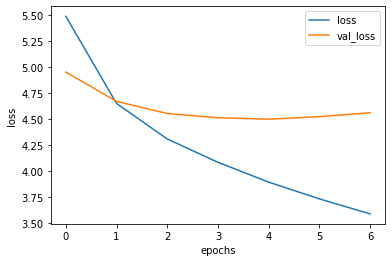

In [36]:
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

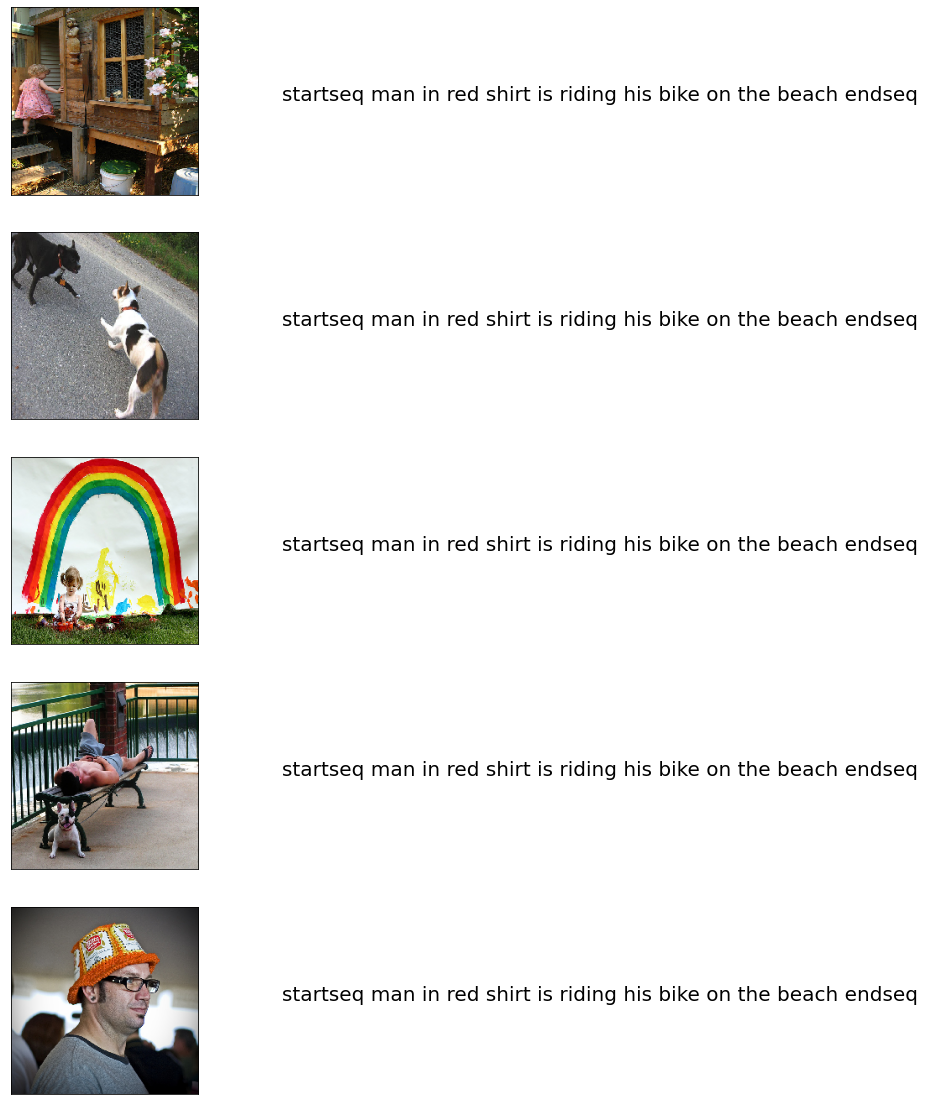

In [37]:
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])
def predict_caption(image):
    '''
    image.shape = (1,4462)
    '''

    in_text = 'startseq'

    for iword in range(maxlen):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence],maxlen)
        yhat = model.predict([image,sequence],verbose=0)
        yhat = np.argmax(yhat)
        newword = index_word[yhat]
        in_text += " " + newword
        if newword == "endseq":
            break
    return(in_text)



npic = 5
npix = 224
target_size = (npix,npix,3)

count = 1
fig = plt.figure(figsize=(10,20))
for jpgfnm, image_feature in zip(fnm_test[:npic],di_test[:npic]):
    ## images 
    filename = dir_Flickr_jpg + '/' + jpgfnm
    image_load = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1

    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption,fontsize=20)
    count += 1

plt.show()

In [38]:
from nltk.translate.bleu_score import sentence_bleu
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])


nkeep = 5
pred_good, pred_bad, bleus = [], [], [] 
count = 0 
for jpgfnm, image_feature, tokenized_text in zip(fnm_test,di_test,dt_test):
    count += 1
    if count % 200 == 0:
        print("  {:4.2f}% is done..".format(100*count/float(len(fnm_test))))
    
    caption_true = [ index_word[i] for i in tokenized_text ]     
    caption_true = caption_true[1:-1] ## remove startreg, and endreg
    ## captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    caption = caption.split()
    caption = caption[1:-1]## remove startreg, and endreg
    
    bleu = sentence_bleu([caption_true],caption)
    bleus.append(bleu)
    if bleu > 0.7 and len(pred_good) < nkeep:
        pred_good.append((bleu,jpgfnm,caption_true,caption))
    elif bleu < 0.3 and len(pred_bad) < nkeep:
        pred_bad.append((bleu,jpgfnm,caption_true,caption))

  12.36% is done..
  24.72% is done..
  37.08% is done..
  49.44% is done..
  61.80% is done..
  74.17% is done..
  86.53% is done..
  98.89% is done..


Bad Caption


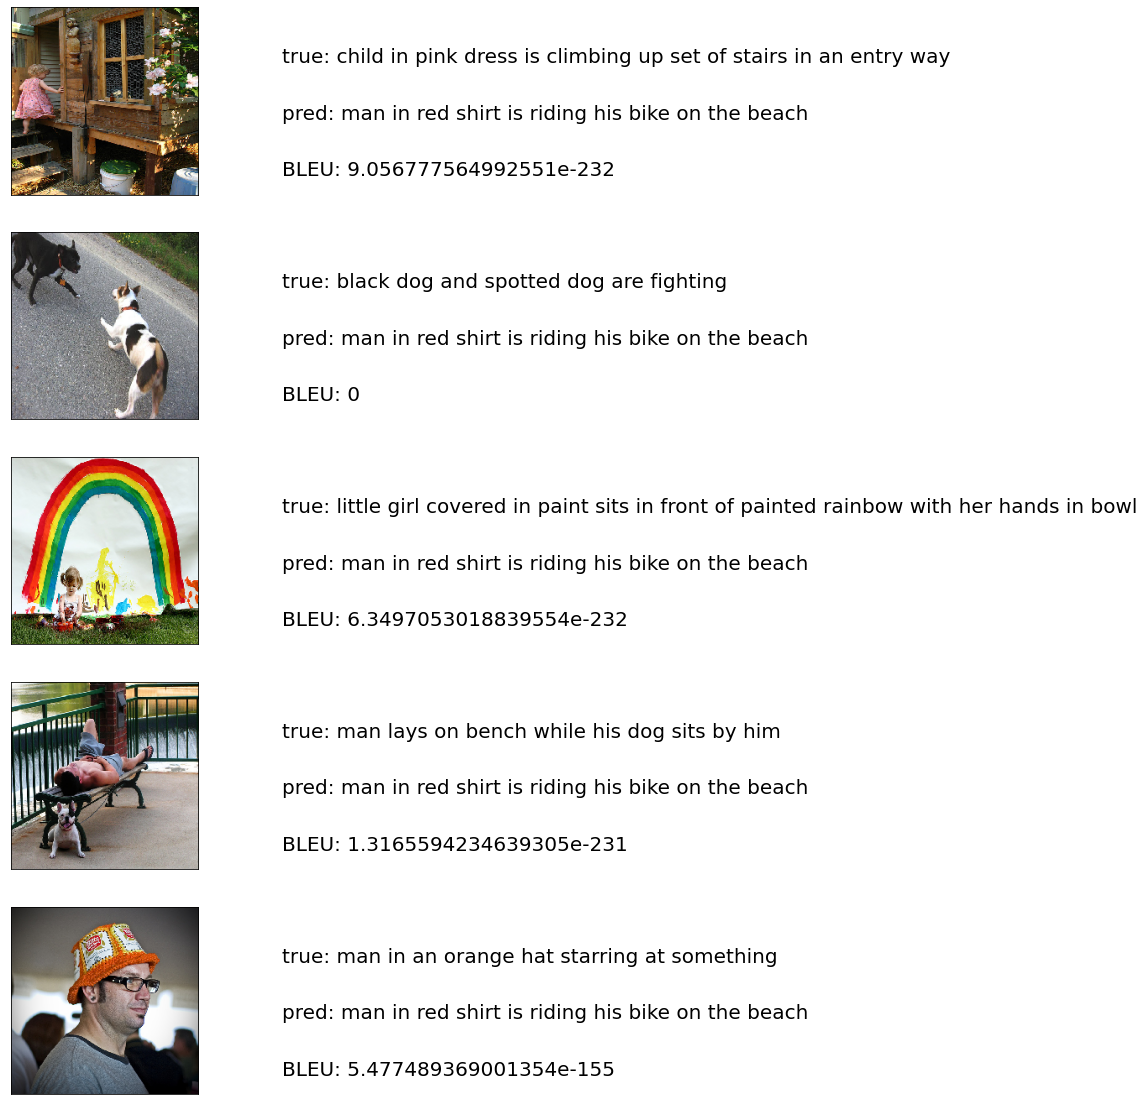

Good Caption


<Figure size 720x1440 with 0 Axes>

In [39]:

def plot_images(pred_bad):
    def create_str(caption_true):
        strue = ""
        for s in caption_true:
            strue += " " + s
        return(strue)
    npix = 224
    target_size = (npix,npix,3)    
    count = 1
    fig = plt.figure(figsize=(10,20))
    npic = len(pred_bad)
    for pb in pred_bad:
        bleu,jpgfnm,caption_true,caption = pb
        ## images 
        filename = dir_Flickr_jpg + '/' + jpgfnm
        image_load = load_img(filename, target_size=target_size)
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        caption_true = create_str(caption_true)
        caption = create_str(caption)
        
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0,0.7,"true:" + caption_true,fontsize=20)
        ax.text(0,0.4,"pred:" + caption,fontsize=20)
        ax.text(0,0.1,"BLEU: {}".format(bleu),fontsize=20)
        count += 1
    plt.show()

print("Bad Caption")
plot_images(pred_bad)
print("Good Caption")
plot_images(pred_good)
 